<a href="https://colab.research.google.com/github/suryakiran594/DS/blob/main/Telecom_Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import optuna
import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [13]:
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2542,4826-DXMUP,Male,0,No,Yes,35,Yes,No,DSL,No,...,No,Yes,Yes,Yes,One year,Yes,Mailed check,72.10,2495.15,No
6550,1309-BXVOQ,Male,0,Yes,No,21,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,106.10,2249.95,Yes
2201,7951-VRDVK,Female,0,No,No,36,Yes,No,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,No,Bank transfer (automatic),85.85,3003.55,No
719,6952-OMNWB,Male,1,Yes,No,68,Yes,Yes,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Credit card (automatic),80.35,5589.3,No
5046,7252-NTGSS,Female,0,No,No,1,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Mailed check,45.15,45.15,No


In [14]:
df.drop('customerID', axis='columns',inplace=True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [15]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [16]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [17]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [18]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [19]:
df.shape

(7043, 20)

In [20]:
df1=df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [21]:
df.iloc[488]['TotalCharges']

' '

In [22]:
df1.shape

(7032, 20)

In [23]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [24]:
df1.TotalCharges=pd.to_numeric(df1.TotalCharges)

<ipython-input-24-01816c9a1a9f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges=pd.to_numeric(df1.TotalCharges)


In [25]:
df1.TotalCharges.dtypes

dtype('float64')

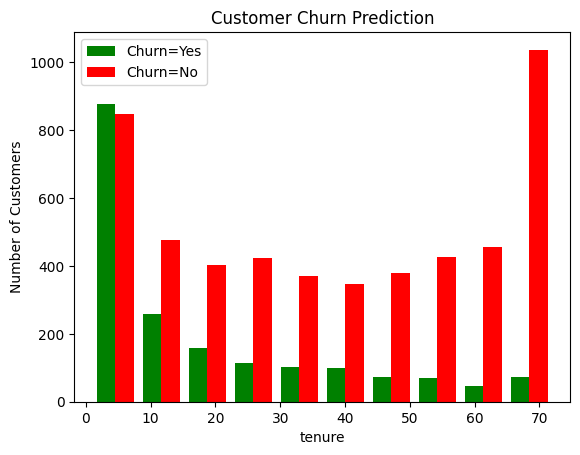

In [26]:
tenure_churn_no=df1[df1.Churn=='No'].tenure
tenure_churn_yes=df1[df1.Churn=='Yes'].tenure
plt.xlabel('tenure')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Prediction')

plt.hist([tenure_churn_yes,tenure_churn_no],color=['green','red'],label=['Churn=Yes', 'Churn=No'])
plt.legend()

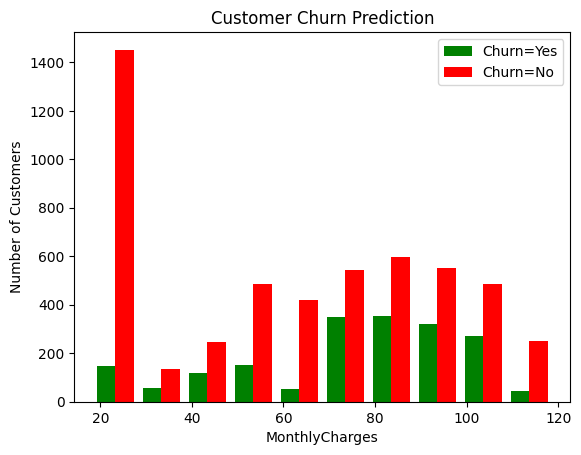

In [27]:
mc_churn_no=df1[df1.Churn=='No'].MonthlyCharges
mc_churn_yes=df1[df1.Churn=='Yes'].MonthlyCharges
plt.xlabel('MonthlyCharges')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Prediction')

plt.hist([mc_churn_yes,mc_churn_no],color=['green','red'],label=['Churn=Yes', 'Churn=No'])
plt.legend()

In [28]:
def print_unique_col_values(df):
    for column in df:
        print(f'{column}:{df[column].unique()}')

In [29]:
print_unique_col_values(df1)

gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   

In [30]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

<ipython-input-30-104b877f3854>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace=True)
<ipython-input-30-104b877f3854>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace=True)


In [31]:
print_unique_col_values(df1)

gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:['No' 'Yes']
MultipleLines:['No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes']
OnlineBackup:['Yes' 'No']
DeviceProtection:['No' 'Yes']
TechSupport:['No' 'Yes']
StreamingTV:['No' 'Yes']
StreamingMovies:['No' 'Yes']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:['No' 'Yes']


In [32]:
yes_no_columns=['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection',
               'TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for col in yes_no_columns:
    df1[col].replace({'Yes':1, 'No':0},inplace=True)

<ipython-input-32-855ea4c68973>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes':1, 'No':0},inplace=True)


In [33]:
for col in df1:
    print(f'{col}:{df1[col].unique()}')

gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:[1 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]


In [34]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

<ipython-input-34-ba153b6b6960>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female':1,'Male':0},inplace=True)


In [35]:
for col in df1:
    print(f'{col}:{df1[col].unique()}')

gender:[1 0]
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:[1 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]


In [36]:
pd.get_dummies(data=df1,columns=['InternetService'])

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,1,0,1,0,1,0,0,0,1,0,...,0,Month-to-month,1,Electronic check,29.85,29.85,0,1,0,0
1,0,0,0,0,34,1,0,1,0,1,...,0,One year,0,Mailed check,56.95,1889.50,0,1,0,0
2,0,0,0,0,2,1,0,1,1,0,...,0,Month-to-month,1,Mailed check,53.85,108.15,1,1,0,0
3,0,0,0,0,45,0,0,1,0,1,...,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,1,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,Month-to-month,1,Electronic check,70.70,151.65,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,1,0,1,...,1,One year,1,Mailed check,84.80,1990.50,0,1,0,0
7039,1,0,1,1,72,1,1,0,1,1,...,1,One year,1,Credit card (automatic),103.20,7362.90,0,0,1,0
7040,1,0,1,1,11,0,0,1,0,0,...,0,Month-to-month,1,Electronic check,29.60,346.45,0,1,0,0
7041,0,1,1,0,4,1,1,0,0,0,...,0,Month-to-month,1,Mailed check,74.40,306.60,1,0,1,0


In [37]:
df2=pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [38]:
df1.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3550,0,0,0,0,32,1,0,Fiber optic,0,0,0,1,1,1,Month-to-month,1,Electronic check,96.20,3183.40,1
1934,1,0,0,0,3,1,0,Fiber optic,1,1,0,0,0,0,Month-to-month,1,Electronic check,79.10,246.50,1
4039,0,0,0,0,7,1,1,Fiber optic,0,0,0,0,1,1,Month-to-month,1,Electronic check,94.10,701.30,0
4958,1,0,1,0,59,1,1,Fiber optic,1,1,0,0,1,0,Month-to-month,1,Electronic check,94.75,5597.65,0


In [39]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [40]:
df2.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6912,0,0,0,0,9,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
3944,1,0,1,1,9,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1382,1,0,1,1,46,1,1,0,0,0,...,0,0,1,0,1,0,0,0,0,1
6943,1,0,1,1,1,0,0,1,0,0,...,1,0,0,1,0,0,1,0,0,0


In [41]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [42]:
cols_to_scale=['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

df2[cols_to_scale]=scaler.fit_transform(df2[cols_to_scale])

In [43]:
df2.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5574,1,0,0,0,0.563380,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
2587,0,0,0,1,0.366197,1,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
5637,0,0,1,1,0.887324,1,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0


In [44]:
for col in df2:
    print(f'{col}:{df2[col].unique()}')

gender:[1 0]
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService:[0 1]
MultipleLines:[0 1]
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
Stream

In [45]:
X=df2.drop('Churn',axis='columns')
y=df2['Churn']


In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)

In [47]:
X_train.shape

(5625, 26)

In [48]:
X_test.shape

(1407, 26)

In [49]:
len(X_train.columns)

26

In [50]:
# Write Code for Optuna
## Refer Optuna Documentation
from xgboost import XGBClassifier
import optuna
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
 
def objective(trail,data=X,target=y):    # passing input and output variable  # trail-bassian approach picks hyper params randomly
  train_x,test_x,train_y,test_y=train_test_split(data,target,test_size=.25,random_state=30) # train test split
  param={
      'tree_method':'gpu_hist',
      'lambda':trail.suggest_loguniform('lambda',1e-4,10.0),      
      'alpha':trail.suggest_loguniform('alpha',1e-4,10.0),
      'colsample_bytree':trail.suggest_categorical('colsample_bytree',[.1,.2,.3,.4,.5,.6,.8,.9,1]),
      'subsample':trail.suggest_categorical('subsample',[.1,.2,.3,.4,.5,.6,.7,.8,.9,1]),
      'learning_rate':trail.suggest_categorical('learning_rate',[.00001,.0003,.008,.02,.01,1,8]),
      'n_estimator':300,
      'max_depth':trail.suggest_categorical('max_depth',[3,4,5,6,7,8,9,10,11,12]),
      'random_state':trail.suggest_categorical('random_state',[10,20,30,2000,3454,243123]),
      'min_child_weight':trail.suggest_int('min_child_weight',1,200)  
       }
  Xgb_class_model= xgb.XGBClassifier(**param)
  Xgb_class_model.fit(train_x,train_y,eval_set=[(test_x,test_y)],verbose=True)
  pred_xgb=Xgb_class_model.predict(test_x)
  mse=mean_squared_error(test_y,pred_xgb)
  return mse

study = optuna.create_study(direction='minimize')
study.optimize(lambda trial: objective(trial, X, y), n_trials=100)

print('Best trial:', study.best_trial.params)
print('Best MSE:', study.best_value)

                                                   

[I 2023-05-27 06:53:27,089] A new study created in memory with name: no-name-1c362857-8e75-40f3-9a19-c36b18fc0312
<ipython-input-50-582ba19c283f>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda':trail.suggest_loguniform('lambda',1e-4,10.0),
<ipython-input-50-582ba19c283f>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha':trail.suggest_loguniform('alpha',1e-4,10.0),


[06:53:28] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.68993
[1]	validation_0-logloss:0.68687
[2]	validation_0-logloss:0.68380
[3]	validation_0-logloss:0.68082
[4]	validation_0-logloss:0.67777
[5]	validation_0-logloss:0.67486
[6]	validation_0-logloss:0.67213
[7]	validation_0-logloss:0.66932
[8]	validation_0-logloss:0.66641
[9]	validation_0-logloss:0.66355
[10]	validation_0-logloss:0.66084
[11]	validation_0-logloss:0.65847
[12]	validation_0-logloss:0.65576
[13]	validation_0-logloss:0.65318
[14]	validation_0-logloss:0.65072
[15]	validation_0-logloss:0.64811
[16]	validation_0-logloss:0.64568
[17]	validation_0-logloss:0.64327
[18]	validation_0-logloss:0.64071
[19]	validation_0-logloss:0.63842
[20]	validation_0-logloss:0.63613
[21]	validation_0-logloss:0.63374
[22]	validation_0-logloss:0.63144
[23]	validation_0-logloss:0.62941
[24]	validation_0-logloss:0.62720
[25]	validation_0-logloss:0.62517
[26]	validation_0-logloss:0.62297
[27

[I 2023-05-27 06:53:28,584] Trial 0 finished with value: 0.2150170648464164 and parameters: {'lambda': 4.27542388568928, 'alpha': 3.8730828875932386, 'colsample_bytree': 0.9, 'subsample': 0.3, 'learning_rate': 0.008, 'max_depth': 11, 'random_state': 243123, 'min_child_weight': 51}. Best is trial 0 with value: 0.2150170648464164.


[06:53:28] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.68568
[1]	validation_0-logloss:0.68016
[2]	validation_0-logloss:0.67412
[3]	validation_0-logloss:0.66789
[4]	validation_0-logloss:0.66172
[5]	validation_0-logloss:0.65562
[6]	validation_0-logloss:0.65122
[7]	validation_0-logloss:0.64609
[8]	validation_0-logloss:0.64065
[9]	validation_0-logloss:0.63648
[10]	validation_0-logloss:0.63194
[11]	validation_0-logloss:0.62657
[12]	validation_0-logloss:0.62215
[13]	validation_0-logloss:0.61797
[14]	validation_0-logloss:0.61432
[15]	validation_0-logloss:0.60949
[16]	validation_0-logloss:0.60498
[17]	validation_0-logloss:0.60173
[18]	validation_0-logloss:0.59782
[19]	validation_0-logloss:0.59476
[20]	validation_0-logloss:0.59080
[21]	validation_0-logloss:0.58768
[22]	validation_0-logloss:0.58489
[23]	validation_0-logloss:0.58195
[24]	validation_0-logloss:0.57851
[25]	validation_0-logloss:0.57608
[26]	validation_0-logloss:0.57346
[27

<ipython-input-50-582ba19c283f>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda':trail.suggest_loguniform('lambda',1e-4,10.0),
<ipython-input-50-582ba19c283f>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha':trail.suggest_loguniform('alpha',1e-4,10.0),


[35]	validation_0-logloss:0.55040
[36]	validation_0-logloss:0.54779
[37]	validation_0-logloss:0.54576
[38]	validation_0-logloss:0.54412
[39]	validation_0-logloss:0.54221
[40]	validation_0-logloss:0.53998
[41]	validation_0-logloss:0.53733
[42]	validation_0-logloss:0.53483
[43]	validation_0-logloss:0.53307
[44]	validation_0-logloss:0.53171
[45]	validation_0-logloss:0.52969
[46]	validation_0-logloss:0.52744
[47]	validation_0-logloss:0.52561
[48]	validation_0-logloss:0.52375
[49]	validation_0-logloss:0.52284
[50]	validation_0-logloss:0.52097
[51]	validation_0-logloss:0.51953
[52]	validation_0-logloss:0.51780
[53]	validation_0-logloss:0.51618
[54]	validation_0-logloss:0.51440
[55]	validation_0-logloss:0.51287
[56]	validation_0-logloss:0.51183
[57]	validation_0-logloss:0.51030
[58]	validation_0-logloss:0.50926
[59]	validation_0-logloss:0.50810
[60]	validation_0-logloss:0.50694
[61]	validation_0-logloss:0.50606
[62]	validation_0-logloss:0.50467
[63]	validation_0-logloss:0.50377
[64]	validatio

[I 2023-05-27 06:53:29,066] Trial 1 finished with value: 0.23265073947667805 and parameters: {'lambda': 0.004769651571159683, 'alpha': 5.6965436903552105, 'colsample_bytree': 0.5, 'subsample': 0.3, 'learning_rate': 0.02, 'max_depth': 3, 'random_state': 2000, 'min_child_weight': 103}. Best is trial 0 with value: 0.2150170648464164.


[06:53:29] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.69315
[1]	validation_0-logloss:0.69315
[2]	validation_0-logloss:0.69315
[3]	validation_0-logloss:0.69315
[4]	validation_0-logloss:0.69315
[5]	validation_0-logloss:0.69315
[6]	validation_0-logloss:0.69315
[7]	validation_0-logloss:0.69315
[8]	validation_0-logloss:0.69315
[9]	validation_0-logloss:0.69315
[10]	validation_0-logloss:0.69315
[11]	validation_0-logloss:0.69315
[12]	validation_0-logloss:0.69315
[13]	validation_0-logloss:0.69315
[14]	validation_0-logloss:0.69315
[15]	validation_0-logloss:0.69315
[16]	validation_0-logloss:0.69315
[17]	validation_0-logloss:0.69315
[18]	validation_0-logloss:0.69315
[19]	validation_0-logloss:0.69315
[20]	validation_0-logloss:0.69315
[21]	validation_0-logloss:0.69315
[22]	validation_0-logloss:0.69315
[23]	validation_0-logloss:0.69315
[24]	validation_0-logloss:0.69315
[25]	validation_0-logloss:0.69315
[26]	validation_0-logloss:0.69315
[27

<ipython-input-50-582ba19c283f>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda':trail.suggest_loguniform('lambda',1e-4,10.0),
<ipython-input-50-582ba19c283f>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha':trail.suggest_loguniform('alpha',1e-4,10.0),


[42]	validation_0-logloss:0.69315
[43]	validation_0-logloss:0.69315
[44]	validation_0-logloss:0.69315
[45]	validation_0-logloss:0.69315
[46]	validation_0-logloss:0.69315
[47]	validation_0-logloss:0.69315
[48]	validation_0-logloss:0.69315
[49]	validation_0-logloss:0.69315
[50]	validation_0-logloss:0.69315
[51]	validation_0-logloss:0.69315
[52]	validation_0-logloss:0.69315
[53]	validation_0-logloss:0.69315
[54]	validation_0-logloss:0.69315
[55]	validation_0-logloss:0.69315
[56]	validation_0-logloss:0.69315
[57]	validation_0-logloss:0.69315
[58]	validation_0-logloss:0.69315
[59]	validation_0-logloss:0.69315
[60]	validation_0-logloss:0.69315
[61]	validation_0-logloss:0.69315
[62]	validation_0-logloss:0.69315
[63]	validation_0-logloss:0.69315
[64]	validation_0-logloss:0.69315
[65]	validation_0-logloss:0.69315
[66]	validation_0-logloss:0.69315
[67]	validation_0-logloss:0.69315
[68]	validation_0-logloss:0.69315
[69]	validation_0-logloss:0.69315
[70]	validation_0-logloss:0.69315
[71]	validatio

[I 2023-05-27 06:53:29,475] Trial 2 finished with value: 0.270193401592719 and parameters: {'lambda': 5.075058573068318, 'alpha': 0.15187262355658465, 'colsample_bytree': 0.6, 'subsample': 0.1, 'learning_rate': 0.0003, 'max_depth': 10, 'random_state': 243123, 'min_child_weight': 193}. Best is trial 0 with value: 0.2150170648464164.


[06:53:29] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.69315
[1]	validation_0-logloss:0.69315
[2]	validation_0-logloss:0.69315
[3]	validation_0-logloss:0.69315
[4]	validation_0-logloss:0.69315
[5]	validation_0-logloss:0.69315
[6]	validation_0-logloss:0.69315
[7]	validation_0-logloss:0.69315
[8]	validation_0-logloss:0.69315
[9]	validation_0-logloss:0.69315
[10]	validation_0-logloss:0.69315
[11]	validation_0-logloss:0.69315
[12]	validation_0-logloss:0.69315
[13]	validation_0-logloss:0.69315
[14]	validation_0-logloss:0.69315
[15]	validation_0-logloss:0.69315
[16]	validation_0-logloss:0.69315
[17]	validation_0-logloss:0.69315
[18]	validation_0-logloss:0.69315
[19]	validation_0-logloss:0.69315
[20]	validation_0-logloss:0.69315
[21]	validation_0-logloss:0.69315
[22]	validation_0-logloss:0.69315
[23]	validation_0-logloss:0.69315
[24]	validation_0-logloss:0.69315
[25]	validation_0-logloss:0.69315
[26]	validation_0-logloss:0.69315
[27

<ipython-input-50-582ba19c283f>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda':trail.suggest_loguniform('lambda',1e-4,10.0),
<ipython-input-50-582ba19c283f>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha':trail.suggest_loguniform('alpha',1e-4,10.0),


[44]	validation_0-logloss:0.69315
[45]	validation_0-logloss:0.69315
[46]	validation_0-logloss:0.69315
[47]	validation_0-logloss:0.69315
[48]	validation_0-logloss:0.69315
[49]	validation_0-logloss:0.69315
[50]	validation_0-logloss:0.69315
[51]	validation_0-logloss:0.69315
[52]	validation_0-logloss:0.69315
[53]	validation_0-logloss:0.69315
[54]	validation_0-logloss:0.69315
[55]	validation_0-logloss:0.69315
[56]	validation_0-logloss:0.69315
[57]	validation_0-logloss:0.69315
[58]	validation_0-logloss:0.69315
[59]	validation_0-logloss:0.69315
[60]	validation_0-logloss:0.69315
[61]	validation_0-logloss:0.69315
[62]	validation_0-logloss:0.69315
[63]	validation_0-logloss:0.69315
[64]	validation_0-logloss:0.69315
[65]	validation_0-logloss:0.69315
[66]	validation_0-logloss:0.69315
[67]	validation_0-logloss:0.69315
[68]	validation_0-logloss:0.69315
[69]	validation_0-logloss:0.69315
[70]	validation_0-logloss:0.69315
[71]	validation_0-logloss:0.69315
[72]	validation_0-logloss:0.69315
[73]	validatio

[I 2023-05-27 06:53:29,882] Trial 3 finished with value: 0.270193401592719 and parameters: {'lambda': 0.01402754374367081, 'alpha': 0.02179847114201866, 'colsample_bytree': 0.5, 'subsample': 0.1, 'learning_rate': 1e-05, 'max_depth': 3, 'random_state': 2000, 'min_child_weight': 180}. Best is trial 0 with value: 0.2150170648464164.


[06:53:29] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.69314
[1]	validation_0-logloss:0.69314
[2]	validation_0-logloss:0.69314
[3]	validation_0-logloss:0.69313
[4]	validation_0-logloss:0.69313
[5]	validation_0-logloss:0.69312
[6]	validation_0-logloss:0.69312
[7]	validation_0-logloss:0.69312
[8]	validation_0-logloss:0.69311
[9]	validation_0-logloss:0.69311
[10]	validation_0-logloss:0.69310
[11]	validation_0-logloss:0.69310
[12]	validation_0-logloss:0.69310
[13]	validation_0-logloss:0.69309
[14]	validation_0-logloss:0.69309
[15]	validation_0-logloss:0.69308
[16]	validation_0-logloss:0.69308
[17]	validation_0-logloss:0.69308
[18]	validation_0-logloss:0.69307
[19]	validation_0-logloss:0.69307
[20]	validation_0-logloss:0.69306
[21]	validation_0-logloss:0.69306
[22]	validation_0-logloss:0.69306
[23]	validation_0-logloss:0.69305
[24]	validation_0-logloss:0.69305
[25]	validation_0-logloss:0.69304
[26]	validation_0-logloss:0.69304
[27

<ipython-input-50-582ba19c283f>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda':trail.suggest_loguniform('lambda',1e-4,10.0),
<ipython-input-50-582ba19c283f>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha':trail.suggest_loguniform('alpha',1e-4,10.0),


[30]	validation_0-logloss:0.69302
[31]	validation_0-logloss:0.69302
[32]	validation_0-logloss:0.69302
[33]	validation_0-logloss:0.69301
[34]	validation_0-logloss:0.69301
[35]	validation_0-logloss:0.69300
[36]	validation_0-logloss:0.69300
[37]	validation_0-logloss:0.69300
[38]	validation_0-logloss:0.69299
[39]	validation_0-logloss:0.69299
[40]	validation_0-logloss:0.69298
[41]	validation_0-logloss:0.69298
[42]	validation_0-logloss:0.69298
[43]	validation_0-logloss:0.69297
[44]	validation_0-logloss:0.69297
[45]	validation_0-logloss:0.69297
[46]	validation_0-logloss:0.69296
[47]	validation_0-logloss:0.69296
[48]	validation_0-logloss:0.69295
[49]	validation_0-logloss:0.69295
[50]	validation_0-logloss:0.69295
[51]	validation_0-logloss:0.69294
[52]	validation_0-logloss:0.69294
[53]	validation_0-logloss:0.69293
[54]	validation_0-logloss:0.69293
[55]	validation_0-logloss:0.69293
[56]	validation_0-logloss:0.69292
[57]	validation_0-logloss:0.69292
[58]	validation_0-logloss:0.69291
[59]	validatio

[I 2023-05-27 06:53:30,393] Trial 4 finished with value: 0.23947667804323094 and parameters: {'lambda': 0.07654577089279974, 'alpha': 0.000625101862710785, 'colsample_bytree': 1, 'subsample': 0.5, 'learning_rate': 1e-05, 'max_depth': 4, 'random_state': 20, 'min_child_weight': 109}. Best is trial 0 with value: 0.2150170648464164.


[06:53:30] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.46477
[1]	validation_0-logloss:0.44864
[2]	validation_0-logloss:0.43541
[3]	validation_0-logloss:0.43404
[4]	validation_0-logloss:0.43408
[5]	validation_0-logloss:0.42885
[6]	validation_0-logloss:0.42640
[7]	validation_0-logloss:0.42289
[8]	validation_0-logloss:0.42289
[9]	validation_0-logloss:0.42081
[10]	validation_0-logloss:0.42805
[11]	validation_0-logloss:0.42753
[12]	validation_0-logloss:0.42721
[13]	validation_0-logloss:0.43146
[14]	validation_0-logloss:0.43113
[15]	validation_0-logloss:0.43160
[16]	validation_0-logloss:0.43090
[17]	validation_0-logloss:0.43196
[18]	validation_0-logloss:0.43171
[19]	validation_0-logloss:0.43303
[20]	validation_0-logloss:0.43755
[21]	validation_0-logloss:0.43844
[22]	validation_0-logloss:0.43666
[23]	validation_0-logloss:0.43266
[24]	validation_0-logloss:0.43292
[25]	validation_0-logloss:0.43271
[26]	validation_0-logloss:0.43401
[27

<ipython-input-50-582ba19c283f>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda':trail.suggest_loguniform('lambda',1e-4,10.0),
<ipython-input-50-582ba19c283f>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha':trail.suggest_loguniform('alpha',1e-4,10.0),


[31]	validation_0-logloss:0.43559
[32]	validation_0-logloss:0.43899
[33]	validation_0-logloss:0.43995
[34]	validation_0-logloss:0.43941
[35]	validation_0-logloss:0.43781
[36]	validation_0-logloss:0.43785
[37]	validation_0-logloss:0.43582
[38]	validation_0-logloss:0.43726
[39]	validation_0-logloss:0.43456
[40]	validation_0-logloss:0.43495
[41]	validation_0-logloss:0.43442
[42]	validation_0-logloss:0.43413
[43]	validation_0-logloss:0.43900
[44]	validation_0-logloss:0.43505
[45]	validation_0-logloss:0.43403
[46]	validation_0-logloss:0.43437
[47]	validation_0-logloss:0.43536
[48]	validation_0-logloss:0.43771
[49]	validation_0-logloss:0.43595
[50]	validation_0-logloss:0.43789
[51]	validation_0-logloss:0.43721
[52]	validation_0-logloss:0.43767
[53]	validation_0-logloss:0.43740
[54]	validation_0-logloss:0.43607
[55]	validation_0-logloss:0.43637
[56]	validation_0-logloss:0.43824
[57]	validation_0-logloss:0.43665
[58]	validation_0-logloss:0.44174
[59]	validation_0-logloss:0.43956
[60]	validatio

[I 2023-05-27 06:53:30,965] Trial 5 finished with value: 0.2150170648464164 and parameters: {'lambda': 0.0013191813698313736, 'alpha': 0.004110529427756674, 'colsample_bytree': 0.5, 'subsample': 0.5, 'learning_rate': 1, 'max_depth': 5, 'random_state': 2000, 'min_child_weight': 47}. Best is trial 0 with value: 0.2150170648464164.


[06:53:31] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.69051
[1]	validation_0-logloss:0.68760
[2]	validation_0-logloss:0.68510
[3]	validation_0-logloss:0.68170
[4]	validation_0-logloss:0.67790
[5]	validation_0-logloss:0.67456
[6]	validation_0-logloss:0.67069
[7]	validation_0-logloss:0.66776
[8]	validation_0-logloss:0.66506
[9]	validation_0-logloss:0.66199
[10]	validation_0-logloss:0.65869
[11]	validation_0-logloss:0.65643
[12]	validation_0-logloss:0.65379
[13]	validation_0-logloss:0.65035


<ipython-input-50-582ba19c283f>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda':trail.suggest_loguniform('lambda',1e-4,10.0),
<ipython-input-50-582ba19c283f>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha':trail.suggest_loguniform('alpha',1e-4,10.0),


[14]	validation_0-logloss:0.64699
[15]	validation_0-logloss:0.64453
[16]	validation_0-logloss:0.64145
[17]	validation_0-logloss:0.63838
[18]	validation_0-logloss:0.63594
[19]	validation_0-logloss:0.63404
[20]	validation_0-logloss:0.63123
[21]	validation_0-logloss:0.62939
[22]	validation_0-logloss:0.62667
[23]	validation_0-logloss:0.62445
[24]	validation_0-logloss:0.62220
[25]	validation_0-logloss:0.62008
[26]	validation_0-logloss:0.61824
[27]	validation_0-logloss:0.61569
[28]	validation_0-logloss:0.61317
[29]	validation_0-logloss:0.61148
[30]	validation_0-logloss:0.60898
[31]	validation_0-logloss:0.60653
[32]	validation_0-logloss:0.60424
[33]	validation_0-logloss:0.60185
[34]	validation_0-logloss:0.59987
[35]	validation_0-logloss:0.59741
[36]	validation_0-logloss:0.59587
[37]	validation_0-logloss:0.59353
[38]	validation_0-logloss:0.59170
[39]	validation_0-logloss:0.58980
[40]	validation_0-logloss:0.58739
[41]	validation_0-logloss:0.58488
[42]	validation_0-logloss:0.58309
[43]	validatio

[I 2023-05-27 06:53:31,677] Trial 6 finished with value: 0.2161547212741752 and parameters: {'lambda': 1.4749597927539955, 'alpha': 0.12146122500879843, 'colsample_bytree': 0.2, 'subsample': 1, 'learning_rate': 0.01, 'max_depth': 7, 'random_state': 20, 'min_child_weight': 41}. Best is trial 0 with value: 0.2150170648464164.


[06:53:31] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.68975
[1]	validation_0-logloss:0.68688
[2]	validation_0-logloss:0.68376
[3]	validation_0-logloss:0.68054
[4]	validation_0-logloss:0.67753
[5]	validation_0-logloss:0.67455
[6]	validation_0-logloss:0.67141
[7]	validation_0-logloss:0.66849
[8]	validation_0-logloss:0.66546
[9]	validation_0-logloss:0.66256
[10]	validation_0-logloss:0.65963
[11]	validation_0-logloss:0.65672


<ipython-input-50-582ba19c283f>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda':trail.suggest_loguniform('lambda',1e-4,10.0),
<ipython-input-50-582ba19c283f>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha':trail.suggest_loguniform('alpha',1e-4,10.0),


[12]	validation_0-logloss:0.65400
[13]	validation_0-logloss:0.65126
[14]	validation_0-logloss:0.64859
[15]	validation_0-logloss:0.64588
[16]	validation_0-logloss:0.64322
[17]	validation_0-logloss:0.64072
[18]	validation_0-logloss:0.63815
[19]	validation_0-logloss:0.63557
[20]	validation_0-logloss:0.63308
[21]	validation_0-logloss:0.63063
[22]	validation_0-logloss:0.62817
[23]	validation_0-logloss:0.62583
[24]	validation_0-logloss:0.62351
[25]	validation_0-logloss:0.62117
[26]	validation_0-logloss:0.61899
[27]	validation_0-logloss:0.61670
[28]	validation_0-logloss:0.61443
[29]	validation_0-logloss:0.61220
[30]	validation_0-logloss:0.61001
[31]	validation_0-logloss:0.60789
[32]	validation_0-logloss:0.60575
[33]	validation_0-logloss:0.60364
[34]	validation_0-logloss:0.60155
[35]	validation_0-logloss:0.59948
[36]	validation_0-logloss:0.59752
[37]	validation_0-logloss:0.59572
[38]	validation_0-logloss:0.59376
[39]	validation_0-logloss:0.59179
[40]	validation_0-logloss:0.58992
[41]	validatio

[I 2023-05-27 06:53:32,373] Trial 7 finished with value: 0.21729237770193402 and parameters: {'lambda': 0.0005229252243782672, 'alpha': 0.002146743299715638, 'colsample_bytree': 0.8, 'subsample': 0.9, 'learning_rate': 0.008, 'max_depth': 10, 'random_state': 10, 'min_child_weight': 104}. Best is trial 0 with value: 0.2150170648464164.


[06:53:32] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.69156
[1]	validation_0-logloss:0.68954
[2]	validation_0-logloss:0.68770
[3]	validation_0-logloss:0.68579
[4]	validation_0-logloss:0.68336
[5]	validation_0-logloss:0.68136
[6]	validation_0-logloss:0.67959
[7]	validation_0-logloss:0.67835
[8]	validation_0-logloss:0.67689
[9]	validation_0-logloss:0.67530
[10]	validation_0-logloss:0.67300
[11]	validation_0-logloss:0.67146
[12]	validation_0-logloss:0.66992
[13]	validation_0-logloss:0.66830
[14]	validation_0-logloss:0.66677
[15]	validation_0-logloss:0.66498
[16]	validation_0-logloss:0.66360
[17]	validation_0-logloss:0.66150
[18]	validation_0-logloss:0.66049
[19]	validation_0-logloss:0.65922
[20]	validation_0-logloss:0.65795
[21]	validation_0-logloss:0.65676


<ipython-input-50-582ba19c283f>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda':trail.suggest_loguniform('lambda',1e-4,10.0),
<ipython-input-50-582ba19c283f>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha':trail.suggest_loguniform('alpha',1e-4,10.0),


[22]	validation_0-logloss:0.65557
[23]	validation_0-logloss:0.65434
[24]	validation_0-logloss:0.65275
[25]	validation_0-logloss:0.65158
[26]	validation_0-logloss:0.65043
[27]	validation_0-logloss:0.64918
[28]	validation_0-logloss:0.64734
[29]	validation_0-logloss:0.64603
[30]	validation_0-logloss:0.64483
[31]	validation_0-logloss:0.64371
[32]	validation_0-logloss:0.64279
[33]	validation_0-logloss:0.64156
[34]	validation_0-logloss:0.64057
[35]	validation_0-logloss:0.63866
[36]	validation_0-logloss:0.63747
[37]	validation_0-logloss:0.63600
[38]	validation_0-logloss:0.63453
[39]	validation_0-logloss:0.63333
[40]	validation_0-logloss:0.63150
[41]	validation_0-logloss:0.63018
[42]	validation_0-logloss:0.62940
[43]	validation_0-logloss:0.62777
[44]	validation_0-logloss:0.62658
[45]	validation_0-logloss:0.62571
[46]	validation_0-logloss:0.62494
[47]	validation_0-logloss:0.62374
[48]	validation_0-logloss:0.62255
[49]	validation_0-logloss:0.62083
[50]	validation_0-logloss:0.62009
[51]	validatio

[I 2023-05-27 06:53:32,887] Trial 8 finished with value: 0.270193401592719 and parameters: {'lambda': 6.39299339665598, 'alpha': 0.0007453624248827784, 'colsample_bytree': 0.1, 'subsample': 0.1, 'learning_rate': 0.008, 'max_depth': 5, 'random_state': 20, 'min_child_weight': 37}. Best is trial 0 with value: 0.2150170648464164.


[06:53:32] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.69314
[1]	validation_0-logloss:0.69314
[2]	validation_0-logloss:0.69314
[3]	validation_0-logloss:0.69314
[4]	validation_0-logloss:0.69313
[5]	validation_0-logloss:0.69313
[6]	validation_0-logloss:0.69313
[7]	validation_0-logloss:0.69313
[8]	validation_0-logloss:0.69312
[9]	validation_0-logloss:0.69312
[10]	validation_0-logloss:0.69312
[11]	validation_0-logloss:0.69312
[12]	validation_0-logloss:0.69311
[13]	validation_0-logloss:0.69311
[14]	validation_0-logloss:0.69311
[15]	validation_0-logloss:0.69311
[16]	validation_0-logloss:0.69310
[17]	validation_0-logloss:0.69310
[18]	validation_0-logloss:0.69310
[19]	validation_0-logloss:0.69309


<ipython-input-50-582ba19c283f>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda':trail.suggest_loguniform('lambda',1e-4,10.0),
<ipython-input-50-582ba19c283f>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha':trail.suggest_loguniform('alpha',1e-4,10.0),


[20]	validation_0-logloss:0.69309
[21]	validation_0-logloss:0.69309
[22]	validation_0-logloss:0.69309
[23]	validation_0-logloss:0.69308
[24]	validation_0-logloss:0.69308
[25]	validation_0-logloss:0.69308
[26]	validation_0-logloss:0.69308
[27]	validation_0-logloss:0.69307
[28]	validation_0-logloss:0.69307
[29]	validation_0-logloss:0.69307
[30]	validation_0-logloss:0.69307
[31]	validation_0-logloss:0.69306
[32]	validation_0-logloss:0.69306
[33]	validation_0-logloss:0.69306
[34]	validation_0-logloss:0.69306
[35]	validation_0-logloss:0.69305
[36]	validation_0-logloss:0.69305
[37]	validation_0-logloss:0.69305
[38]	validation_0-logloss:0.69305
[39]	validation_0-logloss:0.69305
[40]	validation_0-logloss:0.69304
[41]	validation_0-logloss:0.69304
[42]	validation_0-logloss:0.69304
[43]	validation_0-logloss:0.69304
[44]	validation_0-logloss:0.69303
[45]	validation_0-logloss:0.69303
[46]	validation_0-logloss:0.69303
[47]	validation_0-logloss:0.69303
[48]	validation_0-logloss:0.69302
[49]	validatio

[I 2023-05-27 06:53:33,405] Trial 9 finished with value: 0.270193401592719 and parameters: {'lambda': 0.1327359974893822, 'alpha': 0.7563638453034258, 'colsample_bytree': 0.1, 'subsample': 0.4, 'learning_rate': 1e-05, 'max_depth': 10, 'random_state': 30, 'min_child_weight': 143}. Best is trial 0 with value: 0.2150170648464164.


[06:53:33] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:1.16263
[1]	validation_0-logloss:12.41628
[2]	validation_0-logloss:6.61586
[3]	validation_0-logloss:8.45975
[4]	validation_0-logloss:8.45975
[5]	validation_0-logloss:8.45975
[6]	validation_0-logloss:8.45975
[7]	validation_0-logloss:8.45975
[8]	validation_0-logloss:8.45975
[9]	validation_0-logloss:8.45975
[10]	validation_0-logloss:8.45975
[11]	validation_0-logloss:8.45975
[12]	validation_0-logloss:8.45975
[13]	validation_0-logloss:8.45975
[14]	validation_0-logloss:8.45975


<ipython-input-50-582ba19c283f>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda':trail.suggest_loguniform('lambda',1e-4,10.0),
<ipython-input-50-582ba19c283f>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha':trail.suggest_loguniform('alpha',1e-4,10.0),


[15]	validation_0-logloss:8.45975
[16]	validation_0-logloss:8.45975
[17]	validation_0-logloss:8.45975
[18]	validation_0-logloss:8.45975
[19]	validation_0-logloss:8.45975
[20]	validation_0-logloss:8.45975
[21]	validation_0-logloss:8.45975
[22]	validation_0-logloss:8.45975
[23]	validation_0-logloss:8.45975
[24]	validation_0-logloss:8.45975
[25]	validation_0-logloss:8.45975
[26]	validation_0-logloss:8.45975
[27]	validation_0-logloss:8.45975
[28]	validation_0-logloss:8.45975
[29]	validation_0-logloss:8.45975
[30]	validation_0-logloss:8.45975
[31]	validation_0-logloss:8.45975
[32]	validation_0-logloss:8.45975
[33]	validation_0-logloss:8.45975
[34]	validation_0-logloss:8.45975
[35]	validation_0-logloss:8.45975
[36]	validation_0-logloss:8.45975
[37]	validation_0-logloss:8.45975
[38]	validation_0-logloss:8.45975
[39]	validation_0-logloss:8.45975
[40]	validation_0-logloss:8.45975
[41]	validation_0-logloss:8.45975
[42]	validation_0-logloss:8.45975
[43]	validation_0-logloss:8.45975
[44]	validatio

[I 2023-05-27 06:53:33,938] Trial 10 finished with value: 0.24630261660978384 and parameters: {'lambda': 0.4929941663497469, 'alpha': 8.737146364846495, 'colsample_bytree': 0.9, 'subsample': 0.3, 'learning_rate': 8, 'max_depth': 11, 'random_state': 3454, 'min_child_weight': 8}. Best is trial 0 with value: 0.2150170648464164.
<ipython-input-50-582ba19c283f>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda':trail.suggest_loguniform('lambda',1e-4,10.0),
<ipython-input-50-582ba19c283f>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha':trail.suggest_loguniform('alpha',1e-4,10.0),


[06:53:34] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.46175
[1]	validation_0-logloss:0.44166
[2]	validation_0-logloss:0.42999
[3]	validation_0-logloss:0.42883
[4]	validation_0-logloss:0.42287
[5]	validation_0-logloss:0.42452
[6]	validation_0-logloss:0.42393
[7]	validation_0-logloss:0.42681
[8]	validation_0-logloss:0.42718
[9]	validation_0-logloss:0.43069
[10]	validation_0-logloss:0.42684
[11]	validation_0-logloss:0.42735
[12]	validation_0-logloss:0.42592
[13]	validation_0-logloss:0.42562
[14]	validation_0-logloss:0.42579
[15]	validation_0-logloss:0.42592
[16]	validation_0-logloss:0.42789
[17]	validation_0-logloss:0.42684
[18]	validation_0-logloss:0.43028
[19]	validation_0-logloss:0.42713
[20]	validation_0-logloss:0.42903
[21]	validation_0-logloss:0.43038
[22]	validation_0-logloss:0.43001
[23]	validation_0-logloss:0.42594
[24]	validation_0-logloss:0.42713
[25]	validation_0-logloss:0.42726
[26]	validation_0-logloss:0.42796
[27

[I 2023-05-27 06:53:34,703] Trial 11 finished with value: 0.2036405005688282 and parameters: {'lambda': 0.00012981765476427173, 'alpha': 0.0058610975515307915, 'colsample_bytree': 0.9, 'subsample': 0.5, 'learning_rate': 1, 'max_depth': 5, 'random_state': 243123, 'min_child_weight': 62}. Best is trial 11 with value: 0.2036405005688282.


[06:53:34] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.46111
[1]	validation_0-logloss:0.43780
[2]	validation_0-logloss:0.43517
[3]	validation_0-logloss:0.42905
[4]	validation_0-logloss:0.42939
[5]	validation_0-logloss:0.42914
[6]	validation_0-logloss:0.42573


<ipython-input-50-582ba19c283f>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda':trail.suggest_loguniform('lambda',1e-4,10.0),
<ipython-input-50-582ba19c283f>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha':trail.suggest_loguniform('alpha',1e-4,10.0),


[7]	validation_0-logloss:0.42656
[8]	validation_0-logloss:0.42587
[9]	validation_0-logloss:0.42816
[10]	validation_0-logloss:0.42793
[11]	validation_0-logloss:0.42958
[12]	validation_0-logloss:0.42607
[13]	validation_0-logloss:0.42551
[14]	validation_0-logloss:0.42693
[15]	validation_0-logloss:0.42930
[16]	validation_0-logloss:0.42569
[17]	validation_0-logloss:0.42601
[18]	validation_0-logloss:0.42450
[19]	validation_0-logloss:0.42326
[20]	validation_0-logloss:0.42733
[21]	validation_0-logloss:0.42819
[22]	validation_0-logloss:0.42477
[23]	validation_0-logloss:0.42882
[24]	validation_0-logloss:0.42230
[25]	validation_0-logloss:0.42328
[26]	validation_0-logloss:0.42413
[27]	validation_0-logloss:0.42696
[28]	validation_0-logloss:0.43029
[29]	validation_0-logloss:0.43208
[30]	validation_0-logloss:0.43094
[31]	validation_0-logloss:0.43043
[32]	validation_0-logloss:0.42871
[33]	validation_0-logloss:0.42885
[34]	validation_0-logloss:0.42591
[35]	validation_0-logloss:0.42383
[36]	validation_0

[I 2023-05-27 06:53:35,450] Trial 12 finished with value: 0.20193401592718999 and parameters: {'lambda': 0.0001410820299985501, 'alpha': 0.0001739234958893112, 'colsample_bytree': 0.9, 'subsample': 0.6, 'learning_rate': 1, 'max_depth': 11, 'random_state': 243123, 'min_child_weight': 67}. Best is trial 12 with value: 0.20193401592718999.


[06:53:35] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.46111
[1]	validation_0-logloss:0.43775
[2]	validation_0-logloss:0.43477
[3]	validation_0-logloss:0.42925
[4]	validation_0-logloss:0.42812
[5]	validation_0-logloss:0.43002
[6]	validation_0-logloss:0.42726
[7]	validation_0-logloss:0.42917
[8]	validation_0-logloss:0.42713
[9]	validation_0-logloss:0.43143


<ipython-input-50-582ba19c283f>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda':trail.suggest_loguniform('lambda',1e-4,10.0),
<ipython-input-50-582ba19c283f>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha':trail.suggest_loguniform('alpha',1e-4,10.0),


[10]	validation_0-logloss:0.42816
[11]	validation_0-logloss:0.42938
[12]	validation_0-logloss:0.42516
[13]	validation_0-logloss:0.42901
[14]	validation_0-logloss:0.43214
[15]	validation_0-logloss:0.42898
[16]	validation_0-logloss:0.42688
[17]	validation_0-logloss:0.43074
[18]	validation_0-logloss:0.43055
[19]	validation_0-logloss:0.42956
[20]	validation_0-logloss:0.42983
[21]	validation_0-logloss:0.43075
[22]	validation_0-logloss:0.43199
[23]	validation_0-logloss:0.42979
[24]	validation_0-logloss:0.42762
[25]	validation_0-logloss:0.43035
[26]	validation_0-logloss:0.42935
[27]	validation_0-logloss:0.42945
[28]	validation_0-logloss:0.43274
[29]	validation_0-logloss:0.42827
[30]	validation_0-logloss:0.43080
[31]	validation_0-logloss:0.43064
[32]	validation_0-logloss:0.42932
[33]	validation_0-logloss:0.43160
[34]	validation_0-logloss:0.42961
[35]	validation_0-logloss:0.42808
[36]	validation_0-logloss:0.42914
[37]	validation_0-logloss:0.42881
[38]	validation_0-logloss:0.43312
[39]	validatio

[I 2023-05-27 06:53:36,125] Trial 13 finished with value: 0.19795221843003413 and parameters: {'lambda': 0.00014555529111161969, 'alpha': 0.00015485558206988702, 'colsample_bytree': 0.9, 'subsample': 0.6, 'learning_rate': 1, 'max_depth': 9, 'random_state': 243123, 'min_child_weight': 71}. Best is trial 13 with value: 0.19795221843003413.


[06:53:36] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.47306
[1]	validation_0-logloss:0.45037
[2]	validation_0-logloss:0.44569
[3]	validation_0-logloss:0.44583
[4]	validation_0-logloss:0.43505
[5]	validation_0-logloss:0.43385
[6]	validation_0-logloss:0.43041
[7]	validation_0-logloss:0.43193
[8]	validation_0-logloss:0.43381
[9]	validation_0-logloss:0.43315
[10]	validation_0-logloss:0.42844
[11]	validation_0-logloss:0.42902
[12]	validation_0-logloss:0.42804
[13]	validation_0-logloss:0.42717
[14]	validation_0-logloss:0.43014
[15]	validation_0-logloss:0.43013
[16]	validation_0-logloss:0.42816
[17]	validation_0-logloss:0.42952
[18]	validation_0-logloss:0.43146
[19]	validation_0-logloss:0.43293
[20]	validation_0-logloss:0.43295


<ipython-input-50-582ba19c283f>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda':trail.suggest_loguniform('lambda',1e-4,10.0),
<ipython-input-50-582ba19c283f>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha':trail.suggest_loguniform('alpha',1e-4,10.0),


[21]	validation_0-logloss:0.43124
[22]	validation_0-logloss:0.43152
[23]	validation_0-logloss:0.43119
[24]	validation_0-logloss:0.43079
[25]	validation_0-logloss:0.42660
[26]	validation_0-logloss:0.42762
[27]	validation_0-logloss:0.42834
[28]	validation_0-logloss:0.42846
[29]	validation_0-logloss:0.42862
[30]	validation_0-logloss:0.42442
[31]	validation_0-logloss:0.42608
[32]	validation_0-logloss:0.42643
[33]	validation_0-logloss:0.42534
[34]	validation_0-logloss:0.42859
[35]	validation_0-logloss:0.42793
[36]	validation_0-logloss:0.42670
[37]	validation_0-logloss:0.42457
[38]	validation_0-logloss:0.42698
[39]	validation_0-logloss:0.42665
[40]	validation_0-logloss:0.42522
[41]	validation_0-logloss:0.42484
[42]	validation_0-logloss:0.42410
[43]	validation_0-logloss:0.42716
[44]	validation_0-logloss:0.42670
[45]	validation_0-logloss:0.42640
[46]	validation_0-logloss:0.42800
[47]	validation_0-logloss:0.42762
[48]	validation_0-logloss:0.42783
[49]	validation_0-logloss:0.42458
[50]	validatio

[I 2023-05-27 06:53:36,753] Trial 14 finished with value: 0.2025028441410694 and parameters: {'lambda': 0.0001490498846298332, 'alpha': 0.00010214676860676975, 'colsample_bytree': 0.4, 'subsample': 0.6, 'learning_rate': 1, 'max_depth': 9, 'random_state': 243123, 'min_child_weight': 78}. Best is trial 13 with value: 0.19795221843003413.
<ipython-input-50-582ba19c283f>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda':trail.suggest_loguniform('lambda',1e-4,10.0),
<ipython-input-50-582ba19c283f>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha':trail.suggest_loguniform('alpha',1e-4,10.0),


[06:53:37] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.48417
[1]	validation_0-logloss:0.46811
[2]	validation_0-logloss:0.45685
[3]	validation_0-logloss:0.45704
[4]	validation_0-logloss:0.44284
[5]	validation_0-logloss:0.44118
[6]	validation_0-logloss:0.44067
[7]	validation_0-logloss:0.44056
[8]	validation_0-logloss:0.44194
[9]	validation_0-logloss:0.44166
[10]	validation_0-logloss:0.44033
[11]	validation_0-logloss:0.44141
[12]	validation_0-logloss:0.44081
[13]	validation_0-logloss:0.43959
[14]	validation_0-logloss:0.43907
[15]	validation_0-logloss:0.43976
[16]	validation_0-logloss:0.43912
[17]	validation_0-logloss:0.43931
[18]	validation_0-logloss:0.43795
[19]	validation_0-logloss:0.43915
[20]	validation_0-logloss:0.44042
[21]	validation_0-logloss:0.44063
[22]	validation_0-logloss:0.44185
[23]	validation_0-logloss:0.44049
[24]	validation_0-logloss:0.43913
[25]	validation_0-logloss:0.43750
[26]	validation_0-logloss:0.43688
[27

[I 2023-05-27 06:53:37,513] Trial 15 finished with value: 0.20705346985210465 and parameters: {'lambda': 0.000963711952787189, 'alpha': 0.00013147713791855542, 'colsample_bytree': 0.3, 'subsample': 0.6, 'learning_rate': 1, 'max_depth': 9, 'random_state': 243123, 'min_child_weight': 139}. Best is trial 13 with value: 0.19795221843003413.


[06:53:37] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.45091
[1]	validation_0-logloss:0.42965
[2]	validation_0-logloss:0.42916
[3]	validation_0-logloss:0.44350
[4]	validation_0-logloss:0.44431
[5]	validation_0-logloss:0.43942
[6]	validation_0-logloss:0.44681
[7]	validation_0-logloss:0.45187
[8]	validation_0-logloss:0.45551
[9]	validation_0-logloss:0.45988
[10]	validation_0-logloss:0.46392
[11]	validation_0-logloss:0.46890
[12]	validation_0-logloss:0.47717


<ipython-input-50-582ba19c283f>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda':trail.suggest_loguniform('lambda',1e-4,10.0),
<ipython-input-50-582ba19c283f>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha':trail.suggest_loguniform('alpha',1e-4,10.0),


[13]	validation_0-logloss:0.47918
[14]	validation_0-logloss:0.48440
[15]	validation_0-logloss:0.47905
[16]	validation_0-logloss:0.47443
[17]	validation_0-logloss:0.47299
[18]	validation_0-logloss:0.48118
[19]	validation_0-logloss:0.48240
[20]	validation_0-logloss:0.48926
[21]	validation_0-logloss:0.49111
[22]	validation_0-logloss:0.48927
[23]	validation_0-logloss:0.48595
[24]	validation_0-logloss:0.49219
[25]	validation_0-logloss:0.49722
[26]	validation_0-logloss:0.49900
[27]	validation_0-logloss:0.50344
[28]	validation_0-logloss:0.50306
[29]	validation_0-logloss:0.50336
[30]	validation_0-logloss:0.50517
[31]	validation_0-logloss:0.50679
[32]	validation_0-logloss:0.50823
[33]	validation_0-logloss:0.51124
[34]	validation_0-logloss:0.51147
[35]	validation_0-logloss:0.51251
[36]	validation_0-logloss:0.52382
[37]	validation_0-logloss:0.52322
[38]	validation_0-logloss:0.53368
[39]	validation_0-logloss:0.53732
[40]	validation_0-logloss:0.54068
[41]	validation_0-logloss:0.54089
[42]	validatio

[I 2023-05-27 06:53:38,230] Trial 16 finished with value: 0.24744027303754265 and parameters: {'lambda': 0.0001156350920819604, 'alpha': 0.0003612590967336816, 'colsample_bytree': 0.9, 'subsample': 0.6, 'learning_rate': 1, 'max_depth': 6, 'random_state': 10, 'min_child_weight': 11}. Best is trial 13 with value: 0.19795221843003413.


[06:53:38] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.68904
[1]	validation_0-logloss:0.68505
[2]	validation_0-logloss:0.68093
[3]	validation_0-logloss:0.67689
[4]	validation_0-logloss:0.67291
[5]	validation_0-logloss:0.66905
[6]	validation_0-logloss:0.66524
[7]	validation_0-logloss:0.66150
[8]	validation_0-logloss:0.65791
[9]	validation_0-logloss:0.65435
[10]	validation_0-logloss:0.65087
[11]	validation_0-logloss:0.64759
[12]	validation_0-logloss:0.64412
[13]	validation_0-logloss:0.64077
[14]	validation_0-logloss:0.63749
[15]	validation_0-logloss:0.63423
[16]	validation_0-logloss:0.63118
[17]	validation_0-logloss:0.62809
[18]	validation_0-logloss:0.62512
[19]	validation_0-logloss:0.62214
[20]	validation_0-logloss:0.61921
[21]	validation_0-logloss:0.61636
[22]	validation_0-logloss:0.61361


<ipython-input-50-582ba19c283f>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda':trail.suggest_loguniform('lambda',1e-4,10.0),
<ipython-input-50-582ba19c283f>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha':trail.suggest_loguniform('alpha',1e-4,10.0),


[23]	validation_0-logloss:0.61083
[24]	validation_0-logloss:0.60807
[25]	validation_0-logloss:0.60540
[26]	validation_0-logloss:0.60270
[27]	validation_0-logloss:0.60010
[28]	validation_0-logloss:0.59756
[29]	validation_0-logloss:0.59515
[30]	validation_0-logloss:0.59265
[31]	validation_0-logloss:0.59022
[32]	validation_0-logloss:0.58787
[33]	validation_0-logloss:0.58559
[34]	validation_0-logloss:0.58329
[35]	validation_0-logloss:0.58097
[36]	validation_0-logloss:0.57869
[37]	validation_0-logloss:0.57653
[38]	validation_0-logloss:0.57440
[39]	validation_0-logloss:0.57234
[40]	validation_0-logloss:0.57029
[41]	validation_0-logloss:0.56819
[42]	validation_0-logloss:0.56611
[43]	validation_0-logloss:0.56410
[44]	validation_0-logloss:0.56226
[45]	validation_0-logloss:0.56034
[46]	validation_0-logloss:0.55844
[47]	validation_0-logloss:0.55654
[48]	validation_0-logloss:0.55478
[49]	validation_0-logloss:0.55297
[50]	validation_0-logloss:0.55119
[51]	validation_0-logloss:0.54952
[52]	validatio

[I 2023-05-27 06:53:38,886] Trial 17 finished with value: 0.2155858930602958 and parameters: {'lambda': 0.0059087191039155305, 'alpha': 0.00029320805086262926, 'colsample_bytree': 0.9, 'subsample': 0.7, 'learning_rate': 0.01, 'max_depth': 12, 'random_state': 30, 'min_child_weight': 79}. Best is trial 13 with value: 0.19795221843003413.


[06:53:38] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:1.10976
[1]	validation_0-logloss:15.37445
[2]	validation_0-logloss:15.37445
[3]	validation_0-logloss:15.37445
[4]	validation_0-logloss:15.37445
[5]	validation_0-logloss:15.37445
[6]	validation_0-logloss:15.37445
[7]	validation_0-logloss:15.37445
[8]	validation_0-logloss:15.37445
[9]	validation_0-logloss:15.37445
[10]	validation_0-logloss:15.37445
[11]	validation_0-logloss:15.37445
[12]	validation_0-logloss:15.37445
[13]	validation_0-logloss:15.37445
[14]	validation_0-logloss:15.37445
[15]	validation_0-logloss:15.37445
[16]	validation_0-logloss:15.37445
[17]	validation_0-logloss:15.37445
[18]	validation_0-logloss:15.37445
[19]	validation_0-logloss:15.37445
[20]	validation_0-logloss:15.37445
[21]	validation_0-logloss:15.37445
[22]	validation_0-logloss:15.37445
[23]	validation_0-logloss:15.37445
[24]	validation_0-logloss:15.37445
[25]	validation_0-logloss:15.37445
[26]	validat

<ipython-input-50-582ba19c283f>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda':trail.suggest_loguniform('lambda',1e-4,10.0),
<ipython-input-50-582ba19c283f>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha':trail.suggest_loguniform('alpha',1e-4,10.0),


[30]	validation_0-logloss:15.37445
[31]	validation_0-logloss:15.37445
[32]	validation_0-logloss:15.37445
[33]	validation_0-logloss:15.37445
[34]	validation_0-logloss:15.37445
[35]	validation_0-logloss:15.37445
[36]	validation_0-logloss:15.37445
[37]	validation_0-logloss:15.37445
[38]	validation_0-logloss:15.37445
[39]	validation_0-logloss:15.37445
[40]	validation_0-logloss:15.37445
[41]	validation_0-logloss:15.37445
[42]	validation_0-logloss:15.37445
[43]	validation_0-logloss:15.37445
[44]	validation_0-logloss:15.37445
[45]	validation_0-logloss:15.37445
[46]	validation_0-logloss:15.37445
[47]	validation_0-logloss:15.37445
[48]	validation_0-logloss:15.37445
[49]	validation_0-logloss:15.37445
[50]	validation_0-logloss:15.37445
[51]	validation_0-logloss:15.37445
[52]	validation_0-logloss:15.37445
[53]	validation_0-logloss:15.37445
[54]	validation_0-logloss:15.37445
[55]	validation_0-logloss:15.37445
[56]	validation_0-logloss:15.37445
[57]	validation_0-logloss:15.37445
[58]	validation_0-lo

[I 2023-05-27 06:53:39,354] Trial 18 finished with value: 0.729806598407281 and parameters: {'lambda': 0.0005927305294150934, 'alpha': 0.0007992918857531898, 'colsample_bytree': 0.3, 'subsample': 0.8, 'learning_rate': 8, 'max_depth': 8, 'random_state': 3454, 'min_child_weight': 127}. Best is trial 13 with value: 0.19795221843003413.


[06:53:39] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.68738
[1]	validation_0-logloss:0.68206
[2]	validation_0-logloss:0.67638
[3]	validation_0-logloss:0.67268
[4]	validation_0-logloss:0.66790
[5]	validation_0-logloss:0.66366
[6]	validation_0-logloss:0.65995
[7]	validation_0-logloss:0.65549
[8]	validation_0-logloss:0.65154
[9]	validation_0-logloss:0.64646
[10]	validation_0-logloss:0.64195
[11]	validation_0-logloss:0.63890
[12]	validation_0-logloss:0.63350
[13]	validation_0-logloss:0.62841
[14]	validation_0-logloss:0.62595
[15]	validation_0-logloss:0.62216
[16]	validation_0-logloss:0.61846


<ipython-input-50-582ba19c283f>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda':trail.suggest_loguniform('lambda',1e-4,10.0),
<ipython-input-50-582ba19c283f>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha':trail.suggest_loguniform('alpha',1e-4,10.0),


[17]	validation_0-logloss:0.61475
[18]	validation_0-logloss:0.61213
[19]	validation_0-logloss:0.60897
[20]	validation_0-logloss:0.60475
[21]	validation_0-logloss:0.60205
[22]	validation_0-logloss:0.59795
[23]	validation_0-logloss:0.59505
[24]	validation_0-logloss:0.59222
[25]	validation_0-logloss:0.58955
[26]	validation_0-logloss:0.58712
[27]	validation_0-logloss:0.58559
[28]	validation_0-logloss:0.58401
[29]	validation_0-logloss:0.58152
[30]	validation_0-logloss:0.58003
[31]	validation_0-logloss:0.57681
[32]	validation_0-logloss:0.57555
[33]	validation_0-logloss:0.57327
[34]	validation_0-logloss:0.57227
[35]	validation_0-logloss:0.57089
[36]	validation_0-logloss:0.56987
[37]	validation_0-logloss:0.56843
[38]	validation_0-logloss:0.56626
[39]	validation_0-logloss:0.56475
[40]	validation_0-logloss:0.56278
[41]	validation_0-logloss:0.56151
[42]	validation_0-logloss:0.55971
[43]	validation_0-logloss:0.55878
[44]	validation_0-logloss:0.55768
[45]	validation_0-logloss:0.55594
[46]	validatio

[I 2023-05-27 06:53:39,889] Trial 19 finished with value: 0.270193401592719 and parameters: {'lambda': 0.002993973885140086, 'alpha': 0.00010561774824687054, 'colsample_bytree': 0.2, 'subsample': 0.2, 'learning_rate': 0.02, 'max_depth': 9, 'random_state': 243123, 'min_child_weight': 80}. Best is trial 13 with value: 0.19795221843003413.


[06:53:39] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.69301
[1]	validation_0-logloss:0.69287
[2]	validation_0-logloss:0.69273
[3]	validation_0-logloss:0.69260
[4]	validation_0-logloss:0.69246
[5]	validation_0-logloss:0.69232
[6]	validation_0-logloss:0.69219
[7]	validation_0-logloss:0.69205
[8]	validation_0-logloss:0.69192
[9]	validation_0-logloss:0.69178
[10]	validation_0-logloss:0.69165
[11]	validation_0-logloss:0.69151
[12]	validation_0-logloss:0.69137


<ipython-input-50-582ba19c283f>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda':trail.suggest_loguniform('lambda',1e-4,10.0),
<ipython-input-50-582ba19c283f>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha':trail.suggest_loguniform('alpha',1e-4,10.0),


[13]	validation_0-logloss:0.69124
[14]	validation_0-logloss:0.69111
[15]	validation_0-logloss:0.69097
[16]	validation_0-logloss:0.69083
[17]	validation_0-logloss:0.69070
[18]	validation_0-logloss:0.69057
[19]	validation_0-logloss:0.69043
[20]	validation_0-logloss:0.69029
[21]	validation_0-logloss:0.69016
[22]	validation_0-logloss:0.69002
[23]	validation_0-logloss:0.68989
[24]	validation_0-logloss:0.68975
[25]	validation_0-logloss:0.68962
[26]	validation_0-logloss:0.68949
[27]	validation_0-logloss:0.68935
[28]	validation_0-logloss:0.68922
[29]	validation_0-logloss:0.68909
[30]	validation_0-logloss:0.68895
[31]	validation_0-logloss:0.68882
[32]	validation_0-logloss:0.68869
[33]	validation_0-logloss:0.68855
[34]	validation_0-logloss:0.68842
[35]	validation_0-logloss:0.68829
[36]	validation_0-logloss:0.68816
[37]	validation_0-logloss:0.68802
[38]	validation_0-logloss:0.68789
[39]	validation_0-logloss:0.68776
[40]	validation_0-logloss:0.68763
[41]	validation_0-logloss:0.68749
[42]	validatio

[I 2023-05-27 06:53:40,683] Trial 20 finished with value: 0.20762229806598406 and parameters: {'lambda': 0.000327310144669479, 'alpha': 0.002932169423809685, 'colsample_bytree': 1, 'subsample': 0.6, 'learning_rate': 0.0003, 'max_depth': 11, 'random_state': 243123, 'min_child_weight': 25}. Best is trial 13 with value: 0.19795221843003413.


[06:53:40] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.47306
[1]	validation_0-logloss:0.45037
[2]	validation_0-logloss:0.44569
[3]	validation_0-logloss:0.44536
[4]	validation_0-logloss:0.43669
[5]	validation_0-logloss:0.43644
[6]	validation_0-logloss:0.43369
[7]	validation_0-logloss:0.43540
[8]	validation_0-logloss:0.43694
[9]	validation_0-logloss:0.43732
[10]	validation_0-logloss:0.43452
[11]	validation_0-logloss:0.43504
[12]	validation_0-logloss:0.43420
[13]	validation_0-logloss:0.43172
[14]	validation_0-logloss:0.43300


<ipython-input-50-582ba19c283f>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda':trail.suggest_loguniform('lambda',1e-4,10.0),
<ipython-input-50-582ba19c283f>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha':trail.suggest_loguniform('alpha',1e-4,10.0),


[15]	validation_0-logloss:0.43310
[16]	validation_0-logloss:0.43091
[17]	validation_0-logloss:0.43178
[18]	validation_0-logloss:0.43259
[19]	validation_0-logloss:0.43332
[20]	validation_0-logloss:0.43367
[21]	validation_0-logloss:0.43182
[22]	validation_0-logloss:0.43205
[23]	validation_0-logloss:0.43355
[24]	validation_0-logloss:0.43125
[25]	validation_0-logloss:0.43017
[26]	validation_0-logloss:0.43166
[27]	validation_0-logloss:0.43213
[28]	validation_0-logloss:0.43462
[29]	validation_0-logloss:0.43363
[30]	validation_0-logloss:0.43341
[31]	validation_0-logloss:0.42893
[32]	validation_0-logloss:0.43073
[33]	validation_0-logloss:0.43164
[34]	validation_0-logloss:0.43324
[35]	validation_0-logloss:0.43053
[36]	validation_0-logloss:0.43121
[37]	validation_0-logloss:0.42928
[38]	validation_0-logloss:0.42931
[39]	validation_0-logloss:0.42893
[40]	validation_0-logloss:0.42705
[41]	validation_0-logloss:0.42649
[42]	validation_0-logloss:0.42692
[43]	validation_0-logloss:0.42717
[44]	validatio

[I 2023-05-27 06:53:41,284] Trial 21 finished with value: 0.20648464163822525 and parameters: {'lambda': 0.00021952131609254504, 'alpha': 0.00012276412561854208, 'colsample_bytree': 0.4, 'subsample': 0.6, 'learning_rate': 1, 'max_depth': 9, 'random_state': 243123, 'min_child_weight': 77}. Best is trial 13 with value: 0.19795221843003413.


[06:53:41] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.47305
[1]	validation_0-logloss:0.44931
[2]	validation_0-logloss:0.44458
[3]	validation_0-logloss:0.44436
[4]	validation_0-logloss:0.43208
[5]	validation_0-logloss:0.42800
[6]	validation_0-logloss:0.42529
[7]	validation_0-logloss:0.42549
[8]	validation_0-logloss:0.43008
[9]	validation_0-logloss:0.43005
[10]	validation_0-logloss:0.42397
[11]	validation_0-logloss:0.42613
[12]	validation_0-logloss:0.42508
[13]	validation_0-logloss:0.42302


<ipython-input-50-582ba19c283f>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda':trail.suggest_loguniform('lambda',1e-4,10.0),
<ipython-input-50-582ba19c283f>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha':trail.suggest_loguniform('alpha',1e-4,10.0),


[14]	validation_0-logloss:0.42542
[15]	validation_0-logloss:0.42806
[16]	validation_0-logloss:0.42628
[17]	validation_0-logloss:0.42634
[18]	validation_0-logloss:0.42584
[19]	validation_0-logloss:0.42749
[20]	validation_0-logloss:0.42685
[21]	validation_0-logloss:0.42608
[22]	validation_0-logloss:0.42607
[23]	validation_0-logloss:0.42692
[24]	validation_0-logloss:0.42576
[25]	validation_0-logloss:0.42060
[26]	validation_0-logloss:0.42070
[27]	validation_0-logloss:0.42084
[28]	validation_0-logloss:0.42155
[29]	validation_0-logloss:0.42081
[30]	validation_0-logloss:0.41958
[31]	validation_0-logloss:0.42112
[32]	validation_0-logloss:0.42246
[33]	validation_0-logloss:0.42098
[34]	validation_0-logloss:0.42268
[35]	validation_0-logloss:0.42285
[36]	validation_0-logloss:0.42293
[37]	validation_0-logloss:0.42092
[38]	validation_0-logloss:0.42112
[39]	validation_0-logloss:0.41978
[40]	validation_0-logloss:0.41848
[41]	validation_0-logloss:0.41945
[42]	validation_0-logloss:0.41903
[43]	validatio

[I 2023-05-27 06:53:41,925] Trial 22 finished with value: 0.2036405005688282 and parameters: {'lambda': 0.00010111548990491064, 'alpha': 0.00026349765254849605, 'colsample_bytree': 0.4, 'subsample': 0.6, 'learning_rate': 1, 'max_depth': 9, 'random_state': 243123, 'min_child_weight': 67}. Best is trial 13 with value: 0.19795221843003413.


[06:53:42] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.47290
[1]	validation_0-logloss:0.45125
[2]	validation_0-logloss:0.44902
[3]	validation_0-logloss:0.44865
[4]	validation_0-logloss:0.43669
[5]	validation_0-logloss:0.43768
[6]	validation_0-logloss:0.43574
[7]	validation_0-logloss:0.43751
[8]	validation_0-logloss:0.43926
[9]	validation_0-logloss:0.43921
[10]	validation_0-logloss:0.43570
[11]	validation_0-logloss:0.43743
[12]	validation_0-logloss:0.43771
[13]	validation_0-logloss:0.43682
[14]	validation_0-logloss:0.43701
[15]	validation_0-logloss:0.43901
[16]	validation_0-logloss:0.43409
[17]	validation_0-logloss:0.43412


<ipython-input-50-582ba19c283f>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda':trail.suggest_loguniform('lambda',1e-4,10.0),
<ipython-input-50-582ba19c283f>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha':trail.suggest_loguniform('alpha',1e-4,10.0),


[18]	validation_0-logloss:0.43441
[19]	validation_0-logloss:0.43563
[20]	validation_0-logloss:0.43671
[21]	validation_0-logloss:0.43556
[22]	validation_0-logloss:0.43552
[23]	validation_0-logloss:0.43625
[24]	validation_0-logloss:0.43347
[25]	validation_0-logloss:0.43145
[26]	validation_0-logloss:0.43178
[27]	validation_0-logloss:0.43267
[28]	validation_0-logloss:0.43317
[29]	validation_0-logloss:0.43379
[30]	validation_0-logloss:0.43368
[31]	validation_0-logloss:0.43471
[32]	validation_0-logloss:0.43740
[33]	validation_0-logloss:0.43786
[34]	validation_0-logloss:0.43720
[35]	validation_0-logloss:0.43576
[36]	validation_0-logloss:0.43591
[37]	validation_0-logloss:0.43687
[38]	validation_0-logloss:0.43791
[39]	validation_0-logloss:0.43792
[40]	validation_0-logloss:0.43637
[41]	validation_0-logloss:0.43778
[42]	validation_0-logloss:0.43752
[43]	validation_0-logloss:0.43712
[44]	validation_0-logloss:0.43730
[45]	validation_0-logloss:0.43967
[46]	validation_0-logloss:0.44002
[47]	validatio

[I 2023-05-27 06:53:42,509] Trial 23 finished with value: 0.2036405005688282 and parameters: {'lambda': 0.00036125108844591437, 'alpha': 0.00010600998476904072, 'colsample_bytree': 0.4, 'subsample': 0.6, 'learning_rate': 1, 'max_depth': 9, 'random_state': 243123, 'min_child_weight': 89}. Best is trial 13 with value: 0.19795221843003413.


[06:53:42] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.46500
[1]	validation_0-logloss:0.43550
[2]	validation_0-logloss:0.42324
[3]	validation_0-logloss:0.42180
[4]	validation_0-logloss:0.42075
[5]	validation_0-logloss:0.42014
[6]	validation_0-logloss:0.41998
[7]	validation_0-logloss:0.42419
[8]	validation_0-logloss:0.42729
[9]	validation_0-logloss:0.42981
[10]	validation_0-logloss:0.42771
[11]	validation_0-logloss:0.42572
[12]	validation_0-logloss:0.42407
[13]	validation_0-logloss:0.42253
[14]	validation_0-logloss:0.42582
[15]	validation_0-logloss:0.42161
[16]	validation_0-logloss:0.42004
[17]	validation_0-logloss:0.41848


<ipython-input-50-582ba19c283f>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda':trail.suggest_loguniform('lambda',1e-4,10.0),
<ipython-input-50-582ba19c283f>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha':trail.suggest_loguniform('alpha',1e-4,10.0),


[18]	validation_0-logloss:0.41834
[19]	validation_0-logloss:0.42031
[20]	validation_0-logloss:0.41879
[21]	validation_0-logloss:0.42162
[22]	validation_0-logloss:0.42307
[23]	validation_0-logloss:0.42792
[24]	validation_0-logloss:0.42395
[25]	validation_0-logloss:0.42020
[26]	validation_0-logloss:0.42257
[27]	validation_0-logloss:0.42338
[28]	validation_0-logloss:0.42515
[29]	validation_0-logloss:0.42634
[30]	validation_0-logloss:0.42480
[31]	validation_0-logloss:0.42582
[32]	validation_0-logloss:0.42799
[33]	validation_0-logloss:0.42745
[34]	validation_0-logloss:0.43185
[35]	validation_0-logloss:0.43033
[36]	validation_0-logloss:0.43004
[37]	validation_0-logloss:0.42746
[38]	validation_0-logloss:0.43092
[39]	validation_0-logloss:0.42967
[40]	validation_0-logloss:0.42830
[41]	validation_0-logloss:0.42982
[42]	validation_0-logloss:0.43301
[43]	validation_0-logloss:0.43259
[44]	validation_0-logloss:0.43410
[45]	validation_0-logloss:0.43247
[46]	validation_0-logloss:0.43256
[47]	validatio

[I 2023-05-27 06:53:43,133] Trial 24 finished with value: 0.21160409556313994 and parameters: {'lambda': 0.0017404880082416366, 'alpha': 0.0013670002566819378, 'colsample_bytree': 0.8, 'subsample': 0.6, 'learning_rate': 1, 'max_depth': 12, 'random_state': 243123, 'min_child_weight': 60}. Best is trial 13 with value: 0.19795221843003413.
<ipython-input-50-582ba19c283f>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda':trail.suggest_loguniform('lambda',1e-4,10.0),
<ipython-input-50-582ba19c283f>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha':trail.suggest_loguniform('alpha',1e-4,10.0),


[06:53:43] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.46790
[1]	validation_0-logloss:0.43475
[2]	validation_0-logloss:0.42902
[3]	validation_0-logloss:0.42628
[4]	validation_0-logloss:0.42350
[5]	validation_0-logloss:0.42394
[6]	validation_0-logloss:0.41762
[7]	validation_0-logloss:0.41692
[8]	validation_0-logloss:0.41740
[9]	validation_0-logloss:0.41646
[10]	validation_0-logloss:0.41719
[11]	validation_0-logloss:0.41796
[12]	validation_0-logloss:0.41666
[13]	validation_0-logloss:0.41671
[14]	validation_0-logloss:0.41635
[15]	validation_0-logloss:0.41629
[16]	validation_0-logloss:0.41591
[17]	validation_0-logloss:0.41603
[18]	validation_0-logloss:0.41694
[19]	validation_0-logloss:0.41585
[20]	validation_0-logloss:0.41595
[21]	validation_0-logloss:0.41535
[22]	validation_0-logloss:0.41701
[23]	validation_0-logloss:0.41714
[24]	validation_0-logloss:0.41588
[25]	validation_0-logloss:0.41643
[26]	validation_0-logloss:0.41775
[27

[I 2023-05-27 06:53:43,833] Trial 25 finished with value: 0.20420932878270762 and parameters: {'lambda': 0.00027708690701905026, 'alpha': 0.0003469860423136815, 'colsample_bytree': 0.6, 'subsample': 1, 'learning_rate': 1, 'max_depth': 4, 'random_state': 243123, 'min_child_weight': 120}. Best is trial 13 with value: 0.19795221843003413.


[06:53:44] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.48976
[1]	validation_0-logloss:0.43644


<ipython-input-50-582ba19c283f>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda':trail.suggest_loguniform('lambda',1e-4,10.0),
<ipython-input-50-582ba19c283f>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha':trail.suggest_loguniform('alpha',1e-4,10.0),


[2]	validation_0-logloss:0.43319
[3]	validation_0-logloss:0.42994
[4]	validation_0-logloss:0.42809
[5]	validation_0-logloss:0.42501
[6]	validation_0-logloss:0.42737
[7]	validation_0-logloss:0.43044
[8]	validation_0-logloss:0.42611
[9]	validation_0-logloss:0.42841
[10]	validation_0-logloss:0.42920
[11]	validation_0-logloss:0.42878
[12]	validation_0-logloss:0.42642
[13]	validation_0-logloss:0.42666
[14]	validation_0-logloss:0.42499
[15]	validation_0-logloss:0.42623
[16]	validation_0-logloss:0.42734
[17]	validation_0-logloss:0.42604
[18]	validation_0-logloss:0.42648
[19]	validation_0-logloss:0.42680
[20]	validation_0-logloss:0.42599
[21]	validation_0-logloss:0.42721
[22]	validation_0-logloss:0.42550
[23]	validation_0-logloss:0.42572
[24]	validation_0-logloss:0.42617
[25]	validation_0-logloss:0.42490
[26]	validation_0-logloss:0.42208
[27]	validation_0-logloss:0.42280
[28]	validation_0-logloss:0.42551
[29]	validation_0-logloss:0.42590
[30]	validation_0-logloss:0.42579
[31]	validation_0-logl

[I 2023-05-27 06:53:44,551] Trial 26 finished with value: 0.20591581342434584 and parameters: {'lambda': 0.0008762285281682482, 'alpha': 0.0010561248477140943, 'colsample_bytree': 0.4, 'subsample': 0.7, 'learning_rate': 1, 'max_depth': 6, 'random_state': 3454, 'min_child_weight': 89}. Best is trial 13 with value: 0.19795221843003413.


[06:53:44] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.44926
[1]	validation_0-logloss:0.43021
[2]	validation_0-logloss:0.42464
[3]	validation_0-logloss:0.42906
[4]	validation_0-logloss:0.43108
[5]	validation_0-logloss:0.43191
[6]	validation_0-logloss:0.43501
[7]	validation_0-logloss:0.43820
[8]	validation_0-logloss:0.43979


<ipython-input-50-582ba19c283f>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda':trail.suggest_loguniform('lambda',1e-4,10.0),
<ipython-input-50-582ba19c283f>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha':trail.suggest_loguniform('alpha',1e-4,10.0),


[9]	validation_0-logloss:0.43916
[10]	validation_0-logloss:0.43875
[11]	validation_0-logloss:0.43948
[12]	validation_0-logloss:0.43894
[13]	validation_0-logloss:0.44235
[14]	validation_0-logloss:0.44729
[15]	validation_0-logloss:0.44728
[16]	validation_0-logloss:0.45034
[17]	validation_0-logloss:0.45128
[18]	validation_0-logloss:0.45363
[19]	validation_0-logloss:0.45850
[20]	validation_0-logloss:0.45628
[21]	validation_0-logloss:0.46264
[22]	validation_0-logloss:0.46158
[23]	validation_0-logloss:0.46723
[24]	validation_0-logloss:0.46653
[25]	validation_0-logloss:0.46419
[26]	validation_0-logloss:0.46182
[27]	validation_0-logloss:0.46334
[28]	validation_0-logloss:0.46376
[29]	validation_0-logloss:0.46506
[30]	validation_0-logloss:0.46378
[31]	validation_0-logloss:0.46086
[32]	validation_0-logloss:0.45821
[33]	validation_0-logloss:0.45908
[34]	validation_0-logloss:0.46466
[35]	validation_0-logloss:0.46380
[36]	validation_0-logloss:0.46171
[37]	validation_0-logloss:0.46350
[38]	validation

[I 2023-05-27 06:53:45,368] Trial 27 finished with value: 0.22070534698521047 and parameters: {'lambda': 0.00020096589353524544, 'alpha': 0.007981417209785003, 'colsample_bytree': 0.9, 'subsample': 0.9, 'learning_rate': 1, 'max_depth': 8, 'random_state': 10, 'min_child_weight': 19}. Best is trial 13 with value: 0.19795221843003413.


[06:53:45] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.69306
[1]	validation_0-logloss:0.69296
[2]	validation_0-logloss:0.69285
[3]	validation_0-logloss:0.69274
[4]	validation_0-logloss:0.69263
[5]	validation_0-logloss:0.69252
[6]	validation_0-logloss:0.69241
[7]	validation_0-logloss:0.69231
[8]	validation_0-logloss:0.69220
[9]	validation_0-logloss:0.69210
[10]	validation_0-logloss:0.69199
[11]	validation_0-logloss:0.69188
[12]	validation_0-logloss:0.69177
[13]	validation_0-logloss:0.69167
[14]	validation_0-logloss:0.69156
[15]	validation_0-logloss:0.69145
[16]	validation_0-logloss:0.69135
[17]	validation_0-logloss:0.69124
[18]	validation_0-logloss:0.69114
[19]	validation_0-logloss:0.69103
[20]	validation_0-logloss:0.69093
[21]	validation_0-logloss:0.69082
[22]	validation_0-logloss:0.69072
[23]	validation_0-logloss:0.69062
[24]	validation_0-logloss:0.69051
[25]	validation_0-logloss:0.69040
[26]	validation_0-logloss:0.69029
[27

<ipython-input-50-582ba19c283f>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda':trail.suggest_loguniform('lambda',1e-4,10.0),
<ipython-input-50-582ba19c283f>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha':trail.suggest_loguniform('alpha',1e-4,10.0),


[29]	validation_0-logloss:0.68997
[30]	validation_0-logloss:0.68987
[31]	validation_0-logloss:0.68976
[32]	validation_0-logloss:0.68966
[33]	validation_0-logloss:0.68955
[34]	validation_0-logloss:0.68945
[35]	validation_0-logloss:0.68934
[36]	validation_0-logloss:0.68923
[37]	validation_0-logloss:0.68912
[38]	validation_0-logloss:0.68902
[39]	validation_0-logloss:0.68892
[40]	validation_0-logloss:0.68882
[41]	validation_0-logloss:0.68871
[42]	validation_0-logloss:0.68860
[43]	validation_0-logloss:0.68850
[44]	validation_0-logloss:0.68841
[45]	validation_0-logloss:0.68831
[46]	validation_0-logloss:0.68820
[47]	validation_0-logloss:0.68810
[48]	validation_0-logloss:0.68800
[49]	validation_0-logloss:0.68790
[50]	validation_0-logloss:0.68779
[51]	validation_0-logloss:0.68771
[52]	validation_0-logloss:0.68760
[53]	validation_0-logloss:0.68750
[54]	validation_0-logloss:0.68740
[55]	validation_0-logloss:0.68730
[56]	validation_0-logloss:0.68719
[57]	validation_0-logloss:0.68709
[58]	validatio

[I 2023-05-27 06:53:45,941] Trial 28 finished with value: 0.270193401592719 and parameters: {'lambda': 0.0005648462367908932, 'alpha': 0.001566145937104922, 'colsample_bytree': 0.9, 'subsample': 0.4, 'learning_rate': 0.0003, 'max_depth': 7, 'random_state': 30, 'min_child_weight': 160}. Best is trial 13 with value: 0.19795221843003413.
<ipython-input-50-582ba19c283f>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda':trail.suggest_loguniform('lambda',1e-4,10.0),
<ipython-input-50-582ba19c283f>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha':trail.suggest_loguniform('alpha',1e-4,10.0),


[06:53:46] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:1.31234
[1]	validation_0-logloss:23.03853
[2]	validation_0-logloss:23.03853
[3]	validation_0-logloss:23.03853
[4]	validation_0-logloss:23.03853
[5]	validation_0-logloss:23.03853
[6]	validation_0-logloss:23.03853
[7]	validation_0-logloss:23.03853
[8]	validation_0-logloss:23.03853
[9]	validation_0-logloss:23.03853
[10]	validation_0-logloss:23.03853
[11]	validation_0-logloss:23.03853
[12]	validation_0-logloss:23.03853
[13]	validation_0-logloss:23.03853
[14]	validation_0-logloss:23.03853
[15]	validation_0-logloss:23.03853
[16]	validation_0-logloss:23.03853
[17]	validation_0-logloss:23.03853
[18]	validation_0-logloss:23.03853
[19]	validation_0-logloss:23.03853
[20]	validation_0-logloss:23.03853
[21]	validation_0-logloss:23.03853
[22]	validation_0-logloss:23.03853
[23]	validation_0-logloss:23.03853
[24]	validation_0-logloss:23.03853
[25]	validation_0-logloss:23.03853
[26]	validat

[I 2023-05-27 06:53:46,657] Trial 29 finished with value: 0.782707622298066 and parameters: {'lambda': 0.00010296964240969377, 'alpha': 0.00024649029891862356, 'colsample_bytree': 0.9, 'subsample': 0.8, 'learning_rate': 8, 'max_depth': 11, 'random_state': 243123, 'min_child_weight': 33}. Best is trial 13 with value: 0.19795221843003413.
<ipython-input-50-582ba19c283f>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda':trail.suggest_loguniform('lambda',1e-4,10.0),
<ipython-input-50-582ba19c283f>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha':trail.suggest_loguniform('alpha',1e-4,10.0),


[06:53:46] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.68929
[1]	validation_0-logloss:0.68549
[2]	validation_0-logloss:0.68250
[3]	validation_0-logloss:0.67984
[4]	validation_0-logloss:0.67712
[5]	validation_0-logloss:0.67439
[6]	validation_0-logloss:0.67194
[7]	validation_0-logloss:0.66866
[8]	validation_0-logloss:0.66574
[9]	validation_0-logloss:0.66287
[10]	validation_0-logloss:0.66018
[11]	validation_0-logloss:0.65760
[12]	validation_0-logloss:0.65430
[13]	validation_0-logloss:0.65112
[14]	validation_0-logloss:0.64904
[15]	validation_0-logloss:0.64640
[16]	validation_0-logloss:0.64330
[17]	validation_0-logloss:0.64089
[18]	validation_0-logloss:0.63792
[19]	validation_0-logloss:0.63535
[20]	validation_0-logloss:0.63253
[21]	validation_0-logloss:0.63037
[22]	validation_0-logloss:0.62780
[23]	validation_0-logloss:0.62551
[24]	validation_0-logloss:0.62323
[25]	validation_0-logloss:0.62076
[26]	validation_0-logloss:0.61853
[27

[I 2023-05-27 06:53:47,417] Trial 30 finished with value: 0.23208191126279865 and parameters: {'lambda': 0.002002516961896044, 'alpha': 0.0004302285209400275, 'colsample_bytree': 0.4, 'subsample': 0.2, 'learning_rate': 0.01, 'max_depth': 11, 'random_state': 243123, 'min_child_weight': 60}. Best is trial 13 with value: 0.19795221843003413.
<ipython-input-50-582ba19c283f>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda':trail.suggest_loguniform('lambda',1e-4,10.0),
<ipython-input-50-582ba19c283f>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha':trail.suggest_loguniform('alpha',1e-4,10.0),


[06:53:47] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.46204
[1]	validation_0-logloss:0.44158
[2]	validation_0-logloss:0.43038
[3]	validation_0-logloss:0.42942
[4]	validation_0-logloss:0.42676
[5]	validation_0-logloss:0.42315
[6]	validation_0-logloss:0.42257
[7]	validation_0-logloss:0.42468
[8]	validation_0-logloss:0.42633
[9]	validation_0-logloss:0.42708
[10]	validation_0-logloss:0.42351
[11]	validation_0-logloss:0.42832
[12]	validation_0-logloss:0.42796
[13]	validation_0-logloss:0.43041
[14]	validation_0-logloss:0.43448
[15]	validation_0-logloss:0.43776
[16]	validation_0-logloss:0.43722
[17]	validation_0-logloss:0.43583
[18]	validation_0-logloss:0.43602
[19]	validation_0-logloss:0.43537
[20]	validation_0-logloss:0.43726
[21]	validation_0-logloss:0.44128
[22]	validation_0-logloss:0.44238
[23]	validation_0-logloss:0.43761
[24]	validation_0-logloss:0.43437
[25]	validation_0-logloss:0.43383
[26]	validation_0-logloss:0.43701
[27

[I 2023-05-27 06:53:48,286] Trial 31 finished with value: 0.21729237770193402 and parameters: {'lambda': 0.0002111801943358228, 'alpha': 0.00020093450959861336, 'colsample_bytree': 0.9, 'subsample': 0.5, 'learning_rate': 1, 'max_depth': 5, 'random_state': 243123, 'min_child_weight': 56}. Best is trial 13 with value: 0.19795221843003413.
<ipython-input-50-582ba19c283f>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda':trail.suggest_loguniform('lambda',1e-4,10.0),
<ipython-input-50-582ba19c283f>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha':trail.suggest_loguniform('alpha',1e-4,10.0),


[06:53:48] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.68450
[1]	validation_0-logloss:0.67650
[2]	validation_0-logloss:0.66868
[3]	validation_0-logloss:0.66118
[4]	validation_0-logloss:0.65383
[5]	validation_0-logloss:0.64688
[6]	validation_0-logloss:0.64050
[7]	validation_0-logloss:0.63405
[8]	validation_0-logloss:0.62769
[9]	validation_0-logloss:0.62167
[10]	validation_0-logloss:0.61584
[11]	validation_0-logloss:0.61042
[12]	validation_0-logloss:0.60503
[13]	validation_0-logloss:0.59997
[14]	validation_0-logloss:0.59499
[15]	validation_0-logloss:0.59004
[16]	validation_0-logloss:0.58552
[17]	validation_0-logloss:0.58092
[18]	validation_0-logloss:0.57641
[19]	validation_0-logloss:0.57216
[20]	validation_0-logloss:0.56812
[21]	validation_0-logloss:0.56411
[22]	validation_0-logloss:0.56035
[23]	validation_0-logloss:0.55678
[24]	validation_0-logloss:0.55310
[25]	validation_0-logloss:0.54965
[26]	validation_0-logloss:0.54623
[27

[I 2023-05-27 06:53:49,167] Trial 32 finished with value: 0.21331058020477817 and parameters: {'lambda': 0.00019557248540149775, 'alpha': 0.0006424033143786092, 'colsample_bytree': 0.9, 'subsample': 0.5, 'learning_rate': 0.02, 'max_depth': 5, 'random_state': 243123, 'min_child_weight': 71}. Best is trial 13 with value: 0.19795221843003413.
<ipython-input-50-582ba19c283f>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda':trail.suggest_loguniform('lambda',1e-4,10.0),
<ipython-input-50-582ba19c283f>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha':trail.suggest_loguniform('alpha',1e-4,10.0),


[06:53:49] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.46136
[1]	validation_0-logloss:0.44279
[2]	validation_0-logloss:0.44076
[3]	validation_0-logloss:0.43339
[4]	validation_0-logloss:0.43125
[5]	validation_0-logloss:0.42569
[6]	validation_0-logloss:0.42540
[7]	validation_0-logloss:0.42520
[8]	validation_0-logloss:0.42507
[9]	validation_0-logloss:0.42801
[10]	validation_0-logloss:0.42559
[11]	validation_0-logloss:0.42692
[12]	validation_0-logloss:0.42625
[13]	validation_0-logloss:0.42377
[14]	validation_0-logloss:0.42505
[15]	validation_0-logloss:0.42696
[16]	validation_0-logloss:0.42593
[17]	validation_0-logloss:0.42577
[18]	validation_0-logloss:0.42772
[19]	validation_0-logloss:0.42617
[20]	validation_0-logloss:0.42855
[21]	validation_0-logloss:0.42555
[22]	validation_0-logloss:0.42566
[23]	validation_0-logloss:0.42629
[24]	validation_0-logloss:0.42600
[25]	validation_0-logloss:0.42710
[26]	validation_0-logloss:0.42768
[27

[I 2023-05-27 06:53:49,989] Trial 33 finished with value: 0.20534698521046643 and parameters: {'lambda': 0.0005216932544205091, 'alpha': 0.00019712988095001797, 'colsample_bytree': 0.9, 'subsample': 0.6, 'learning_rate': 1, 'max_depth': 9, 'random_state': 243123, 'min_child_weight': 94}. Best is trial 13 with value: 0.19795221843003413.


[06:53:50] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.46887
[1]	validation_0-logloss:0.45352
[2]	validation_0-logloss:0.44622
[3]	validation_0-logloss:0.44048
[4]	validation_0-logloss:0.43975
[5]	validation_0-logloss:0.43830
[6]	validation_0-logloss:0.43783
[7]	validation_0-logloss:0.43485
[8]	validation_0-logloss:0.43879


<ipython-input-50-582ba19c283f>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda':trail.suggest_loguniform('lambda',1e-4,10.0),
<ipython-input-50-582ba19c283f>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha':trail.suggest_loguniform('alpha',1e-4,10.0),


[9]	validation_0-logloss:0.44207
[10]	validation_0-logloss:0.44127
[11]	validation_0-logloss:0.43489
[12]	validation_0-logloss:0.43533
[13]	validation_0-logloss:0.43189
[14]	validation_0-logloss:0.43782
[15]	validation_0-logloss:0.43632
[16]	validation_0-logloss:0.43560
[17]	validation_0-logloss:0.43406
[18]	validation_0-logloss:0.43836
[19]	validation_0-logloss:0.43734
[20]	validation_0-logloss:0.43878
[21]	validation_0-logloss:0.44461
[22]	validation_0-logloss:0.44275
[23]	validation_0-logloss:0.43900
[24]	validation_0-logloss:0.44099
[25]	validation_0-logloss:0.44097
[26]	validation_0-logloss:0.44224
[27]	validation_0-logloss:0.43976
[28]	validation_0-logloss:0.43921
[29]	validation_0-logloss:0.43971
[30]	validation_0-logloss:0.43915
[31]	validation_0-logloss:0.43750
[32]	validation_0-logloss:0.43801
[33]	validation_0-logloss:0.43959
[34]	validation_0-logloss:0.43869
[35]	validation_0-logloss:0.43795
[36]	validation_0-logloss:0.44007
[37]	validation_0-logloss:0.43556
[38]	validation

[I 2023-05-27 06:53:50,659] Trial 34 finished with value: 0.21729237770193402 and parameters: {'lambda': 0.00010252918112430642, 'alpha': 0.0056291680501551955, 'colsample_bytree': 0.6, 'subsample': 0.3, 'learning_rate': 1, 'max_depth': 3, 'random_state': 243123, 'min_child_weight': 54}. Best is trial 13 with value: 0.19795221843003413.


[06:53:50] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.68973
[1]	validation_0-logloss:0.68638
[2]	validation_0-logloss:0.68331
[3]	validation_0-logloss:0.68012
[4]	validation_0-logloss:0.67701
[5]	validation_0-logloss:0.67393
[6]	validation_0-logloss:0.67082
[7]	validation_0-logloss:0.66784
[8]	validation_0-logloss:0.66486
[9]	validation_0-logloss:0.66189
[10]	validation_0-logloss:0.65903
[11]	validation_0-logloss:0.65621
[12]	validation_0-logloss:0.65343
[13]	validation_0-logloss:0.65075
[14]	validation_0-logloss:0.64808
[15]	validation_0-logloss:0.64542


<ipython-input-50-582ba19c283f>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda':trail.suggest_loguniform('lambda',1e-4,10.0),
<ipython-input-50-582ba19c283f>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha':trail.suggest_loguniform('alpha',1e-4,10.0),


[16]	validation_0-logloss:0.64275
[17]	validation_0-logloss:0.64022
[18]	validation_0-logloss:0.63760
[19]	validation_0-logloss:0.63508
[20]	validation_0-logloss:0.63260
[21]	validation_0-logloss:0.63014
[22]	validation_0-logloss:0.62776
[23]	validation_0-logloss:0.62539
[24]	validation_0-logloss:0.62310
[25]	validation_0-logloss:0.62084
[26]	validation_0-logloss:0.61877
[27]	validation_0-logloss:0.61657
[28]	validation_0-logloss:0.61439
[29]	validation_0-logloss:0.61248
[30]	validation_0-logloss:0.61035
[31]	validation_0-logloss:0.60820
[32]	validation_0-logloss:0.60614
[33]	validation_0-logloss:0.60409
[34]	validation_0-logloss:0.60202
[35]	validation_0-logloss:0.60012
[36]	validation_0-logloss:0.59814
[37]	validation_0-logloss:0.59623
[38]	validation_0-logloss:0.59434
[39]	validation_0-logloss:0.59251
[40]	validation_0-logloss:0.59064
[41]	validation_0-logloss:0.58879
[42]	validation_0-logloss:0.58695
[43]	validation_0-logloss:0.58515
[44]	validation_0-logloss:0.58341
[45]	validatio

[I 2023-05-27 06:53:51,303] Trial 35 finished with value: 0.2167235494880546 and parameters: {'lambda': 0.005152799318819783, 'alpha': 0.013923479746426286, 'colsample_bytree': 0.9, 'subsample': 0.6, 'learning_rate': 0.008, 'max_depth': 9, 'random_state': 2000, 'min_child_weight': 96}. Best is trial 13 with value: 0.19795221843003413.


[06:53:51] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.47913
[1]	validation_0-logloss:0.45071
[2]	validation_0-logloss:0.44609
[3]	validation_0-logloss:0.44200
[4]	validation_0-logloss:0.44015
[5]	validation_0-logloss:0.44147
[6]	validation_0-logloss:0.44034
[7]	validation_0-logloss:0.43866
[8]	validation_0-logloss:0.44020
[9]	validation_0-logloss:0.44097
[10]	validation_0-logloss:0.43996
[11]	validation_0-logloss:0.43991
[12]	validation_0-logloss:0.44146
[13]	validation_0-logloss:0.43987
[14]	validation_0-logloss:0.44225
[15]	validation_0-logloss:0.44268
[16]	validation_0-logloss:0.44185
[17]	validation_0-logloss:0.44251


<ipython-input-50-582ba19c283f>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda':trail.suggest_loguniform('lambda',1e-4,10.0),
<ipython-input-50-582ba19c283f>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha':trail.suggest_loguniform('alpha',1e-4,10.0),


[18]	validation_0-logloss:0.44059
[19]	validation_0-logloss:0.44122
[20]	validation_0-logloss:0.44243
[21]	validation_0-logloss:0.44353
[22]	validation_0-logloss:0.44219
[23]	validation_0-logloss:0.44187
[24]	validation_0-logloss:0.43967
[25]	validation_0-logloss:0.43790
[26]	validation_0-logloss:0.44004
[27]	validation_0-logloss:0.43807
[28]	validation_0-logloss:0.43862
[29]	validation_0-logloss:0.43902
[30]	validation_0-logloss:0.43994
[31]	validation_0-logloss:0.43934
[32]	validation_0-logloss:0.43935
[33]	validation_0-logloss:0.43951
[34]	validation_0-logloss:0.43826
[35]	validation_0-logloss:0.43913
[36]	validation_0-logloss:0.43892
[37]	validation_0-logloss:0.43820
[38]	validation_0-logloss:0.44067
[39]	validation_0-logloss:0.44082
[40]	validation_0-logloss:0.44164
[41]	validation_0-logloss:0.44064
[42]	validation_0-logloss:0.44112
[43]	validation_0-logloss:0.44092
[44]	validation_0-logloss:0.43917
[45]	validation_0-logloss:0.44054
[46]	validation_0-logloss:0.44071
[47]	validatio

[I 2023-05-27 06:53:51,849] Trial 36 finished with value: 0.21046643913538113 and parameters: {'lambda': 0.0008656411455491102, 'alpha': 0.0013430682758604796, 'colsample_bytree': 0.5, 'subsample': 0.5, 'learning_rate': 1, 'max_depth': 5, 'random_state': 243123, 'min_child_weight': 111}. Best is trial 13 with value: 0.19795221843003413.


[06:53:51] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.69314
[1]	validation_0-logloss:0.69314
[2]	validation_0-logloss:0.69313
[3]	validation_0-logloss:0.69313
[4]	validation_0-logloss:0.69313
[5]	validation_0-logloss:0.69312
[6]	validation_0-logloss:0.69312
[7]	validation_0-logloss:0.69311
[8]	validation_0-logloss:0.69311
[9]	validation_0-logloss:0.69310
[10]	validation_0-logloss:0.69310
[11]	validation_0-logloss:0.69310
[12]	validation_0-logloss:0.69309
[13]	validation_0-logloss:0.69309
[14]	validation_0-logloss:0.69308
[15]	validation_0-logloss:0.69308


<ipython-input-50-582ba19c283f>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda':trail.suggest_loguniform('lambda',1e-4,10.0),
<ipython-input-50-582ba19c283f>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha':trail.suggest_loguniform('alpha',1e-4,10.0),


[16]	validation_0-logloss:0.69307
[17]	validation_0-logloss:0.69307
[18]	validation_0-logloss:0.69307
[19]	validation_0-logloss:0.69306
[20]	validation_0-logloss:0.69306
[21]	validation_0-logloss:0.69305
[22]	validation_0-logloss:0.69305
[23]	validation_0-logloss:0.69304
[24]	validation_0-logloss:0.69304
[25]	validation_0-logloss:0.69304
[26]	validation_0-logloss:0.69303
[27]	validation_0-logloss:0.69303
[28]	validation_0-logloss:0.69302
[29]	validation_0-logloss:0.69302
[30]	validation_0-logloss:0.69301
[31]	validation_0-logloss:0.69301
[32]	validation_0-logloss:0.69301
[33]	validation_0-logloss:0.69300
[34]	validation_0-logloss:0.69300
[35]	validation_0-logloss:0.69299
[36]	validation_0-logloss:0.69299
[37]	validation_0-logloss:0.69298
[38]	validation_0-logloss:0.69298
[39]	validation_0-logloss:0.69298
[40]	validation_0-logloss:0.69297
[41]	validation_0-logloss:0.69297
[42]	validation_0-logloss:0.69296
[43]	validation_0-logloss:0.69296
[44]	validation_0-logloss:0.69295
[45]	validatio

[I 2023-05-27 06:53:52,489] Trial 37 finished with value: 0.2161547212741752 and parameters: {'lambda': 0.010348793259920174, 'alpha': 0.0029302047563056, 'colsample_bytree': 1, 'subsample': 0.6, 'learning_rate': 1e-05, 'max_depth': 4, 'random_state': 2000, 'min_child_weight': 71}. Best is trial 13 with value: 0.19795221843003413.
<ipython-input-50-582ba19c283f>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda':trail.suggest_loguniform('lambda',1e-4,10.0),
<ipython-input-50-582ba19c283f>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha':trail.suggest_loguniform('alpha',1e-4,10.0),


[06:53:52] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.68900
[1]	validation_0-logloss:0.68367
[2]	validation_0-logloss:0.67881
[3]	validation_0-logloss:0.67515
[4]	validation_0-logloss:0.66888
[5]	validation_0-logloss:0.66396
[6]	validation_0-logloss:0.65975
[7]	validation_0-logloss:0.65709
[8]	validation_0-logloss:0.65386
[9]	validation_0-logloss:0.64979
[10]	validation_0-logloss:0.64436
[11]	validation_0-logloss:0.64109
[12]	validation_0-logloss:0.63782
[13]	validation_0-logloss:0.63442
[14]	validation_0-logloss:0.63135
[15]	validation_0-logloss:0.62788
[16]	validation_0-logloss:0.62296
[17]	validation_0-logloss:0.61860
[18]	validation_0-logloss:0.61687
[19]	validation_0-logloss:0.61462
[20]	validation_0-logloss:0.61002
[21]	validation_0-logloss:0.60820
[22]	validation_0-logloss:0.60423
[23]	validation_0-logloss:0.60198
[24]	validation_0-logloss:0.60046
[25]	validation_0-logloss:0.59880
[26]	validation_0-logloss:0.59705
[27

[I 2023-05-27 06:53:53,157] Trial 38 finished with value: 0.270193401592719 and parameters: {'lambda': 0.0015674887439107441, 'alpha': 0.0004608107583339382, 'colsample_bytree': 0.2, 'subsample': 0.1, 'learning_rate': 0.02, 'max_depth': 3, 'random_state': 20, 'min_child_weight': 47}. Best is trial 13 with value: 0.19795221843003413.
<ipython-input-50-582ba19c283f>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda':trail.suggest_loguniform('lambda',1e-4,10.0),
<ipython-input-50-582ba19c283f>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha':trail.suggest_loguniform('alpha',1e-4,10.0),


[06:53:53] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.46858
[1]	validation_0-logloss:0.44467
[2]	validation_0-logloss:0.44164
[3]	validation_0-logloss:0.44143
[4]	validation_0-logloss:0.44097
[5]	validation_0-logloss:0.43314
[6]	validation_0-logloss:0.43144
[7]	validation_0-logloss:0.43431
[8]	validation_0-logloss:0.43694
[9]	validation_0-logloss:0.43592
[10]	validation_0-logloss:0.43167
[11]	validation_0-logloss:0.43278
[12]	validation_0-logloss:0.43418
[13]	validation_0-logloss:0.43468
[14]	validation_0-logloss:0.43524
[15]	validation_0-logloss:0.43402
[16]	validation_0-logloss:0.43353
[17]	validation_0-logloss:0.43363
[18]	validation_0-logloss:0.43555
[19]	validation_0-logloss:0.43332
[20]	validation_0-logloss:0.43321
[21]	validation_0-logloss:0.43677
[22]	validation_0-logloss:0.43675
[23]	validation_0-logloss:0.43940
[24]	validation_0-logloss:0.43712
[25]	validation_0-logloss:0.43683
[26]	validation_0-logloss:0.43811
[27

[I 2023-05-27 06:53:53,930] Trial 39 finished with value: 0.21103526734926054 and parameters: {'lambda': 0.0003310075454000135, 'alpha': 0.0006882284871421075, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 1, 'max_depth': 11, 'random_state': 243123, 'min_child_weight': 85}. Best is trial 13 with value: 0.19795221843003413.
<ipython-input-50-582ba19c283f>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda':trail.suggest_loguniform('lambda',1e-4,10.0),
<ipython-input-50-582ba19c283f>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha':trail.suggest_loguniform('alpha',1e-4,10.0),


[06:53:54] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.54453
[1]	validation_0-logloss:0.53266
[2]	validation_0-logloss:0.51224
[3]	validation_0-logloss:0.51336
[4]	validation_0-logloss:0.46013
[5]	validation_0-logloss:0.45112
[6]	validation_0-logloss:0.44774
[7]	validation_0-logloss:0.44937
[8]	validation_0-logloss:0.44671
[9]	validation_0-logloss:0.44769
[10]	validation_0-logloss:0.44430
[11]	validation_0-logloss:0.44290
[12]	validation_0-logloss:0.43343
[13]	validation_0-logloss:0.43324
[14]	validation_0-logloss:0.43389
[15]	validation_0-logloss:0.43332
[16]	validation_0-logloss:0.43246
[17]	validation_0-logloss:0.43279
[18]	validation_0-logloss:0.43267
[19]	validation_0-logloss:0.43277
[20]	validation_0-logloss:0.43348
[21]	validation_0-logloss:0.43244
[22]	validation_0-logloss:0.43245
[23]	validation_0-logloss:0.43232
[24]	validation_0-logloss:0.43238
[25]	validation_0-logloss:0.43238
[26]	validation_0-logloss:0.43153
[27

[I 2023-05-27 06:53:54,681] Trial 40 finished with value: 0.20193401592718999 and parameters: {'lambda': 0.00017113554764227487, 'alpha': 0.0022130372825939705, 'colsample_bytree': 0.1, 'subsample': 1, 'learning_rate': 1, 'max_depth': 5, 'random_state': 10, 'min_child_weight': 46}. Best is trial 13 with value: 0.19795221843003413.


[06:53:54] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.54453
[1]	validation_0-logloss:0.53266
[2]	validation_0-logloss:0.51219
[3]	validation_0-logloss:0.51328
[4]	validation_0-logloss:0.46012
[5]	validation_0-logloss:0.45111
[6]	validation_0-logloss:0.44774
[7]	validation_0-logloss:0.44937
[8]	validation_0-logloss:0.44672
[9]	validation_0-logloss:0.44769
[10]	validation_0-logloss:0.44428


<ipython-input-50-582ba19c283f>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda':trail.suggest_loguniform('lambda',1e-4,10.0),
<ipython-input-50-582ba19c283f>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha':trail.suggest_loguniform('alpha',1e-4,10.0),


[11]	validation_0-logloss:0.44288
[12]	validation_0-logloss:0.43342
[13]	validation_0-logloss:0.43238
[14]	validation_0-logloss:0.43382
[15]	validation_0-logloss:0.43323
[16]	validation_0-logloss:0.43234
[17]	validation_0-logloss:0.43271
[18]	validation_0-logloss:0.43255
[19]	validation_0-logloss:0.43266
[20]	validation_0-logloss:0.43299
[21]	validation_0-logloss:0.43207
[22]	validation_0-logloss:0.43206
[23]	validation_0-logloss:0.43198
[24]	validation_0-logloss:0.43203
[25]	validation_0-logloss:0.43176
[26]	validation_0-logloss:0.43102
[27]	validation_0-logloss:0.42908
[28]	validation_0-logloss:0.42719
[29]	validation_0-logloss:0.42775
[30]	validation_0-logloss:0.42770
[31]	validation_0-logloss:0.42742
[32]	validation_0-logloss:0.42757
[33]	validation_0-logloss:0.42744
[34]	validation_0-logloss:0.42750
[35]	validation_0-logloss:0.42695
[36]	validation_0-logloss:0.42366
[37]	validation_0-logloss:0.42274
[38]	validation_0-logloss:0.42288
[39]	validation_0-logloss:0.42270
[40]	validatio

[I 2023-05-27 06:53:55,344] Trial 41 finished with value: 0.2025028441410694 and parameters: {'lambda': 0.00017855511288463307, 'alpha': 0.03725882807015498, 'colsample_bytree': 0.1, 'subsample': 1, 'learning_rate': 1, 'max_depth': 5, 'random_state': 10, 'min_child_weight': 45}. Best is trial 13 with value: 0.19795221843003413.
<ipython-input-50-582ba19c283f>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda':trail.suggest_loguniform('lambda',1e-4,10.0),
<ipython-input-50-582ba19c283f>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha':trail.suggest_loguniform('alpha',1e-4,10.0),


[06:53:55] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.54453
[1]	validation_0-logloss:0.53266
[2]	validation_0-logloss:0.51219
[3]	validation_0-logloss:0.51328
[4]	validation_0-logloss:0.45976
[5]	validation_0-logloss:0.44976
[6]	validation_0-logloss:0.44578
[7]	validation_0-logloss:0.44732
[8]	validation_0-logloss:0.44504
[9]	validation_0-logloss:0.44606
[10]	validation_0-logloss:0.44255
[11]	validation_0-logloss:0.44120
[12]	validation_0-logloss:0.43171
[13]	validation_0-logloss:0.43172
[14]	validation_0-logloss:0.43180
[15]	validation_0-logloss:0.43106
[16]	validation_0-logloss:0.43025
[17]	validation_0-logloss:0.43075
[18]	validation_0-logloss:0.43068
[19]	validation_0-logloss:0.43072
[20]	validation_0-logloss:0.42987
[21]	validation_0-logloss:0.42859
[22]	validation_0-logloss:0.42847
[23]	validation_0-logloss:0.42834
[24]	validation_0-logloss:0.42844
[25]	validation_0-logloss:0.42834
[26]	validation_0-logloss:0.42794
[27

[I 2023-05-27 06:53:56,139] Trial 42 finished with value: 0.2030716723549488 and parameters: {'lambda': 0.00017700636106231625, 'alpha': 0.03920681091569538, 'colsample_bytree': 0.1, 'subsample': 1, 'learning_rate': 1, 'max_depth': 5, 'random_state': 10, 'min_child_weight': 31}. Best is trial 13 with value: 0.19795221843003413.
<ipython-input-50-582ba19c283f>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda':trail.suggest_loguniform('lambda',1e-4,10.0),
<ipython-input-50-582ba19c283f>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha':trail.suggest_loguniform('alpha',1e-4,10.0),


[06:53:56] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.69306
[1]	validation_0-logloss:0.69299
[2]	validation_0-logloss:0.69291
[3]	validation_0-logloss:0.69285
[4]	validation_0-logloss:0.69274
[5]	validation_0-logloss:0.69267
[6]	validation_0-logloss:0.69259
[7]	validation_0-logloss:0.69252
[8]	validation_0-logloss:0.69245
[9]	validation_0-logloss:0.69237
[10]	validation_0-logloss:0.69231
[11]	validation_0-logloss:0.69224
[12]	validation_0-logloss:0.69215
[13]	validation_0-logloss:0.69206
[14]	validation_0-logloss:0.69198
[15]	validation_0-logloss:0.69190
[16]	validation_0-logloss:0.69183
[17]	validation_0-logloss:0.69174
[18]	validation_0-logloss:0.69165
[19]	validation_0-logloss:0.69157
[20]	validation_0-logloss:0.69148
[21]	validation_0-logloss:0.69141
[22]	validation_0-logloss:0.69133
[23]	validation_0-logloss:0.69126
[24]	validation_0-logloss:0.69118
[25]	validation_0-logloss:0.69110
[26]	validation_0-logloss:0.69103
[27

[I 2023-05-27 06:53:56,886] Trial 43 finished with value: 0.270193401592719 and parameters: {'lambda': 0.0003352780056526795, 'alpha': 0.0001995764794148118, 'colsample_bytree': 0.1, 'subsample': 1, 'learning_rate': 0.0003, 'max_depth': 7, 'random_state': 10, 'min_child_weight': 44}. Best is trial 13 with value: 0.19795221843003413.


[06:53:57] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.54453
[1]	validation_0-logloss:0.53266


<ipython-input-50-582ba19c283f>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda':trail.suggest_loguniform('lambda',1e-4,10.0),
<ipython-input-50-582ba19c283f>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha':trail.suggest_loguniform('alpha',1e-4,10.0),


[2]	validation_0-logloss:0.51224
[3]	validation_0-logloss:0.51336
[4]	validation_0-logloss:0.45884
[5]	validation_0-logloss:0.44975
[6]	validation_0-logloss:0.44632
[7]	validation_0-logloss:0.44789
[8]	validation_0-logloss:0.44524
[9]	validation_0-logloss:0.44617
[10]	validation_0-logloss:0.44444
[11]	validation_0-logloss:0.44315
[12]	validation_0-logloss:0.43383
[13]	validation_0-logloss:0.43358
[14]	validation_0-logloss:0.43424
[15]	validation_0-logloss:0.43342
[16]	validation_0-logloss:0.43258
[17]	validation_0-logloss:0.43289
[18]	validation_0-logloss:0.43274
[19]	validation_0-logloss:0.43277
[20]	validation_0-logloss:0.43182
[21]	validation_0-logloss:0.43070
[22]	validation_0-logloss:0.43046
[23]	validation_0-logloss:0.43037
[24]	validation_0-logloss:0.43021
[25]	validation_0-logloss:0.43022
[26]	validation_0-logloss:0.42933
[27]	validation_0-logloss:0.42747
[28]	validation_0-logloss:0.42664
[29]	validation_0-logloss:0.42642
[30]	validation_0-logloss:0.42635
[31]	validation_0-logl

[I 2023-05-27 06:53:57,519] Trial 44 finished with value: 0.19397042093287828 and parameters: {'lambda': 0.0001661440753147384, 'alpha': 0.0005102028779774165, 'colsample_bytree': 0.1, 'subsample': 1, 'learning_rate': 1, 'max_depth': 10, 'random_state': 10, 'min_child_weight': 51}. Best is trial 44 with value: 0.19397042093287828.


[06:53:57] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.69089
[1]	validation_0-logloss:0.68901
[2]	validation_0-logloss:0.68705
[3]	validation_0-logloss:0.68531
[4]	validation_0-logloss:0.68272
[5]	validation_0-logloss:0.68080
[6]	validation_0-logloss:0.67882
[7]	validation_0-logloss:0.67724
[8]	validation_0-logloss:0.67553
[9]	validation_0-logloss:0.67384
[10]	validation_0-logloss:0.67227
[11]	validation_0-logloss:0.67068
[12]	validation_0-logloss:0.66863
[13]	validation_0-logloss:0.66666
[14]	validation_0-logloss:0.66485


<ipython-input-50-582ba19c283f>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda':trail.suggest_loguniform('lambda',1e-4,10.0),
<ipython-input-50-582ba19c283f>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha':trail.suggest_loguniform('alpha',1e-4,10.0),


[15]	validation_0-logloss:0.66322
[16]	validation_0-logloss:0.66167
[17]	validation_0-logloss:0.65966
[18]	validation_0-logloss:0.65774
[19]	validation_0-logloss:0.65623
[20]	validation_0-logloss:0.65440
[21]	validation_0-logloss:0.65304
[22]	validation_0-logloss:0.65129
[23]	validation_0-logloss:0.64994
[24]	validation_0-logloss:0.64840
[25]	validation_0-logloss:0.64688
[26]	validation_0-logloss:0.64558
[27]	validation_0-logloss:0.64416
[28]	validation_0-logloss:0.64252
[29]	validation_0-logloss:0.64088
[30]	validation_0-logloss:0.63970
[31]	validation_0-logloss:0.63830
[32]	validation_0-logloss:0.63708
[33]	validation_0-logloss:0.63581
[34]	validation_0-logloss:0.63467
[35]	validation_0-logloss:0.63327
[36]	validation_0-logloss:0.63140
[37]	validation_0-logloss:0.63041
[38]	validation_0-logloss:0.62845
[39]	validation_0-logloss:0.62613
[40]	validation_0-logloss:0.62482
[41]	validation_0-logloss:0.62260
[42]	validation_0-logloss:0.62155
[43]	validation_0-logloss:0.62045
[44]	validatio

[I 2023-05-27 06:53:58,122] Trial 45 finished with value: 0.270193401592719 and parameters: {'lambda': 0.0004160056712908672, 'alpha': 0.0004795710295828641, 'colsample_bytree': 0.1, 'subsample': 1, 'learning_rate': 0.008, 'max_depth': 10, 'random_state': 10, 'min_child_weight': 69}. Best is trial 44 with value: 0.19397042093287828.


[06:53:58] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.69314
[1]	validation_0-logloss:0.69314
[2]	validation_0-logloss:0.69314
[3]	validation_0-logloss:0.69314
[4]	validation_0-logloss:0.69313
[5]	validation_0-logloss:0.69313
[6]	validation_0-logloss:0.69313
[7]	validation_0-logloss:0.69313
[8]	validation_0-logloss:0.69312
[9]	validation_0-logloss:0.69312
[10]	validation_0-logloss:0.69312
[11]	validation_0-logloss:0.69312
[12]	validation_0-logloss:0.69311
[13]	validation_0-logloss:0.69311
[14]	validation_0-logloss:0.69311
[15]	validation_0-logloss:0.69311


<ipython-input-50-582ba19c283f>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda':trail.suggest_loguniform('lambda',1e-4,10.0),
<ipython-input-50-582ba19c283f>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha':trail.suggest_loguniform('alpha',1e-4,10.0),


[16]	validation_0-logloss:0.69310
[17]	validation_0-logloss:0.69310
[18]	validation_0-logloss:0.69310
[19]	validation_0-logloss:0.69309
[20]	validation_0-logloss:0.69309
[21]	validation_0-logloss:0.69309
[22]	validation_0-logloss:0.69309
[23]	validation_0-logloss:0.69308
[24]	validation_0-logloss:0.69308
[25]	validation_0-logloss:0.69308
[26]	validation_0-logloss:0.69308
[27]	validation_0-logloss:0.69307
[28]	validation_0-logloss:0.69307
[29]	validation_0-logloss:0.69307
[30]	validation_0-logloss:0.69307
[31]	validation_0-logloss:0.69306
[32]	validation_0-logloss:0.69306
[33]	validation_0-logloss:0.69306
[34]	validation_0-logloss:0.69306
[35]	validation_0-logloss:0.69305
[36]	validation_0-logloss:0.69305
[37]	validation_0-logloss:0.69305
[38]	validation_0-logloss:0.69304
[39]	validation_0-logloss:0.69304
[40]	validation_0-logloss:0.69304
[41]	validation_0-logloss:0.69303
[42]	validation_0-logloss:0.69303
[43]	validation_0-logloss:0.69303
[44]	validation_0-logloss:0.69302
[45]	validatio

[I 2023-05-27 06:53:58,712] Trial 46 finished with value: 0.270193401592719 and parameters: {'lambda': 0.0008127816589721617, 'alpha': 0.00019837744419383472, 'colsample_bytree': 0.1, 'subsample': 1, 'learning_rate': 1e-05, 'max_depth': 10, 'random_state': 10, 'min_child_weight': 52}. Best is trial 44 with value: 0.19397042093287828.


[06:53:58] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.69031
[1]	validation_0-logloss:0.68799
[2]	validation_0-logloss:0.68558
[3]	validation_0-logloss:0.68345
[4]	validation_0-logloss:0.68033
[5]	validation_0-logloss:0.67797
[6]	validation_0-logloss:0.67555
[7]	validation_0-logloss:0.67364
[8]	validation_0-logloss:0.67158
[9]	validation_0-logloss:0.66955
[10]	validation_0-logloss:0.66764
[11]	validation_0-logloss:0.66573
[12]	validation_0-logloss:0.66324
[13]	validation_0-logloss:0.66092
[14]	validation_0-logloss:0.65877


<ipython-input-50-582ba19c283f>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda':trail.suggest_loguniform('lambda',1e-4,10.0),
<ipython-input-50-582ba19c283f>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha':trail.suggest_loguniform('alpha',1e-4,10.0),


[15]	validation_0-logloss:0.65684
[16]	validation_0-logloss:0.65500
[17]	validation_0-logloss:0.65261
[18]	validation_0-logloss:0.65032
[19]	validation_0-logloss:0.64855
[20]	validation_0-logloss:0.64648
[21]	validation_0-logloss:0.64490
[22]	validation_0-logloss:0.64286
[23]	validation_0-logloss:0.64128
[24]	validation_0-logloss:0.63949
[25]	validation_0-logloss:0.63772
[26]	validation_0-logloss:0.63626
[27]	validation_0-logloss:0.63463
[28]	validation_0-logloss:0.63272
[29]	validation_0-logloss:0.63085
[30]	validation_0-logloss:0.62952
[31]	validation_0-logloss:0.62792
[32]	validation_0-logloss:0.62659
[33]	validation_0-logloss:0.62516
[34]	validation_0-logloss:0.62391
[35]	validation_0-logloss:0.62236
[36]	validation_0-logloss:0.62022
[37]	validation_0-logloss:0.61915
[38]	validation_0-logloss:0.61709
[39]	validation_0-logloss:0.61451
[40]	validation_0-logloss:0.61305
[41]	validation_0-logloss:0.61058
[42]	validation_0-logloss:0.60946
[43]	validation_0-logloss:0.60828
[44]	validatio

[I 2023-05-27 06:53:59,320] Trial 47 finished with value: 0.270193401592719 and parameters: {'lambda': 0.00014247034335765566, 'alpha': 0.0001445685694957094, 'colsample_bytree': 0.1, 'subsample': 0.9, 'learning_rate': 0.01, 'max_depth': 10, 'random_state': 10, 'min_child_weight': 105}. Best is trial 44 with value: 0.19397042093287828.
<ipython-input-50-582ba19c283f>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda':trail.suggest_loguniform('lambda',1e-4,10.0),
<ipython-input-50-582ba19c283f>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha':trail.suggest_loguniform('alpha',1e-4,10.0),


[06:53:59] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.52936
[1]	validation_0-logloss:0.52952
[2]	validation_0-logloss:0.50177
[3]	validation_0-logloss:0.50206
[4]	validation_0-logloss:0.50179
[5]	validation_0-logloss:0.50255
[6]	validation_0-logloss:0.50193
[7]	validation_0-logloss:0.50191
[8]	validation_0-logloss:0.50193
[9]	validation_0-logloss:0.50198
[10]	validation_0-logloss:0.50296
[11]	validation_0-logloss:0.50201
[12]	validation_0-logloss:0.50178
[13]	validation_0-logloss:0.50327
[14]	validation_0-logloss:0.50192
[15]	validation_0-logloss:0.50247
[16]	validation_0-logloss:0.50219
[17]	validation_0-logloss:0.50189
[18]	validation_0-logloss:0.50183
[19]	validation_0-logloss:0.50198
[20]	validation_0-logloss:0.50177
[21]	validation_0-logloss:0.50202
[22]	validation_0-logloss:0.50202
[23]	validation_0-logloss:0.50183
[24]	validation_0-logloss:0.50179
[25]	validation_0-logloss:0.50203
[26]	validation_0-logloss:0.50311
[27

[I 2023-05-27 06:53:59,927] Trial 48 finished with value: 0.2161547212741752 and parameters: {'lambda': 0.000603437458833879, 'alpha': 0.0009326069464896942, 'colsample_bytree': 0.5, 'subsample': 0.4, 'learning_rate': 1, 'max_depth': 10, 'random_state': 20, 'min_child_weight': 190}. Best is trial 44 with value: 0.19397042093287828.
<ipython-input-50-582ba19c283f>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda':trail.suggest_loguniform('lambda',1e-4,10.0),
<ipython-input-50-582ba19c283f>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha':trail.suggest_loguniform('alpha',1e-4,10.0),


[06:54:00] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:1.60128
[1]	validation_0-logloss:16.55919
[2]	validation_0-logloss:9.81571
[3]	validation_0-logloss:9.81571
[4]	validation_0-logloss:9.81571
[5]	validation_0-logloss:9.81571
[6]	validation_0-logloss:9.81571
[7]	validation_0-logloss:9.81571
[8]	validation_0-logloss:9.81571
[9]	validation_0-logloss:9.81571
[10]	validation_0-logloss:9.81571
[11]	validation_0-logloss:9.81571
[12]	validation_0-logloss:9.81571
[13]	validation_0-logloss:9.81571
[14]	validation_0-logloss:9.81571
[15]	validation_0-logloss:9.81571
[16]	validation_0-logloss:9.81571
[17]	validation_0-logloss:9.81571
[18]	validation_0-logloss:9.81571
[19]	validation_0-logloss:9.81571
[20]	validation_0-logloss:9.81571
[21]	validation_0-logloss:9.81571
[22]	validation_0-logloss:9.81571
[23]	validation_0-logloss:9.81571
[24]	validation_0-logloss:9.81571
[25]	validation_0-logloss:9.81571
[26]	validation_0-logloss:9.81571
[2

[I 2023-05-27 06:54:00,664] Trial 49 finished with value: 0.27303754266211605 and parameters: {'lambda': 0.001118456749267831, 'alpha': 0.0004429706270368894, 'colsample_bytree': 0.3, 'subsample': 1, 'learning_rate': 8, 'max_depth': 6, 'random_state': 30, 'min_child_weight': 20}. Best is trial 44 with value: 0.19397042093287828.
<ipython-input-50-582ba19c283f>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda':trail.suggest_loguniform('lambda',1e-4,10.0),
<ipython-input-50-582ba19c283f>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha':trail.suggest_loguniform('alpha',1e-4,10.0),


[06:54:00] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.57436
[1]	validation_0-logloss:0.52045
[2]	validation_0-logloss:0.49855
[3]	validation_0-logloss:0.48171
[4]	validation_0-logloss:0.48272
[5]	validation_0-logloss:0.45195
[6]	validation_0-logloss:0.45208
[7]	validation_0-logloss:0.45120
[8]	validation_0-logloss:0.43276
[9]	validation_0-logloss:0.42895
[10]	validation_0-logloss:0.42473
[11]	validation_0-logloss:0.42371
[12]	validation_0-logloss:0.42224
[13]	validation_0-logloss:0.42189
[14]	validation_0-logloss:0.42105
[15]	validation_0-logloss:0.42070
[16]	validation_0-logloss:0.42026
[17]	validation_0-logloss:0.42014
[18]	validation_0-logloss:0.42077
[19]	validation_0-logloss:0.41929
[20]	validation_0-logloss:0.41709
[21]	validation_0-logloss:0.41986
[22]	validation_0-logloss:0.41922
[23]	validation_0-logloss:0.41914
[24]	validation_0-logloss:0.42115
[25]	validation_0-logloss:0.41908
[26]	validation_0-logloss:0.42135
[27

[I 2023-05-27 06:54:01,486] Trial 50 finished with value: 0.20705346985210465 and parameters: {'lambda': 0.00030024732748416187, 'alpha': 0.0022817027855542163, 'colsample_bytree': 0.1, 'subsample': 0.3, 'learning_rate': 1, 'max_depth': 9, 'random_state': 3454, 'min_child_weight': 36}. Best is trial 44 with value: 0.19397042093287828.


[06:54:01] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.54454
[1]	validation_0-logloss:0.53266
[2]	validation_0-logloss:0.51226
[3]	validation_0-logloss:0.51337
[4]	validation_0-logloss:0.46023
[5]	validation_0-logloss:0.45121
[6]	validation_0-logloss:0.44784


<ipython-input-50-582ba19c283f>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda':trail.suggest_loguniform('lambda',1e-4,10.0),
<ipython-input-50-582ba19c283f>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha':trail.suggest_loguniform('alpha',1e-4,10.0),


[7]	validation_0-logloss:0.44948
[8]	validation_0-logloss:0.44680
[9]	validation_0-logloss:0.44778
[10]	validation_0-logloss:0.44436
[11]	validation_0-logloss:0.44295
[12]	validation_0-logloss:0.43351
[13]	validation_0-logloss:0.43246
[14]	validation_0-logloss:0.43391
[15]	validation_0-logloss:0.43332
[16]	validation_0-logloss:0.43242
[17]	validation_0-logloss:0.43279
[18]	validation_0-logloss:0.43262
[19]	validation_0-logloss:0.43274
[20]	validation_0-logloss:0.43306
[21]	validation_0-logloss:0.43213
[22]	validation_0-logloss:0.43213
[23]	validation_0-logloss:0.43205
[24]	validation_0-logloss:0.43209
[25]	validation_0-logloss:0.43182
[26]	validation_0-logloss:0.43105
[27]	validation_0-logloss:0.42910
[28]	validation_0-logloss:0.42721
[29]	validation_0-logloss:0.42777
[30]	validation_0-logloss:0.42773
[31]	validation_0-logloss:0.42744
[32]	validation_0-logloss:0.42759
[33]	validation_0-logloss:0.42746
[34]	validation_0-logloss:0.42752
[35]	validation_0-logloss:0.42689
[36]	validation_0

[I 2023-05-27 06:54:02,180] Trial 51 finished with value: 0.2025028441410694 and parameters: {'lambda': 0.00016022912490750194, 'alpha': 0.0001486129161091076, 'colsample_bytree': 0.1, 'subsample': 1, 'learning_rate': 1, 'max_depth': 5, 'random_state': 10, 'min_child_weight': 44}. Best is trial 44 with value: 0.19397042093287828.
<ipython-input-50-582ba19c283f>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda':trail.suggest_loguniform('lambda',1e-4,10.0),
<ipython-input-50-582ba19c283f>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha':trail.suggest_loguniform('alpha',1e-4,10.0),


[06:54:02] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.54454
[1]	validation_0-logloss:0.53266
[2]	validation_0-logloss:0.51226
[3]	validation_0-logloss:0.51337
[4]	validation_0-logloss:0.46122
[5]	validation_0-logloss:0.45117
[6]	validation_0-logloss:0.44698
[7]	validation_0-logloss:0.44841
[8]	validation_0-logloss:0.44583
[9]	validation_0-logloss:0.44706
[10]	validation_0-logloss:0.44356
[11]	validation_0-logloss:0.44224
[12]	validation_0-logloss:0.43279
[13]	validation_0-logloss:0.43522
[14]	validation_0-logloss:0.43614
[15]	validation_0-logloss:0.43488
[16]	validation_0-logloss:0.43406
[17]	validation_0-logloss:0.43442
[18]	validation_0-logloss:0.43429
[19]	validation_0-logloss:0.43411
[20]	validation_0-logloss:0.44818
[21]	validation_0-logloss:0.44651
[22]	validation_0-logloss:0.44658
[23]	validation_0-logloss:0.44647
[24]	validation_0-logloss:0.44717
[25]	validation_0-logloss:0.44700
[26]	validation_0-logloss:0.44668
[27

[I 2023-05-27 06:54:03,006] Trial 52 finished with value: 0.21444823663253698 and parameters: {'lambda': 0.000193753743503011, 'alpha': 0.00010442502489568579, 'colsample_bytree': 0.1, 'subsample': 1, 'learning_rate': 1, 'max_depth': 5, 'random_state': 10, 'min_child_weight': 1}. Best is trial 44 with value: 0.19397042093287828.
<ipython-input-50-582ba19c283f>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda':trail.suggest_loguniform('lambda',1e-4,10.0),
<ipython-input-50-582ba19c283f>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha':trail.suggest_loguniform('alpha',1e-4,10.0),


[06:54:03] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.54453
[1]	validation_0-logloss:0.53266
[2]	validation_0-logloss:0.51224
[3]	validation_0-logloss:0.51336
[4]	validation_0-logloss:0.45979
[5]	validation_0-logloss:0.45061
[6]	validation_0-logloss:0.44742
[7]	validation_0-logloss:0.44900
[8]	validation_0-logloss:0.44633
[9]	validation_0-logloss:0.44718
[10]	validation_0-logloss:0.44615
[11]	validation_0-logloss:0.44494
[12]	validation_0-logloss:0.43513
[13]	validation_0-logloss:0.43519
[14]	validation_0-logloss:0.43582
[15]	validation_0-logloss:0.43388
[16]	validation_0-logloss:0.43287
[17]	validation_0-logloss:0.43322
[18]	validation_0-logloss:0.43275
[19]	validation_0-logloss:0.43249
[20]	validation_0-logloss:0.43150
[21]	validation_0-logloss:0.43016
[22]	validation_0-logloss:0.42945
[23]	validation_0-logloss:0.42928
[24]	validation_0-logloss:0.42897
[25]	validation_0-logloss:0.42880
[26]	validation_0-logloss:0.42787
[27

[I 2023-05-27 06:54:03,744] Trial 53 finished with value: 0.2030716723549488 and parameters: {'lambda': 0.0001429749360140735, 'alpha': 0.0002590962091039497, 'colsample_bytree': 0.1, 'subsample': 1, 'learning_rate': 1, 'max_depth': 12, 'random_state': 10, 'min_child_weight': 66}. Best is trial 44 with value: 0.19397042093287828.


[06:54:03] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.45834
[1]	validation_0-logloss:0.43137
[2]	validation_0-logloss:0.42742
[3]	validation_0-logloss:0.42616
[4]	validation_0-logloss:0.42279
[5]	validation_0-logloss:0.42143
[6]	validation_0-logloss:0.41938
[7]	validation_0-logloss:0.41898
[8]	validation_0-logloss:0.42064
[9]	validation_0-logloss:0.41847
[10]	validation_0-logloss:0.41707
[11]	validation_0-logloss:0.41803
[12]	validation_0-logloss:0.41687
[13]	validation_0-logloss:0.41994


<ipython-input-50-582ba19c283f>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda':trail.suggest_loguniform('lambda',1e-4,10.0),
<ipython-input-50-582ba19c283f>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha':trail.suggest_loguniform('alpha',1e-4,10.0),


[14]	validation_0-logloss:0.42189
[15]	validation_0-logloss:0.41894
[16]	validation_0-logloss:0.41696
[17]	validation_0-logloss:0.41717
[18]	validation_0-logloss:0.42109
[19]	validation_0-logloss:0.42157
[20]	validation_0-logloss:0.42211
[21]	validation_0-logloss:0.42090
[22]	validation_0-logloss:0.42208
[23]	validation_0-logloss:0.42205
[24]	validation_0-logloss:0.42241
[25]	validation_0-logloss:0.42153
[26]	validation_0-logloss:0.42307
[27]	validation_0-logloss:0.42384
[28]	validation_0-logloss:0.42242
[29]	validation_0-logloss:0.42415
[30]	validation_0-logloss:0.42581
[31]	validation_0-logloss:0.42548
[32]	validation_0-logloss:0.42379
[33]	validation_0-logloss:0.42579
[34]	validation_0-logloss:0.42664
[35]	validation_0-logloss:0.42981
[36]	validation_0-logloss:0.42876
[37]	validation_0-logloss:0.42729
[38]	validation_0-logloss:0.42732
[39]	validation_0-logloss:0.42642
[40]	validation_0-logloss:0.42815
[41]	validation_0-logloss:0.42713
[42]	validation_0-logloss:0.42588
[43]	validatio

[I 2023-05-27 06:54:04,374] Trial 54 finished with value: 0.21274175199089876 and parameters: {'lambda': 0.0004640135874378604, 'alpha': 0.0005695763377095018, 'colsample_bytree': 1, 'subsample': 0.6, 'learning_rate': 1, 'max_depth': 11, 'random_state': 10, 'min_child_weight': 78}. Best is trial 44 with value: 0.19397042093287828.


[06:54:04] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.54453
[1]	validation_0-logloss:0.50666
[2]	validation_0-logloss:0.47156
[3]	validation_0-logloss:0.47038
[4]	validation_0-logloss:0.46607
[5]	validation_0-logloss:0.46664
[6]	validation_0-logloss:0.46799
[7]	validation_0-logloss:0.46772
[8]	validation_0-logloss:0.47332
[9]	validation_0-logloss:0.47117
[10]	validation_0-logloss:0.47808
[11]	validation_0-logloss:0.47739


<ipython-input-50-582ba19c283f>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda':trail.suggest_loguniform('lambda',1e-4,10.0),
<ipython-input-50-582ba19c283f>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha':trail.suggest_loguniform('alpha',1e-4,10.0),


[12]	validation_0-logloss:0.47732
[13]	validation_0-logloss:0.47512
[14]	validation_0-logloss:0.47971
[15]	validation_0-logloss:0.47994
[16]	validation_0-logloss:0.48052
[17]	validation_0-logloss:0.47192
[18]	validation_0-logloss:0.47130
[19]	validation_0-logloss:0.47110
[20]	validation_0-logloss:0.47480
[21]	validation_0-logloss:0.47213
[22]	validation_0-logloss:0.46905
[23]	validation_0-logloss:0.47447
[24]	validation_0-logloss:0.47336
[25]	validation_0-logloss:0.47640
[26]	validation_0-logloss:0.47257
[27]	validation_0-logloss:0.46957
[28]	validation_0-logloss:0.47300
[29]	validation_0-logloss:0.47848
[30]	validation_0-logloss:0.47893
[31]	validation_0-logloss:0.47485
[32]	validation_0-logloss:0.47264
[33]	validation_0-logloss:0.47375
[34]	validation_0-logloss:0.47164
[35]	validation_0-logloss:0.47162
[36]	validation_0-logloss:0.48215
[37]	validation_0-logloss:0.48150
[38]	validation_0-logloss:0.48140
[39]	validation_0-logloss:0.47845
[40]	validation_0-logloss:0.47147
[41]	validatio

[I 2023-05-27 06:54:04,951] Trial 55 finished with value: 0.2229806598407281 and parameters: {'lambda': 0.00025381813937483096, 'alpha': 0.04085590243608311, 'colsample_bytree': 0.4, 'subsample': 0.1, 'learning_rate': 1, 'max_depth': 8, 'random_state': 10, 'min_child_weight': 27}. Best is trial 44 with value: 0.19397042093287828.


[06:54:05] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.53292
[1]	validation_0-logloss:0.48265
[2]	validation_0-logloss:0.45892
[3]	validation_0-logloss:0.43691


<ipython-input-50-582ba19c283f>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda':trail.suggest_loguniform('lambda',1e-4,10.0),
<ipython-input-50-582ba19c283f>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha':trail.suggest_loguniform('alpha',1e-4,10.0),


[4]	validation_0-logloss:0.43305
[5]	validation_0-logloss:0.43232
[6]	validation_0-logloss:0.43141
[7]	validation_0-logloss:0.42684
[8]	validation_0-logloss:0.42726
[9]	validation_0-logloss:0.42658
[10]	validation_0-logloss:0.42781
[11]	validation_0-logloss:0.42808
[12]	validation_0-logloss:0.42897
[13]	validation_0-logloss:0.42797
[14]	validation_0-logloss:0.43112
[15]	validation_0-logloss:0.43211
[16]	validation_0-logloss:0.42935
[17]	validation_0-logloss:0.42791
[18]	validation_0-logloss:0.42892
[19]	validation_0-logloss:0.43040
[20]	validation_0-logloss:0.43133
[21]	validation_0-logloss:0.42685
[22]	validation_0-logloss:0.43048
[23]	validation_0-logloss:0.43188
[24]	validation_0-logloss:0.43322
[25]	validation_0-logloss:0.43607
[26]	validation_0-logloss:0.43101
[27]	validation_0-logloss:0.43121
[28]	validation_0-logloss:0.43244
[29]	validation_0-logloss:0.43276
[30]	validation_0-logloss:0.43437
[31]	validation_0-logloss:0.43558
[32]	validation_0-logloss:0.43272
[33]	validation_0-lo

[I 2023-05-27 06:54:05,801] Trial 56 finished with value: 0.21217292377701935 and parameters: {'lambda': 0.0001019938363463445, 'alpha': 0.0009096320732228208, 'colsample_bytree': 0.2, 'subsample': 0.7, 'learning_rate': 1, 'max_depth': 9, 'random_state': 2000, 'min_child_weight': 39}. Best is trial 44 with value: 0.19397042093287828.
<ipython-input-50-582ba19c283f>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda':trail.suggest_loguniform('lambda',1e-4,10.0),
<ipython-input-50-582ba19c283f>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha':trail.suggest_loguniform('alpha',1e-4,10.0),


[06:54:06] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.68971
[1]	validation_0-logloss:0.68680
[2]	validation_0-logloss:0.68354
[3]	validation_0-logloss:0.68033
[4]	validation_0-logloss:0.67718
[5]	validation_0-logloss:0.67414
[6]	validation_0-logloss:0.67106
[7]	validation_0-logloss:0.66809
[8]	validation_0-logloss:0.66515
[9]	validation_0-logloss:0.66216
[10]	validation_0-logloss:0.65931
[11]	validation_0-logloss:0.65634
[12]	validation_0-logloss:0.65386
[13]	validation_0-logloss:0.65116
[14]	validation_0-logloss:0.64852
[15]	validation_0-logloss:0.64585
[16]	validation_0-logloss:0.64321
[17]	validation_0-logloss:0.64074
[18]	validation_0-logloss:0.63822
[19]	validation_0-logloss:0.63552
[20]	validation_0-logloss:0.63297
[21]	validation_0-logloss:0.63050
[22]	validation_0-logloss:0.62807
[23]	validation_0-logloss:0.62576
[24]	validation_0-logloss:0.62343
[25]	validation_0-logloss:0.62093
[26]	validation_0-logloss:0.61871
[27

[I 2023-05-27 06:54:06,822] Trial 57 finished with value: 0.21160409556313994 and parameters: {'lambda': 0.0002641019464266828, 'alpha': 0.00032090401583634054, 'colsample_bytree': 0.6, 'subsample': 0.8, 'learning_rate': 0.008, 'max_depth': 5, 'random_state': 10, 'min_child_weight': 55}. Best is trial 44 with value: 0.19397042093287828.
<ipython-input-50-582ba19c283f>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda':trail.suggest_loguniform('lambda',1e-4,10.0),
<ipython-input-50-582ba19c283f>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha':trail.suggest_loguniform('alpha',1e-4,10.0),


[06:54:07] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.58434
[1]	validation_0-logloss:0.54906
[2]	validation_0-logloss:0.54214
[3]	validation_0-logloss:0.48635
[4]	validation_0-logloss:0.48607
[5]	validation_0-logloss:0.48761
[6]	validation_0-logloss:0.48037
[7]	validation_0-logloss:0.47905
[8]	validation_0-logloss:0.48191
[9]	validation_0-logloss:0.48266
[10]	validation_0-logloss:0.48006
[11]	validation_0-logloss:0.48151
[12]	validation_0-logloss:0.47987
[13]	validation_0-logloss:0.47988
[14]	validation_0-logloss:0.48106
[15]	validation_0-logloss:0.48162
[16]	validation_0-logloss:0.47995
[17]	validation_0-logloss:0.48133
[18]	validation_0-logloss:0.47983
[19]	validation_0-logloss:0.47992
[20]	validation_0-logloss:0.47854
[21]	validation_0-logloss:0.47849
[22]	validation_0-logloss:0.47834
[23]	validation_0-logloss:0.47709
[24]	validation_0-logloss:0.46946
[25]	validation_0-logloss:0.46976
[26]	validation_0-logloss:0.47042
[27

[I 2023-05-27 06:54:07,449] Trial 58 finished with value: 0.2150170648464164 and parameters: {'lambda': 0.00015173426540434888, 'alpha': 0.00032622971993034346, 'colsample_bytree': 0.1, 'subsample': 0.2, 'learning_rate': 1, 'max_depth': 4, 'random_state': 20, 'min_child_weight': 63}. Best is trial 44 with value: 0.19397042093287828.
<ipython-input-50-582ba19c283f>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda':trail.suggest_loguniform('lambda',1e-4,10.0),
<ipython-input-50-582ba19c283f>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha':trail.suggest_loguniform('alpha',1e-4,10.0),


[06:54:07] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.69314
[1]	validation_0-logloss:0.69314
[2]	validation_0-logloss:0.69314
[3]	validation_0-logloss:0.69313
[4]	validation_0-logloss:0.69313
[5]	validation_0-logloss:0.69313
[6]	validation_0-logloss:0.69312
[7]	validation_0-logloss:0.69312
[8]	validation_0-logloss:0.69311
[9]	validation_0-logloss:0.69311
[10]	validation_0-logloss:0.69311
[11]	validation_0-logloss:0.69310
[12]	validation_0-logloss:0.69310
[13]	validation_0-logloss:0.69310
[14]	validation_0-logloss:0.69309
[15]	validation_0-logloss:0.69309
[16]	validation_0-logloss:0.69309
[17]	validation_0-logloss:0.69308
[18]	validation_0-logloss:0.69308
[19]	validation_0-logloss:0.69307
[20]	validation_0-logloss:0.69307
[21]	validation_0-logloss:0.69307
[22]	validation_0-logloss:0.69306
[23]	validation_0-logloss:0.69306
[24]	validation_0-logloss:0.69306
[25]	validation_0-logloss:0.69305
[26]	validation_0-logloss:0.69305
[27

[I 2023-05-27 06:54:08,264] Trial 59 finished with value: 0.23151308304891924 and parameters: {'lambda': 0.000710597550350951, 'alpha': 0.00016187861588767754, 'colsample_bytree': 0.3, 'subsample': 0.6, 'learning_rate': 1e-05, 'max_depth': 9, 'random_state': 30, 'min_child_weight': 74}. Best is trial 44 with value: 0.19397042093287828.


[06:54:08] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.69302
[1]	validation_0-logloss:0.69289
[2]	validation_0-logloss:0.69277
[3]	validation_0-logloss:0.69264
[4]	validation_0-logloss:0.69251
[5]	validation_0-logloss:0.69238


<ipython-input-50-582ba19c283f>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda':trail.suggest_loguniform('lambda',1e-4,10.0),
<ipython-input-50-582ba19c283f>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha':trail.suggest_loguniform('alpha',1e-4,10.0),


[6]	validation_0-logloss:0.69225
[7]	validation_0-logloss:0.69212
[8]	validation_0-logloss:0.69199
[9]	validation_0-logloss:0.69186
[10]	validation_0-logloss:0.69174
[11]	validation_0-logloss:0.69161
[12]	validation_0-logloss:0.69148
[13]	validation_0-logloss:0.69135
[14]	validation_0-logloss:0.69123
[15]	validation_0-logloss:0.69110
[16]	validation_0-logloss:0.69097
[17]	validation_0-logloss:0.69085
[18]	validation_0-logloss:0.69073
[19]	validation_0-logloss:0.69060
[20]	validation_0-logloss:0.69047
[21]	validation_0-logloss:0.69035
[22]	validation_0-logloss:0.69022
[23]	validation_0-logloss:0.69010
[24]	validation_0-logloss:0.68998
[25]	validation_0-logloss:0.68986
[26]	validation_0-logloss:0.68973
[27]	validation_0-logloss:0.68960
[28]	validation_0-logloss:0.68948
[29]	validation_0-logloss:0.68936
[30]	validation_0-logloss:0.68923
[31]	validation_0-logloss:0.68910
[32]	validation_0-logloss:0.68897
[33]	validation_0-logloss:0.68885
[34]	validation_0-logloss:0.68872
[35]	validation_0-

[I 2023-05-27 06:54:09,011] Trial 60 finished with value: 0.2155858930602958 and parameters: {'lambda': 0.00041667597569766473, 'alpha': 0.00010105207460720496, 'colsample_bytree': 0.8, 'subsample': 1, 'learning_rate': 0.0003, 'max_depth': 10, 'random_state': 3454, 'min_child_weight': 83}. Best is trial 44 with value: 0.19397042093287828.


[06:54:09] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.54454
[1]	validation_0-logloss:0.53266
[2]	validation_0-logloss:0.51226
[3]	validation_0-logloss:0.51337
[4]	validation_0-logloss:0.46023
[5]	validation_0-logloss:0.45121
[6]	validation_0-logloss:0.44784
[7]	validation_0-logloss:0.44948
[8]	validation_0-logloss:0.44680
[9]	validation_0-logloss:0.44778
[10]	validation_0-logloss:0.44436
[11]	validation_0-logloss:0.44295
[12]	validation_0-logloss:0.43351
[13]	validation_0-logloss:0.43246
[14]	validation_0-logloss:0.43391


<ipython-input-50-582ba19c283f>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda':trail.suggest_loguniform('lambda',1e-4,10.0),
<ipython-input-50-582ba19c283f>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha':trail.suggest_loguniform('alpha',1e-4,10.0),


[15]	validation_0-logloss:0.43332
[16]	validation_0-logloss:0.43242
[17]	validation_0-logloss:0.43279
[18]	validation_0-logloss:0.43262
[19]	validation_0-logloss:0.43274
[20]	validation_0-logloss:0.43306
[21]	validation_0-logloss:0.43213
[22]	validation_0-logloss:0.43213
[23]	validation_0-logloss:0.43205
[24]	validation_0-logloss:0.43209
[25]	validation_0-logloss:0.43182
[26]	validation_0-logloss:0.43105
[27]	validation_0-logloss:0.42910
[28]	validation_0-logloss:0.42721
[29]	validation_0-logloss:0.42777
[30]	validation_0-logloss:0.42773
[31]	validation_0-logloss:0.42744
[32]	validation_0-logloss:0.42759
[33]	validation_0-logloss:0.42746
[34]	validation_0-logloss:0.42752
[35]	validation_0-logloss:0.42689
[36]	validation_0-logloss:0.42362
[37]	validation_0-logloss:0.42269
[38]	validation_0-logloss:0.42284
[39]	validation_0-logloss:0.42265
[40]	validation_0-logloss:0.42350
[41]	validation_0-logloss:0.42398
[42]	validation_0-logloss:0.42376
[43]	validation_0-logloss:0.42385
[44]	validatio

[I 2023-05-27 06:54:09,717] Trial 61 finished with value: 0.2025028441410694 and parameters: {'lambda': 0.00015237118042550415, 'alpha': 0.0001542166569427789, 'colsample_bytree': 0.1, 'subsample': 1, 'learning_rate': 1, 'max_depth': 5, 'random_state': 10, 'min_child_weight': 45}. Best is trial 44 with value: 0.19397042093287828.


[06:54:09] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.54454
[1]	validation_0-logloss:0.53266
[2]	validation_0-logloss:0.51226
[3]	validation_0-logloss:0.51337
[4]	validation_0-logloss:0.45987
[5]	validation_0-logloss:0.45087
[6]	validation_0-logloss:0.44750
[7]	validation_0-logloss:0.44910
[8]	validation_0-logloss:0.44643
[9]	validation_0-logloss:0.44750
[10]	validation_0-logloss:0.44405
[11]	validation_0-logloss:0.44264
[12]	validation_0-logloss:0.43323
[13]	validation_0-logloss:0.43225


<ipython-input-50-582ba19c283f>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda':trail.suggest_loguniform('lambda',1e-4,10.0),
<ipython-input-50-582ba19c283f>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha':trail.suggest_loguniform('alpha',1e-4,10.0),


[14]	validation_0-logloss:0.43388
[15]	validation_0-logloss:0.43326
[16]	validation_0-logloss:0.43230
[17]	validation_0-logloss:0.43268
[18]	validation_0-logloss:0.43253
[19]	validation_0-logloss:0.43265
[20]	validation_0-logloss:0.43321
[21]	validation_0-logloss:0.43222
[22]	validation_0-logloss:0.43221
[23]	validation_0-logloss:0.43209
[24]	validation_0-logloss:0.43215
[25]	validation_0-logloss:0.43187
[26]	validation_0-logloss:0.43108
[27]	validation_0-logloss:0.42915
[28]	validation_0-logloss:0.42596
[29]	validation_0-logloss:0.42467
[30]	validation_0-logloss:0.42458
[31]	validation_0-logloss:0.42430
[32]	validation_0-logloss:0.42442
[33]	validation_0-logloss:0.42426
[34]	validation_0-logloss:0.42436
[35]	validation_0-logloss:0.42428
[36]	validation_0-logloss:0.42246
[37]	validation_0-logloss:0.42159
[38]	validation_0-logloss:0.42295
[39]	validation_0-logloss:0.42352
[40]	validation_0-logloss:0.42295
[41]	validation_0-logloss:0.42207
[42]	validation_0-logloss:0.42195
[43]	validatio

[I 2023-05-27 06:54:10,340] Trial 62 finished with value: 0.20022753128555176 and parameters: {'lambda': 0.00023946373420109563, 'alpha': 0.0001554073183995573, 'colsample_bytree': 0.1, 'subsample': 1, 'learning_rate': 1, 'max_depth': 5, 'random_state': 10, 'min_child_weight': 40}. Best is trial 44 with value: 0.19397042093287828.


[06:54:10] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.54454


<ipython-input-50-582ba19c283f>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda':trail.suggest_loguniform('lambda',1e-4,10.0),
<ipython-input-50-582ba19c283f>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha':trail.suggest_loguniform('alpha',1e-4,10.0),


[1]	validation_0-logloss:0.53266
[2]	validation_0-logloss:0.51226
[3]	validation_0-logloss:0.51337
[4]	validation_0-logloss:0.46115
[5]	validation_0-logloss:0.45110
[6]	validation_0-logloss:0.44710
[7]	validation_0-logloss:0.44867
[8]	validation_0-logloss:0.44607
[9]	validation_0-logloss:0.44710
[10]	validation_0-logloss:0.44363
[11]	validation_0-logloss:0.44230
[12]	validation_0-logloss:0.43286
[13]	validation_0-logloss:0.43303
[14]	validation_0-logloss:0.43312
[15]	validation_0-logloss:0.43193
[16]	validation_0-logloss:0.43097
[17]	validation_0-logloss:0.43129
[18]	validation_0-logloss:0.43121
[19]	validation_0-logloss:0.43096
[20]	validation_0-logloss:0.42967
[21]	validation_0-logloss:0.42822
[22]	validation_0-logloss:0.42825
[23]	validation_0-logloss:0.42809
[24]	validation_0-logloss:0.42816
[25]	validation_0-logloss:0.42811
[26]	validation_0-logloss:0.42758
[27]	validation_0-logloss:0.42602
[28]	validation_0-logloss:0.42633
[29]	validation_0-logloss:0.42622
[30]	validation_0-loglo

[I 2023-05-27 06:54:11,049] Trial 63 finished with value: 0.19681456200227532 and parameters: {'lambda': 0.00025651606555206663, 'alpha': 0.000275386084656333, 'colsample_bytree': 0.1, 'subsample': 1, 'learning_rate': 1, 'max_depth': 5, 'random_state': 10, 'min_child_weight': 22}. Best is trial 44 with value: 0.19397042093287828.


[06:54:11] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.51980
[1]	validation_0-logloss:0.46606
[2]	validation_0-logloss:0.44571
[3]	validation_0-logloss:0.43961
[4]	validation_0-logloss:0.44358
[5]	validation_0-logloss:0.45072
[6]	validation_0-logloss:0.45609
[7]	validation_0-logloss:0.45823
[8]	validation_0-logloss:0.45745
[9]	validation_0-logloss:0.46238
[10]	validation_0-logloss:0.46578
[11]	validation_0-logloss:0.47697
[12]	validation_0-logloss:0.47485


<ipython-input-50-582ba19c283f>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda':trail.suggest_loguniform('lambda',1e-4,10.0),
<ipython-input-50-582ba19c283f>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha':trail.suggest_loguniform('alpha',1e-4,10.0),


[13]	validation_0-logloss:0.47442
[14]	validation_0-logloss:0.48073
[15]	validation_0-logloss:0.47639
[16]	validation_0-logloss:0.47075
[17]	validation_0-logloss:0.46590
[18]	validation_0-logloss:0.46918
[19]	validation_0-logloss:0.47354
[20]	validation_0-logloss:0.47530
[21]	validation_0-logloss:0.47906
[22]	validation_0-logloss:0.48082
[23]	validation_0-logloss:0.48195
[24]	validation_0-logloss:0.48363
[25]	validation_0-logloss:0.48846
[26]	validation_0-logloss:0.49370
[27]	validation_0-logloss:0.49537
[28]	validation_0-logloss:0.50387
[29]	validation_0-logloss:0.50679
[30]	validation_0-logloss:0.50367
[31]	validation_0-logloss:0.51463
[32]	validation_0-logloss:0.51277
[33]	validation_0-logloss:0.51832
[34]	validation_0-logloss:0.51750
[35]	validation_0-logloss:0.51985
[36]	validation_0-logloss:0.52419
[37]	validation_0-logloss:0.51774
[38]	validation_0-logloss:0.51676
[39]	validation_0-logloss:0.52272
[40]	validation_0-logloss:0.52645
[41]	validation_0-logloss:0.52147
[42]	validatio

[I 2023-05-27 06:54:11,785] Trial 64 finished with value: 0.24573378839590443 and parameters: {'lambda': 0.00026193253353041054, 'alpha': 0.00027311123338195664, 'colsample_bytree': 0.4, 'subsample': 0.6, 'learning_rate': 1, 'max_depth': 5, 'random_state': 10, 'min_child_weight': 11}. Best is trial 44 with value: 0.19397042093287828.


[06:54:11] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.69033
[1]	validation_0-logloss:0.68798
[2]	validation_0-logloss:0.68557
[3]	validation_0-logloss:0.68341
[4]	validation_0-logloss:0.68020
[5]	validation_0-logloss:0.67781


<ipython-input-50-582ba19c283f>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda':trail.suggest_loguniform('lambda',1e-4,10.0),
<ipython-input-50-582ba19c283f>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha':trail.suggest_loguniform('alpha',1e-4,10.0),


[6]	validation_0-logloss:0.67538
[7]	validation_0-logloss:0.67346
[8]	validation_0-logloss:0.67138
[9]	validation_0-logloss:0.66934
[10]	validation_0-logloss:0.66745
[11]	validation_0-logloss:0.66555
[12]	validation_0-logloss:0.66307
[13]	validation_0-logloss:0.66065
[14]	validation_0-logloss:0.65842
[15]	validation_0-logloss:0.65649
[16]	validation_0-logloss:0.65466
[17]	validation_0-logloss:0.65227
[18]	validation_0-logloss:0.64999
[19]	validation_0-logloss:0.64820
[20]	validation_0-logloss:0.64588
[21]	validation_0-logloss:0.64431
[22]	validation_0-logloss:0.64226
[23]	validation_0-logloss:0.64071
[24]	validation_0-logloss:0.63892
[25]	validation_0-logloss:0.63717
[26]	validation_0-logloss:0.63569
[27]	validation_0-logloss:0.63406
[28]	validation_0-logloss:0.63211
[29]	validation_0-logloss:0.63010
[30]	validation_0-logloss:0.62878
[31]	validation_0-logloss:0.62719
[32]	validation_0-logloss:0.62584
[33]	validation_0-logloss:0.62441
[34]	validation_0-logloss:0.62315
[35]	validation_0-

[I 2023-05-27 06:54:12,530] Trial 65 finished with value: 0.270193401592719 and parameters: {'lambda': 0.00044455653614757136, 'alpha': 0.0006069314173737585, 'colsample_bytree': 0.1, 'subsample': 1, 'learning_rate': 0.01, 'max_depth': 7, 'random_state': 10, 'min_child_weight': 20}. Best is trial 44 with value: 0.19397042093287828.


[06:54:12] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.68408
[1]	validation_0-logloss:0.67532
[2]	validation_0-logloss:0.66696
[3]	validation_0-logloss:0.65912
[4]	validation_0-logloss:0.65124
[5]	validation_0-logloss:0.64382


<ipython-input-50-582ba19c283f>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda':trail.suggest_loguniform('lambda',1e-4,10.0),
<ipython-input-50-582ba19c283f>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha':trail.suggest_loguniform('alpha',1e-4,10.0),


[6]	validation_0-logloss:0.63679
[7]	validation_0-logloss:0.62980
[8]	validation_0-logloss:0.62314
[9]	validation_0-logloss:0.61673
[10]	validation_0-logloss:0.61045
[11]	validation_0-logloss:0.60474
[12]	validation_0-logloss:0.59900
[13]	validation_0-logloss:0.59338
[14]	validation_0-logloss:0.58798
[15]	validation_0-logloss:0.58276
[16]	validation_0-logloss:0.57775
[17]	validation_0-logloss:0.57287
[18]	validation_0-logloss:0.56823
[19]	validation_0-logloss:0.56370
[20]	validation_0-logloss:0.55925
[21]	validation_0-logloss:0.55500
[22]	validation_0-logloss:0.55095
[23]	validation_0-logloss:0.54707
[24]	validation_0-logloss:0.54318
[25]	validation_0-logloss:0.53944
[26]	validation_0-logloss:0.53581
[27]	validation_0-logloss:0.53234
[28]	validation_0-logloss:0.52902
[29]	validation_0-logloss:0.52582
[30]	validation_0-logloss:0.52268
[31]	validation_0-logloss:0.51960
[32]	validation_0-logloss:0.51656
[33]	validation_0-logloss:0.51368
[34]	validation_0-logloss:0.51085
[35]	validation_0-

[I 2023-05-27 06:54:13,498] Trial 66 finished with value: 0.20762229806598406 and parameters: {'lambda': 0.00010178678403703638, 'alpha': 0.00036461394393505345, 'colsample_bytree': 0.9, 'subsample': 0.9, 'learning_rate': 0.02, 'max_depth': 11, 'random_state': 243123, 'min_child_weight': 27}. Best is trial 44 with value: 0.19397042093287828.


[06:54:13] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.48949
[1]	validation_0-logloss:0.47659
[2]	validation_0-logloss:0.47292
[3]	validation_0-logloss:0.46647
[4]	validation_0-logloss:0.46653
[5]	validation_0-logloss:0.46652
[6]	validation_0-logloss:0.45512


<ipython-input-50-582ba19c283f>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda':trail.suggest_loguniform('lambda',1e-4,10.0),
<ipython-input-50-582ba19c283f>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha':trail.suggest_loguniform('alpha',1e-4,10.0),


[7]	validation_0-logloss:0.45500
[8]	validation_0-logloss:0.45574
[9]	validation_0-logloss:0.44509
[10]	validation_0-logloss:0.44118
[11]	validation_0-logloss:0.44227
[12]	validation_0-logloss:0.44104
[13]	validation_0-logloss:0.43713
[14]	validation_0-logloss:0.43719
[15]	validation_0-logloss:0.43858
[16]	validation_0-logloss:0.43712
[17]	validation_0-logloss:0.43644
[18]	validation_0-logloss:0.43573
[19]	validation_0-logloss:0.43676
[20]	validation_0-logloss:0.43666
[21]	validation_0-logloss:0.43460
[22]	validation_0-logloss:0.43529
[23]	validation_0-logloss:0.43498
[24]	validation_0-logloss:0.43369
[25]	validation_0-logloss:0.43385
[26]	validation_0-logloss:0.43369
[27]	validation_0-logloss:0.43355
[28]	validation_0-logloss:0.43522
[29]	validation_0-logloss:0.43382
[30]	validation_0-logloss:0.43435
[31]	validation_0-logloss:0.43188
[32]	validation_0-logloss:0.43128
[33]	validation_0-logloss:0.43192
[34]	validation_0-logloss:0.43152
[35]	validation_0-logloss:0.43191
[36]	validation_0

[I 2023-05-27 06:54:14,081] Trial 67 finished with value: 0.19908987485779295 and parameters: {'lambda': 0.001037425428490505, 'alpha': 0.0002261815729631565, 'colsample_bytree': 0.1, 'subsample': 0.6, 'learning_rate': 1, 'max_depth': 3, 'random_state': 243123, 'min_child_weight': 59}. Best is trial 44 with value: 0.19397042093287828.


[06:54:14] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:1.40139
[1]	validation_0-logloss:23.80301
[2]	validation_0-logloss:23.80301
[3]	validation_0-logloss:23.80301
[4]	validation_0-logloss:23.80301
[5]	validation_0-logloss:23.80301
[6]	validation_0-logloss:23.80301
[7]	validation_0-logloss:23.80301
[8]	validation_0-logloss:23.80301
[9]	validation_0-logloss:23.80301
[10]	validation_0-logloss:23.80301
[11]	validation_0-logloss:23.80301
[12]	validation_0-logloss:23.80301
[13]	validation_0-logloss:23.80301
[14]	validation_0-logloss:23.80301
[15]	validation_0-logloss:23.80301
[16]	validation_0-logloss:23.80301
[17]	validation_0-logloss:23.80301
[18]	validation_0-logloss:23.80301
[19]	validation_0-logloss:23.80301


<ipython-input-50-582ba19c283f>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda':trail.suggest_loguniform('lambda',1e-4,10.0),
<ipython-input-50-582ba19c283f>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha':trail.suggest_loguniform('alpha',1e-4,10.0),


[20]	validation_0-logloss:23.80301
[21]	validation_0-logloss:23.80301
[22]	validation_0-logloss:23.80301
[23]	validation_0-logloss:23.80301
[24]	validation_0-logloss:23.80301
[25]	validation_0-logloss:23.80301
[26]	validation_0-logloss:23.80301
[27]	validation_0-logloss:23.80301
[28]	validation_0-logloss:23.80301
[29]	validation_0-logloss:23.80301
[30]	validation_0-logloss:23.80301
[31]	validation_0-logloss:23.80301
[32]	validation_0-logloss:23.80301
[33]	validation_0-logloss:23.80301
[34]	validation_0-logloss:23.80301
[35]	validation_0-logloss:23.80301
[36]	validation_0-logloss:23.80301
[37]	validation_0-logloss:23.80301
[38]	validation_0-logloss:23.80301
[39]	validation_0-logloss:23.80301
[40]	validation_0-logloss:23.80301
[41]	validation_0-logloss:23.80301
[42]	validation_0-logloss:23.80301
[43]	validation_0-logloss:23.80301
[44]	validation_0-logloss:23.80301
[45]	validation_0-logloss:23.80301
[46]	validation_0-logloss:23.80301
[47]	validation_0-logloss:23.80301
[48]	validation_0-lo

[I 2023-05-27 06:54:14,597] Trial 68 finished with value: 0.729806598407281 and parameters: {'lambda': 0.0011077839747830115, 'alpha': 0.0002308139849853354, 'colsample_bytree': 0.1, 'subsample': 0.6, 'learning_rate': 8, 'max_depth': 3, 'random_state': 10, 'min_child_weight': 50}. Best is trial 44 with value: 0.19397042093287828.


[06:54:14] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.48496
[1]	validation_0-logloss:0.47034
[2]	validation_0-logloss:0.46149
[3]	validation_0-logloss:0.45358
[4]	validation_0-logloss:0.45447
[5]	validation_0-logloss:0.45381
[6]	validation_0-logloss:0.44408
[7]	validation_0-logloss:0.44218
[8]	validation_0-logloss:0.44341
[9]	validation_0-logloss:0.44137
[10]	validation_0-logloss:0.43868
[11]	validation_0-logloss:0.44037
[12]	validation_0-logloss:0.44040
[13]	validation_0-logloss:0.43734
[14]	validation_0-logloss:0.43678
[15]	validation_0-logloss:0.43505
[16]	validation_0-logloss:0.43485


<ipython-input-50-582ba19c283f>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda':trail.suggest_loguniform('lambda',1e-4,10.0),
<ipython-input-50-582ba19c283f>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha':trail.suggest_loguniform('alpha',1e-4,10.0),


[17]	validation_0-logloss:0.43356
[18]	validation_0-logloss:0.42949
[19]	validation_0-logloss:0.42939
[20]	validation_0-logloss:0.42852
[21]	validation_0-logloss:0.42700
[22]	validation_0-logloss:0.42677
[23]	validation_0-logloss:0.42674
[24]	validation_0-logloss:0.42618
[25]	validation_0-logloss:0.42498
[26]	validation_0-logloss:0.42517
[27]	validation_0-logloss:0.42568
[28]	validation_0-logloss:0.42536
[29]	validation_0-logloss:0.42436
[30]	validation_0-logloss:0.42448
[31]	validation_0-logloss:0.42412
[32]	validation_0-logloss:0.42402
[33]	validation_0-logloss:0.42343
[34]	validation_0-logloss:0.42367
[35]	validation_0-logloss:0.42368
[36]	validation_0-logloss:0.42360
[37]	validation_0-logloss:0.42469
[38]	validation_0-logloss:0.42478
[39]	validation_0-logloss:0.42480
[40]	validation_0-logloss:0.42338
[41]	validation_0-logloss:0.42327
[42]	validation_0-logloss:0.42319
[43]	validation_0-logloss:0.42335
[44]	validation_0-logloss:0.42325
[45]	validation_0-logloss:0.42217
[46]	validatio

[I 2023-05-27 06:54:15,185] Trial 69 finished with value: 0.2025028441410694 and parameters: {'lambda': 0.0005910890985415048, 'alpha': 0.0011505544754774365, 'colsample_bytree': 0.1, 'subsample': 1, 'learning_rate': 1, 'max_depth': 3, 'random_state': 243123, 'min_child_weight': 38}. Best is trial 44 with value: 0.19397042093287828.


[06:54:15] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.56814
[1]	validation_0-logloss:0.53502
[2]	validation_0-logloss:0.49970
[3]	validation_0-logloss:0.47807
[4]	validation_0-logloss:0.46980
[5]	validation_0-logloss:0.45854
[6]	validation_0-logloss:0.44681
[7]	validation_0-logloss:0.44484
[8]	validation_0-logloss:0.44524
[9]	validation_0-logloss:0.44561
[10]	validation_0-logloss:0.44623
[11]	validation_0-logloss:0.44536
[12]	validation_0-logloss:0.44398
[13]	validation_0-logloss:0.44452
[14]	validation_0-logloss:0.44384
[15]	validation_0-logloss:0.44377
[16]	validation_0-logloss:0.44502
[17]	validation_0-logloss:0.44460
[18]	validation_0-logloss:0.44320
[19]	validation_0-logloss:0.44135
[20]	validation_0-logloss:0.44076


<ipython-input-50-582ba19c283f>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda':trail.suggest_loguniform('lambda',1e-4,10.0),
<ipython-input-50-582ba19c283f>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha':trail.suggest_loguniform('alpha',1e-4,10.0),


[21]	validation_0-logloss:0.44322
[22]	validation_0-logloss:0.44696
[23]	validation_0-logloss:0.44707
[24]	validation_0-logloss:0.44656
[25]	validation_0-logloss:0.44685
[26]	validation_0-logloss:0.44844
[27]	validation_0-logloss:0.44421
[28]	validation_0-logloss:0.44343
[29]	validation_0-logloss:0.44292
[30]	validation_0-logloss:0.44013
[31]	validation_0-logloss:0.43912
[32]	validation_0-logloss:0.44039
[33]	validation_0-logloss:0.43913
[34]	validation_0-logloss:0.44098
[35]	validation_0-logloss:0.44077
[36]	validation_0-logloss:0.44217
[37]	validation_0-logloss:0.44094
[38]	validation_0-logloss:0.44015
[39]	validation_0-logloss:0.44154
[40]	validation_0-logloss:0.43408
[41]	validation_0-logloss:0.43290
[42]	validation_0-logloss:0.43304
[43]	validation_0-logloss:0.43865
[44]	validation_0-logloss:0.43864
[45]	validation_0-logloss:0.43832
[46]	validation_0-logloss:0.43814
[47]	validation_0-logloss:0.43908
[48]	validation_0-logloss:0.43838
[49]	validation_0-logloss:0.43744
[50]	validatio

[I 2023-05-27 06:54:15,724] Trial 70 finished with value: 0.20648464163822525 and parameters: {'lambda': 0.0002456879120704172, 'alpha': 0.0007529642976919139, 'colsample_bytree': 0.1, 'subsample': 0.4, 'learning_rate': 1, 'max_depth': 3, 'random_state': 2000, 'min_child_weight': 60}. Best is trial 44 with value: 0.19397042093287828.


[06:54:15] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.46003
[1]	validation_0-logloss:0.43656
[2]	validation_0-logloss:0.42956
[3]	validation_0-logloss:0.42449
[4]	validation_0-logloss:0.42244
[5]	validation_0-logloss:0.42526
[6]	validation_0-logloss:0.42453
[7]	validation_0-logloss:0.42339


<ipython-input-50-582ba19c283f>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda':trail.suggest_loguniform('lambda',1e-4,10.0),
<ipython-input-50-582ba19c283f>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha':trail.suggest_loguniform('alpha',1e-4,10.0),


[8]	validation_0-logloss:0.42335
[9]	validation_0-logloss:0.42461
[10]	validation_0-logloss:0.42269
[11]	validation_0-logloss:0.42535
[12]	validation_0-logloss:0.42316
[13]	validation_0-logloss:0.42531
[14]	validation_0-logloss:0.42883
[15]	validation_0-logloss:0.42704
[16]	validation_0-logloss:0.42547
[17]	validation_0-logloss:0.42711
[18]	validation_0-logloss:0.42740
[19]	validation_0-logloss:0.42590
[20]	validation_0-logloss:0.42853
[21]	validation_0-logloss:0.43195
[22]	validation_0-logloss:0.42927
[23]	validation_0-logloss:0.42719
[24]	validation_0-logloss:0.42487
[25]	validation_0-logloss:0.42711
[26]	validation_0-logloss:0.43091
[27]	validation_0-logloss:0.43043
[28]	validation_0-logloss:0.43313
[29]	validation_0-logloss:0.42650
[30]	validation_0-logloss:0.42888
[31]	validation_0-logloss:0.42881
[32]	validation_0-logloss:0.43166
[33]	validation_0-logloss:0.42902
[34]	validation_0-logloss:0.42979
[35]	validation_0-logloss:0.43036
[36]	validation_0-logloss:0.42562
[37]	validation_

[I 2023-05-27 06:54:16,440] Trial 71 finished with value: 0.20648464163822525 and parameters: {'lambda': 0.0003735531161801817, 'alpha': 0.0001423732260847347, 'colsample_bytree': 0.9, 'subsample': 0.6, 'learning_rate': 1, 'max_depth': 12, 'random_state': 243123, 'min_child_weight': 56}. Best is trial 44 with value: 0.19397042093287828.


[06:54:16] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.46811
[1]	validation_0-logloss:0.43825
[2]	validation_0-logloss:0.43374
[3]	validation_0-logloss:0.42804
[4]	validation_0-logloss:0.42517
[5]	validation_0-logloss:0.42348
[6]	validation_0-logloss:0.42236
[7]	validation_0-logloss:0.42486
[8]	validation_0-logloss:0.42988


<ipython-input-50-582ba19c283f>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda':trail.suggest_loguniform('lambda',1e-4,10.0),
<ipython-input-50-582ba19c283f>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha':trail.suggest_loguniform('alpha',1e-4,10.0),


[9]	validation_0-logloss:0.43418
[10]	validation_0-logloss:0.43000
[11]	validation_0-logloss:0.43033
[12]	validation_0-logloss:0.43180
[13]	validation_0-logloss:0.42970
[14]	validation_0-logloss:0.43086
[15]	validation_0-logloss:0.42704
[16]	validation_0-logloss:0.42303
[17]	validation_0-logloss:0.42380
[18]	validation_0-logloss:0.42636
[19]	validation_0-logloss:0.42881
[20]	validation_0-logloss:0.42939
[21]	validation_0-logloss:0.42952
[22]	validation_0-logloss:0.42895
[23]	validation_0-logloss:0.42934
[24]	validation_0-logloss:0.42583
[25]	validation_0-logloss:0.42693
[26]	validation_0-logloss:0.42846
[27]	validation_0-logloss:0.42870
[28]	validation_0-logloss:0.42868
[29]	validation_0-logloss:0.42875
[30]	validation_0-logloss:0.42859
[31]	validation_0-logloss:0.43070
[32]	validation_0-logloss:0.43117
[33]	validation_0-logloss:0.43087
[34]	validation_0-logloss:0.42894
[35]	validation_0-logloss:0.43086
[36]	validation_0-logloss:0.43176
[37]	validation_0-logloss:0.42642
[38]	validation

[I 2023-05-27 06:54:17,049] Trial 72 finished with value: 0.20932878270762229 and parameters: {'lambda': 0.00013802402103520775, 'alpha': 0.00020563252481511205, 'colsample_bytree': 0.5, 'subsample': 0.6, 'learning_rate': 1, 'max_depth': 9, 'random_state': 243123, 'min_child_weight': 65}. Best is trial 44 with value: 0.19397042093287828.


[06:54:17] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.47290
[1]	validation_0-logloss:0.45125
[2]	validation_0-logloss:0.44902
[3]	validation_0-logloss:0.44865
[4]	validation_0-logloss:0.43669
[5]	validation_0-logloss:0.43772
[6]	validation_0-logloss:0.43480
[7]	validation_0-logloss:0.43659
[8]	validation_0-logloss:0.43827
[9]	validation_0-logloss:0.43843
[10]	validation_0-logloss:0.43564
[11]	validation_0-logloss:0.43743


<ipython-input-50-582ba19c283f>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda':trail.suggest_loguniform('lambda',1e-4,10.0),
<ipython-input-50-582ba19c283f>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha':trail.suggest_loguniform('alpha',1e-4,10.0),


[12]	validation_0-logloss:0.43702
[13]	validation_0-logloss:0.43567
[14]	validation_0-logloss:0.43724
[15]	validation_0-logloss:0.43688
[16]	validation_0-logloss:0.43185
[17]	validation_0-logloss:0.43195
[18]	validation_0-logloss:0.43098
[19]	validation_0-logloss:0.43389
[20]	validation_0-logloss:0.43383
[21]	validation_0-logloss:0.43277
[22]	validation_0-logloss:0.43290
[23]	validation_0-logloss:0.43373
[24]	validation_0-logloss:0.43153
[25]	validation_0-logloss:0.43047
[26]	validation_0-logloss:0.43041
[27]	validation_0-logloss:0.43126
[28]	validation_0-logloss:0.43094
[29]	validation_0-logloss:0.43164
[30]	validation_0-logloss:0.43102
[31]	validation_0-logloss:0.43206
[32]	validation_0-logloss:0.43151
[33]	validation_0-logloss:0.43374
[34]	validation_0-logloss:0.43503
[35]	validation_0-logloss:0.43207
[36]	validation_0-logloss:0.43104
[37]	validation_0-logloss:0.42938
[38]	validation_0-logloss:0.43037
[39]	validation_0-logloss:0.43039
[40]	validation_0-logloss:0.42932
[41]	validatio

[I 2023-05-27 06:54:17,658] Trial 73 finished with value: 0.2098976109215017 and parameters: {'lambda': 0.00021221000051104905, 'alpha': 0.00010063461804166484, 'colsample_bytree': 0.4, 'subsample': 0.6, 'learning_rate': 1, 'max_depth': 6, 'random_state': 243123, 'min_child_weight': 88}. Best is trial 44 with value: 0.19397042093287828.


[06:54:17] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.49437
[1]	validation_0-logloss:0.48205
[2]	validation_0-logloss:0.47815
[3]	validation_0-logloss:0.47148
[4]	validation_0-logloss:0.47139
[5]	validation_0-logloss:0.47079
[6]	validation_0-logloss:0.45488
[7]	validation_0-logloss:0.45517


<ipython-input-50-582ba19c283f>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda':trail.suggest_loguniform('lambda',1e-4,10.0),
<ipython-input-50-582ba19c283f>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha':trail.suggest_loguniform('alpha',1e-4,10.0),


[8]	validation_0-logloss:0.45492
[9]	validation_0-logloss:0.44624
[10]	validation_0-logloss:0.44166
[11]	validation_0-logloss:0.44212
[12]	validation_0-logloss:0.44122
[13]	validation_0-logloss:0.43712
[14]	validation_0-logloss:0.43704
[15]	validation_0-logloss:0.43831
[16]	validation_0-logloss:0.43761
[17]	validation_0-logloss:0.43715
[18]	validation_0-logloss:0.43635
[19]	validation_0-logloss:0.43666
[20]	validation_0-logloss:0.43638
[21]	validation_0-logloss:0.43493
[22]	validation_0-logloss:0.43550
[23]	validation_0-logloss:0.43536
[24]	validation_0-logloss:0.43427
[25]	validation_0-logloss:0.43405
[26]	validation_0-logloss:0.43318
[27]	validation_0-logloss:0.43332
[28]	validation_0-logloss:0.43421
[29]	validation_0-logloss:0.43304
[30]	validation_0-logloss:0.43322
[31]	validation_0-logloss:0.43127
[32]	validation_0-logloss:0.43124
[33]	validation_0-logloss:0.43149
[34]	validation_0-logloss:0.43181
[35]	validation_0-logloss:0.43199
[36]	validation_0-logloss:0.43175
[37]	validation_

[I 2023-05-27 06:54:18,300] Trial 74 finished with value: 0.19852104664391354 and parameters: {'lambda': 0.0003207669344960375, 'alpha': 0.00037183895768422846, 'colsample_bytree': 0.1, 'subsample': 0.7, 'learning_rate': 1, 'max_depth': 8, 'random_state': 243123, 'min_child_weight': 75}. Best is trial 44 with value: 0.19397042093287828.


[06:54:18] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.48026
[1]	validation_0-logloss:0.46818
[2]	validation_0-logloss:0.45911
[3]	validation_0-logloss:0.45282
[4]	validation_0-logloss:0.45363
[5]	validation_0-logloss:0.45365


<ipython-input-50-582ba19c283f>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda':trail.suggest_loguniform('lambda',1e-4,10.0),
<ipython-input-50-582ba19c283f>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha':trail.suggest_loguniform('alpha',1e-4,10.0),


[6]	validation_0-logloss:0.44841
[7]	validation_0-logloss:0.44823
[8]	validation_0-logloss:0.44858
[9]	validation_0-logloss:0.44859
[10]	validation_0-logloss:0.44562
[11]	validation_0-logloss:0.44687
[12]	validation_0-logloss:0.44570
[13]	validation_0-logloss:0.44213
[14]	validation_0-logloss:0.44219
[15]	validation_0-logloss:0.44333
[16]	validation_0-logloss:0.44276
[17]	validation_0-logloss:0.44226
[18]	validation_0-logloss:0.44019
[19]	validation_0-logloss:0.44045
[20]	validation_0-logloss:0.43894
[21]	validation_0-logloss:0.43775
[22]	validation_0-logloss:0.43742
[23]	validation_0-logloss:0.43760
[24]	validation_0-logloss:0.43613
[25]	validation_0-logloss:0.43351
[26]	validation_0-logloss:0.43394
[27]	validation_0-logloss:0.43428
[28]	validation_0-logloss:0.43529
[29]	validation_0-logloss:0.43495
[30]	validation_0-logloss:0.43494
[31]	validation_0-logloss:0.43309
[32]	validation_0-logloss:0.43257
[33]	validation_0-logloss:0.43412
[34]	validation_0-logloss:0.43415
[35]	validation_0-

[I 2023-05-27 06:54:18,932] Trial 75 finished with value: 0.20648464163822525 and parameters: {'lambda': 0.0007194490806026403, 'alpha': 0.0003864967026346991, 'colsample_bytree': 0.1, 'subsample': 0.7, 'learning_rate': 1, 'max_depth': 8, 'random_state': 243123, 'min_child_weight': 49}. Best is trial 44 with value: 0.19397042093287828.


[06:54:19] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.48021
[1]	validation_0-logloss:0.46809
[2]	validation_0-logloss:0.45909


<ipython-input-50-582ba19c283f>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda':trail.suggest_loguniform('lambda',1e-4,10.0),
<ipython-input-50-582ba19c283f>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha':trail.suggest_loguniform('alpha',1e-4,10.0),


[3]	validation_0-logloss:0.45282
[4]	validation_0-logloss:0.45366
[5]	validation_0-logloss:0.45358
[6]	validation_0-logloss:0.44387
[7]	validation_0-logloss:0.44254
[8]	validation_0-logloss:0.44372
[9]	validation_0-logloss:0.44306
[10]	validation_0-logloss:0.43948
[11]	validation_0-logloss:0.44199
[12]	validation_0-logloss:0.44129
[13]	validation_0-logloss:0.43869
[14]	validation_0-logloss:0.43860
[15]	validation_0-logloss:0.43771
[16]	validation_0-logloss:0.43721
[17]	validation_0-logloss:0.43639
[18]	validation_0-logloss:0.43554
[19]	validation_0-logloss:0.43596
[20]	validation_0-logloss:0.43540
[21]	validation_0-logloss:0.43438
[22]	validation_0-logloss:0.43440
[23]	validation_0-logloss:0.43419
[24]	validation_0-logloss:0.43278
[25]	validation_0-logloss:0.43033
[26]	validation_0-logloss:0.43274
[27]	validation_0-logloss:0.43309
[28]	validation_0-logloss:0.43407
[29]	validation_0-logloss:0.43334
[30]	validation_0-logloss:0.43350
[31]	validation_0-logloss:0.43259
[32]	validation_0-log

[I 2023-05-27 06:54:19,606] Trial 76 finished with value: 0.21160409556313994 and parameters: {'lambda': 0.00030586575247565275, 'alpha': 0.0005209350540400764, 'colsample_bytree': 0.1, 'subsample': 0.7, 'learning_rate': 1, 'max_depth': 8, 'random_state': 243123, 'min_child_weight': 34}. Best is trial 44 with value: 0.19397042093287828.


[06:54:19] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.54445
[1]	validation_0-logloss:0.53268
[2]	validation_0-logloss:0.51258
[3]	validation_0-logloss:0.51313
[4]	validation_0-logloss:0.46664
[5]	validation_0-logloss:0.45797
[6]	validation_0-logloss:0.45500
[7]	validation_0-logloss:0.45572
[8]	validation_0-logloss:0.45288
[9]	validation_0-logloss:0.45264
[10]	validation_0-logloss:0.45226
[11]	validation_0-logloss:0.45099


<ipython-input-50-582ba19c283f>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda':trail.suggest_loguniform('lambda',1e-4,10.0),
<ipython-input-50-582ba19c283f>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha':trail.suggest_loguniform('alpha',1e-4,10.0),


[12]	validation_0-logloss:0.43974
[13]	validation_0-logloss:0.43833
[14]	validation_0-logloss:0.43992
[15]	validation_0-logloss:0.43849
[16]	validation_0-logloss:0.43842
[17]	validation_0-logloss:0.43843
[18]	validation_0-logloss:0.43843
[19]	validation_0-logloss:0.43858
[20]	validation_0-logloss:0.43830
[21]	validation_0-logloss:0.43648
[22]	validation_0-logloss:0.43635
[23]	validation_0-logloss:0.43628
[24]	validation_0-logloss:0.43615
[25]	validation_0-logloss:0.43537
[26]	validation_0-logloss:0.43402
[27]	validation_0-logloss:0.43305
[28]	validation_0-logloss:0.43124
[29]	validation_0-logloss:0.42323
[30]	validation_0-logloss:0.42246
[31]	validation_0-logloss:0.42278
[32]	validation_0-logloss:0.42247
[33]	validation_0-logloss:0.42196
[34]	validation_0-logloss:0.42159
[35]	validation_0-logloss:0.42194
[36]	validation_0-logloss:0.42270
[37]	validation_0-logloss:0.42289
[38]	validation_0-logloss:0.42168
[39]	validation_0-logloss:0.42233
[40]	validation_0-logloss:0.42169
[41]	validatio

[I 2023-05-27 06:54:20,208] Trial 77 finished with value: 0.19397042093287828 and parameters: {'lambda': 0.00043809301683209233, 'alpha': 0.0003052406173077438, 'colsample_bytree': 0.1, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 8, 'random_state': 10, 'min_child_weight': 75}. Best is trial 44 with value: 0.19397042093287828.


[06:54:20] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.45941
[1]	validation_0-logloss:0.43749
[2]	validation_0-logloss:0.43327
[3]	validation_0-logloss:0.42557
[4]	validation_0-logloss:0.42444
[5]	validation_0-logloss:0.42500


<ipython-input-50-582ba19c283f>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda':trail.suggest_loguniform('lambda',1e-4,10.0),
<ipython-input-50-582ba19c283f>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha':trail.suggest_loguniform('alpha',1e-4,10.0),


[6]	validation_0-logloss:0.42288
[7]	validation_0-logloss:0.42166
[8]	validation_0-logloss:0.42376
[9]	validation_0-logloss:0.42427
[10]	validation_0-logloss:0.42336
[11]	validation_0-logloss:0.42358
[12]	validation_0-logloss:0.42181
[13]	validation_0-logloss:0.42260
[14]	validation_0-logloss:0.42412
[15]	validation_0-logloss:0.42423
[16]	validation_0-logloss:0.42293
[17]	validation_0-logloss:0.42529
[18]	validation_0-logloss:0.42582
[19]	validation_0-logloss:0.42478
[20]	validation_0-logloss:0.42673
[21]	validation_0-logloss:0.42483
[22]	validation_0-logloss:0.42508
[23]	validation_0-logloss:0.42636
[24]	validation_0-logloss:0.42406
[25]	validation_0-logloss:0.42338
[26]	validation_0-logloss:0.42446
[27]	validation_0-logloss:0.42537
[28]	validation_0-logloss:0.42649
[29]	validation_0-logloss:0.42394
[30]	validation_0-logloss:0.42542
[31]	validation_0-logloss:0.42612
[32]	validation_0-logloss:0.42473
[33]	validation_0-logloss:0.42559
[34]	validation_0-logloss:0.42614
[35]	validation_0-

[I 2023-05-27 06:54:20,988] Trial 78 finished with value: 0.2025028441410694 and parameters: {'lambda': 0.0012784857443939985, 'alpha': 0.00027030235942280954, 'colsample_bytree': 0.9, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 8, 'random_state': 243123, 'min_child_weight': 74}. Best is trial 44 with value: 0.19397042093287828.


[06:54:21] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.68826
[1]	validation_0-logloss:0.68271
[2]	validation_0-logloss:0.67671
[3]	validation_0-logloss:0.67276
[4]	validation_0-logloss:0.66852
[5]	validation_0-logloss:0.66355


<ipython-input-50-582ba19c283f>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda':trail.suggest_loguniform('lambda',1e-4,10.0),
<ipython-input-50-582ba19c283f>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha':trail.suggest_loguniform('alpha',1e-4,10.0),


[6]	validation_0-logloss:0.65882
[7]	validation_0-logloss:0.65442
[8]	validation_0-logloss:0.64908
[9]	validation_0-logloss:0.64472
[10]	validation_0-logloss:0.64155
[11]	validation_0-logloss:0.63613
[12]	validation_0-logloss:0.63295
[13]	validation_0-logloss:0.62911
[14]	validation_0-logloss:0.62481
[15]	validation_0-logloss:0.62177
[16]	validation_0-logloss:0.61882
[17]	validation_0-logloss:0.61400
[18]	validation_0-logloss:0.61140
[19]	validation_0-logloss:0.60785
[20]	validation_0-logloss:0.60397
[21]	validation_0-logloss:0.60175
[22]	validation_0-logloss:0.59931
[23]	validation_0-logloss:0.59728
[24]	validation_0-logloss:0.59529
[25]	validation_0-logloss:0.59235
[26]	validation_0-logloss:0.59019
[27]	validation_0-logloss:0.58752
[28]	validation_0-logloss:0.58484
[29]	validation_0-logloss:0.58225
[30]	validation_0-logloss:0.58050
[31]	validation_0-logloss:0.57792
[32]	validation_0-logloss:0.57628
[33]	validation_0-logloss:0.57451
[34]	validation_0-logloss:0.57282
[35]	validation_0-

[I 2023-05-27 06:54:21,673] Trial 79 finished with value: 0.26621160409556316 and parameters: {'lambda': 0.0004353207141595607, 'alpha': 0.0001712070483845201, 'colsample_bytree': 0.1, 'subsample': 0.8, 'learning_rate': 0.02, 'max_depth': 8, 'random_state': 30, 'min_child_weight': 92}. Best is trial 44 with value: 0.19397042093287828.


[06:54:21] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.69302
[1]	validation_0-logloss:0.69290


<ipython-input-50-582ba19c283f>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda':trail.suggest_loguniform('lambda',1e-4,10.0),
<ipython-input-50-582ba19c283f>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha':trail.suggest_loguniform('alpha',1e-4,10.0),


[2]	validation_0-logloss:0.69277
[3]	validation_0-logloss:0.69265
[4]	validation_0-logloss:0.69253
[5]	validation_0-logloss:0.69242
[6]	validation_0-logloss:0.69229
[7]	validation_0-logloss:0.69219
[8]	validation_0-logloss:0.69207
[9]	validation_0-logloss:0.69197
[10]	validation_0-logloss:0.69184
[11]	validation_0-logloss:0.69172
[12]	validation_0-logloss:0.69160
[13]	validation_0-logloss:0.69148
[14]	validation_0-logloss:0.69136
[15]	validation_0-logloss:0.69124
[16]	validation_0-logloss:0.69112
[17]	validation_0-logloss:0.69099
[18]	validation_0-logloss:0.69089
[19]	validation_0-logloss:0.69077
[20]	validation_0-logloss:0.69064
[21]	validation_0-logloss:0.69052
[22]	validation_0-logloss:0.69039
[23]	validation_0-logloss:0.69026
[24]	validation_0-logloss:0.69017
[25]	validation_0-logloss:0.69004
[26]	validation_0-logloss:0.68993
[27]	validation_0-logloss:0.68981
[28]	validation_0-logloss:0.68969
[29]	validation_0-logloss:0.68957
[30]	validation_0-logloss:0.68945
[31]	validation_0-logl

[I 2023-05-27 06:54:22,434] Trial 80 finished with value: 0.2167235494880546 and parameters: {'lambda': 0.002673270813406452, 'alpha': 0.00035519134481965783, 'colsample_bytree': 0.6, 'subsample': 0.7, 'learning_rate': 0.0003, 'max_depth': 8, 'random_state': 20, 'min_child_weight': 96}. Best is trial 44 with value: 0.19397042093287828.


[06:54:22] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.54445
[1]	validation_0-logloss:0.53268
[2]	validation_0-logloss:0.51236
[3]	validation_0-logloss:0.51334
[4]	validation_0-logloss:0.45884
[5]	validation_0-logloss:0.44958
[6]	validation_0-logloss:0.44724
[7]	validation_0-logloss:0.44867


<ipython-input-50-582ba19c283f>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda':trail.suggest_loguniform('lambda',1e-4,10.0),
<ipython-input-50-582ba19c283f>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha':trail.suggest_loguniform('alpha',1e-4,10.0),


[8]	validation_0-logloss:0.44602
[9]	validation_0-logloss:0.44684
[10]	validation_0-logloss:0.44592
[11]	validation_0-logloss:0.44533
[12]	validation_0-logloss:0.43539
[13]	validation_0-logloss:0.43295
[14]	validation_0-logloss:0.43367
[15]	validation_0-logloss:0.43209
[16]	validation_0-logloss:0.43167
[17]	validation_0-logloss:0.43166
[18]	validation_0-logloss:0.43116
[19]	validation_0-logloss:0.43089
[20]	validation_0-logloss:0.43105
[21]	validation_0-logloss:0.42950
[22]	validation_0-logloss:0.42910
[23]	validation_0-logloss:0.42920
[24]	validation_0-logloss:0.42883
[25]	validation_0-logloss:0.42815
[26]	validation_0-logloss:0.42667
[27]	validation_0-logloss:0.42509
[28]	validation_0-logloss:0.42391
[29]	validation_0-logloss:0.42353
[30]	validation_0-logloss:0.42283
[31]	validation_0-logloss:0.42314
[32]	validation_0-logloss:0.42280
[33]	validation_0-logloss:0.42271
[34]	validation_0-logloss:0.42227
[35]	validation_0-logloss:0.42273
[36]	validation_0-logloss:0.42081
[37]	validation_

[I 2023-05-27 06:54:23,033] Trial 81 finished with value: 0.20079635949943117 and parameters: {'lambda': 0.00024527548810781777, 'alpha': 0.0007293257894332519, 'colsample_bytree': 0.1, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 5, 'random_state': 10, 'min_child_weight': 57}. Best is trial 44 with value: 0.19397042093287828.


[06:54:23] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.54445
[1]	validation_0-logloss:0.53268
[2]	validation_0-logloss:0.51258
[3]	validation_0-logloss:0.51313
[4]	validation_0-logloss:0.46664
[5]	validation_0-logloss:0.45797
[6]	validation_0-logloss:0.45500
[7]	validation_0-logloss:0.45572
[8]	validation_0-logloss:0.45288
[9]	validation_0-logloss:0.45323
[10]	validation_0-logloss:0.45270
[11]	validation_0-logloss:0.45209
[12]	validation_0-logloss:0.44089


<ipython-input-50-582ba19c283f>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda':trail.suggest_loguniform('lambda',1e-4,10.0),
<ipython-input-50-582ba19c283f>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha':trail.suggest_loguniform('alpha',1e-4,10.0),


[13]	validation_0-logloss:0.43879
[14]	validation_0-logloss:0.44003
[15]	validation_0-logloss:0.43895
[16]	validation_0-logloss:0.43881
[17]	validation_0-logloss:0.43866
[18]	validation_0-logloss:0.43858
[19]	validation_0-logloss:0.43874
[20]	validation_0-logloss:0.43855
[21]	validation_0-logloss:0.43708
[22]	validation_0-logloss:0.43692
[23]	validation_0-logloss:0.43687
[24]	validation_0-logloss:0.43668
[25]	validation_0-logloss:0.43595
[26]	validation_0-logloss:0.43454
[27]	validation_0-logloss:0.43348
[28]	validation_0-logloss:0.43306
[29]	validation_0-logloss:0.42407
[30]	validation_0-logloss:0.42346
[31]	validation_0-logloss:0.42382
[32]	validation_0-logloss:0.42349
[33]	validation_0-logloss:0.42292
[34]	validation_0-logloss:0.42251
[35]	validation_0-logloss:0.42234
[36]	validation_0-logloss:0.42306
[37]	validation_0-logloss:0.42338
[38]	validation_0-logloss:0.42299
[39]	validation_0-logloss:0.42192
[40]	validation_0-logloss:0.42177
[41]	validation_0-logloss:0.42365
[42]	validatio

[I 2023-05-27 06:54:23,636] Trial 82 finished with value: 0.19795221843003413 and parameters: {'lambda': 0.0005505954622920222, 'alpha': 0.0005719736132356865, 'colsample_bytree': 0.1, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 8, 'random_state': 10, 'min_child_weight': 73}. Best is trial 44 with value: 0.19397042093287828.


[06:54:23] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.54445
[1]	validation_0-logloss:0.53268
[2]	validation_0-logloss:0.51258
[3]	validation_0-logloss:0.51313
[4]	validation_0-logloss:0.46664
[5]	validation_0-logloss:0.45797


<ipython-input-50-582ba19c283f>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda':trail.suggest_loguniform('lambda',1e-4,10.0),
<ipython-input-50-582ba19c283f>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha':trail.suggest_loguniform('alpha',1e-4,10.0),


[6]	validation_0-logloss:0.45500
[7]	validation_0-logloss:0.45572
[8]	validation_0-logloss:0.45288
[9]	validation_0-logloss:0.45264
[10]	validation_0-logloss:0.45226
[11]	validation_0-logloss:0.45099
[12]	validation_0-logloss:0.44874
[13]	validation_0-logloss:0.44569
[14]	validation_0-logloss:0.44695
[15]	validation_0-logloss:0.44572
[16]	validation_0-logloss:0.44526
[17]	validation_0-logloss:0.44502
[18]	validation_0-logloss:0.44510
[19]	validation_0-logloss:0.44515
[20]	validation_0-logloss:0.44530
[21]	validation_0-logloss:0.44374
[22]	validation_0-logloss:0.44385
[23]	validation_0-logloss:0.44374
[24]	validation_0-logloss:0.44360
[25]	validation_0-logloss:0.44325
[26]	validation_0-logloss:0.44207
[27]	validation_0-logloss:0.44133
[28]	validation_0-logloss:0.44075
[29]	validation_0-logloss:0.43160
[30]	validation_0-logloss:0.43066
[31]	validation_0-logloss:0.43093
[32]	validation_0-logloss:0.43061
[33]	validation_0-logloss:0.43052
[34]	validation_0-logloss:0.43011
[35]	validation_0-

[I 2023-05-27 06:54:24,253] Trial 83 finished with value: 0.2025028441410694 and parameters: {'lambda': 0.0008511585736612878, 'alpha': 0.0007848233429819422, 'colsample_bytree': 0.1, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 8, 'random_state': 10, 'min_child_weight': 81}. Best is trial 44 with value: 0.19397042093287828.


[06:54:24] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.54445
[1]	validation_0-logloss:0.53268
[2]	validation_0-logloss:0.51236
[3]	validation_0-logloss:0.51334
[4]	validation_0-logloss:0.45915
[5]	validation_0-logloss:0.44948
[6]	validation_0-logloss:0.44717


<ipython-input-50-582ba19c283f>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda':trail.suggest_loguniform('lambda',1e-4,10.0),
<ipython-input-50-582ba19c283f>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha':trail.suggest_loguniform('alpha',1e-4,10.0),


[7]	validation_0-logloss:0.44860
[8]	validation_0-logloss:0.44597
[9]	validation_0-logloss:0.44671
[10]	validation_0-logloss:0.44581
[11]	validation_0-logloss:0.44525
[12]	validation_0-logloss:0.43506
[13]	validation_0-logloss:0.43264
[14]	validation_0-logloss:0.43333
[15]	validation_0-logloss:0.43180
[16]	validation_0-logloss:0.43144
[17]	validation_0-logloss:0.43140
[18]	validation_0-logloss:0.43095
[19]	validation_0-logloss:0.43073
[20]	validation_0-logloss:0.43110
[21]	validation_0-logloss:0.42946
[22]	validation_0-logloss:0.42907
[23]	validation_0-logloss:0.42917
[24]	validation_0-logloss:0.42881
[25]	validation_0-logloss:0.42803
[26]	validation_0-logloss:0.42653
[27]	validation_0-logloss:0.42492
[28]	validation_0-logloss:0.42331
[29]	validation_0-logloss:0.42185
[30]	validation_0-logloss:0.42135
[31]	validation_0-logloss:0.42168
[32]	validation_0-logloss:0.42133
[33]	validation_0-logloss:0.42126
[34]	validation_0-logloss:0.42069
[35]	validation_0-logloss:0.42185
[36]	validation_0

[I 2023-05-27 06:54:24,870] Trial 84 finished with value: 0.20022753128555176 and parameters: {'lambda': 0.0005752320101528272, 'alpha': 0.0005514834305764123, 'colsample_bytree': 0.1, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 8, 'random_state': 10, 'min_child_weight': 60}. Best is trial 44 with value: 0.19397042093287828.


[06:54:24] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.54445
[1]	validation_0-logloss:0.53268
[2]	validation_0-logloss:0.51258
[3]	validation_0-logloss:0.51313
[4]	validation_0-logloss:0.46664
[5]	validation_0-logloss:0.45797
[6]	validation_0-logloss:0.45500
[7]	validation_0-logloss:0.45572
[8]	validation_0-logloss:0.45288
[9]	validation_0-logloss:0.45323
[10]	validation_0-logloss:0.45270
[11]	validation_0-logloss:0.45209
[12]	validation_0-logloss:0.44089


<ipython-input-50-582ba19c283f>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda':trail.suggest_loguniform('lambda',1e-4,10.0),
<ipython-input-50-582ba19c283f>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha':trail.suggest_loguniform('alpha',1e-4,10.0),


[13]	validation_0-logloss:0.43879
[14]	validation_0-logloss:0.44003
[15]	validation_0-logloss:0.43895
[16]	validation_0-logloss:0.43881
[17]	validation_0-logloss:0.43866
[18]	validation_0-logloss:0.43858
[19]	validation_0-logloss:0.43874
[20]	validation_0-logloss:0.43855
[21]	validation_0-logloss:0.43708
[22]	validation_0-logloss:0.43692
[23]	validation_0-logloss:0.43687
[24]	validation_0-logloss:0.43668
[25]	validation_0-logloss:0.43595
[26]	validation_0-logloss:0.43454
[27]	validation_0-logloss:0.43348
[28]	validation_0-logloss:0.43306
[29]	validation_0-logloss:0.42407
[30]	validation_0-logloss:0.42346
[31]	validation_0-logloss:0.42382
[32]	validation_0-logloss:0.42349
[33]	validation_0-logloss:0.42292
[34]	validation_0-logloss:0.42251
[35]	validation_0-logloss:0.42234
[36]	validation_0-logloss:0.42306
[37]	validation_0-logloss:0.42338
[38]	validation_0-logloss:0.42299
[39]	validation_0-logloss:0.42192
[40]	validation_0-logloss:0.42177
[41]	validation_0-logloss:0.42365
[42]	validatio

[I 2023-05-27 06:54:25,478] Trial 85 finished with value: 0.19795221843003413 and parameters: {'lambda': 0.0005604361881394454, 'alpha': 0.00045577679057777856, 'colsample_bytree': 0.1, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 8, 'random_state': 10, 'min_child_weight': 73}. Best is trial 44 with value: 0.19397042093287828.


[06:54:25] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.69088
[1]	validation_0-logloss:0.68904
[2]	validation_0-logloss:0.68709
[3]	validation_0-logloss:0.68536
[4]	validation_0-logloss:0.68279
[5]	validation_0-logloss:0.68087
[6]	validation_0-logloss:0.67885
[7]	validation_0-logloss:0.67730
[8]	validation_0-logloss:0.67563
[9]	validation_0-logloss:0.67395
[10]	validation_0-logloss:0.67236
[11]	validation_0-logloss:0.67075
[12]	validation_0-logloss:0.66868
[13]	validation_0-logloss:0.66673
[14]	validation_0-logloss:0.66492


<ipython-input-50-582ba19c283f>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda':trail.suggest_loguniform('lambda',1e-4,10.0),
<ipython-input-50-582ba19c283f>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha':trail.suggest_loguniform('alpha',1e-4,10.0),


[15]	validation_0-logloss:0.66330
[16]	validation_0-logloss:0.66175
[17]	validation_0-logloss:0.65976
[18]	validation_0-logloss:0.65784
[19]	validation_0-logloss:0.65634
[20]	validation_0-logloss:0.65452
[21]	validation_0-logloss:0.65314
[22]	validation_0-logloss:0.65137
[23]	validation_0-logloss:0.65000
[24]	validation_0-logloss:0.64845
[25]	validation_0-logloss:0.64693
[26]	validation_0-logloss:0.64565
[27]	validation_0-logloss:0.64424
[28]	validation_0-logloss:0.64259
[29]	validation_0-logloss:0.64094
[30]	validation_0-logloss:0.63975
[31]	validation_0-logloss:0.63833
[32]	validation_0-logloss:0.63713
[33]	validation_0-logloss:0.63585
[34]	validation_0-logloss:0.63474
[35]	validation_0-logloss:0.63334
[36]	validation_0-logloss:0.63148
[37]	validation_0-logloss:0.63048
[38]	validation_0-logloss:0.62852
[39]	validation_0-logloss:0.62623
[40]	validation_0-logloss:0.62493
[41]	validation_0-logloss:0.62273
[42]	validation_0-logloss:0.62168
[43]	validation_0-logloss:0.62062
[44]	validatio

[I 2023-05-27 06:54:26,094] Trial 86 finished with value: 0.270193401592719 and parameters: {'lambda': 0.00035142576663624173, 'alpha': 0.0015291099455610612, 'colsample_bytree': 0.1, 'subsample': 0.8, 'learning_rate': 0.008, 'max_depth': 8, 'random_state': 10, 'min_child_weight': 70}. Best is trial 44 with value: 0.19397042093287828.


[06:54:26] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.54445
[1]	validation_0-logloss:0.53268
[2]	validation_0-logloss:0.51258
[3]	validation_0-logloss:0.51313
[4]	validation_0-logloss:0.46664


<ipython-input-50-582ba19c283f>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda':trail.suggest_loguniform('lambda',1e-4,10.0),
<ipython-input-50-582ba19c283f>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha':trail.suggest_loguniform('alpha',1e-4,10.0),


[5]	validation_0-logloss:0.45797
[6]	validation_0-logloss:0.45500
[7]	validation_0-logloss:0.45572
[8]	validation_0-logloss:0.45288
[9]	validation_0-logloss:0.45264
[10]	validation_0-logloss:0.45226
[11]	validation_0-logloss:0.45099
[12]	validation_0-logloss:0.43974
[13]	validation_0-logloss:0.43833
[14]	validation_0-logloss:0.43992
[15]	validation_0-logloss:0.43849
[16]	validation_0-logloss:0.43842
[17]	validation_0-logloss:0.43843
[18]	validation_0-logloss:0.43843
[19]	validation_0-logloss:0.43858
[20]	validation_0-logloss:0.43830
[21]	validation_0-logloss:0.43648
[22]	validation_0-logloss:0.43635
[23]	validation_0-logloss:0.43628
[24]	validation_0-logloss:0.43615
[25]	validation_0-logloss:0.43537
[26]	validation_0-logloss:0.43402
[27]	validation_0-logloss:0.43305
[28]	validation_0-logloss:0.43124
[29]	validation_0-logloss:0.42323
[30]	validation_0-logloss:0.42246
[31]	validation_0-logloss:0.42278
[32]	validation_0-logloss:0.42247
[33]	validation_0-logloss:0.42196
[34]	validation_0-l

[I 2023-05-27 06:54:26,780] Trial 87 finished with value: 0.19397042093287828 and parameters: {'lambda': 0.0015930748289126877, 'alpha': 0.0002396947968053533, 'colsample_bytree': 0.1, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 8, 'random_state': 10, 'min_child_weight': 75}. Best is trial 44 with value: 0.19397042093287828.


[06:54:26] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.69314
[1]	validation_0-logloss:0.69314
[2]	validation_0-logloss:0.69313
[3]	validation_0-logloss:0.69313
[4]	validation_0-logloss:0.69313
[5]	validation_0-logloss:0.69312
[6]	validation_0-logloss:0.69312
[7]	validation_0-logloss:0.69311
[8]	validation_0-logloss:0.69311
[9]	validation_0-logloss:0.69310
[10]	validation_0-logloss:0.69310
[11]	validation_0-logloss:0.69310
[12]	validation_0-logloss:0.69309
[13]	validation_0-logloss:0.69309
[14]	validation_0-logloss:0.69308
[15]	validation_0-logloss:0.69308
[16]	validation_0-logloss:0.69307
[17]	validation_0-logloss:0.69307
[18]	validation_0-logloss:0.69307


<ipython-input-50-582ba19c283f>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda':trail.suggest_loguniform('lambda',1e-4,10.0),
<ipython-input-50-582ba19c283f>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha':trail.suggest_loguniform('alpha',1e-4,10.0),


[19]	validation_0-logloss:0.69306
[20]	validation_0-logloss:0.69306
[21]	validation_0-logloss:0.69305
[22]	validation_0-logloss:0.69305
[23]	validation_0-logloss:0.69304
[24]	validation_0-logloss:0.69304
[25]	validation_0-logloss:0.69304
[26]	validation_0-logloss:0.69303
[27]	validation_0-logloss:0.69303
[28]	validation_0-logloss:0.69302
[29]	validation_0-logloss:0.69302
[30]	validation_0-logloss:0.69301
[31]	validation_0-logloss:0.69301
[32]	validation_0-logloss:0.69301
[33]	validation_0-logloss:0.69300
[34]	validation_0-logloss:0.69300
[35]	validation_0-logloss:0.69299
[36]	validation_0-logloss:0.69299
[37]	validation_0-logloss:0.69298
[38]	validation_0-logloss:0.69298
[39]	validation_0-logloss:0.69298
[40]	validation_0-logloss:0.69297
[41]	validation_0-logloss:0.69297
[42]	validation_0-logloss:0.69296
[43]	validation_0-logloss:0.69296
[44]	validation_0-logloss:0.69296
[45]	validation_0-logloss:0.69295
[46]	validation_0-logloss:0.69295
[47]	validation_0-logloss:0.69294
[48]	validatio

[I 2023-05-27 06:54:27,410] Trial 88 finished with value: 0.2161547212741752 and parameters: {'lambda': 0.001090565144402086, 'alpha': 0.0004499659747445403, 'colsample_bytree': 1, 'subsample': 0.8, 'learning_rate': 1e-05, 'max_depth': 8, 'random_state': 10, 'min_child_weight': 99}. Best is trial 44 with value: 0.19397042093287828.


[06:54:27] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.69084
[1]	validation_0-logloss:0.68788
[2]	validation_0-logloss:0.68547
[3]	validation_0-logloss:0.68308


<ipython-input-50-582ba19c283f>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda':trail.suggest_loguniform('lambda',1e-4,10.0),
<ipython-input-50-582ba19c283f>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha':trail.suggest_loguniform('alpha',1e-4,10.0),


[4]	validation_0-logloss:0.68046
[5]	validation_0-logloss:0.67758
[6]	validation_0-logloss:0.67547
[7]	validation_0-logloss:0.67263
[8]	validation_0-logloss:0.66931
[9]	validation_0-logloss:0.66725
[10]	validation_0-logloss:0.66487
[11]	validation_0-logloss:0.66142
[12]	validation_0-logloss:0.65970
[13]	validation_0-logloss:0.65798
[14]	validation_0-logloss:0.65595
[15]	validation_0-logloss:0.65391
[16]	validation_0-logloss:0.65199
[17]	validation_0-logloss:0.65033
[18]	validation_0-logloss:0.64848
[19]	validation_0-logloss:0.64567
[20]	validation_0-logloss:0.64412
[21]	validation_0-logloss:0.64235
[22]	validation_0-logloss:0.64012
[23]	validation_0-logloss:0.63749
[24]	validation_0-logloss:0.63558
[25]	validation_0-logloss:0.63355
[26]	validation_0-logloss:0.63190
[27]	validation_0-logloss:0.63051
[28]	validation_0-logloss:0.62925
[29]	validation_0-logloss:0.62731
[30]	validation_0-logloss:0.62554
[31]	validation_0-logloss:0.62407
[32]	validation_0-logloss:0.62274
[33]	validation_0-lo

[I 2023-05-27 06:54:28,066] Trial 89 finished with value: 0.270193401592719 and parameters: {'lambda': 0.002157360341313386, 'alpha': 0.0002467254017232461, 'colsample_bytree': 0.1, 'subsample': 0.8, 'learning_rate': 0.01, 'max_depth': 8, 'random_state': 3454, 'min_child_weight': 76}. Best is trial 44 with value: 0.19397042093287828.


[06:54:28] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:1.49904
[1]	validation_0-logloss:8.97309
[2]	validation_0-logloss:8.97309
[3]	validation_0-logloss:8.97309
[4]	validation_0-logloss:8.97309
[5]	validation_0-logloss:8.97309
[6]	validation_0-logloss:8.97309
[7]	validation_0-logloss:8.97309
[8]	validation_0-logloss:8.97309
[9]	validation_0-logloss:8.97309
[10]	validation_0-logloss:8.97309
[11]	validation_0-logloss:8.97309
[12]	validation_0-logloss:8.97309
[13]	validation_0-logloss:8.97309
[14]	validation_0-logloss:8.97309
[15]	validation_0-logloss:8.97309
[16]	validation_0-logloss:8.97309


<ipython-input-50-582ba19c283f>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda':trail.suggest_loguniform('lambda',1e-4,10.0),
<ipython-input-50-582ba19c283f>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha':trail.suggest_loguniform('alpha',1e-4,10.0),


[17]	validation_0-logloss:8.97309
[18]	validation_0-logloss:8.97309
[19]	validation_0-logloss:8.97309
[20]	validation_0-logloss:8.97309
[21]	validation_0-logloss:8.97309
[22]	validation_0-logloss:8.97309
[23]	validation_0-logloss:8.97309
[24]	validation_0-logloss:8.97309
[25]	validation_0-logloss:8.97309
[26]	validation_0-logloss:8.97309
[27]	validation_0-logloss:8.97309
[28]	validation_0-logloss:8.97309
[29]	validation_0-logloss:8.97309
[30]	validation_0-logloss:8.97309
[31]	validation_0-logloss:8.97309
[32]	validation_0-logloss:8.97309
[33]	validation_0-logloss:8.97309
[34]	validation_0-logloss:8.97309
[35]	validation_0-logloss:8.97309
[36]	validation_0-logloss:8.97309
[37]	validation_0-logloss:8.97309
[38]	validation_0-logloss:8.97309
[39]	validation_0-logloss:8.97309
[40]	validation_0-logloss:8.97309
[41]	validation_0-logloss:8.97309
[42]	validation_0-logloss:8.97309
[43]	validation_0-logloss:8.97309
[44]	validation_0-logloss:8.97309
[45]	validation_0-logloss:8.97309
[46]	validatio

[I 2023-05-27 06:54:28,580] Trial 90 finished with value: 0.6308304891922639 and parameters: {'lambda': 0.0007083454195135528, 'alpha': 0.0010787514340825505, 'colsample_bytree': 0.2, 'subsample': 0.8, 'learning_rate': 8, 'max_depth': 8, 'random_state': 10, 'min_child_weight': 83}. Best is trial 44 with value: 0.19397042093287828.


[06:54:28] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.54516
[1]	validation_0-logloss:0.53362
[2]	validation_0-logloss:0.51657
[3]	validation_0-logloss:0.51807
[4]	validation_0-logloss:0.46563
[5]	validation_0-logloss:0.45749
[6]	validation_0-logloss:0.45753
[7]	validation_0-logloss:0.46023
[8]	validation_0-logloss:0.46060
[9]	validation_0-logloss:0.45938
[10]	validation_0-logloss:0.46029
[11]	validation_0-logloss:0.45908
[12]	validation_0-logloss:0.45908
[13]	validation_0-logloss:0.45946
[14]	validation_0-logloss:0.46132


<ipython-input-50-582ba19c283f>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda':trail.suggest_loguniform('lambda',1e-4,10.0),
<ipython-input-50-582ba19c283f>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha':trail.suggest_loguniform('alpha',1e-4,10.0),


[15]	validation_0-logloss:0.46142
[16]	validation_0-logloss:0.46263
[17]	validation_0-logloss:0.46150
[18]	validation_0-logloss:0.45774
[19]	validation_0-logloss:0.45753
[20]	validation_0-logloss:0.45454
[21]	validation_0-logloss:0.45535
[22]	validation_0-logloss:0.45582
[23]	validation_0-logloss:0.45671
[24]	validation_0-logloss:0.45468
[25]	validation_0-logloss:0.45416
[26]	validation_0-logloss:0.45381
[27]	validation_0-logloss:0.45300
[28]	validation_0-logloss:0.45380
[29]	validation_0-logloss:0.45062
[30]	validation_0-logloss:0.45107
[31]	validation_0-logloss:0.45069
[32]	validation_0-logloss:0.45222
[33]	validation_0-logloss:0.45114
[34]	validation_0-logloss:0.45128
[35]	validation_0-logloss:0.45198
[36]	validation_0-logloss:0.45362
[37]	validation_0-logloss:0.45477
[38]	validation_0-logloss:0.45474
[39]	validation_0-logloss:0.45461
[40]	validation_0-logloss:0.45350
[41]	validation_0-logloss:0.45458
[42]	validation_0-logloss:0.45437
[43]	validation_0-logloss:0.45452
[44]	validatio

[I 2023-05-27 06:54:29,134] Trial 91 finished with value: 0.2167235494880546 and parameters: {'lambda': 0.0005304622761070518, 'alpha': 0.00012632905778610476, 'colsample_bytree': 0.1, 'subsample': 0.3, 'learning_rate': 1, 'max_depth': 8, 'random_state': 10, 'min_child_weight': 67}. Best is trial 44 with value: 0.19397042093287828.


[06:54:29] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.54445
[1]	validation_0-logloss:0.53268
[2]	validation_0-logloss:0.51258
[3]	validation_0-logloss:0.51313
[4]	validation_0-logloss:0.46664
[5]	validation_0-logloss:0.45797
[6]	validation_0-logloss:0.45500
[7]	validation_0-logloss:0.45572
[8]	validation_0-logloss:0.45288
[9]	validation_0-logloss:0.45323
[10]	validation_0-logloss:0.45270
[11]	validation_0-logloss:0.45209
[12]	validation_0-logloss:0.44089


<ipython-input-50-582ba19c283f>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda':trail.suggest_loguniform('lambda',1e-4,10.0),
<ipython-input-50-582ba19c283f>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha':trail.suggest_loguniform('alpha',1e-4,10.0),


[13]	validation_0-logloss:0.43879
[14]	validation_0-logloss:0.44003
[15]	validation_0-logloss:0.43895
[16]	validation_0-logloss:0.43881
[17]	validation_0-logloss:0.43866
[18]	validation_0-logloss:0.43858
[19]	validation_0-logloss:0.43874
[20]	validation_0-logloss:0.43922
[21]	validation_0-logloss:0.43777
[22]	validation_0-logloss:0.43763
[23]	validation_0-logloss:0.43754
[24]	validation_0-logloss:0.43734
[25]	validation_0-logloss:0.43664
[26]	validation_0-logloss:0.43522
[27]	validation_0-logloss:0.43415
[28]	validation_0-logloss:0.43247
[29]	validation_0-logloss:0.42466
[30]	validation_0-logloss:0.42379
[31]	validation_0-logloss:0.42415
[32]	validation_0-logloss:0.42376
[33]	validation_0-logloss:0.42313
[34]	validation_0-logloss:0.42265
[35]	validation_0-logloss:0.42263
[36]	validation_0-logloss:0.42134
[37]	validation_0-logloss:0.42149
[38]	validation_0-logloss:0.42050
[39]	validation_0-logloss:0.42116
[40]	validation_0-logloss:0.42155
[41]	validation_0-logloss:0.42171
[42]	validatio

[I 2023-05-27 06:54:29,746] Trial 92 finished with value: 0.19852104664391354 and parameters: {'lambda': 0.0013802781712158791, 'alpha': 0.0003176299084217699, 'colsample_bytree': 0.1, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 8, 'random_state': 10, 'min_child_weight': 72}. Best is trial 44 with value: 0.19397042093287828.
<ipython-input-50-582ba19c283f>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda':trail.suggest_loguniform('lambda',1e-4,10.0),
<ipython-input-50-582ba19c283f>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha':trail.suggest_loguniform('alpha',1e-4,10.0),


[06:54:30] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.54445
[1]	validation_0-logloss:0.53268
[2]	validation_0-logloss:0.51258
[3]	validation_0-logloss:0.51313
[4]	validation_0-logloss:0.46664
[5]	validation_0-logloss:0.45797
[6]	validation_0-logloss:0.45500
[7]	validation_0-logloss:0.45572
[8]	validation_0-logloss:0.45288
[9]	validation_0-logloss:0.45323
[10]	validation_0-logloss:0.45270
[11]	validation_0-logloss:0.45209
[12]	validation_0-logloss:0.44089
[13]	validation_0-logloss:0.43879
[14]	validation_0-logloss:0.44003
[15]	validation_0-logloss:0.43895
[16]	validation_0-logloss:0.43881
[17]	validation_0-logloss:0.43866
[18]	validation_0-logloss:0.43858
[19]	validation_0-logloss:0.43874
[20]	validation_0-logloss:0.43855
[21]	validation_0-logloss:0.43708
[22]	validation_0-logloss:0.43692
[23]	validation_0-logloss:0.43687
[24]	validation_0-logloss:0.43668
[25]	validation_0-logloss:0.43595
[26]	validation_0-logloss:0.43454
[27

[I 2023-05-27 06:54:30,484] Trial 93 finished with value: 0.19795221843003413 and parameters: {'lambda': 0.0017100071490060993, 'alpha': 0.0003007443033334953, 'colsample_bytree': 0.1, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 8, 'random_state': 10, 'min_child_weight': 73}. Best is trial 44 with value: 0.19397042093287828.


[06:54:30] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.54445
[1]	validation_0-logloss:0.53268
[2]	validation_0-logloss:0.51258
[3]	validation_0-logloss:0.51313
[4]	validation_0-logloss:0.46664
[5]	validation_0-logloss:0.45797
[6]	validation_0-logloss:0.45500
[7]	validation_0-logloss:0.45572
[8]	validation_0-logloss:0.45288
[9]	validation_0-logloss:0.45264
[10]	validation_0-logloss:0.45226
[11]	validation_0-logloss:0.45099
[12]	validation_0-logloss:0.44874
[13]	validation_0-logloss:0.44655
[14]	validation_0-logloss:0.44502
[15]	validation_0-logloss:0.44350


<ipython-input-50-582ba19c283f>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda':trail.suggest_loguniform('lambda',1e-4,10.0),
<ipython-input-50-582ba19c283f>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha':trail.suggest_loguniform('alpha',1e-4,10.0),


[16]	validation_0-logloss:0.44328
[17]	validation_0-logloss:0.44320
[18]	validation_0-logloss:0.44329
[19]	validation_0-logloss:0.44364
[20]	validation_0-logloss:0.44425
[21]	validation_0-logloss:0.44270
[22]	validation_0-logloss:0.44283
[23]	validation_0-logloss:0.44281
[24]	validation_0-logloss:0.44263
[25]	validation_0-logloss:0.44225
[26]	validation_0-logloss:0.44105
[27]	validation_0-logloss:0.44036
[28]	validation_0-logloss:0.44011
[29]	validation_0-logloss:0.43079
[30]	validation_0-logloss:0.42998
[31]	validation_0-logloss:0.43029
[32]	validation_0-logloss:0.42998
[33]	validation_0-logloss:0.43000
[34]	validation_0-logloss:0.42972
[35]	validation_0-logloss:0.42978
[36]	validation_0-logloss:0.42965
[37]	validation_0-logloss:0.43003
[38]	validation_0-logloss:0.42951
[39]	validation_0-logloss:0.42985
[40]	validation_0-logloss:0.42933
[41]	validation_0-logloss:0.43021
[42]	validation_0-logloss:0.42982
[43]	validation_0-logloss:0.42986
[44]	validation_0-logloss:0.42971
[45]	validatio

[I 2023-05-27 06:54:31,049] Trial 94 finished with value: 0.2030716723549488 and parameters: {'lambda': 0.001403644077009674, 'alpha': 0.0003963914110547274, 'colsample_bytree': 0.1, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 8, 'random_state': 10, 'min_child_weight': 89}. Best is trial 44 with value: 0.19397042093287828.


[06:54:31] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.45893
[1]	validation_0-logloss:0.43098
[2]	validation_0-logloss:0.42660
[3]	validation_0-logloss:0.42470
[4]	validation_0-logloss:0.42410
[5]	validation_0-logloss:0.42096
[6]	validation_0-logloss:0.42137
[7]	validation_0-logloss:0.42328


<ipython-input-50-582ba19c283f>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda':trail.suggest_loguniform('lambda',1e-4,10.0),
<ipython-input-50-582ba19c283f>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha':trail.suggest_loguniform('alpha',1e-4,10.0),


[8]	validation_0-logloss:0.42231
[9]	validation_0-logloss:0.42342
[10]	validation_0-logloss:0.42377
[11]	validation_0-logloss:0.42525
[12]	validation_0-logloss:0.42368
[13]	validation_0-logloss:0.42239
[14]	validation_0-logloss:0.42077
[15]	validation_0-logloss:0.42179
[16]	validation_0-logloss:0.42025
[17]	validation_0-logloss:0.42065
[18]	validation_0-logloss:0.42024
[19]	validation_0-logloss:0.41857
[20]	validation_0-logloss:0.41945
[21]	validation_0-logloss:0.42049
[22]	validation_0-logloss:0.42131
[23]	validation_0-logloss:0.42194
[24]	validation_0-logloss:0.42126
[25]	validation_0-logloss:0.41964
[26]	validation_0-logloss:0.41960
[27]	validation_0-logloss:0.42059
[28]	validation_0-logloss:0.42102
[29]	validation_0-logloss:0.41993
[30]	validation_0-logloss:0.42091
[31]	validation_0-logloss:0.42086
[32]	validation_0-logloss:0.42059
[33]	validation_0-logloss:0.42203
[34]	validation_0-logloss:0.42222
[35]	validation_0-logloss:0.42363
[36]	validation_0-logloss:0.42264
[37]	validation_

[I 2023-05-27 06:54:31,788] Trial 95 finished with value: 0.19908987485779295 and parameters: {'lambda': 0.0027010622031222076, 'alpha': 0.0003055152629250035, 'colsample_bytree': 0.8, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 8, 'random_state': 10, 'min_child_weight': 74}. Best is trial 44 with value: 0.19397042093287828.


[06:54:31] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.54445
[1]	validation_0-logloss:0.53345
[2]	validation_0-logloss:0.51688
[3]	validation_0-logloss:0.51352
[4]	validation_0-logloss:0.46674
[5]	validation_0-logloss:0.46056
[6]	validation_0-logloss:0.46078


<ipython-input-50-582ba19c283f>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda':trail.suggest_loguniform('lambda',1e-4,10.0),
<ipython-input-50-582ba19c283f>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha':trail.suggest_loguniform('alpha',1e-4,10.0),


[7]	validation_0-logloss:0.46118
[8]	validation_0-logloss:0.45875
[9]	validation_0-logloss:0.45788
[10]	validation_0-logloss:0.45752
[11]	validation_0-logloss:0.45620
[12]	validation_0-logloss:0.45298
[13]	validation_0-logloss:0.44984
[14]	validation_0-logloss:0.44903
[15]	validation_0-logloss:0.44772
[16]	validation_0-logloss:0.44765
[17]	validation_0-logloss:0.44774
[18]	validation_0-logloss:0.44758
[19]	validation_0-logloss:0.44766
[20]	validation_0-logloss:0.44770
[21]	validation_0-logloss:0.44671
[22]	validation_0-logloss:0.44677
[23]	validation_0-logloss:0.44684
[24]	validation_0-logloss:0.44678
[25]	validation_0-logloss:0.44635
[26]	validation_0-logloss:0.44560
[27]	validation_0-logloss:0.44493
[28]	validation_0-logloss:0.44462
[29]	validation_0-logloss:0.44006
[30]	validation_0-logloss:0.43953
[31]	validation_0-logloss:0.43988
[32]	validation_0-logloss:0.43935
[33]	validation_0-logloss:0.43904
[34]	validation_0-logloss:0.43863
[35]	validation_0-logloss:0.43868
[36]	validation_0

[I 2023-05-27 06:54:32,366] Trial 96 finished with value: 0.2025028441410694 and parameters: {'lambda': 0.0015283998039932532, 'alpha': 0.0006076884811790612, 'colsample_bytree': 0.1, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 8, 'random_state': 10, 'min_child_weight': 113}. Best is trial 44 with value: 0.19397042093287828.
<ipython-input-50-582ba19c283f>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda':trail.suggest_loguniform('lambda',1e-4,10.0),
<ipython-input-50-582ba19c283f>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha':trail.suggest_loguniform('alpha',1e-4,10.0),


[06:54:32] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.53293
[1]	validation_0-logloss:0.50679
[2]	validation_0-logloss:0.45374
[3]	validation_0-logloss:0.45228
[4]	validation_0-logloss:0.44872
[5]	validation_0-logloss:0.44676
[6]	validation_0-logloss:0.44604
[7]	validation_0-logloss:0.44087
[8]	validation_0-logloss:0.43448
[9]	validation_0-logloss:0.42610
[10]	validation_0-logloss:0.42617
[11]	validation_0-logloss:0.42692
[12]	validation_0-logloss:0.42611
[13]	validation_0-logloss:0.42537
[14]	validation_0-logloss:0.42436
[15]	validation_0-logloss:0.42487
[16]	validation_0-logloss:0.42396
[17]	validation_0-logloss:0.42286
[18]	validation_0-logloss:0.42358
[19]	validation_0-logloss:0.42347
[20]	validation_0-logloss:0.42397
[21]	validation_0-logloss:0.42206
[22]	validation_0-logloss:0.42134
[23]	validation_0-logloss:0.42228
[24]	validation_0-logloss:0.42196
[25]	validation_0-logloss:0.42135
[26]	validation_0-logloss:0.42110
[27

[I 2023-05-27 06:54:33,195] Trial 97 finished with value: 0.19852104664391354 and parameters: {'lambda': 0.001992357564409889, 'alpha': 0.0005094648822252531, 'colsample_bytree': 0.3, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 8, 'random_state': 10, 'min_child_weight': 85}. Best is trial 44 with value: 0.19397042093287828.
<ipython-input-50-582ba19c283f>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda':trail.suggest_loguniform('lambda',1e-4,10.0),
<ipython-input-50-582ba19c283f>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha':trail.suggest_loguniform('alpha',1e-4,10.0),


[06:54:33] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.54445
[1]	validation_0-logloss:0.53268
[2]	validation_0-logloss:0.51258
[3]	validation_0-logloss:0.51313
[4]	validation_0-logloss:0.46664
[5]	validation_0-logloss:0.46019
[6]	validation_0-logloss:0.45755
[7]	validation_0-logloss:0.45790
[8]	validation_0-logloss:0.45561
[9]	validation_0-logloss:0.45515
[10]	validation_0-logloss:0.45453
[11]	validation_0-logloss:0.45340
[12]	validation_0-logloss:0.45099
[13]	validation_0-logloss:0.44855
[14]	validation_0-logloss:0.44705
[15]	validation_0-logloss:0.44565
[16]	validation_0-logloss:0.44553
[17]	validation_0-logloss:0.44544
[18]	validation_0-logloss:0.44538
[19]	validation_0-logloss:0.44483
[20]	validation_0-logloss:0.44527
[21]	validation_0-logloss:0.44371
[22]	validation_0-logloss:0.44388
[23]	validation_0-logloss:0.44391
[24]	validation_0-logloss:0.44381
[25]	validation_0-logloss:0.44339
[26]	validation_0-logloss:0.44173
[27

[I 2023-05-27 06:54:34,023] Trial 98 finished with value: 0.20705346985210465 and parameters: {'lambda': 0.003429418294999609, 'alpha': 0.00018424342589870148, 'colsample_bytree': 0.1, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 8, 'random_state': 10, 'min_child_weight': 102}. Best is trial 44 with value: 0.19397042093287828.
<ipython-input-50-582ba19c283f>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda':trail.suggest_loguniform('lambda',1e-4,10.0),
<ipython-input-50-582ba19c283f>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha':trail.suggest_loguniform('alpha',1e-4,10.0),


[06:54:34] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.54445
[1]	validation_0-logloss:0.53268
[2]	validation_0-logloss:0.51258
[3]	validation_0-logloss:0.51313
[4]	validation_0-logloss:0.46664
[5]	validation_0-logloss:0.45797
[6]	validation_0-logloss:0.45500
[7]	validation_0-logloss:0.45572
[8]	validation_0-logloss:0.45288
[9]	validation_0-logloss:0.45264
[10]	validation_0-logloss:0.45226
[11]	validation_0-logloss:0.45099
[12]	validation_0-logloss:0.44874
[13]	validation_0-logloss:0.44569
[14]	validation_0-logloss:0.44695
[15]	validation_0-logloss:0.44572
[16]	validation_0-logloss:0.44526
[17]	validation_0-logloss:0.44502
[18]	validation_0-logloss:0.44510
[19]	validation_0-logloss:0.44515
[20]	validation_0-logloss:0.44530
[21]	validation_0-logloss:0.44374
[22]	validation_0-logloss:0.44385
[23]	validation_0-logloss:0.44374
[24]	validation_0-logloss:0.44360
[25]	validation_0-logloss:0.44325
[26]	validation_0-logloss:0.44207
[27

[I 2023-05-27 06:54:34,884] Trial 99 finished with value: 0.2025028441410694 and parameters: {'lambda': 0.00035541435119792065, 'alpha': 0.0002767803392761122, 'colsample_bytree': 0.1, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 10, 'random_state': 10, 'min_child_weight': 80}. Best is trial 44 with value: 0.19397042093287828.


Best trial: {'lambda': 0.0001661440753147384, 'alpha': 0.0005102028779774165, 'colsample_bytree': 0.1, 'subsample': 1, 'learning_rate': 1, 'max_depth': 10, 'random_state': 10, 'min_child_weight': 51}
Best MSE: 0.19397042093287828


In [53]:
study.trials_dataframe()         

,number,value,datetime_start,datetime_complete,duration,params_alpha,params_colsample_bytree,params_lambda,params_learning_rate,params_max_depth,params_min_child_weight,params_random_state,params_subsample,state
0,0,0.215017,2023-05-27 06:53:27.093166,2023-05-27 06:53:28.584126,0 days 00:00:01.490960,3.873083,0.9,4.275424,0.00800,11,51,243123,0.3,COMPLETE
1,1,0.232651,2023-05-27 06:53:28.587629,2023-05-27 06:53:29.066062,0 days 00:00:00.478433,5.696544,0.5,0.004770,0.02000,3,103,2000,0.3,COMPLETE
2,2,0.270193,2023-05-27 06:53:29.070344,2023-05-27 06:53:29.475185,0 days 00:00:00.404841,0.151873,0.6,5.075059,0.00030,10,193,243123,0.1,COMPLETE
3,3,0.270193,2023-05-27 06:53:29.478619,2023-05-27 06:53:29.881651,0 days 00:00:00.403032,0.021798,0.5,0.014028,0.00001,3,180,2000,0.1,COMPLETE
4,4,0.239477,2023-05-27 06:53:29.884011,2023-05-27 06:53:30.392846,0 days 00:00:00.508835,0.000625,1.0,0.076546,0.00001,4,109,20,0.5,COMPLETE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,0.199090,2023-05-27 06:54:31.054146,2023-05-27 06:54:31.788310,0 days 00:00:00.734164,0.000306,0.8,0.002701,1.00000,8,74,10,0.8,COMPLETE
96,96,0.202503,2023-05-27 06:54:31.790473,2023-05-27 06:54:32.366169,0 days 00:00:00.575696,0.000608,0.1,0.001528,1.00000,8,113,10,0.8,COMPLETE
97,97,0.198521,2023-05-27 06:54:32.368528,2023-05-27 06:54:33.195314,0 days 00:00:00.826786,0.000509,0.3,0.001992,1.00000,8,85,10,0.8,COMPLETE
98,98,0.207053,2023-05-27 06:54:33.198021,2023-05-27 06:54:34.023248,0 days 00:00:00.825227,0.000184,0.1,0.003429,1.00000,8,102,10,0.8,COMPLETE


In [54]:
optuna.visualization.plot_optimization_history(study)

In [60]:
study.optimize(objective, n_trials=100)

# Print the best trial and its parameters
best_trial = study.best_trial
print('Best trial:')
print('  Value: {}'.format(best_trial.value))
print('  Params: ')
for key, value in best_trial.params.items():
    print('    {}: {}'.format(key, value))

<ipython-input-50-582ba19c283f>:12: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

<ipython-input-50-582ba19c283f>:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[07:32:32] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.50060
[1]	validation_0-logloss:0.47780
[2]	validation_0-logloss:0.47255
[3]	validation_0-logloss:0.46008
[4]	validation_0-logloss:0.45459
[5]	validation_0-logloss:0.45559
[6]	validation_0-logloss:0.45153
[7]	validation_0-logloss:0.45430
[8]	validation_0-logloss:0.45660
[9]	validation_0-logloss:0.45124
[10]	validation_0-logloss:0.45239
[11]	validation_0-logloss:0.44961
[12]	validation_0-logloss:0.44659
[13]	validation_0-logloss:0.44523
[14]	validation_0-logloss:0.44466
[15]	validation_0-logloss:0.44517
[16]	validation_0-logloss:0.44677
[17]	validation_0-logloss:0.44453
[18]	validation_0-logloss:0.44487
[19]	validation_0-logloss:0.44734
[20]	validation_0-logloss:0.44863
[21]	validation_0-logloss:0.44810
[22]	validation_0-logloss:0.44666
[23]	validation_0-logloss:0.44889
[24]	validation_0-logloss:0.44720
[25]	validation_0-logloss:0.44517
[26]	validation_0-logloss:0.44499
[27

[I 2023-05-27 07:32:33,706] Trial 100 finished with value: 0.2224118316268487 and parameters: {'lambda': 0.00047384404734090866, 'alpha': 0.0008666007385237474, 'colsample_bytree': 0.5, 'subsample': 0.2, 'learning_rate': 1, 'max_depth': 8, 'random_state': 10, 'min_child_weight': 71}. Best is trial 44 with value: 0.19397042093287828.
<ipython-input-50-582ba19c283f>:12: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

<ipython-input-50-582ba19c283f>:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[07:32:34] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.53293
[1]	validation_0-logloss:0.50679
[2]	validation_0-logloss:0.45374
[3]	validation_0-logloss:0.45228
[4]	validation_0-logloss:0.44872
[5]	validation_0-logloss:0.44676
[6]	validation_0-logloss:0.44604
[7]	validation_0-logloss:0.44087
[8]	validation_0-logloss:0.43448
[9]	validation_0-logloss:0.42610
[10]	validation_0-logloss:0.42617
[11]	validation_0-logloss:0.42692
[12]	validation_0-logloss:0.42611
[13]	validation_0-logloss:0.42537
[14]	validation_0-logloss:0.42436
[15]	validation_0-logloss:0.42487
[16]	validation_0-logloss:0.42396
[17]	validation_0-logloss:0.42286
[18]	validation_0-logloss:0.42358
[19]	validation_0-logloss:0.42347
[20]	validation_0-logloss:0.42397
[21]	validation_0-logloss:0.42206
[22]	validation_0-logloss:0.42134
[23]	validation_0-logloss:0.42228
[24]	validation_0-logloss:0.42196
[25]	validation_0-logloss:0.42135
[26]	validation_0-logloss:0.42110
[27

[I 2023-05-27 07:32:34,922] Trial 101 finished with value: 0.19852104664391354 and parameters: {'lambda': 0.0018503715036816421, 'alpha': 0.00043195809062322596, 'colsample_bytree': 0.3, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 8, 'random_state': 10, 'min_child_weight': 85}. Best is trial 44 with value: 0.19397042093287828.


[07:32:35] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.53293
[1]	validation_0-logloss:0.50679
[2]	validation_0-logloss:0.45374
[3]	validation_0-logloss:0.45228
[4]	validation_0-logloss:0.44872
[5]	validation_0-logloss:0.44676
[6]	validation_0-logloss:0.44604
[7]	validation_0-logloss:0.44087
[8]	validation_0-logloss:0.43448
[9]	validation_0-logloss:0.42610
[10]	validation_0-logloss:0.42617
[11]	validation_0-logloss:0.42862
[12]	validation_0-logloss:0.42748


<ipython-input-50-582ba19c283f>:12: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

<ipython-input-50-582ba19c283f>:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[13]	validation_0-logloss:0.42655
[14]	validation_0-logloss:0.42550
[15]	validation_0-logloss:0.42480
[16]	validation_0-logloss:0.42480
[17]	validation_0-logloss:0.42400
[18]	validation_0-logloss:0.42401
[19]	validation_0-logloss:0.42352
[20]	validation_0-logloss:0.42355
[21]	validation_0-logloss:0.42229
[22]	validation_0-logloss:0.42315
[23]	validation_0-logloss:0.42399
[24]	validation_0-logloss:0.42344
[25]	validation_0-logloss:0.42262
[26]	validation_0-logloss:0.42296
[27]	validation_0-logloss:0.42247
[28]	validation_0-logloss:0.42371
[29]	validation_0-logloss:0.42292
[30]	validation_0-logloss:0.42471
[31]	validation_0-logloss:0.42515
[32]	validation_0-logloss:0.42449
[33]	validation_0-logloss:0.42571
[34]	validation_0-logloss:0.42488
[35]	validation_0-logloss:0.42574
[36]	validation_0-logloss:0.42592
[37]	validation_0-logloss:0.42592
[38]	validation_0-logloss:0.42633
[39]	validation_0-logloss:0.42547
[40]	validation_0-logloss:0.42526
[41]	validation_0-logloss:0.42654
[42]	validatio

[I 2023-05-27 07:32:35,570] Trial 102 finished with value: 0.19908987485779295 and parameters: {'lambda': 0.0009058291955619665, 'alpha': 0.00032544837967832425, 'colsample_bytree': 0.3, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 8, 'random_state': 10, 'min_child_weight': 87}. Best is trial 44 with value: 0.19397042093287828.


[07:32:35] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.53293
[1]	validation_0-logloss:0.50671
[2]	validation_0-logloss:0.45216
[3]	validation_0-logloss:0.44980
[4]	validation_0-logloss:0.44807
[5]	validation_0-logloss:0.44582
[6]	validation_0-logloss:0.44672
[7]	validation_0-logloss:0.44598
[8]	validation_0-logloss:0.44070
[9]	validation_0-logloss:0.43755
[10]	validation_0-logloss:0.43684


<ipython-input-50-582ba19c283f>:12: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

<ipython-input-50-582ba19c283f>:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[11]	validation_0-logloss:0.43816
[12]	validation_0-logloss:0.43653
[13]	validation_0-logloss:0.43441
[14]	validation_0-logloss:0.43523
[15]	validation_0-logloss:0.43493
[16]	validation_0-logloss:0.43077
[17]	validation_0-logloss:0.42993
[18]	validation_0-logloss:0.42824
[19]	validation_0-logloss:0.42824
[20]	validation_0-logloss:0.42812
[21]	validation_0-logloss:0.42730
[22]	validation_0-logloss:0.42678
[23]	validation_0-logloss:0.42772
[24]	validation_0-logloss:0.42675
[25]	validation_0-logloss:0.42562
[26]	validation_0-logloss:0.42682
[27]	validation_0-logloss:0.42595
[28]	validation_0-logloss:0.42622
[29]	validation_0-logloss:0.42631
[30]	validation_0-logloss:0.42784
[31]	validation_0-logloss:0.42620
[32]	validation_0-logloss:0.42669
[33]	validation_0-logloss:0.42614
[34]	validation_0-logloss:0.42768
[35]	validation_0-logloss:0.43110
[36]	validation_0-logloss:0.42887
[37]	validation_0-logloss:0.42796
[38]	validation_0-logloss:0.42899
[39]	validation_0-logloss:0.42865
[40]	validatio

[I 2023-05-27 07:32:36,260] Trial 103 finished with value: 0.20705346985210465 and parameters: {'lambda': 0.0014645080877117894, 'alpha': 0.0004912455266082504, 'colsample_bytree': 0.3, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 8, 'random_state': 10, 'min_child_weight': 64}. Best is trial 44 with value: 0.19397042093287828.


[07:32:36] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.58406
[1]	validation_0-logloss:0.58369
[2]	validation_0-logloss:0.58346
[3]	validation_0-logloss:0.58382
[4]	validation_0-logloss:0.58345
[5]	validation_0-logloss:0.58485
[6]	validation_0-logloss:0.58654
[7]	validation_0-logloss:0.58345
[8]	validation_0-logloss:0.58491
[9]	validation_0-logloss:0.58426
[10]	validation_0-logloss:0.58384
[11]	validation_0-logloss:0.58350
[12]	validation_0-logloss:0.58420


<ipython-input-50-582ba19c283f>:12: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

<ipython-input-50-582ba19c283f>:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[13]	validation_0-logloss:0.58351
[14]	validation_0-logloss:0.58424
[15]	validation_0-logloss:0.58537
[16]	validation_0-logloss:0.58353
[17]	validation_0-logloss:0.58371
[18]	validation_0-logloss:0.58365
[19]	validation_0-logloss:0.58450
[20]	validation_0-logloss:0.58600
[21]	validation_0-logloss:0.58557
[22]	validation_0-logloss:0.58362
[23]	validation_0-logloss:0.58499
[24]	validation_0-logloss:0.58356
[25]	validation_0-logloss:0.58664
[26]	validation_0-logloss:0.58347
[27]	validation_0-logloss:0.58372
[28]	validation_0-logloss:0.58480
[29]	validation_0-logloss:0.58351
[30]	validation_0-logloss:0.58365
[31]	validation_0-logloss:0.58588
[32]	validation_0-logloss:0.58377
[33]	validation_0-logloss:0.58582
[34]	validation_0-logloss:0.58345
[35]	validation_0-logloss:0.58355
[36]	validation_0-logloss:0.58346
[37]	validation_0-logloss:0.58348
[38]	validation_0-logloss:0.58408
[39]	validation_0-logloss:0.58366
[40]	validation_0-logloss:0.58539
[41]	validation_0-logloss:0.58698
[42]	validatio

[I 2023-05-27 07:32:36,823] Trial 104 finished with value: 0.270193401592719 and parameters: {'lambda': 0.0006983206058329028, 'alpha': 0.0006594130287901102, 'colsample_bytree': 0.3, 'subsample': 0.1, 'learning_rate': 1, 'max_depth': 4, 'random_state': 10, 'min_child_weight': 76}. Best is trial 44 with value: 0.19397042093287828.
<ipython-input-50-582ba19c283f>:12: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

<ipython-input-50-582ba19c283f>:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[07:32:37] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.54445
[1]	validation_0-logloss:0.53268
[2]	validation_0-logloss:0.51258
[3]	validation_0-logloss:0.51313
[4]	validation_0-logloss:0.46664
[5]	validation_0-logloss:0.45797
[6]	validation_0-logloss:0.45500
[7]	validation_0-logloss:0.45572
[8]	validation_0-logloss:0.45288
[9]	validation_0-logloss:0.45264
[10]	validation_0-logloss:0.45226
[11]	validation_0-logloss:0.45099
[12]	validation_0-logloss:0.44874
[13]	validation_0-logloss:0.44569
[14]	validation_0-logloss:0.44695
[15]	validation_0-logloss:0.44572
[16]	validation_0-logloss:0.44526
[17]	validation_0-logloss:0.44502
[18]	validation_0-logloss:0.44510
[19]	validation_0-logloss:0.44515
[20]	validation_0-logloss:0.44530
[21]	validation_0-logloss:0.44374
[22]	validation_0-logloss:0.44385
[23]	validation_0-logloss:0.44374
[24]	validation_0-logloss:0.44360
[25]	validation_0-logloss:0.44325
[26]	validation_0-logloss:0.44207
[27

[I 2023-05-27 07:32:37,688] Trial 105 finished with value: 0.2025028441410694 and parameters: {'lambda': 0.0038023753844581665, 'alpha': 0.00022393192822894853, 'colsample_bytree': 0.1, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 8, 'random_state': 10, 'min_child_weight': 81}. Best is trial 44 with value: 0.19397042093287828.


[07:32:37] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.54447
[1]	validation_0-logloss:0.53353
[2]	validation_0-logloss:0.51686
[3]	validation_0-logloss:0.51331
[4]	validation_0-logloss:0.46612
[5]	validation_0-logloss:0.46006
[6]	validation_0-logloss:0.45719
[7]	validation_0-logloss:0.45785
[8]	validation_0-logloss:0.45330
[9]	validation_0-logloss:0.45365
[10]	validation_0-logloss:0.45394
[11]	validation_0-logloss:0.45096


<ipython-input-50-582ba19c283f>:12: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

<ipython-input-50-582ba19c283f>:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[12]	validation_0-logloss:0.44808
[13]	validation_0-logloss:0.44699
[14]	validation_0-logloss:0.44677
[15]	validation_0-logloss:0.44557
[16]	validation_0-logloss:0.44598
[17]	validation_0-logloss:0.44628
[18]	validation_0-logloss:0.44606
[19]	validation_0-logloss:0.44599
[20]	validation_0-logloss:0.44673
[21]	validation_0-logloss:0.44553
[22]	validation_0-logloss:0.44576
[23]	validation_0-logloss:0.44529
[24]	validation_0-logloss:0.44522
[25]	validation_0-logloss:0.44467
[26]	validation_0-logloss:0.44338
[27]	validation_0-logloss:0.44304
[28]	validation_0-logloss:0.44225
[29]	validation_0-logloss:0.43686
[30]	validation_0-logloss:0.43696
[31]	validation_0-logloss:0.43736
[32]	validation_0-logloss:0.43686
[33]	validation_0-logloss:0.43662
[34]	validation_0-logloss:0.43598
[35]	validation_0-logloss:0.43635
[36]	validation_0-logloss:0.43596
[37]	validation_0-logloss:0.43674
[38]	validation_0-logloss:0.43588
[39]	validation_0-logloss:0.43611
[40]	validation_0-logloss:0.43695
[41]	validatio

[I 2023-05-27 07:32:38,289] Trial 106 finished with value: 0.21217292377701935 and parameters: {'lambda': 0.00191994362997258, 'alpha': 0.0003663615087675452, 'colsample_bytree': 0.1, 'subsample': 0.7, 'learning_rate': 1, 'max_depth': 7, 'random_state': 10, 'min_child_weight': 93}. Best is trial 44 with value: 0.19397042093287828.


[07:32:38] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.69088
[1]	validation_0-logloss:0.68903
[2]	validation_0-logloss:0.68709
[3]	validation_0-logloss:0.68536
[4]	validation_0-logloss:0.68279
[5]	validation_0-logloss:0.68087
[6]	validation_0-logloss:0.67885
[7]	validation_0-logloss:0.67730


<ipython-input-50-582ba19c283f>:12: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

<ipython-input-50-582ba19c283f>:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[8]	validation_0-logloss:0.67563
[9]	validation_0-logloss:0.67395
[10]	validation_0-logloss:0.67236
[11]	validation_0-logloss:0.67075
[12]	validation_0-logloss:0.66868
[13]	validation_0-logloss:0.66673
[14]	validation_0-logloss:0.66492
[15]	validation_0-logloss:0.66330
[16]	validation_0-logloss:0.66175
[17]	validation_0-logloss:0.65976
[18]	validation_0-logloss:0.65784
[19]	validation_0-logloss:0.65634
[20]	validation_0-logloss:0.65452
[21]	validation_0-logloss:0.65314
[22]	validation_0-logloss:0.65137
[23]	validation_0-logloss:0.65000
[24]	validation_0-logloss:0.64845
[25]	validation_0-logloss:0.64693
[26]	validation_0-logloss:0.64565
[27]	validation_0-logloss:0.64424
[28]	validation_0-logloss:0.64259
[29]	validation_0-logloss:0.64094
[30]	validation_0-logloss:0.63975
[31]	validation_0-logloss:0.63834
[32]	validation_0-logloss:0.63714
[33]	validation_0-logloss:0.63586
[34]	validation_0-logloss:0.63474
[35]	validation_0-logloss:0.63335
[36]	validation_0-logloss:0.63148
[37]	validation_

[I 2023-05-27 07:32:38,983] Trial 107 finished with value: 0.270193401592719 and parameters: {'lambda': 0.0003112526853100012, 'alpha': 0.0001217575308018181, 'colsample_bytree': 0.1, 'subsample': 0.8, 'learning_rate': 0.008, 'max_depth': 8, 'random_state': 10, 'min_child_weight': 69}. Best is trial 44 with value: 0.19397042093287828.
<ipython-input-50-582ba19c283f>:12: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

<ipython-input-50-582ba19c283f>:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[07:32:39] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.68450
[1]	validation_0-logloss:0.67619
[2]	validation_0-logloss:0.66826
[3]	validation_0-logloss:0.66063
[4]	validation_0-logloss:0.65321
[5]	validation_0-logloss:0.64615
[6]	validation_0-logloss:0.63930
[7]	validation_0-logloss:0.63276
[8]	validation_0-logloss:0.62642
[9]	validation_0-logloss:0.62030
[10]	validation_0-logloss:0.61440
[11]	validation_0-logloss:0.60866
[12]	validation_0-logloss:0.60314
[13]	validation_0-logloss:0.59785
[14]	validation_0-logloss:0.59268
[15]	validation_0-logloss:0.58772
[16]	validation_0-logloss:0.58293
[17]	validation_0-logloss:0.57830
[18]	validation_0-logloss:0.57383
[19]	validation_0-logloss:0.56956
[20]	validation_0-logloss:0.56528
[21]	validation_0-logloss:0.56123
[22]	validation_0-logloss:0.55737
[23]	validation_0-logloss:0.55355
[24]	validation_0-logloss:0.54985
[25]	validation_0-logloss:0.54628
[26]	validation_0-logloss:0.54268
[27

[I 2023-05-27 07:32:39,798] Trial 108 finished with value: 0.20819112627986347 and parameters: {'lambda': 0.0011416663257465096, 'alpha': 0.0005510242507429208, 'colsample_bytree': 1, 'subsample': 0.9, 'learning_rate': 0.02, 'max_depth': 8, 'random_state': 2000, 'min_child_weight': 73}. Best is trial 44 with value: 0.19397042093287828.


[07:32:39] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.69306
[1]	validation_0-logloss:0.69299
[2]	validation_0-logloss:0.69289
[3]	validation_0-logloss:0.69281
[4]	validation_0-logloss:0.69270
[5]	validation_0-logloss:0.69262
[6]	validation_0-logloss:0.69251
[7]	validation_0-logloss:0.69243
[8]	validation_0-logloss:0.69235
[9]	validation_0-logloss:0.69224
[10]	validation_0-logloss:0.69216
[11]	validation_0-logloss:0.69205
[12]	validation_0-logloss:0.69196
[13]	validation_0-logloss:0.69184
[14]	validation_0-logloss:0.69176
[15]	validation_0-logloss:0.69167
[16]	validation_0-logloss:0.69157
[17]	validation_0-logloss:0.69147
[18]	validation_0-logloss:0.69138
[19]	validation_0-logloss:0.69127
[20]	validation_0-logloss:0.69116
[21]	validation_0-logloss:0.69107
[22]	validation_0-logloss:0.69098
[23]	validation_0-logloss:0.69089
[24]	validation_0-logloss:0.69079
[25]	validation_0-logloss:0.69068
[26]	validation_0-logloss:0.69060
[27

<ipython-input-50-582ba19c283f>:12: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

<ipython-input-50-582ba19c283f>:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[28]	validation_0-logloss:0.69041
[29]	validation_0-logloss:0.69032
[30]	validation_0-logloss:0.69022
[31]	validation_0-logloss:0.69013
[32]	validation_0-logloss:0.69005
[33]	validation_0-logloss:0.68996
[34]	validation_0-logloss:0.68988
[35]	validation_0-logloss:0.68979
[36]	validation_0-logloss:0.68969
[37]	validation_0-logloss:0.68960
[38]	validation_0-logloss:0.68951
[39]	validation_0-logloss:0.68941
[40]	validation_0-logloss:0.68932
[41]	validation_0-logloss:0.68921
[42]	validation_0-logloss:0.68911
[43]	validation_0-logloss:0.68901
[44]	validation_0-logloss:0.68892
[45]	validation_0-logloss:0.68884
[46]	validation_0-logloss:0.68874
[47]	validation_0-logloss:0.68867
[48]	validation_0-logloss:0.68855
[49]	validation_0-logloss:0.68845
[50]	validation_0-logloss:0.68836
[51]	validation_0-logloss:0.68827
[52]	validation_0-logloss:0.68818
[53]	validation_0-logloss:0.68810
[54]	validation_0-logloss:0.68801
[55]	validation_0-logloss:0.68790
[56]	validation_0-logloss:0.68781
[57]	validatio

[I 2023-05-27 07:32:40,336] Trial 109 finished with value: 0.270193401592719 and parameters: {'lambda': 0.00019878505808251955, 'alpha': 0.00029499960295064064, 'colsample_bytree': 0.2, 'subsample': 0.8, 'learning_rate': 0.0003, 'max_depth': 10, 'random_state': 10, 'min_child_weight': 165}. Best is trial 44 with value: 0.19397042093287828.


[07:32:40] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.57143
[1]	validation_0-logloss:0.52318
[2]	validation_0-logloss:0.51879
[3]	validation_0-logloss:0.51882
[4]	validation_0-logloss:0.50373
[5]	validation_0-logloss:0.48074
[6]	validation_0-logloss:0.46294
[7]	validation_0-logloss:0.46369
[8]	validation_0-logloss:0.43780
[9]	validation_0-logloss:0.43779
[10]	validation_0-logloss:0.43373
[11]	validation_0-logloss:0.43447
[12]	validation_0-logloss:0.43548
[13]	validation_0-logloss:0.43412
[14]	validation_0-logloss:0.43480
[15]	validation_0-logloss:0.43267
[16]	validation_0-logloss:0.43083
[17]	validation_0-logloss:0.43254
[18]	validation_0-logloss:0.43180
[19]	validation_0-logloss:0.43263
[20]	validation_0-logloss:0.43156
[21]	validation_0-logloss:0.43106
[22]	validation_0-logloss:0.43308
[23]	validation_0-logloss:0.43160
[24]	validation_0-logloss:0.43237
[25]	validation_0-logloss:0.43180
[26]	validation_0-logloss:0.43196
[27

<ipython-input-50-582ba19c283f>:12: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

<ipython-input-50-582ba19c283f>:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[29]	validation_0-logloss:0.43135
[30]	validation_0-logloss:0.43136
[31]	validation_0-logloss:0.43103
[32]	validation_0-logloss:0.42962
[33]	validation_0-logloss:0.42921
[34]	validation_0-logloss:0.42872
[35]	validation_0-logloss:0.43116
[36]	validation_0-logloss:0.43020
[37]	validation_0-logloss:0.43039
[38]	validation_0-logloss:0.42883
[39]	validation_0-logloss:0.42868
[40]	validation_0-logloss:0.42833
[41]	validation_0-logloss:0.43097
[42]	validation_0-logloss:0.43116
[43]	validation_0-logloss:0.43092
[44]	validation_0-logloss:0.43221
[45]	validation_0-logloss:0.43282
[46]	validation_0-logloss:0.43162
[47]	validation_0-logloss:0.43027
[48]	validation_0-logloss:0.43005
[49]	validation_0-logloss:0.43001
[50]	validation_0-logloss:0.43096
[51]	validation_0-logloss:0.43159
[52]	validation_0-logloss:0.42819
[53]	validation_0-logloss:0.42866
[54]	validation_0-logloss:0.42939
[55]	validation_0-logloss:0.42857
[56]	validation_0-logloss:0.43053
[57]	validation_0-logloss:0.42928
[58]	validatio

[I 2023-05-27 07:32:40,833] Trial 110 finished with value: 0.21160409556313994 and parameters: {'lambda': 0.000131944508049612, 'alpha': 0.0002204721984150118, 'colsample_bytree': 0.1, 'subsample': 0.4, 'learning_rate': 1, 'max_depth': 6, 'random_state': 30, 'min_child_weight': 64}. Best is trial 44 with value: 0.19397042093287828.


[07:32:40] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.53293
[1]	validation_0-logloss:0.50679
[2]	validation_0-logloss:0.45374
[3]	validation_0-logloss:0.45228
[4]	validation_0-logloss:0.44872
[5]	validation_0-logloss:0.44676
[6]	validation_0-logloss:0.44604
[7]	validation_0-logloss:0.44087
[8]	validation_0-logloss:0.43448
[9]	validation_0-logloss:0.42610
[10]	validation_0-logloss:0.42617
[11]	validation_0-logloss:0.42862
[12]	validation_0-logloss:0.42747
[13]	validation_0-logloss:0.42655
[14]	validation_0-logloss:0.42550
[15]	validation_0-logloss:0.42480
[16]	validation_0-logloss:0.42480
[17]	validation_0-logloss:0.42400
[18]	validation_0-logloss:0.42401
[19]	validation_0-logloss:0.42352
[20]	validation_0-logloss:0.42355
[21]	validation_0-logloss:0.42229
[22]	validation_0-logloss:0.42315
[23]	validation_0-logloss:0.42399
[24]	validation_0-logloss:0.42344
[25]	validation_0-logloss:0.42262


<ipython-input-50-582ba19c283f>:12: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

<ipython-input-50-582ba19c283f>:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[26]	validation_0-logloss:0.42295
[27]	validation_0-logloss:0.42247
[28]	validation_0-logloss:0.42371
[29]	validation_0-logloss:0.42292
[30]	validation_0-logloss:0.42471
[31]	validation_0-logloss:0.42515
[32]	validation_0-logloss:0.42449
[33]	validation_0-logloss:0.42571
[34]	validation_0-logloss:0.42488
[35]	validation_0-logloss:0.42573
[36]	validation_0-logloss:0.42592
[37]	validation_0-logloss:0.42592
[38]	validation_0-logloss:0.42633
[39]	validation_0-logloss:0.42547
[40]	validation_0-logloss:0.42526
[41]	validation_0-logloss:0.42654
[42]	validation_0-logloss:0.42633
[43]	validation_0-logloss:0.42586
[44]	validation_0-logloss:0.42572
[45]	validation_0-logloss:0.42669
[46]	validation_0-logloss:0.42939
[47]	validation_0-logloss:0.42889
[48]	validation_0-logloss:0.42776
[49]	validation_0-logloss:0.42860
[50]	validation_0-logloss:0.42913
[51]	validation_0-logloss:0.42836
[52]	validation_0-logloss:0.42591
[53]	validation_0-logloss:0.42589
[54]	validation_0-logloss:0.42557
[55]	validatio

[I 2023-05-27 07:32:41,383] Trial 111 finished with value: 0.19908987485779295 and parameters: {'lambda': 0.0020113465729318654, 'alpha': 0.0009655877965320383, 'colsample_bytree': 0.3, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 8, 'random_state': 10, 'min_child_weight': 87}. Best is trial 44 with value: 0.19397042093287828.


[07:32:41] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.53293
[1]	validation_0-logloss:0.50683
[2]	validation_0-logloss:0.45353
[3]	validation_0-logloss:0.45205
[4]	validation_0-logloss:0.45046
[5]	validation_0-logloss:0.44775
[6]	validation_0-logloss:0.44655
[7]	validation_0-logloss:0.44375
[8]	validation_0-logloss:0.43835
[9]	validation_0-logloss:0.43098
[10]	validation_0-logloss:0.43116
[11]	validation_0-logloss:0.43279
[12]	validation_0-logloss:0.42984
[13]	validation_0-logloss:0.42893
[14]	validation_0-logloss:0.42827
[15]	validation_0-logloss:0.42932
[16]	validation_0-logloss:0.42753
[17]	validation_0-logloss:0.42707
[18]	validation_0-logloss:0.42700
[19]	validation_0-logloss:0.42699
[20]	validation_0-logloss:0.42656
[21]	validation_0-logloss:0.42480
[22]	validation_0-logloss:0.42330
[23]	validation_0-logloss:0.42386
[24]	validation_0-logloss:0.42394
[25]	validation_0-logloss:0.42431


<ipython-input-50-582ba19c283f>:12: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

<ipython-input-50-582ba19c283f>:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[26]	validation_0-logloss:0.42427
[27]	validation_0-logloss:0.42397
[28]	validation_0-logloss:0.42527
[29]	validation_0-logloss:0.42584
[30]	validation_0-logloss:0.42449
[31]	validation_0-logloss:0.42522
[32]	validation_0-logloss:0.42557
[33]	validation_0-logloss:0.42507
[34]	validation_0-logloss:0.42480
[35]	validation_0-logloss:0.42597
[36]	validation_0-logloss:0.42449
[37]	validation_0-logloss:0.42481
[38]	validation_0-logloss:0.42503
[39]	validation_0-logloss:0.42416
[40]	validation_0-logloss:0.42506
[41]	validation_0-logloss:0.42726
[42]	validation_0-logloss:0.42696
[43]	validation_0-logloss:0.42706
[44]	validation_0-logloss:0.42800
[45]	validation_0-logloss:0.42706
[46]	validation_0-logloss:0.42752
[47]	validation_0-logloss:0.42661
[48]	validation_0-logloss:0.42551
[49]	validation_0-logloss:0.42638
[50]	validation_0-logloss:0.42651
[51]	validation_0-logloss:0.42397
[52]	validation_0-logloss:0.42478
[53]	validation_0-logloss:0.42549
[54]	validation_0-logloss:0.42526
[55]	validatio

[I 2023-05-27 07:32:41,948] Trial 112 finished with value: 0.20022753128555176 and parameters: {'lambda': 0.0018013199752796231, 'alpha': 0.0004464095533720722, 'colsample_bytree': 0.3, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 8, 'random_state': 10, 'min_child_weight': 79}. Best is trial 44 with value: 0.19397042093287828.


[07:32:42] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.53294
[1]	validation_0-logloss:0.50679
[2]	validation_0-logloss:0.45374
[3]	validation_0-logloss:0.45228
[4]	validation_0-logloss:0.44966
[5]	validation_0-logloss:0.44777
[6]	validation_0-logloss:0.44669
[7]	validation_0-logloss:0.43918
[8]	validation_0-logloss:0.43588
[9]	validation_0-logloss:0.42774
[10]	validation_0-logloss:0.42748
[11]	validation_0-logloss:0.42830
[12]	validation_0-logloss:0.42709
[13]	validation_0-logloss:0.42721
[14]	validation_0-logloss:0.42621
[15]	validation_0-logloss:0.42689
[16]	validation_0-logloss:0.42698
[17]	validation_0-logloss:0.42607
[18]	validation_0-logloss:0.42663
[19]	validation_0-logloss:0.42580
[20]	validation_0-logloss:0.42606
[21]	validation_0-logloss:0.42388
[22]	validation_0-logloss:0.42472
[23]	validation_0-logloss:0.42486


<ipython-input-50-582ba19c283f>:12: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

<ipython-input-50-582ba19c283f>:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[24]	validation_0-logloss:0.42357
[25]	validation_0-logloss:0.42203
[26]	validation_0-logloss:0.42324
[27]	validation_0-logloss:0.42211
[28]	validation_0-logloss:0.42247
[29]	validation_0-logloss:0.42193
[30]	validation_0-logloss:0.42239
[31]	validation_0-logloss:0.42268
[32]	validation_0-logloss:0.42257
[33]	validation_0-logloss:0.42224
[34]	validation_0-logloss:0.42221
[35]	validation_0-logloss:0.42360
[36]	validation_0-logloss:0.42356
[37]	validation_0-logloss:0.42406
[38]	validation_0-logloss:0.42401
[39]	validation_0-logloss:0.42298
[40]	validation_0-logloss:0.42372
[41]	validation_0-logloss:0.42592
[42]	validation_0-logloss:0.42545
[43]	validation_0-logloss:0.42379
[44]	validation_0-logloss:0.42452
[45]	validation_0-logloss:0.42532
[46]	validation_0-logloss:0.42549
[47]	validation_0-logloss:0.42450
[48]	validation_0-logloss:0.42393
[49]	validation_0-logloss:0.42541
[50]	validation_0-logloss:0.42592
[51]	validation_0-logloss:0.42525
[52]	validation_0-logloss:0.42480
[53]	validatio

[I 2023-05-27 07:32:42,491] Trial 113 finished with value: 0.2025028441410694 and parameters: {'lambda': 0.0064836674644342274, 'alpha': 0.0003829749752283726, 'colsample_bytree': 0.3, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 8, 'random_state': 10, 'min_child_weight': 84}. Best is trial 44 with value: 0.19397042093287828.


[07:32:42] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.53856
[1]	validation_0-logloss:0.51558
[2]	validation_0-logloss:0.48222
[3]	validation_0-logloss:0.48236
[4]	validation_0-logloss:0.48224
[5]	validation_0-logloss:0.47995
[6]	validation_0-logloss:0.46711
[7]	validation_0-logloss:0.46726
[8]	validation_0-logloss:0.46137
[9]	validation_0-logloss:0.44575
[10]	validation_0-logloss:0.44872
[11]	validation_0-logloss:0.44842
[12]	validation_0-logloss:0.44447
[13]	validation_0-logloss:0.44579


<ipython-input-50-582ba19c283f>:12: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

<ipython-input-50-582ba19c283f>:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[14]	validation_0-logloss:0.44571
[15]	validation_0-logloss:0.44519
[16]	validation_0-logloss:0.44552
[17]	validation_0-logloss:0.44357
[18]	validation_0-logloss:0.44212
[19]	validation_0-logloss:0.44219
[20]	validation_0-logloss:0.44271
[21]	validation_0-logloss:0.44252
[22]	validation_0-logloss:0.44078
[23]	validation_0-logloss:0.44109
[24]	validation_0-logloss:0.44062
[25]	validation_0-logloss:0.43808
[26]	validation_0-logloss:0.43996
[27]	validation_0-logloss:0.43898
[28]	validation_0-logloss:0.44000
[29]	validation_0-logloss:0.43934
[30]	validation_0-logloss:0.43989
[31]	validation_0-logloss:0.43885
[32]	validation_0-logloss:0.43854
[33]	validation_0-logloss:0.43637
[34]	validation_0-logloss:0.43693
[35]	validation_0-logloss:0.43952
[36]	validation_0-logloss:0.43788
[37]	validation_0-logloss:0.43743
[38]	validation_0-logloss:0.43776
[39]	validation_0-logloss:0.43706
[40]	validation_0-logloss:0.43663
[41]	validation_0-logloss:0.43743
[42]	validation_0-logloss:0.43794
[43]	validatio

[I 2023-05-27 07:32:43,072] Trial 114 finished with value: 0.2098976109215017 and parameters: {'lambda': 0.002356353793792158, 'alpha': 0.00018362984716772002, 'colsample_bytree': 0.3, 'subsample': 0.5, 'learning_rate': 1, 'max_depth': 12, 'random_state': 10, 'min_child_weight': 106}. Best is trial 44 with value: 0.19397042093287828.


[07:32:43] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.69314
[1]	validation_0-logloss:0.69314
[2]	validation_0-logloss:0.69314
[3]	validation_0-logloss:0.69314
[4]	validation_0-logloss:0.69313
[5]	validation_0-logloss:0.69313
[6]	validation_0-logloss:0.69313
[7]	validation_0-logloss:0.69312
[8]	validation_0-logloss:0.69312
[9]	validation_0-logloss:0.69312
[10]	validation_0-logloss:0.69312
[11]	validation_0-logloss:0.69311
[12]	validation_0-logloss:0.69311
[13]	validation_0-logloss:0.69311
[14]	validation_0-logloss:0.69310
[15]	validation_0-logloss:0.69310
[16]	validation_0-logloss:0.69310
[17]	validation_0-logloss:0.69309
[18]	validation_0-logloss:0.69309
[19]	validation_0-logloss:0.69309
[20]	validation_0-logloss:0.69309
[21]	validation_0-logloss:0.69308
[22]	validation_0-logloss:0.69308
[23]	validation_0-logloss:0.69308
[24]	validation_0-logloss:0.69308
[25]	validation_0-logloss:0.69307
[26]	validation_0-logloss:0.69307


<ipython-input-50-582ba19c283f>:12: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

<ipython-input-50-582ba19c283f>:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[27]	validation_0-logloss:0.69307
[28]	validation_0-logloss:0.69306
[29]	validation_0-logloss:0.69306
[30]	validation_0-logloss:0.69306
[31]	validation_0-logloss:0.69306
[32]	validation_0-logloss:0.69305
[33]	validation_0-logloss:0.69305
[34]	validation_0-logloss:0.69305
[35]	validation_0-logloss:0.69304
[36]	validation_0-logloss:0.69304
[37]	validation_0-logloss:0.69304
[38]	validation_0-logloss:0.69304
[39]	validation_0-logloss:0.69303
[40]	validation_0-logloss:0.69303
[41]	validation_0-logloss:0.69303
[42]	validation_0-logloss:0.69302
[43]	validation_0-logloss:0.69302
[44]	validation_0-logloss:0.69302
[45]	validation_0-logloss:0.69302
[46]	validation_0-logloss:0.69301
[47]	validation_0-logloss:0.69301
[48]	validation_0-logloss:0.69301
[49]	validation_0-logloss:0.69300
[50]	validation_0-logloss:0.69300
[51]	validation_0-logloss:0.69300
[52]	validation_0-logloss:0.69299
[53]	validation_0-logloss:0.69299
[54]	validation_0-logloss:0.69299
[55]	validation_0-logloss:0.69298
[56]	validatio

[I 2023-05-27 07:32:43,589] Trial 115 finished with value: 0.270193401592719 and parameters: {'lambda': 0.000865631205783076, 'alpha': 0.0005178892284118082, 'colsample_bytree': 0.1, 'subsample': 0.8, 'learning_rate': 1e-05, 'max_depth': 8, 'random_state': 20, 'min_child_weight': 98}. Best is trial 44 with value: 0.19397042093287828.


[07:32:43] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.48006
[1]	validation_0-logloss:0.46774
[2]	validation_0-logloss:0.45572
[3]	validation_0-logloss:0.45409
[4]	validation_0-logloss:0.45324
[5]	validation_0-logloss:0.45396
[6]	validation_0-logloss:0.44997
[7]	validation_0-logloss:0.44995
[8]	validation_0-logloss:0.45361
[9]	validation_0-logloss:0.45155
[10]	validation_0-logloss:0.45325
[11]	validation_0-logloss:0.45136
[12]	validation_0-logloss:0.45220
[13]	validation_0-logloss:0.45186
[14]	validation_0-logloss:0.45234


<ipython-input-50-582ba19c283f>:12: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

<ipython-input-50-582ba19c283f>:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[15]	validation_0-logloss:0.44856
[16]	validation_0-logloss:0.44732
[17]	validation_0-logloss:0.44755
[18]	validation_0-logloss:0.44750
[19]	validation_0-logloss:0.44847
[20]	validation_0-logloss:0.44573
[21]	validation_0-logloss:0.44663
[22]	validation_0-logloss:0.44566
[23]	validation_0-logloss:0.44825
[24]	validation_0-logloss:0.44648
[25]	validation_0-logloss:0.44660
[26]	validation_0-logloss:0.44786
[27]	validation_0-logloss:0.44917
[28]	validation_0-logloss:0.44736
[29]	validation_0-logloss:0.44832
[30]	validation_0-logloss:0.44907
[31]	validation_0-logloss:0.44922
[32]	validation_0-logloss:0.45027
[33]	validation_0-logloss:0.44754
[34]	validation_0-logloss:0.44605
[35]	validation_0-logloss:0.44832
[36]	validation_0-logloss:0.44758
[37]	validation_0-logloss:0.44858
[38]	validation_0-logloss:0.44790
[39]	validation_0-logloss:0.44748
[40]	validation_0-logloss:0.44694
[41]	validation_0-logloss:0.44480
[42]	validation_0-logloss:0.44670
[43]	validation_0-logloss:0.44456
[44]	validatio

[I 2023-05-27 07:32:44,165] Trial 116 finished with value: 0.21729237770193402 and parameters: {'lambda': 0.0013937055039868033, 'alpha': 0.000710744330941675, 'colsample_bytree': 0.6, 'subsample': 0.3, 'learning_rate': 1, 'max_depth': 8, 'random_state': 10, 'min_child_weight': 91}. Best is trial 44 with value: 0.19397042093287828.


[07:32:44] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.68905
[1]	validation_0-logloss:0.68506
[2]	validation_0-logloss:0.68102
[3]	validation_0-logloss:0.67701
[4]	validation_0-logloss:0.67302
[5]	validation_0-logloss:0.66919
[6]	validation_0-logloss:0.66544
[7]	validation_0-logloss:0.66177
[8]	validation_0-logloss:0.65814
[9]	validation_0-logloss:0.65454
[10]	validation_0-logloss:0.65113
[11]	validation_0-logloss:0.64762
[12]	validation_0-logloss:0.64427
[13]	validation_0-logloss:0.64098


<ipython-input-50-582ba19c283f>:12: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

<ipython-input-50-582ba19c283f>:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[14]	validation_0-logloss:0.63784
[15]	validation_0-logloss:0.63462
[16]	validation_0-logloss:0.63152
[17]	validation_0-logloss:0.62863
[18]	validation_0-logloss:0.62565
[19]	validation_0-logloss:0.62268
[20]	validation_0-logloss:0.61974
[21]	validation_0-logloss:0.61697
[22]	validation_0-logloss:0.61412
[23]	validation_0-logloss:0.61149
[24]	validation_0-logloss:0.60886
[25]	validation_0-logloss:0.60626
[26]	validation_0-logloss:0.60361
[27]	validation_0-logloss:0.60103
[28]	validation_0-logloss:0.59874
[29]	validation_0-logloss:0.59625
[30]	validation_0-logloss:0.59381
[31]	validation_0-logloss:0.59136
[32]	validation_0-logloss:0.58897
[33]	validation_0-logloss:0.58657
[34]	validation_0-logloss:0.58429
[35]	validation_0-logloss:0.58199
[36]	validation_0-logloss:0.57984
[37]	validation_0-logloss:0.57779
[38]	validation_0-logloss:0.57559
[39]	validation_0-logloss:0.57350
[40]	validation_0-logloss:0.57150
[41]	validation_0-logloss:0.56946
[42]	validation_0-logloss:0.56748
[43]	validatio

[I 2023-05-27 07:32:44,830] Trial 117 finished with value: 0.2161547212741752 and parameters: {'lambda': 0.0004609203308378381, 'alpha': 0.0002756482550589092, 'colsample_bytree': 0.8, 'subsample': 0.7, 'learning_rate': 0.01, 'max_depth': 9, 'random_state': 3454, 'min_child_weight': 77}. Best is trial 44 with value: 0.19397042093287828.


[07:32:44] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.53293
[1]	validation_0-logloss:0.50663
[2]	validation_0-logloss:0.45232
[3]	validation_0-logloss:0.44972
[4]	validation_0-logloss:0.44764
[5]	validation_0-logloss:0.44543
[6]	validation_0-logloss:0.44518
[7]	validation_0-logloss:0.44427
[8]	validation_0-logloss:0.43927
[9]	validation_0-logloss:0.43781
[10]	validation_0-logloss:0.43675
[11]	validation_0-logloss:0.43372
[12]	validation_0-logloss:0.43251
[13]	validation_0-logloss:0.43037
[14]	validation_0-logloss:0.43188
[15]	validation_0-logloss:0.43329
[16]	validation_0-logloss:0.43027
[17]	validation_0-logloss:0.43004
[18]	validation_0-logloss:0.43018
[19]	validation_0-logloss:0.42909
[20]	validation_0-logloss:0.42999


<ipython-input-50-582ba19c283f>:12: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

<ipython-input-50-582ba19c283f>:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[21]	validation_0-logloss:0.42810
[22]	validation_0-logloss:0.42779
[23]	validation_0-logloss:0.42886
[24]	validation_0-logloss:0.42800
[25]	validation_0-logloss:0.42800
[26]	validation_0-logloss:0.42776
[27]	validation_0-logloss:0.42780
[28]	validation_0-logloss:0.42723
[29]	validation_0-logloss:0.42776
[30]	validation_0-logloss:0.42863
[31]	validation_0-logloss:0.42758
[32]	validation_0-logloss:0.42696
[33]	validation_0-logloss:0.42894
[34]	validation_0-logloss:0.42662
[35]	validation_0-logloss:0.42764
[36]	validation_0-logloss:0.42653
[37]	validation_0-logloss:0.42629
[38]	validation_0-logloss:0.42784
[39]	validation_0-logloss:0.42878
[40]	validation_0-logloss:0.42835
[41]	validation_0-logloss:0.43105
[42]	validation_0-logloss:0.43034
[43]	validation_0-logloss:0.42974
[44]	validation_0-logloss:0.42999
[45]	validation_0-logloss:0.43028
[46]	validation_0-logloss:0.43333
[47]	validation_0-logloss:0.43230
[48]	validation_0-logloss:0.43071
[49]	validation_0-logloss:0.43196
[50]	validatio

[I 2023-05-27 07:32:45,451] Trial 118 finished with value: 0.20648464163822525 and parameters: {'lambda': 0.0006892916106344175, 'alpha': 0.00013160885194011672, 'colsample_bytree': 0.3, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 8, 'random_state': 10, 'min_child_weight': 68}. Best is trial 44 with value: 0.19397042093287828.


[07:32:45] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:1.98006
[1]	validation_0-logloss:1.98006
[2]	validation_0-logloss:1.98006
[3]	validation_0-logloss:1.98006
[4]	validation_0-logloss:1.98006
[5]	validation_0-logloss:1.98006
[6]	validation_0-logloss:1.98006
[7]	validation_0-logloss:1.98006
[8]	validation_0-logloss:1.98006
[9]	validation_0-logloss:1.98006
[10]	validation_0-logloss:1.98006
[11]	validation_0-logloss:1.98006
[12]	validation_0-logloss:1.98006
[13]	validation_0-logloss:1.98006
[14]	validation_0-logloss:1.98006
[15]	validation_0-logloss:1.98006
[16]	validation_0-logloss:1.98006
[17]	validation_0-logloss:1.98006
[18]	validation_0-logloss:1.98006
[19]	validation_0-logloss:1.98006
[20]	validation_0-logloss:1.98006
[21]	validation_0-logloss:1.98006
[22]	validation_0-logloss:1.98006
[23]	validation_0-logloss:1.98006


<ipython-input-50-582ba19c283f>:12: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

<ipython-input-50-582ba19c283f>:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[24]	validation_0-logloss:1.98006
[25]	validation_0-logloss:1.98006
[26]	validation_0-logloss:1.98006
[27]	validation_0-logloss:1.98006
[28]	validation_0-logloss:1.98006
[29]	validation_0-logloss:1.98006
[30]	validation_0-logloss:1.98006
[31]	validation_0-logloss:1.98006
[32]	validation_0-logloss:1.98006
[33]	validation_0-logloss:1.98006
[34]	validation_0-logloss:1.98006
[35]	validation_0-logloss:1.98006
[36]	validation_0-logloss:1.98006
[37]	validation_0-logloss:1.98006
[38]	validation_0-logloss:1.98006
[39]	validation_0-logloss:1.98006
[40]	validation_0-logloss:1.98006
[41]	validation_0-logloss:1.98006
[42]	validation_0-logloss:1.98006
[43]	validation_0-logloss:1.98006
[44]	validation_0-logloss:1.98006
[45]	validation_0-logloss:1.98006
[46]	validation_0-logloss:1.98006
[47]	validation_0-logloss:1.98006
[48]	validation_0-logloss:1.98006
[49]	validation_0-logloss:1.98006
[50]	validation_0-logloss:1.98006
[51]	validation_0-logloss:1.98006
[52]	validation_0-logloss:1.98006
[53]	validatio

[I 2023-05-27 07:32:45,945] Trial 119 finished with value: 0.270193401592719 and parameters: {'lambda': 0.000929712401071441, 'alpha': 0.0012685146343434795, 'colsample_bytree': 0.1, 'subsample': 0.1, 'learning_rate': 8, 'max_depth': 10, 'random_state': 10, 'min_child_weight': 85}. Best is trial 44 with value: 0.19397042093287828.


[07:32:46] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.54445
[1]	validation_0-logloss:0.53268
[2]	validation_0-logloss:0.51258
[3]	validation_0-logloss:0.51313
[4]	validation_0-logloss:0.46664
[5]	validation_0-logloss:0.45797
[6]	validation_0-logloss:0.45500
[7]	validation_0-logloss:0.45572
[8]	validation_0-logloss:0.45288
[9]	validation_0-logloss:0.45323
[10]	validation_0-logloss:0.45270
[11]	validation_0-logloss:0.45209
[12]	validation_0-logloss:0.44089


<ipython-input-50-582ba19c283f>:12: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

<ipython-input-50-582ba19c283f>:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[13]	validation_0-logloss:0.43879
[14]	validation_0-logloss:0.44003
[15]	validation_0-logloss:0.43895
[16]	validation_0-logloss:0.43881
[17]	validation_0-logloss:0.43866
[18]	validation_0-logloss:0.43858
[19]	validation_0-logloss:0.43874
[20]	validation_0-logloss:0.43922
[21]	validation_0-logloss:0.43777
[22]	validation_0-logloss:0.43763
[23]	validation_0-logloss:0.43754
[24]	validation_0-logloss:0.43734
[25]	validation_0-logloss:0.43664
[26]	validation_0-logloss:0.43522
[27]	validation_0-logloss:0.43415
[28]	validation_0-logloss:0.43247
[29]	validation_0-logloss:0.42466
[30]	validation_0-logloss:0.42379
[31]	validation_0-logloss:0.42415
[32]	validation_0-logloss:0.42376
[33]	validation_0-logloss:0.42313
[34]	validation_0-logloss:0.42265
[35]	validation_0-logloss:0.42263
[36]	validation_0-logloss:0.42134
[37]	validation_0-logloss:0.42149
[38]	validation_0-logloss:0.42050
[39]	validation_0-logloss:0.42116
[40]	validation_0-logloss:0.42155
[41]	validation_0-logloss:0.42171
[42]	validatio

[I 2023-05-27 07:32:46,532] Trial 120 finished with value: 0.19852104664391354 and parameters: {'lambda': 0.0005404787563144295, 'alpha': 0.0004429546679886837, 'colsample_bytree': 0.1, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 8, 'random_state': 10, 'min_child_weight': 72}. Best is trial 44 with value: 0.19397042093287828.


[07:32:46] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.54445
[1]	validation_0-logloss:0.53268
[2]	validation_0-logloss:0.51236
[3]	validation_0-logloss:0.51334
[4]	validation_0-logloss:0.45880
[5]	validation_0-logloss:0.44955
[6]	validation_0-logloss:0.44719
[7]	validation_0-logloss:0.44863
[8]	validation_0-logloss:0.44598
[9]	validation_0-logloss:0.44679
[10]	validation_0-logloss:0.44587
[11]	validation_0-logloss:0.44527
[12]	validation_0-logloss:0.43535
[13]	validation_0-logloss:0.43290
[14]	validation_0-logloss:0.43362
[15]	validation_0-logloss:0.43204
[16]	validation_0-logloss:0.43149


<ipython-input-50-582ba19c283f>:12: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

<ipython-input-50-582ba19c283f>:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[17]	validation_0-logloss:0.43141
[18]	validation_0-logloss:0.43095
[19]	validation_0-logloss:0.43067
[20]	validation_0-logloss:0.43012
[21]	validation_0-logloss:0.42829
[22]	validation_0-logloss:0.42793
[23]	validation_0-logloss:0.42806
[24]	validation_0-logloss:0.42771
[25]	validation_0-logloss:0.42692
[26]	validation_0-logloss:0.42551
[27]	validation_0-logloss:0.42385
[28]	validation_0-logloss:0.42326
[29]	validation_0-logloss:0.42320
[30]	validation_0-logloss:0.42273
[31]	validation_0-logloss:0.42307
[32]	validation_0-logloss:0.42277
[33]	validation_0-logloss:0.42273
[34]	validation_0-logloss:0.42223
[35]	validation_0-logloss:0.42299
[36]	validation_0-logloss:0.42108
[37]	validation_0-logloss:0.42190
[38]	validation_0-logloss:0.42287
[39]	validation_0-logloss:0.42163
[40]	validation_0-logloss:0.42179
[41]	validation_0-logloss:0.42535
[42]	validation_0-logloss:0.42506
[43]	validation_0-logloss:0.42505
[44]	validation_0-logloss:0.42522
[45]	validation_0-logloss:0.42535
[46]	validatio

[I 2023-05-27 07:32:47,122] Trial 121 finished with value: 0.20193401592718999 and parameters: {'lambda': 0.0005983753207109282, 'alpha': 0.0004261962405354207, 'colsample_bytree': 0.1, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 8, 'random_state': 10, 'min_child_weight': 52}. Best is trial 44 with value: 0.19397042093287828.


[07:32:47] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.54445
[1]	validation_0-logloss:0.53268
[2]	validation_0-logloss:0.51258
[3]	validation_0-logloss:0.51313
[4]	validation_0-logloss:0.46664
[5]	validation_0-logloss:0.45797
[6]	validation_0-logloss:0.45500
[7]	validation_0-logloss:0.45572
[8]	validation_0-logloss:0.45288
[9]	validation_0-logloss:0.45323
[10]	validation_0-logloss:0.45270
[11]	validation_0-logloss:0.45209
[12]	validation_0-logloss:0.44089
[13]	validation_0-logloss:0.43879


<ipython-input-50-582ba19c283f>:12: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

<ipython-input-50-582ba19c283f>:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[14]	validation_0-logloss:0.44003
[15]	validation_0-logloss:0.43895
[16]	validation_0-logloss:0.43881
[17]	validation_0-logloss:0.43866
[18]	validation_0-logloss:0.43858
[19]	validation_0-logloss:0.43874
[20]	validation_0-logloss:0.43922
[21]	validation_0-logloss:0.43777
[22]	validation_0-logloss:0.43763
[23]	validation_0-logloss:0.43754
[24]	validation_0-logloss:0.43734
[25]	validation_0-logloss:0.43664
[26]	validation_0-logloss:0.43522
[27]	validation_0-logloss:0.43415
[28]	validation_0-logloss:0.43247
[29]	validation_0-logloss:0.42466
[30]	validation_0-logloss:0.42379
[31]	validation_0-logloss:0.42415
[32]	validation_0-logloss:0.42376
[33]	validation_0-logloss:0.42313
[34]	validation_0-logloss:0.42265
[35]	validation_0-logloss:0.42263
[36]	validation_0-logloss:0.42134
[37]	validation_0-logloss:0.42149
[38]	validation_0-logloss:0.42050
[39]	validation_0-logloss:0.42116
[40]	validation_0-logloss:0.42155
[41]	validation_0-logloss:0.42171
[42]	validation_0-logloss:0.42148
[43]	validatio

[I 2023-05-27 07:32:47,693] Trial 122 finished with value: 0.19852104664391354 and parameters: {'lambda': 0.0003917662649320782, 'alpha': 0.00032965950936576, 'colsample_bytree': 0.1, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 8, 'random_state': 10, 'min_child_weight': 72}. Best is trial 44 with value: 0.19397042093287828.


[07:32:47] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.54400
[1]	validation_0-logloss:0.54110


<ipython-input-50-582ba19c283f>:12: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

<ipython-input-50-582ba19c283f>:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[2]	validation_0-logloss:0.54149
[3]	validation_0-logloss:0.54162
[4]	validation_0-logloss:0.49561
[5]	validation_0-logloss:0.49410
[6]	validation_0-logloss:0.49484
[7]	validation_0-logloss:0.49809
[8]	validation_0-logloss:0.49714
[9]	validation_0-logloss:0.49745
[10]	validation_0-logloss:0.49787
[11]	validation_0-logloss:0.49766
[12]	validation_0-logloss:0.49770
[13]	validation_0-logloss:0.49648
[14]	validation_0-logloss:0.49597
[15]	validation_0-logloss:0.49629
[16]	validation_0-logloss:0.49792
[17]	validation_0-logloss:0.49648
[18]	validation_0-logloss:0.49601
[19]	validation_0-logloss:0.49618
[20]	validation_0-logloss:0.49873
[21]	validation_0-logloss:0.49913
[22]	validation_0-logloss:0.49847
[23]	validation_0-logloss:0.49991
[24]	validation_0-logloss:0.49834
[25]	validation_0-logloss:0.49901
[26]	validation_0-logloss:0.49527
[27]	validation_0-logloss:0.49532
[28]	validation_0-logloss:0.49531
[29]	validation_0-logloss:0.49326
[30]	validation_0-logloss:0.49328
[31]	validation_0-logl

[I 2023-05-27 07:32:48,306] Trial 123 finished with value: 0.23265073947667805 and parameters: {'lambda': 0.00018933334113995366, 'alpha': 0.00017504509783291357, 'colsample_bytree': 0.1, 'subsample': 0.2, 'learning_rate': 1, 'max_depth': 8, 'random_state': 10, 'min_child_weight': 78}. Best is trial 44 with value: 0.19397042093287828.


[07:32:48] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.54445
[1]	validation_0-logloss:0.53268


<ipython-input-50-582ba19c283f>:12: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

<ipython-input-50-582ba19c283f>:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[2]	validation_0-logloss:0.51258
[3]	validation_0-logloss:0.51340
[4]	validation_0-logloss:0.45958
[5]	validation_0-logloss:0.44998
[6]	validation_0-logloss:0.44770
[7]	validation_0-logloss:0.44908
[8]	validation_0-logloss:0.44644
[9]	validation_0-logloss:0.44708
[10]	validation_0-logloss:0.44636
[11]	validation_0-logloss:0.44581
[12]	validation_0-logloss:0.43570
[13]	validation_0-logloss:0.43326
[14]	validation_0-logloss:0.43404
[15]	validation_0-logloss:0.43245
[16]	validation_0-logloss:0.43214
[17]	validation_0-logloss:0.43213
[18]	validation_0-logloss:0.43163
[19]	validation_0-logloss:0.43146
[20]	validation_0-logloss:0.43164
[21]	validation_0-logloss:0.43001
[22]	validation_0-logloss:0.42962
[23]	validation_0-logloss:0.42964
[24]	validation_0-logloss:0.42930
[25]	validation_0-logloss:0.42857
[26]	validation_0-logloss:0.42709
[27]	validation_0-logloss:0.42552
[28]	validation_0-logloss:0.42439
[29]	validation_0-logloss:0.42296
[30]	validation_0-logloss:0.42214
[31]	validation_0-logl

[I 2023-05-27 07:32:48,938] Trial 124 finished with value: 0.20648464163822525 and parameters: {'lambda': 0.0012168178715222732, 'alpha': 0.000819555530190413, 'colsample_bytree': 0.1, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 8, 'random_state': 10, 'min_child_weight': 62}. Best is trial 44 with value: 0.19397042093287828.


[07:32:49] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.45412
[1]	validation_0-logloss:0.42964
[2]	validation_0-logloss:0.42822
[3]	validation_0-logloss:0.42730
[4]	validation_0-logloss:0.42630
[5]	validation_0-logloss:0.43054
[6]	validation_0-logloss:0.43564
[7]	validation_0-logloss:0.43950
[8]	validation_0-logloss:0.44317
[9]	validation_0-logloss:0.44492
[10]	validation_0-logloss:0.44817
[11]	validation_0-logloss:0.45344
[12]	validation_0-logloss:0.45210
[13]	validation_0-logloss:0.45426


<ipython-input-50-582ba19c283f>:12: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

<ipython-input-50-582ba19c283f>:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[14]	validation_0-logloss:0.45870
[15]	validation_0-logloss:0.46322
[16]	validation_0-logloss:0.46700
[17]	validation_0-logloss:0.46864
[18]	validation_0-logloss:0.46947
[19]	validation_0-logloss:0.47656
[20]	validation_0-logloss:0.48082
[21]	validation_0-logloss:0.48673
[22]	validation_0-logloss:0.49268
[23]	validation_0-logloss:0.49460
[24]	validation_0-logloss:0.49803
[25]	validation_0-logloss:0.49902
[26]	validation_0-logloss:0.49888
[27]	validation_0-logloss:0.50236
[28]	validation_0-logloss:0.50795
[29]	validation_0-logloss:0.50740
[30]	validation_0-logloss:0.50866
[31]	validation_0-logloss:0.50697
[32]	validation_0-logloss:0.51143
[33]	validation_0-logloss:0.51848
[34]	validation_0-logloss:0.51663
[35]	validation_0-logloss:0.52083
[36]	validation_0-logloss:0.51959
[37]	validation_0-logloss:0.52082
[38]	validation_0-logloss:0.52442
[39]	validation_0-logloss:0.52491
[40]	validation_0-logloss:0.52472
[41]	validation_0-logloss:0.52994
[42]	validation_0-logloss:0.53472
[43]	validatio

[I 2023-05-27 07:32:49,595] Trial 125 finished with value: 0.24800910125142206 and parameters: {'lambda': 0.0002855239024492616, 'alpha': 0.0002343321127564723, 'colsample_bytree': 0.9, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 4, 'random_state': 10, 'min_child_weight': 1}. Best is trial 44 with value: 0.19397042093287828.
<ipython-input-50-582ba19c283f>:12: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

<ipython-input-50-582ba19c283f>:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[07:32:49] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.56760
[1]	validation_0-logloss:0.52713
[2]	validation_0-logloss:0.49246
[3]	validation_0-logloss:0.47127
[4]	validation_0-logloss:0.46213
[5]	validation_0-logloss:0.44289
[6]	validation_0-logloss:0.43745
[7]	validation_0-logloss:0.43314
[8]	validation_0-logloss:0.43222
[9]	validation_0-logloss:0.43119
[10]	validation_0-logloss:0.43083
[11]	validation_0-logloss:0.42985
[12]	validation_0-logloss:0.42862
[13]	validation_0-logloss:0.42876
[14]	validation_0-logloss:0.42916
[15]	validation_0-logloss:0.42926
[16]	validation_0-logloss:0.43031
[17]	validation_0-logloss:0.43025
[18]	validation_0-logloss:0.43020
[19]	validation_0-logloss:0.42986
[20]	validation_0-logloss:0.42949
[21]	validation_0-logloss:0.42914
[22]	validation_0-logloss:0.42882
[23]	validation_0-logloss:0.42898
[24]	validation_0-logloss:0.42851
[25]	validation_0-logloss:0.42708
[26]	validation_0-logloss:0.42607
[27

[I 2023-05-27 07:32:50,456] Trial 126 finished with value: 0.20193401592718999 and parameters: {'lambda': 0.0016759178161945708, 'alpha': 0.0005852989148363547, 'colsample_bytree': 0.1, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 8, 'random_state': 2000, 'min_child_weight': 66}. Best is trial 44 with value: 0.19397042093287828.
<ipython-input-50-582ba19c283f>:12: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

<ipython-input-50-582ba19c283f>:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[07:32:50] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.54445
[1]	validation_0-logloss:0.53268
[2]	validation_0-logloss:0.51258
[3]	validation_0-logloss:0.51313
[4]	validation_0-logloss:0.46664
[5]	validation_0-logloss:0.45797
[6]	validation_0-logloss:0.45500
[7]	validation_0-logloss:0.45572
[8]	validation_0-logloss:0.45288
[9]	validation_0-logloss:0.45264
[10]	validation_0-logloss:0.45226
[11]	validation_0-logloss:0.45099
[12]	validation_0-logloss:0.44874
[13]	validation_0-logloss:0.44569
[14]	validation_0-logloss:0.44695
[15]	validation_0-logloss:0.44572
[16]	validation_0-logloss:0.44526
[17]	validation_0-logloss:0.44502
[18]	validation_0-logloss:0.44510
[19]	validation_0-logloss:0.44515
[20]	validation_0-logloss:0.44530
[21]	validation_0-logloss:0.44374
[22]	validation_0-logloss:0.44385
[23]	validation_0-logloss:0.44374
[24]	validation_0-logloss:0.44360
[25]	validation_0-logloss:0.44325
[26]	validation_0-logloss:0.44207
[27

[I 2023-05-27 07:32:51,298] Trial 127 finished with value: 0.2025028441410694 and parameters: {'lambda': 0.0005089725843045115, 'alpha': 0.0018236512105407688, 'colsample_bytree': 0.1, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 8, 'random_state': 10, 'min_child_weight': 83}. Best is trial 44 with value: 0.19397042093287828.
<ipython-input-50-582ba19c283f>:12: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

<ipython-input-50-582ba19c283f>:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[07:32:51] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.46036
[1]	validation_0-logloss:0.43642
[2]	validation_0-logloss:0.42965
[3]	validation_0-logloss:0.43014
[4]	validation_0-logloss:0.42617
[5]	validation_0-logloss:0.42638
[6]	validation_0-logloss:0.42193
[7]	validation_0-logloss:0.42228
[8]	validation_0-logloss:0.42159
[9]	validation_0-logloss:0.42221
[10]	validation_0-logloss:0.42323
[11]	validation_0-logloss:0.42489
[12]	validation_0-logloss:0.42100
[13]	validation_0-logloss:0.42250
[14]	validation_0-logloss:0.42271
[15]	validation_0-logloss:0.41999
[16]	validation_0-logloss:0.41783
[17]	validation_0-logloss:0.41890
[18]	validation_0-logloss:0.41912
[19]	validation_0-logloss:0.41754
[20]	validation_0-logloss:0.41827
[21]	validation_0-logloss:0.41739
[22]	validation_0-logloss:0.41710
[23]	validation_0-logloss:0.41848
[24]	validation_0-logloss:0.41809
[25]	validation_0-logloss:0.41961
[26]	validation_0-logloss:0.41943
[27

[I 2023-05-27 07:32:52,149] Trial 128 finished with value: 0.20022753128555176 and parameters: {'lambda': 0.00012774013200161035, 'alpha': 0.0004427419229161641, 'colsample_bytree': 0.5, 'subsample': 0.7, 'learning_rate': 1, 'max_depth': 7, 'random_state': 10, 'min_child_weight': 74}. Best is trial 44 with value: 0.19397042093287828.
<ipython-input-50-582ba19c283f>:12: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

<ipython-input-50-582ba19c283f>:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[07:32:52] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.54445
[1]	validation_0-logloss:0.53268
[2]	validation_0-logloss:0.51258
[3]	validation_0-logloss:0.51313
[4]	validation_0-logloss:0.46664
[5]	validation_0-logloss:0.45797
[6]	validation_0-logloss:0.45500
[7]	validation_0-logloss:0.45553
[8]	validation_0-logloss:0.45267
[9]	validation_0-logloss:0.45249
[10]	validation_0-logloss:0.45208
[11]	validation_0-logloss:0.45095
[12]	validation_0-logloss:0.44868
[13]	validation_0-logloss:0.44653
[14]	validation_0-logloss:0.44499
[15]	validation_0-logloss:0.44345
[16]	validation_0-logloss:0.44326
[17]	validation_0-logloss:0.44318
[18]	validation_0-logloss:0.44327
[19]	validation_0-logloss:0.44363
[20]	validation_0-logloss:0.44423
[21]	validation_0-logloss:0.44268
[22]	validation_0-logloss:0.44281
[23]	validation_0-logloss:0.44279
[24]	validation_0-logloss:0.44260
[25]	validation_0-logloss:0.44223
[26]	validation_0-logloss:0.44103
[27

[I 2023-05-27 07:32:52,887] Trial 129 finished with value: 0.2036405005688282 and parameters: {'lambda': 0.0026689292754832053, 'alpha': 0.00031130148606978955, 'colsample_bytree': 0.1, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 9, 'random_state': 10, 'min_child_weight': 94}. Best is trial 44 with value: 0.19397042093287828.
<ipython-input-50-582ba19c283f>:12: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

<ipython-input-50-582ba19c283f>:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[07:32:53] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.54453
[1]	validation_0-logloss:0.53266
[2]	validation_0-logloss:0.51224
[3]	validation_0-logloss:0.51336
[4]	validation_0-logloss:0.45979
[5]	validation_0-logloss:0.45061
[6]	validation_0-logloss:0.44742
[7]	validation_0-logloss:0.44900
[8]	validation_0-logloss:0.44633
[9]	validation_0-logloss:0.44718
[10]	validation_0-logloss:0.44615
[11]	validation_0-logloss:0.44494
[12]	validation_0-logloss:0.43513
[13]	validation_0-logloss:0.43519
[14]	validation_0-logloss:0.43582
[15]	validation_0-logloss:0.43388
[16]	validation_0-logloss:0.43307
[17]	validation_0-logloss:0.43344
[18]	validation_0-logloss:0.43294
[19]	validation_0-logloss:0.43269
[20]	validation_0-logloss:0.43170
[21]	validation_0-logloss:0.43034
[22]	validation_0-logloss:0.42961
[23]	validation_0-logloss:0.42944
[24]	validation_0-logloss:0.42913
[25]	validation_0-logloss:0.42896
[26]	validation_0-logloss:0.42804
[27

[I 2023-05-27 07:32:53,795] Trial 130 finished with value: 0.20136518771331058 and parameters: {'lambda': 0.00022678209724133106, 'alpha': 0.00019157234639044916, 'colsample_bytree': 0.1, 'subsample': 1, 'learning_rate': 1, 'max_depth': 8, 'random_state': 10, 'min_child_weight': 70}. Best is trial 44 with value: 0.19397042093287828.


[07:32:53] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.54445
[1]	validation_0-logloss:0.53268
[2]	validation_0-logloss:0.51258
[3]	validation_0-logloss:0.51313
[4]	validation_0-logloss:0.46664
[5]	validation_0-logloss:0.45797


<ipython-input-50-582ba19c283f>:12: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

<ipython-input-50-582ba19c283f>:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[6]	validation_0-logloss:0.45500
[7]	validation_0-logloss:0.45572
[8]	validation_0-logloss:0.45288
[9]	validation_0-logloss:0.45323
[10]	validation_0-logloss:0.45270
[11]	validation_0-logloss:0.45209
[12]	validation_0-logloss:0.44089
[13]	validation_0-logloss:0.43973
[14]	validation_0-logloss:0.44130
[15]	validation_0-logloss:0.43981
[16]	validation_0-logloss:0.43984
[17]	validation_0-logloss:0.43983
[18]	validation_0-logloss:0.43983
[19]	validation_0-logloss:0.43998
[20]	validation_0-logloss:0.43966
[21]	validation_0-logloss:0.43782
[22]	validation_0-logloss:0.43768
[23]	validation_0-logloss:0.43763
[24]	validation_0-logloss:0.43749
[25]	validation_0-logloss:0.43668
[26]	validation_0-logloss:0.43530
[27]	validation_0-logloss:0.43431
[28]	validation_0-logloss:0.43261
[29]	validation_0-logloss:0.42453
[30]	validation_0-logloss:0.42386
[31]	validation_0-logloss:0.42419
[32]	validation_0-logloss:0.42387
[33]	validation_0-logloss:0.42336
[34]	validation_0-logloss:0.42296
[35]	validation_0-

[I 2023-05-27 07:32:54,471] Trial 131 finished with value: 0.19738339021615472 and parameters: {'lambda': 0.000369106866233733, 'alpha': 0.0003620187231007853, 'colsample_bytree': 0.1, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 8, 'random_state': 10, 'min_child_weight': 74}. Best is trial 44 with value: 0.19397042093287828.


[07:32:54] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.54445
[1]	validation_0-logloss:0.53268
[2]	validation_0-logloss:0.51258
[3]	validation_0-logloss:0.51313
[4]	validation_0-logloss:0.46664
[5]	validation_0-logloss:0.45797
[6]	validation_0-logloss:0.45500
[7]	validation_0-logloss:0.45572
[8]	validation_0-logloss:0.45288
[9]	validation_0-logloss:0.45264
[10]	validation_0-logloss:0.45226
[11]	validation_0-logloss:0.45099


<ipython-input-50-582ba19c283f>:12: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

<ipython-input-50-582ba19c283f>:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[12]	validation_0-logloss:0.44874
[13]	validation_0-logloss:0.44569
[14]	validation_0-logloss:0.44695
[15]	validation_0-logloss:0.44572
[16]	validation_0-logloss:0.44526
[17]	validation_0-logloss:0.44502
[18]	validation_0-logloss:0.44510
[19]	validation_0-logloss:0.44515
[20]	validation_0-logloss:0.44530
[21]	validation_0-logloss:0.44374
[22]	validation_0-logloss:0.44385
[23]	validation_0-logloss:0.44374
[24]	validation_0-logloss:0.44360
[25]	validation_0-logloss:0.44325
[26]	validation_0-logloss:0.44207
[27]	validation_0-logloss:0.44133
[28]	validation_0-logloss:0.44075
[29]	validation_0-logloss:0.43160
[30]	validation_0-logloss:0.43066
[31]	validation_0-logloss:0.43093
[32]	validation_0-logloss:0.43061
[33]	validation_0-logloss:0.43052
[34]	validation_0-logloss:0.43011
[35]	validation_0-logloss:0.43044
[36]	validation_0-logloss:0.43039
[37]	validation_0-logloss:0.43082
[38]	validation_0-logloss:0.43067
[39]	validation_0-logloss:0.43044
[40]	validation_0-logloss:0.42953
[41]	validatio

[I 2023-05-27 07:32:55,074] Trial 132 finished with value: 0.20932878270762229 and parameters: {'lambda': 0.0003599507512241861, 'alpha': 0.0003943064584719884, 'colsample_bytree': 0.1, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 8, 'random_state': 10, 'min_child_weight': 77}. Best is trial 44 with value: 0.19397042093287828.


[07:32:55] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.54445
[1]	validation_0-logloss:0.53268
[2]	validation_0-logloss:0.51258
[3]	validation_0-logloss:0.51340
[4]	validation_0-logloss:0.45958
[5]	validation_0-logloss:0.44998
[6]	validation_0-logloss:0.44770
[7]	validation_0-logloss:0.44908
[8]	validation_0-logloss:0.44644
[9]	validation_0-logloss:0.44708
[10]	validation_0-logloss:0.44636
[11]	validation_0-logloss:0.44581
[12]	validation_0-logloss:0.43570
[13]	validation_0-logloss:0.43326
[14]	validation_0-logloss:0.43404


<ipython-input-50-582ba19c283f>:12: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

<ipython-input-50-582ba19c283f>:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[15]	validation_0-logloss:0.43245
[16]	validation_0-logloss:0.43214
[17]	validation_0-logloss:0.43213
[18]	validation_0-logloss:0.43163
[19]	validation_0-logloss:0.43146
[20]	validation_0-logloss:0.43164
[21]	validation_0-logloss:0.43001
[22]	validation_0-logloss:0.42962
[23]	validation_0-logloss:0.42964
[24]	validation_0-logloss:0.42930
[25]	validation_0-logloss:0.42857
[26]	validation_0-logloss:0.42709
[27]	validation_0-logloss:0.42552
[28]	validation_0-logloss:0.42439
[29]	validation_0-logloss:0.42296
[30]	validation_0-logloss:0.42214
[31]	validation_0-logloss:0.42246
[32]	validation_0-logloss:0.42211
[33]	validation_0-logloss:0.42188
[34]	validation_0-logloss:0.42136
[35]	validation_0-logloss:0.42126
[36]	validation_0-logloss:0.42142
[37]	validation_0-logloss:0.42222
[38]	validation_0-logloss:0.42380
[39]	validation_0-logloss:0.42114
[40]	validation_0-logloss:0.42144
[41]	validation_0-logloss:0.42343
[42]	validation_0-logloss:0.42321
[43]	validation_0-logloss:0.42346
[44]	validatio

[I 2023-05-27 07:32:55,659] Trial 133 finished with value: 0.20648464163822525 and parameters: {'lambda': 0.0002925604892840773, 'alpha': 0.0010439477173197441, 'colsample_bytree': 0.1, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 8, 'random_state': 10, 'min_child_weight': 62}. Best is trial 44 with value: 0.19397042093287828.


[07:32:55] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.54430
[1]	validation_0-logloss:0.53254
[2]	validation_0-logloss:0.51245
[3]	validation_0-logloss:0.51301
[4]	validation_0-logloss:0.46687
[5]	validation_0-logloss:0.45831
[6]	validation_0-logloss:0.45450
[7]	validation_0-logloss:0.45600
[8]	validation_0-logloss:0.45303
[9]	validation_0-logloss:0.45339
[10]	validation_0-logloss:0.45274
[11]	validation_0-logloss:0.45182
[12]	validation_0-logloss:0.44088


<ipython-input-50-582ba19c283f>:12: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

<ipython-input-50-582ba19c283f>:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[13]	validation_0-logloss:0.43869
[14]	validation_0-logloss:0.44023
[15]	validation_0-logloss:0.43923
[16]	validation_0-logloss:0.43841
[17]	validation_0-logloss:0.43835
[18]	validation_0-logloss:0.43847
[19]	validation_0-logloss:0.43844
[20]	validation_0-logloss:0.43888
[21]	validation_0-logloss:0.43775
[22]	validation_0-logloss:0.43745
[23]	validation_0-logloss:0.43757
[24]	validation_0-logloss:0.43729
[25]	validation_0-logloss:0.43718
[26]	validation_0-logloss:0.43578
[27]	validation_0-logloss:0.43442
[28]	validation_0-logloss:0.43310
[29]	validation_0-logloss:0.42492
[30]	validation_0-logloss:0.42438
[31]	validation_0-logloss:0.42436
[32]	validation_0-logloss:0.42439
[33]	validation_0-logloss:0.42429
[34]	validation_0-logloss:0.42400
[35]	validation_0-logloss:0.42490
[36]	validation_0-logloss:0.42236
[37]	validation_0-logloss:0.42234
[38]	validation_0-logloss:0.42226
[39]	validation_0-logloss:0.42157
[40]	validation_0-logloss:0.42049
[41]	validation_0-logloss:0.42261
[42]	validatio

[I 2023-05-27 07:32:56,253] Trial 134 finished with value: 0.20136518771331058 and parameters: {'lambda': 0.0005606227571508572, 'alpha': 0.0002660534912822504, 'colsample_bytree': 0.1, 'subsample': 0.9, 'learning_rate': 1, 'max_depth': 8, 'random_state': 10, 'min_child_weight': 80}. Best is trial 44 with value: 0.19397042093287828.


[07:32:56] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.52437
[1]	validation_0-logloss:0.45838
[2]	validation_0-logloss:0.43554
[3]	validation_0-logloss:0.43065
[4]	validation_0-logloss:0.42567
[5]	validation_0-logloss:0.42998
[6]	validation_0-logloss:0.43080
[7]	validation_0-logloss:0.43019
[8]	validation_0-logloss:0.42794
[9]	validation_0-logloss:0.42723
[10]	validation_0-logloss:0.42760


<ipython-input-50-582ba19c283f>:12: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

<ipython-input-50-582ba19c283f>:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[11]	validation_0-logloss:0.42751
[12]	validation_0-logloss:0.42675
[13]	validation_0-logloss:0.42742
[14]	validation_0-logloss:0.42718
[15]	validation_0-logloss:0.42686
[16]	validation_0-logloss:0.42743
[17]	validation_0-logloss:0.42866
[18]	validation_0-logloss:0.42398
[19]	validation_0-logloss:0.42527
[20]	validation_0-logloss:0.42593
[21]	validation_0-logloss:0.42531
[22]	validation_0-logloss:0.42316
[23]	validation_0-logloss:0.42337
[24]	validation_0-logloss:0.42353
[25]	validation_0-logloss:0.42631
[26]	validation_0-logloss:0.42622
[27]	validation_0-logloss:0.42641
[28]	validation_0-logloss:0.42603
[29]	validation_0-logloss:0.42484
[30]	validation_0-logloss:0.42553
[31]	validation_0-logloss:0.42689
[32]	validation_0-logloss:0.42667
[33]	validation_0-logloss:0.42603
[34]	validation_0-logloss:0.42583
[35]	validation_0-logloss:0.42612
[36]	validation_0-logloss:0.42548
[37]	validation_0-logloss:0.42504
[38]	validation_0-logloss:0.42455
[39]	validation_0-logloss:0.42434
[40]	validatio

[I 2023-05-27 07:32:56,950] Trial 135 finished with value: 0.20932878270762229 and parameters: {'lambda': 0.00079641509341199, 'alpha': 0.000594228847809379, 'colsample_bytree': 0.3, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 10, 'random_state': 30, 'min_child_weight': 57}. Best is trial 44 with value: 0.19397042093287828.
<ipython-input-50-582ba19c283f>:12: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

<ipython-input-50-582ba19c283f>:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[07:32:57] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.45590
[1]	validation_0-logloss:0.43226
[2]	validation_0-logloss:0.42287
[3]	validation_0-logloss:0.42445
[4]	validation_0-logloss:0.42194
[5]	validation_0-logloss:0.42114
[6]	validation_0-logloss:0.42066
[7]	validation_0-logloss:0.42241
[8]	validation_0-logloss:0.42171
[9]	validation_0-logloss:0.42277
[10]	validation_0-logloss:0.42211
[11]	validation_0-logloss:0.42463
[12]	validation_0-logloss:0.42477
[13]	validation_0-logloss:0.42617
[14]	validation_0-logloss:0.42468
[15]	validation_0-logloss:0.42409
[16]	validation_0-logloss:0.42297
[17]	validation_0-logloss:0.42330
[18]	validation_0-logloss:0.42309
[19]	validation_0-logloss:0.42321
[20]	validation_0-logloss:0.42378
[21]	validation_0-logloss:0.42317
[22]	validation_0-logloss:0.42611
[23]	validation_0-logloss:0.42585
[24]	validation_0-logloss:0.42370
[25]	validation_0-logloss:0.42087
[26]	validation_0-logloss:0.42120
[27

[I 2023-05-27 07:32:57,799] Trial 136 finished with value: 0.20762229806598406 and parameters: {'lambda': 0.00017273834345173238, 'alpha': 0.00048137771990589066, 'colsample_bytree': 0.9, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 8, 'random_state': 10, 'min_child_weight': 67}. Best is trial 44 with value: 0.19397042093287828.
<ipython-input-50-582ba19c283f>:12: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

<ipython-input-50-582ba19c283f>:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[07:32:58] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.69308
[1]	validation_0-logloss:0.69300
[2]	validation_0-logloss:0.69292
[3]	validation_0-logloss:0.69282
[4]	validation_0-logloss:0.69270
[5]	validation_0-logloss:0.69261
[6]	validation_0-logloss:0.69252
[7]	validation_0-logloss:0.69243
[8]	validation_0-logloss:0.69237
[9]	validation_0-logloss:0.69229
[10]	validation_0-logloss:0.69218
[11]	validation_0-logloss:0.69211
[12]	validation_0-logloss:0.69203
[13]	validation_0-logloss:0.69190
[14]	validation_0-logloss:0.69182
[15]	validation_0-logloss:0.69173
[16]	validation_0-logloss:0.69164
[17]	validation_0-logloss:0.69152
[18]	validation_0-logloss:0.69144
[19]	validation_0-logloss:0.69136
[20]	validation_0-logloss:0.69130
[21]	validation_0-logloss:0.69123
[22]	validation_0-logloss:0.69116
[23]	validation_0-logloss:0.69108
[24]	validation_0-logloss:0.69099
[25]	validation_0-logloss:0.69090
[26]	validation_0-logloss:0.69083
[27

[I 2023-05-27 07:32:58,622] Trial 137 finished with value: 0.270193401592719 and parameters: {'lambda': 0.0004091089449254046, 'alpha': 0.00015816153034975948, 'colsample_bytree': 0.1, 'subsample': 0.4, 'learning_rate': 0.0003, 'max_depth': 6, 'random_state': 20, 'min_child_weight': 16}. Best is trial 44 with value: 0.19397042093287828.


[07:32:58] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.69131
[1]	validation_0-logloss:0.68891
[2]	validation_0-logloss:0.68691
[3]	validation_0-logloss:0.68493
[4]	validation_0-logloss:0.68285
[5]	validation_0-logloss:0.68052
[6]	validation_0-logloss:0.67873
[7]	validation_0-logloss:0.67646
[8]	validation_0-logloss:0.67374
[9]	validation_0-logloss:0.67202
[10]	validation_0-logloss:0.67010
[11]	validation_0-logloss:0.66737
[12]	validation_0-logloss:0.66595
[13]	validation_0-logloss:0.66450
[14]	validation_0-logloss:0.66284
[15]	validation_0-logloss:0.66117
[16]	validation_0-logloss:0.65953


<ipython-input-50-582ba19c283f>:12: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

<ipython-input-50-582ba19c283f>:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[17]	validation_0-logloss:0.65815
[18]	validation_0-logloss:0.65656
[19]	validation_0-logloss:0.65422
[20]	validation_0-logloss:0.65286
[21]	validation_0-logloss:0.65129
[22]	validation_0-logloss:0.64938
[23]	validation_0-logloss:0.64712
[24]	validation_0-logloss:0.64548
[25]	validation_0-logloss:0.64374
[26]	validation_0-logloss:0.64237
[27]	validation_0-logloss:0.64111
[28]	validation_0-logloss:0.63998
[29]	validation_0-logloss:0.63834
[30]	validation_0-logloss:0.63679
[31]	validation_0-logloss:0.63547
[32]	validation_0-logloss:0.63429
[33]	validation_0-logloss:0.63311
[34]	validation_0-logloss:0.63162
[35]	validation_0-logloss:0.62977
[36]	validation_0-logloss:0.62836
[37]	validation_0-logloss:0.62723
[38]	validation_0-logloss:0.62614
[39]	validation_0-logloss:0.62498
[40]	validation_0-logloss:0.62389
[41]	validation_0-logloss:0.62292
[42]	validation_0-logloss:0.62200
[43]	validation_0-logloss:0.62098
[44]	validation_0-logloss:0.61934
[45]	validation_0-logloss:0.61841
[46]	validatio

[I 2023-05-27 07:32:59,216] Trial 138 finished with value: 0.270193401592719 and parameters: {'lambda': 0.001007620554286142, 'alpha': 0.0007374332153285789, 'colsample_bytree': 0.1, 'subsample': 0.5, 'learning_rate': 0.008, 'max_depth': 11, 'random_state': 3454, 'min_child_weight': 71}. Best is trial 44 with value: 0.19397042093287828.


[07:32:59] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.68466
[1]	validation_0-logloss:0.67658
[2]	validation_0-logloss:0.66881
[3]	validation_0-logloss:0.66130
[4]	validation_0-logloss:0.65411
[5]	validation_0-logloss:0.64705
[6]	validation_0-logloss:0.64037
[7]	validation_0-logloss:0.63390
[8]	validation_0-logloss:0.62765
[9]	validation_0-logloss:0.62164
[10]	validation_0-logloss:0.61590
[11]	validation_0-logloss:0.61024
[12]	validation_0-logloss:0.60485
[13]	validation_0-logloss:0.59969


<ipython-input-50-582ba19c283f>:12: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

<ipython-input-50-582ba19c283f>:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[14]	validation_0-logloss:0.59465
[15]	validation_0-logloss:0.58970
[16]	validation_0-logloss:0.58504
[17]	validation_0-logloss:0.58037
[18]	validation_0-logloss:0.57601
[19]	validation_0-logloss:0.57176
[20]	validation_0-logloss:0.56769
[21]	validation_0-logloss:0.56363
[22]	validation_0-logloss:0.55975
[23]	validation_0-logloss:0.55604
[24]	validation_0-logloss:0.55234
[25]	validation_0-logloss:0.54889
[26]	validation_0-logloss:0.54543
[27]	validation_0-logloss:0.54211
[28]	validation_0-logloss:0.53867
[29]	validation_0-logloss:0.53558
[30]	validation_0-logloss:0.53255
[31]	validation_0-logloss:0.52959
[32]	validation_0-logloss:0.52675
[33]	validation_0-logloss:0.52397
[34]	validation_0-logloss:0.52129
[35]	validation_0-logloss:0.51861
[36]	validation_0-logloss:0.51617
[37]	validation_0-logloss:0.51364
[38]	validation_0-logloss:0.51125
[39]	validation_0-logloss:0.50893
[40]	validation_0-logloss:0.50657
[41]	validation_0-logloss:0.50429
[42]	validation_0-logloss:0.50208
[43]	validatio

[I 2023-05-27 07:32:59,913] Trial 139 finished with value: 0.20932878270762229 and parameters: {'lambda': 0.0006433766249096793, 'alpha': 0.00037055048128880534, 'colsample_bytree': 1, 'subsample': 0.8, 'learning_rate': 0.02, 'max_depth': 8, 'random_state': 10, 'min_child_weight': 85}. Best is trial 44 with value: 0.19397042093287828.
<ipython-input-50-582ba19c283f>:12: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

<ipython-input-50-582ba19c283f>:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[07:33:00] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.48402
[1]	validation_0-logloss:0.47102
[2]	validation_0-logloss:0.45800
[3]	validation_0-logloss:0.45132
[4]	validation_0-logloss:0.45228
[5]	validation_0-logloss:0.45221
[6]	validation_0-logloss:0.44505
[7]	validation_0-logloss:0.44504
[8]	validation_0-logloss:0.44486
[9]	validation_0-logloss:0.44255
[10]	validation_0-logloss:0.44064
[11]	validation_0-logloss:0.44114
[12]	validation_0-logloss:0.44095
[13]	validation_0-logloss:0.43809
[14]	validation_0-logloss:0.43758
[15]	validation_0-logloss:0.43813
[16]	validation_0-logloss:0.43796
[17]	validation_0-logloss:0.43760
[18]	validation_0-logloss:0.43365
[19]	validation_0-logloss:0.43381
[20]	validation_0-logloss:0.43233
[21]	validation_0-logloss:0.43135
[22]	validation_0-logloss:0.43113
[23]	validation_0-logloss:0.43111
[24]	validation_0-logloss:0.43064
[25]	validation_0-logloss:0.43042
[26]	validation_0-logloss:0.43010
[27

[I 2023-05-27 07:33:00,757] Trial 140 finished with value: 0.21046643913538113 and parameters: {'lambda': 0.0036811765428553084, 'alpha': 0.00023172352967650435, 'colsample_bytree': 0.1, 'subsample': 1, 'learning_rate': 1, 'max_depth': 12, 'random_state': 243123, 'min_child_weight': 75}. Best is trial 44 with value: 0.19397042093287828.
<ipython-input-50-582ba19c283f>:12: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

<ipython-input-50-582ba19c283f>:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[07:33:01] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.54445
[1]	validation_0-logloss:0.53268
[2]	validation_0-logloss:0.51258
[3]	validation_0-logloss:0.51313
[4]	validation_0-logloss:0.46664
[5]	validation_0-logloss:0.45797
[6]	validation_0-logloss:0.45500
[7]	validation_0-logloss:0.45572
[8]	validation_0-logloss:0.45288
[9]	validation_0-logloss:0.45323
[10]	validation_0-logloss:0.45270
[11]	validation_0-logloss:0.45209
[12]	validation_0-logloss:0.44089
[13]	validation_0-logloss:0.43879
[14]	validation_0-logloss:0.44003
[15]	validation_0-logloss:0.43895
[16]	validation_0-logloss:0.43881
[17]	validation_0-logloss:0.43866
[18]	validation_0-logloss:0.43858
[19]	validation_0-logloss:0.43874
[20]	validation_0-logloss:0.43855
[21]	validation_0-logloss:0.43708
[22]	validation_0-logloss:0.43692
[23]	validation_0-logloss:0.43687
[24]	validation_0-logloss:0.43668
[25]	validation_0-logloss:0.43595
[26]	validation_0-logloss:0.43454
[27

[I 2023-05-27 07:33:01,538] Trial 141 finished with value: 0.19795221843003413 and parameters: {'lambda': 0.00036686217512983275, 'alpha': 0.0003561343106032762, 'colsample_bytree': 0.1, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 8, 'random_state': 10, 'min_child_weight': 73}. Best is trial 44 with value: 0.19397042093287828.
<ipython-input-50-582ba19c283f>:12: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

<ipython-input-50-582ba19c283f>:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[07:33:01] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.54445
[1]	validation_0-logloss:0.53268
[2]	validation_0-logloss:0.51258
[3]	validation_0-logloss:0.51313
[4]	validation_0-logloss:0.46664
[5]	validation_0-logloss:0.45797
[6]	validation_0-logloss:0.45500
[7]	validation_0-logloss:0.45572
[8]	validation_0-logloss:0.45288
[9]	validation_0-logloss:0.45264
[10]	validation_0-logloss:0.45226
[11]	validation_0-logloss:0.45099
[12]	validation_0-logloss:0.44874
[13]	validation_0-logloss:0.44569
[14]	validation_0-logloss:0.44695
[15]	validation_0-logloss:0.44572
[16]	validation_0-logloss:0.44526
[17]	validation_0-logloss:0.44502
[18]	validation_0-logloss:0.44510
[19]	validation_0-logloss:0.44515
[20]	validation_0-logloss:0.44530
[21]	validation_0-logloss:0.44374
[22]	validation_0-logloss:0.44385
[23]	validation_0-logloss:0.44374
[24]	validation_0-logloss:0.44360
[25]	validation_0-logloss:0.44325
[26]	validation_0-logloss:0.44207
[27

[I 2023-05-27 07:33:02,276] Trial 142 finished with value: 0.2025028441410694 and parameters: {'lambda': 0.0002319495281721659, 'alpha': 0.00029702282668645104, 'colsample_bytree': 0.1, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 8, 'random_state': 10, 'min_child_weight': 80}. Best is trial 44 with value: 0.19397042093287828.
<ipython-input-50-582ba19c283f>:12: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

<ipython-input-50-582ba19c283f>:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[07:33:02] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.54445
[1]	validation_0-logloss:0.53268
[2]	validation_0-logloss:0.51258
[3]	validation_0-logloss:0.51313
[4]	validation_0-logloss:0.46664
[5]	validation_0-logloss:0.45797
[6]	validation_0-logloss:0.45500
[7]	validation_0-logloss:0.45572
[8]	validation_0-logloss:0.45288
[9]	validation_0-logloss:0.45264
[10]	validation_0-logloss:0.45226
[11]	validation_0-logloss:0.45099
[12]	validation_0-logloss:0.44874
[13]	validation_0-logloss:0.44655
[14]	validation_0-logloss:0.44502
[15]	validation_0-logloss:0.44350
[16]	validation_0-logloss:0.44328
[17]	validation_0-logloss:0.44320
[18]	validation_0-logloss:0.44329
[19]	validation_0-logloss:0.44364
[20]	validation_0-logloss:0.44425
[21]	validation_0-logloss:0.44270
[22]	validation_0-logloss:0.44283
[23]	validation_0-logloss:0.44281
[24]	validation_0-logloss:0.44263
[25]	validation_0-logloss:0.44225
[26]	validation_0-logloss:0.44105
[27

[I 2023-05-27 07:33:03,037] Trial 143 finished with value: 0.2030716723549488 and parameters: {'lambda': 0.00041019768508154114, 'alpha': 0.0004773729214832535, 'colsample_bytree': 0.1, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 8, 'random_state': 10, 'min_child_weight': 90}. Best is trial 44 with value: 0.19397042093287828.
<ipython-input-50-582ba19c283f>:12: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

<ipython-input-50-582ba19c283f>:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[07:33:03] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.46011
[1]	validation_0-logloss:0.43549
[2]	validation_0-logloss:0.42305
[3]	validation_0-logloss:0.42433
[4]	validation_0-logloss:0.42278
[5]	validation_0-logloss:0.42019
[6]	validation_0-logloss:0.41909
[7]	validation_0-logloss:0.41709
[8]	validation_0-logloss:0.42024
[9]	validation_0-logloss:0.42127
[10]	validation_0-logloss:0.42109
[11]	validation_0-logloss:0.42098
[12]	validation_0-logloss:0.42096
[13]	validation_0-logloss:0.42071
[14]	validation_0-logloss:0.42086
[15]	validation_0-logloss:0.42060
[16]	validation_0-logloss:0.41796
[17]	validation_0-logloss:0.42144
[18]	validation_0-logloss:0.41933
[19]	validation_0-logloss:0.42066
[20]	validation_0-logloss:0.42165
[21]	validation_0-logloss:0.41968
[22]	validation_0-logloss:0.42050
[23]	validation_0-logloss:0.42084
[24]	validation_0-logloss:0.42216
[25]	validation_0-logloss:0.42112
[26]	validation_0-logloss:0.42057
[27

[I 2023-05-27 07:33:03,846] Trial 144 finished with value: 0.19681456200227532 and parameters: {'lambda': 0.00030465207370159315, 'alpha': 0.00034219626968071126, 'colsample_bytree': 0.6, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 8, 'random_state': 10, 'min_child_weight': 72}. Best is trial 44 with value: 0.19397042093287828.


[07:33:03] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.46052
[1]	validation_0-logloss:0.43363
[2]	validation_0-logloss:0.41969
[3]	validation_0-logloss:0.41602
[4]	validation_0-logloss:0.41647
[5]	validation_0-logloss:0.41599
[6]	validation_0-logloss:0.41358
[7]	validation_0-logloss:0.41522
[8]	validation_0-logloss:0.41515
[9]	validation_0-logloss:0.41494
[10]	validation_0-logloss:0.41674
[11]	validation_0-logloss:0.41750
[12]	validation_0-logloss:0.41748
[13]	validation_0-logloss:0.41659
[14]	validation_0-logloss:0.41897
[15]	validation_0-logloss:0.41770
[16]	validation_0-logloss:0.41598


<ipython-input-50-582ba19c283f>:12: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

<ipython-input-50-582ba19c283f>:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[17]	validation_0-logloss:0.41618
[18]	validation_0-logloss:0.41597
[19]	validation_0-logloss:0.41530
[20]	validation_0-logloss:0.41547
[21]	validation_0-logloss:0.41408
[22]	validation_0-logloss:0.41417
[23]	validation_0-logloss:0.41627
[24]	validation_0-logloss:0.41749
[25]	validation_0-logloss:0.41540
[26]	validation_0-logloss:0.41805
[27]	validation_0-logloss:0.41785
[28]	validation_0-logloss:0.42022
[29]	validation_0-logloss:0.42014
[30]	validation_0-logloss:0.41963
[31]	validation_0-logloss:0.42111
[32]	validation_0-logloss:0.41898
[33]	validation_0-logloss:0.41996
[34]	validation_0-logloss:0.41896
[35]	validation_0-logloss:0.42044
[36]	validation_0-logloss:0.42053
[37]	validation_0-logloss:0.42027
[38]	validation_0-logloss:0.42148
[39]	validation_0-logloss:0.41857
[40]	validation_0-logloss:0.41881
[41]	validation_0-logloss:0.42075
[42]	validation_0-logloss:0.42024
[43]	validation_0-logloss:0.42094
[44]	validation_0-logloss:0.42104
[45]	validation_0-logloss:0.41909
[46]	validatio

[I 2023-05-27 07:33:04,489] Trial 145 finished with value: 0.1951080773606371 and parameters: {'lambda': 0.00029917449583707277, 'alpha': 0.00021491787592302223, 'colsample_bytree': 0.6, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 8, 'random_state': 10, 'min_child_weight': 67}. Best is trial 44 with value: 0.19397042093287828.


[07:33:04] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.69314
[1]	validation_0-logloss:0.69314
[2]	validation_0-logloss:0.69314
[3]	validation_0-logloss:0.69313
[4]	validation_0-logloss:0.69313
[5]	validation_0-logloss:0.69313
[6]	validation_0-logloss:0.69312
[7]	validation_0-logloss:0.69312
[8]	validation_0-logloss:0.69311


<ipython-input-50-582ba19c283f>:12: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

<ipython-input-50-582ba19c283f>:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[9]	validation_0-logloss:0.69311
[10]	validation_0-logloss:0.69311
[11]	validation_0-logloss:0.69310
[12]	validation_0-logloss:0.69310
[13]	validation_0-logloss:0.69309
[14]	validation_0-logloss:0.69309
[15]	validation_0-logloss:0.69309
[16]	validation_0-logloss:0.69308
[17]	validation_0-logloss:0.69308
[18]	validation_0-logloss:0.69308
[19]	validation_0-logloss:0.69307
[20]	validation_0-logloss:0.69307
[21]	validation_0-logloss:0.69306
[22]	validation_0-logloss:0.69306
[23]	validation_0-logloss:0.69306
[24]	validation_0-logloss:0.69305
[25]	validation_0-logloss:0.69305
[26]	validation_0-logloss:0.69305
[27]	validation_0-logloss:0.69304
[28]	validation_0-logloss:0.69304
[29]	validation_0-logloss:0.69303
[30]	validation_0-logloss:0.69303
[31]	validation_0-logloss:0.69303
[32]	validation_0-logloss:0.69302
[33]	validation_0-logloss:0.69302
[34]	validation_0-logloss:0.69302
[35]	validation_0-logloss:0.69301
[36]	validation_0-logloss:0.69301
[37]	validation_0-logloss:0.69300
[38]	validation

[I 2023-05-27 07:33:05,124] Trial 146 finished with value: 0.22013651877133106 and parameters: {'lambda': 0.0002980832734026959, 'alpha': 0.000128261134622508, 'colsample_bytree': 0.6, 'subsample': 0.3, 'learning_rate': 1e-05, 'max_depth': 8, 'random_state': 10, 'min_child_weight': 65}. Best is trial 44 with value: 0.19397042093287828.
<ipython-input-50-582ba19c283f>:12: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

<ipython-input-50-582ba19c283f>:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[07:33:05] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.46059
[1]	validation_0-logloss:0.43211
[2]	validation_0-logloss:0.41893
[3]	validation_0-logloss:0.41877
[4]	validation_0-logloss:0.41805
[5]	validation_0-logloss:0.41898
[6]	validation_0-logloss:0.41582
[7]	validation_0-logloss:0.41874
[8]	validation_0-logloss:0.42079
[9]	validation_0-logloss:0.42075
[10]	validation_0-logloss:0.41965
[11]	validation_0-logloss:0.42213
[12]	validation_0-logloss:0.42295
[13]	validation_0-logloss:0.42073
[14]	validation_0-logloss:0.42036
[15]	validation_0-logloss:0.42005
[16]	validation_0-logloss:0.41811
[17]	validation_0-logloss:0.41887
[18]	validation_0-logloss:0.41957
[19]	validation_0-logloss:0.41985
[20]	validation_0-logloss:0.42149
[21]	validation_0-logloss:0.42127
[22]	validation_0-logloss:0.41960
[23]	validation_0-logloss:0.42141
[24]	validation_0-logloss:0.42254
[25]	validation_0-logloss:0.42186
[26]	validation_0-logloss:0.42329
[27

[I 2023-05-27 07:33:06,030] Trial 147 finished with value: 0.20477815699658702 and parameters: {'lambda': 0.00018438087550747416, 'alpha': 0.0001986262693736452, 'colsample_bytree': 0.6, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 8, 'random_state': 10, 'min_child_weight': 59}. Best is trial 44 with value: 0.19397042093287828.


[07:33:06] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.68885
[1]	validation_0-logloss:0.68538


<ipython-input-50-582ba19c283f>:12: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

<ipython-input-50-582ba19c283f>:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[2]	validation_0-logloss:0.68149
[3]	validation_0-logloss:0.67766
[4]	validation_0-logloss:0.67394
[5]	validation_0-logloss:0.67038
[6]	validation_0-logloss:0.66665
[7]	validation_0-logloss:0.66299
[8]	validation_0-logloss:0.65944
[9]	validation_0-logloss:0.65589
[10]	validation_0-logloss:0.65237
[11]	validation_0-logloss:0.64881
[12]	validation_0-logloss:0.64607
[13]	validation_0-logloss:0.64292
[14]	validation_0-logloss:0.63983
[15]	validation_0-logloss:0.63669
[16]	validation_0-logloss:0.63376
[17]	validation_0-logloss:0.63087
[18]	validation_0-logloss:0.62795
[19]	validation_0-logloss:0.62486
[20]	validation_0-logloss:0.62195
[21]	validation_0-logloss:0.61906
[22]	validation_0-logloss:0.61629
[23]	validation_0-logloss:0.61378
[24]	validation_0-logloss:0.61112
[25]	validation_0-logloss:0.60834
[26]	validation_0-logloss:0.60595
[27]	validation_0-logloss:0.60326
[28]	validation_0-logloss:0.60066
[29]	validation_0-logloss:0.59820
[30]	validation_0-logloss:0.59570
[31]	validation_0-logl

[I 2023-05-27 07:33:06,851] Trial 148 finished with value: 0.21387940841865757 and parameters: {'lambda': 0.00012187077760450051, 'alpha': 0.00025178150022590916, 'colsample_bytree': 0.6, 'subsample': 0.7, 'learning_rate': 0.01, 'max_depth': 9, 'random_state': 10, 'min_child_weight': 69}. Best is trial 44 with value: 0.19397042093287828.


[07:33:07] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.46093
[1]	validation_0-logloss:0.43782
[2]	validation_0-logloss:0.43469


<ipython-input-50-582ba19c283f>:12: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

<ipython-input-50-582ba19c283f>:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[3]	validation_0-logloss:0.42774
[4]	validation_0-logloss:0.42648
[5]	validation_0-logloss:0.42416
[6]	validation_0-logloss:0.42111
[7]	validation_0-logloss:0.42372
[8]	validation_0-logloss:0.42382
[9]	validation_0-logloss:0.42406
[10]	validation_0-logloss:0.42281
[11]	validation_0-logloss:0.42424
[12]	validation_0-logloss:0.42477
[13]	validation_0-logloss:0.42494
[14]	validation_0-logloss:0.42575
[15]	validation_0-logloss:0.42746
[16]	validation_0-logloss:0.42539
[17]	validation_0-logloss:0.42495
[18]	validation_0-logloss:0.42705
[19]	validation_0-logloss:0.42501
[20]	validation_0-logloss:0.42636
[21]	validation_0-logloss:0.42598
[22]	validation_0-logloss:0.42406
[23]	validation_0-logloss:0.42505
[24]	validation_0-logloss:0.42249
[25]	validation_0-logloss:0.42144
[26]	validation_0-logloss:0.42207
[27]	validation_0-logloss:0.42237
[28]	validation_0-logloss:0.42408
[29]	validation_0-logloss:0.42452
[30]	validation_0-logloss:0.42278
[31]	validation_0-logloss:0.42390
[32]	validation_0-log

[I 2023-05-27 07:33:07,580] Trial 149 finished with value: 0.20819112627986347 and parameters: {'lambda': 0.00025854261626267084, 'alpha': 0.0003310129714444507, 'colsample_bytree': 0.6, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 8, 'random_state': 243123, 'min_child_weight': 76}. Best is trial 44 with value: 0.19397042093287828.


[07:33:07] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.48334
[1]	validation_0-logloss:0.46876
[2]	validation_0-logloss:0.45415


<ipython-input-50-582ba19c283f>:12: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

<ipython-input-50-582ba19c283f>:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[3]	validation_0-logloss:0.45252
[4]	validation_0-logloss:0.45613
[5]	validation_0-logloss:0.45238
[6]	validation_0-logloss:0.45510
[7]	validation_0-logloss:0.45431
[8]	validation_0-logloss:0.45974
[9]	validation_0-logloss:0.45488
[10]	validation_0-logloss:0.45558
[11]	validation_0-logloss:0.45590
[12]	validation_0-logloss:0.45646
[13]	validation_0-logloss:0.45421
[14]	validation_0-logloss:0.45477
[15]	validation_0-logloss:0.45450
[16]	validation_0-logloss:0.45553
[17]	validation_0-logloss:0.45526
[18]	validation_0-logloss:0.45434
[19]	validation_0-logloss:0.45754
[20]	validation_0-logloss:0.46078
[21]	validation_0-logloss:0.45864
[22]	validation_0-logloss:0.45462
[23]	validation_0-logloss:0.45625
[24]	validation_0-logloss:0.45411
[25]	validation_0-logloss:0.45596
[26]	validation_0-logloss:0.45439
[27]	validation_0-logloss:0.45527
[28]	validation_0-logloss:0.45705
[29]	validation_0-logloss:0.45868
[30]	validation_0-logloss:0.45901
[31]	validation_0-logloss:0.45965
[32]	validation_0-log

[I 2023-05-27 07:33:08,211] Trial 150 finished with value: 0.21217292377701935 and parameters: {'lambda': 0.0003334060696363579, 'alpha': 0.00015448127840413708, 'colsample_bytree': 0.6, 'subsample': 0.2, 'learning_rate': 1, 'max_depth': 5, 'random_state': 10, 'min_child_weight': 62}. Best is trial 44 with value: 0.19397042093287828.


[07:33:08] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.46011
[1]	validation_0-logloss:0.43549
[2]	validation_0-logloss:0.42305
[3]	validation_0-logloss:0.42433


<ipython-input-50-582ba19c283f>:12: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

<ipython-input-50-582ba19c283f>:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[4]	validation_0-logloss:0.42278
[5]	validation_0-logloss:0.42019
[6]	validation_0-logloss:0.41909
[7]	validation_0-logloss:0.41709
[8]	validation_0-logloss:0.42024
[9]	validation_0-logloss:0.42116
[10]	validation_0-logloss:0.42103
[11]	validation_0-logloss:0.42091
[12]	validation_0-logloss:0.42089
[13]	validation_0-logloss:0.42062
[14]	validation_0-logloss:0.42079
[15]	validation_0-logloss:0.42053
[16]	validation_0-logloss:0.41972
[17]	validation_0-logloss:0.41809
[18]	validation_0-logloss:0.41804
[19]	validation_0-logloss:0.41954
[20]	validation_0-logloss:0.41891
[21]	validation_0-logloss:0.41775
[22]	validation_0-logloss:0.41825
[23]	validation_0-logloss:0.41895
[24]	validation_0-logloss:0.41932
[25]	validation_0-logloss:0.41960
[26]	validation_0-logloss:0.42101
[27]	validation_0-logloss:0.42302
[28]	validation_0-logloss:0.42321
[29]	validation_0-logloss:0.42327
[30]	validation_0-logloss:0.42251
[31]	validation_0-logloss:0.42080
[32]	validation_0-logloss:0.42170
[33]	validation_0-lo

[I 2023-05-27 07:33:08,976] Trial 151 finished with value: 0.2030716723549488 and parameters: {'lambda': 0.00021919344473626074, 'alpha': 0.0003657456361471934, 'colsample_bytree': 0.6, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 8, 'random_state': 10, 'min_child_weight': 73}. Best is trial 44 with value: 0.19397042093287828.


[07:33:09] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.46091
[1]	validation_0-logloss:0.43632
[2]	validation_0-logloss:0.42732
[3]	validation_0-logloss:0.41908
[4]	validation_0-logloss:0.41859
[5]	validation_0-logloss:0.41526
[6]	validation_0-logloss:0.41733


<ipython-input-50-582ba19c283f>:12: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

<ipython-input-50-582ba19c283f>:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[7]	validation_0-logloss:0.41661
[8]	validation_0-logloss:0.41746
[9]	validation_0-logloss:0.41938
[10]	validation_0-logloss:0.42020
[11]	validation_0-logloss:0.41794
[12]	validation_0-logloss:0.41499
[13]	validation_0-logloss:0.41529
[14]	validation_0-logloss:0.41568
[15]	validation_0-logloss:0.41436
[16]	validation_0-logloss:0.41526
[17]	validation_0-logloss:0.41625
[18]	validation_0-logloss:0.41627
[19]	validation_0-logloss:0.41618
[20]	validation_0-logloss:0.41731
[21]	validation_0-logloss:0.41716
[22]	validation_0-logloss:0.41870
[23]	validation_0-logloss:0.41804
[24]	validation_0-logloss:0.41720
[25]	validation_0-logloss:0.41636
[26]	validation_0-logloss:0.41664
[27]	validation_0-logloss:0.41597
[28]	validation_0-logloss:0.41602
[29]	validation_0-logloss:0.41614
[30]	validation_0-logloss:0.41615
[31]	validation_0-logloss:0.41507
[32]	validation_0-logloss:0.41602
[33]	validation_0-logloss:0.41609
[34]	validation_0-logloss:0.41628
[35]	validation_0-logloss:0.41601
[36]	validation_0

[I 2023-05-27 07:33:09,709] Trial 152 finished with value: 0.19283276450511946 and parameters: {'lambda': 0.0022042765598001193, 'alpha': 0.0005903146518235245, 'colsample_bytree': 0.6, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 8, 'random_state': 10, 'min_child_weight': 83}. Best is trial 152 with value: 0.19283276450511946.


[07:33:09] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.46091
[1]	validation_0-logloss:0.43632
[2]	validation_0-logloss:0.42991
[3]	validation_0-logloss:0.42113


<ipython-input-50-582ba19c283f>:12: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

<ipython-input-50-582ba19c283f>:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[4]	validation_0-logloss:0.42092
[5]	validation_0-logloss:0.41796
[6]	validation_0-logloss:0.41577
[7]	validation_0-logloss:0.41562
[8]	validation_0-logloss:0.41629
[9]	validation_0-logloss:0.41636
[10]	validation_0-logloss:0.41928
[11]	validation_0-logloss:0.42032
[12]	validation_0-logloss:0.41748
[13]	validation_0-logloss:0.41864
[14]	validation_0-logloss:0.41798
[15]	validation_0-logloss:0.41794
[16]	validation_0-logloss:0.41721
[17]	validation_0-logloss:0.41699
[18]	validation_0-logloss:0.41698
[19]	validation_0-logloss:0.41577
[20]	validation_0-logloss:0.41477
[21]	validation_0-logloss:0.41570
[22]	validation_0-logloss:0.41632
[23]	validation_0-logloss:0.41724
[24]	validation_0-logloss:0.41609
[25]	validation_0-logloss:0.41779
[26]	validation_0-logloss:0.41762
[27]	validation_0-logloss:0.41848
[28]	validation_0-logloss:0.41884
[29]	validation_0-logloss:0.41823
[30]	validation_0-logloss:0.42065
[31]	validation_0-logloss:0.42239
[32]	validation_0-logloss:0.42120
[33]	validation_0-lo

[I 2023-05-27 07:33:10,405] Trial 153 finished with value: 0.20534698521046643 and parameters: {'lambda': 0.00039925156286927754, 'alpha': 0.0006227036879658828, 'colsample_bytree': 0.6, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 8, 'random_state': 10, 'min_child_weight': 81}. Best is trial 152 with value: 0.19283276450511946.


[07:33:10] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:1.31466
[1]	validation_0-logloss:14.55380
[2]	validation_0-logloss:14.55380
[3]	validation_0-logloss:14.55380
[4]	validation_0-logloss:14.55380
[5]	validation_0-logloss:14.55380
[6]	validation_0-logloss:14.55380
[7]	validation_0-logloss:14.55380
[8]	validation_0-logloss:14.55380
[9]	validation_0-logloss:14.55380
[10]	validation_0-logloss:14.55380
[11]	validation_0-logloss:14.55380
[12]	validation_0-logloss:14.55380
[13]	validation_0-logloss:14.55380
[14]	validation_0-logloss:14.55380
[15]	validation_0-logloss:14.55380
[16]	validation_0-logloss:14.55380
[17]	validation_0-logloss:14.55380


<ipython-input-50-582ba19c283f>:12: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

<ipython-input-50-582ba19c283f>:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[18]	validation_0-logloss:14.55380
[19]	validation_0-logloss:14.55380
[20]	validation_0-logloss:14.55380
[21]	validation_0-logloss:14.55380
[22]	validation_0-logloss:14.55380
[23]	validation_0-logloss:14.55380
[24]	validation_0-logloss:14.55380
[25]	validation_0-logloss:14.55380
[26]	validation_0-logloss:14.55380
[27]	validation_0-logloss:14.55380
[28]	validation_0-logloss:14.55380
[29]	validation_0-logloss:14.55380
[30]	validation_0-logloss:14.55380
[31]	validation_0-logloss:14.55380
[32]	validation_0-logloss:14.55380
[33]	validation_0-logloss:14.55380
[34]	validation_0-logloss:14.55380
[35]	validation_0-logloss:14.55380
[36]	validation_0-logloss:14.55380
[37]	validation_0-logloss:14.55380
[38]	validation_0-logloss:14.55380
[39]	validation_0-logloss:14.55380
[40]	validation_0-logloss:14.55380
[41]	validation_0-logloss:14.55380
[42]	validation_0-logloss:14.55380
[43]	validation_0-logloss:14.55380
[44]	validation_0-logloss:14.55380
[45]	validation_0-logloss:14.55380
[46]	validation_0-lo

[I 2023-05-27 07:33:10,975] Trial 154 finished with value: 0.729806598407281 and parameters: {'lambda': 0.0001585359087270634, 'alpha': 0.00023042857482863643, 'colsample_bytree': 0.6, 'subsample': 0.8, 'learning_rate': 8, 'max_depth': 8, 'random_state': 10, 'min_child_weight': 68}. Best is trial 152 with value: 0.19283276450511946.


[07:33:11] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.54481
[1]	validation_0-logloss:0.54344
[2]	validation_0-logloss:0.54318
[3]	validation_0-logloss:0.54329
[4]	validation_0-logloss:0.54317
[5]	validation_0-logloss:0.54432
[6]	validation_0-logloss:0.54548
[7]	validation_0-logloss:0.54320


<ipython-input-50-582ba19c283f>:12: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

<ipython-input-50-582ba19c283f>:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[8]	validation_0-logloss:0.54430
[9]	validation_0-logloss:0.54499
[10]	validation_0-logloss:0.54378
[11]	validation_0-logloss:0.54319
[12]	validation_0-logloss:0.54420
[13]	validation_0-logloss:0.54351
[14]	validation_0-logloss:0.54329
[15]	validation_0-logloss:0.54350
[16]	validation_0-logloss:0.54370
[17]	validation_0-logloss:0.54347
[18]	validation_0-logloss:0.54319
[19]	validation_0-logloss:0.54367
[20]	validation_0-logloss:0.54475
[21]	validation_0-logloss:0.54437
[22]	validation_0-logloss:0.54318
[23]	validation_0-logloss:0.54439
[24]	validation_0-logloss:0.54320
[25]	validation_0-logloss:0.54536
[26]	validation_0-logloss:0.54337
[27]	validation_0-logloss:0.54331
[28]	validation_0-logloss:0.54444
[29]	validation_0-logloss:0.54316
[30]	validation_0-logloss:0.54323
[31]	validation_0-logloss:0.54593
[32]	validation_0-logloss:0.54348
[33]	validation_0-logloss:0.54539
[34]	validation_0-logloss:0.54320
[35]	validation_0-logloss:0.54341
[36]	validation_0-logloss:0.54325
[37]	validation_

[I 2023-05-27 07:33:11,546] Trial 155 finished with value: 0.270193401592719 and parameters: {'lambda': 0.02549208061096842, 'alpha': 0.00029431778287386556, 'colsample_bytree': 0.6, 'subsample': 0.1, 'learning_rate': 1, 'max_depth': 10, 'random_state': 10, 'min_child_weight': 55}. Best is trial 152 with value: 0.19283276450511946.


[07:33:11] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.53060
[1]	validation_0-logloss:0.51693
[2]	validation_0-logloss:0.45879
[3]	validation_0-logloss:0.45142
[4]	validation_0-logloss:0.44637
[5]	validation_0-logloss:0.44415
[6]	validation_0-logloss:0.44107
[7]	validation_0-logloss:0.44073
[8]	validation_0-logloss:0.43591
[9]	validation_0-logloss:0.42920
[10]	validation_0-logloss:0.42772
[11]	validation_0-logloss:0.42459
[12]	validation_0-logloss:0.42340
[13]	validation_0-logloss:0.42279


<ipython-input-50-582ba19c283f>:12: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

<ipython-input-50-582ba19c283f>:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[14]	validation_0-logloss:0.42389
[15]	validation_0-logloss:0.42410
[16]	validation_0-logloss:0.42387
[17]	validation_0-logloss:0.41992
[18]	validation_0-logloss:0.42042
[19]	validation_0-logloss:0.41946
[20]	validation_0-logloss:0.41899
[21]	validation_0-logloss:0.41961
[22]	validation_0-logloss:0.41924
[23]	validation_0-logloss:0.42006
[24]	validation_0-logloss:0.41988
[25]	validation_0-logloss:0.41840
[26]	validation_0-logloss:0.41924
[27]	validation_0-logloss:0.41885
[28]	validation_0-logloss:0.41810
[29]	validation_0-logloss:0.41801
[30]	validation_0-logloss:0.41770
[31]	validation_0-logloss:0.41744
[32]	validation_0-logloss:0.41791
[33]	validation_0-logloss:0.41825
[34]	validation_0-logloss:0.41823
[35]	validation_0-logloss:0.41840
[36]	validation_0-logloss:0.41817
[37]	validation_0-logloss:0.41826
[38]	validation_0-logloss:0.41790
[39]	validation_0-logloss:0.41844
[40]	validation_0-logloss:0.41853
[41]	validation_0-logloss:0.41855
[42]	validation_0-logloss:0.41842
[43]	validatio

[I 2023-05-27 07:33:12,159] Trial 156 finished with value: 0.20705346985210465 and parameters: {'lambda': 0.0004960862546467628, 'alpha': 0.000890375936170629, 'colsample_bytree': 0.2, 'subsample': 1, 'learning_rate': 1, 'max_depth': 8, 'random_state': 10, 'min_child_weight': 75}. Best is trial 152 with value: 0.19283276450511946.


[07:33:12] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.46858
[1]	validation_0-logloss:0.44773
[2]	validation_0-logloss:0.43773
[3]	validation_0-logloss:0.43484
[4]	validation_0-logloss:0.43049
[5]	validation_0-logloss:0.43158
[6]	validation_0-logloss:0.42996
[7]	validation_0-logloss:0.43111
[8]	validation_0-logloss:0.43159
[9]	validation_0-logloss:0.43041
[10]	validation_0-logloss:0.43014
[11]	validation_0-logloss:0.42933


<ipython-input-50-582ba19c283f>:12: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

<ipython-input-50-582ba19c283f>:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[12]	validation_0-logloss:0.42918
[13]	validation_0-logloss:0.42874
[14]	validation_0-logloss:0.42778
[15]	validation_0-logloss:0.43140
[16]	validation_0-logloss:0.43002
[17]	validation_0-logloss:0.43122
[18]	validation_0-logloss:0.43174
[19]	validation_0-logloss:0.43172
[20]	validation_0-logloss:0.43168
[21]	validation_0-logloss:0.42904
[22]	validation_0-logloss:0.42945
[23]	validation_0-logloss:0.42988
[24]	validation_0-logloss:0.42782
[25]	validation_0-logloss:0.42811
[26]	validation_0-logloss:0.42738
[27]	validation_0-logloss:0.42824
[28]	validation_0-logloss:0.42475
[29]	validation_0-logloss:0.42555
[30]	validation_0-logloss:0.42584
[31]	validation_0-logloss:0.42508
[32]	validation_0-logloss:0.42629
[33]	validation_0-logloss:0.42474
[34]	validation_0-logloss:0.42701
[35]	validation_0-logloss:0.42881
[36]	validation_0-logloss:0.43090
[37]	validation_0-logloss:0.42956
[38]	validation_0-logloss:0.43042
[39]	validation_0-logloss:0.42909
[40]	validation_0-logloss:0.42966
[41]	validatio

[I 2023-05-27 07:33:12,824] Trial 157 finished with value: 0.20648464163822525 and parameters: {'lambda': 0.0014090645484884658, 'alpha': 0.000587805297169428, 'colsample_bytree': 0.6, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 8, 'random_state': 2000, 'min_child_weight': 80}. Best is trial 152 with value: 0.19283276450511946.


[07:33:12] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.46065
[1]	validation_0-logloss:0.43186
[2]	validation_0-logloss:0.42030
[3]	validation_0-logloss:0.41804


<ipython-input-50-582ba19c283f>:12: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

<ipython-input-50-582ba19c283f>:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[4]	validation_0-logloss:0.41843
[5]	validation_0-logloss:0.41495
[6]	validation_0-logloss:0.41152
[7]	validation_0-logloss:0.41362
[8]	validation_0-logloss:0.41478
[9]	validation_0-logloss:0.41441
[10]	validation_0-logloss:0.41561
[11]	validation_0-logloss:0.41538
[12]	validation_0-logloss:0.41924
[13]	validation_0-logloss:0.41871
[14]	validation_0-logloss:0.41922
[15]	validation_0-logloss:0.41862
[16]	validation_0-logloss:0.41661
[17]	validation_0-logloss:0.41652
[18]	validation_0-logloss:0.41632
[19]	validation_0-logloss:0.41691
[20]	validation_0-logloss:0.41770
[21]	validation_0-logloss:0.41913
[22]	validation_0-logloss:0.41953
[23]	validation_0-logloss:0.42055
[24]	validation_0-logloss:0.41988
[25]	validation_0-logloss:0.41929
[26]	validation_0-logloss:0.41996
[27]	validation_0-logloss:0.41886
[28]	validation_0-logloss:0.42025
[29]	validation_0-logloss:0.41955
[30]	validation_0-logloss:0.41979
[31]	validation_0-logloss:0.42161
[32]	validation_0-logloss:0.42080
[33]	validation_0-lo

[I 2023-05-27 07:33:13,533] Trial 158 finished with value: 0.20762229806598406 and parameters: {'lambda': 0.0007268569485519098, 'alpha': 0.00033425255304753355, 'colsample_bytree': 0.6, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 4, 'random_state': 10, 'min_child_weight': 65}. Best is trial 152 with value: 0.19283276450511946.


[07:33:13] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.46094
[1]	validation_0-logloss:0.43826
[2]	validation_0-logloss:0.42828
[3]	validation_0-logloss:0.42733
[4]	validation_0-logloss:0.42251
[5]	validation_0-logloss:0.42014
[6]	validation_0-logloss:0.42090
[7]	validation_0-logloss:0.41742
[8]	validation_0-logloss:0.41955
[9]	validation_0-logloss:0.42151
[10]	validation_0-logloss:0.41900


<ipython-input-50-582ba19c283f>:12: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

<ipython-input-50-582ba19c283f>:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[11]	validation_0-logloss:0.42037
[12]	validation_0-logloss:0.41853
[13]	validation_0-logloss:0.42007
[14]	validation_0-logloss:0.42177
[15]	validation_0-logloss:0.42174
[16]	validation_0-logloss:0.42039
[17]	validation_0-logloss:0.42007
[18]	validation_0-logloss:0.41960
[19]	validation_0-logloss:0.42053
[20]	validation_0-logloss:0.42369
[21]	validation_0-logloss:0.42264
[22]	validation_0-logloss:0.42179
[23]	validation_0-logloss:0.42204
[24]	validation_0-logloss:0.42095
[25]	validation_0-logloss:0.41888
[26]	validation_0-logloss:0.41781
[27]	validation_0-logloss:0.41943
[28]	validation_0-logloss:0.42001
[29]	validation_0-logloss:0.42125
[30]	validation_0-logloss:0.42064
[31]	validation_0-logloss:0.42280
[32]	validation_0-logloss:0.42274
[33]	validation_0-logloss:0.42285
[34]	validation_0-logloss:0.42248
[35]	validation_0-logloss:0.42371
[36]	validation_0-logloss:0.42272
[37]	validation_0-logloss:0.42358
[38]	validation_0-logloss:0.42279
[39]	validation_0-logloss:0.42340
[40]	validatio

[I 2023-05-27 07:33:14,206] Trial 159 finished with value: 0.20420932878270762 and parameters: {'lambda': 0.000309953302725781, 'alpha': 0.00017231440727033008, 'colsample_bytree': 0.9, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 8, 'random_state': 10, 'min_child_weight': 87}. Best is trial 152 with value: 0.19283276450511946.


[07:33:14] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.52676
[1]	validation_0-logloss:0.46958
[2]	validation_0-logloss:0.44163
[3]	validation_0-logloss:0.43360
[4]	validation_0-logloss:0.42670
[5]	validation_0-logloss:0.42452
[6]	validation_0-logloss:0.42333
[7]	validation_0-logloss:0.42170
[8]	validation_0-logloss:0.42169
[9]	validation_0-logloss:0.41897
[10]	validation_0-logloss:0.41919
[11]	validation_0-logloss:0.42094
[12]	validation_0-logloss:0.41935
[13]	validation_0-logloss:0.41759
[14]	validation_0-logloss:0.42013


<ipython-input-50-582ba19c283f>:12: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

<ipython-input-50-582ba19c283f>:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[15]	validation_0-logloss:0.41899
[16]	validation_0-logloss:0.41782
[17]	validation_0-logloss:0.41864
[18]	validation_0-logloss:0.41910
[19]	validation_0-logloss:0.41945
[20]	validation_0-logloss:0.41998
[21]	validation_0-logloss:0.41957
[22]	validation_0-logloss:0.41965
[23]	validation_0-logloss:0.41949
[24]	validation_0-logloss:0.42020
[25]	validation_0-logloss:0.41833
[26]	validation_0-logloss:0.41942
[27]	validation_0-logloss:0.42044
[28]	validation_0-logloss:0.41860
[29]	validation_0-logloss:0.41953
[30]	validation_0-logloss:0.41767
[31]	validation_0-logloss:0.41708
[32]	validation_0-logloss:0.41840
[33]	validation_0-logloss:0.41868
[34]	validation_0-logloss:0.41903
[35]	validation_0-logloss:0.42107
[36]	validation_0-logloss:0.42014
[37]	validation_0-logloss:0.42161
[38]	validation_0-logloss:0.42236
[39]	validation_0-logloss:0.42056
[40]	validation_0-logloss:0.41917
[41]	validation_0-logloss:0.42070
[42]	validation_0-logloss:0.42006
[43]	validation_0-logloss:0.41958
[44]	validatio

[I 2023-05-27 07:33:14,811] Trial 160 finished with value: 0.19795221843003413 and parameters: {'lambda': 0.0021027904492252375, 'alpha': 0.00019851768854973245, 'colsample_bytree': 0.4, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 3, 'random_state': 10, 'min_child_weight': 72}. Best is trial 152 with value: 0.19283276450511946.
<ipython-input-50-582ba19c283f>:12: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

<ipython-input-50-582ba19c283f>:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[07:33:15] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.52983
[1]	validation_0-logloss:0.47587
[2]	validation_0-logloss:0.46106
[3]	validation_0-logloss:0.45830
[4]	validation_0-logloss:0.45493
[5]	validation_0-logloss:0.45084
[6]	validation_0-logloss:0.44920
[7]	validation_0-logloss:0.44779
[8]	validation_0-logloss:0.43566
[9]	validation_0-logloss:0.43586
[10]	validation_0-logloss:0.43476
[11]	validation_0-logloss:0.43651
[12]	validation_0-logloss:0.43487
[13]	validation_0-logloss:0.43351
[14]	validation_0-logloss:0.43332
[15]	validation_0-logloss:0.43242
[16]	validation_0-logloss:0.43050
[17]	validation_0-logloss:0.43153
[18]	validation_0-logloss:0.43113
[19]	validation_0-logloss:0.43121
[20]	validation_0-logloss:0.43121
[21]	validation_0-logloss:0.43025
[22]	validation_0-logloss:0.42965
[23]	validation_0-logloss:0.42976
[24]	validation_0-logloss:0.42936
[25]	validation_0-logloss:0.42938
[26]	validation_0-logloss:0.42913
[27

[I 2023-05-27 07:33:15,488] Trial 161 finished with value: 0.20136518771331058 and parameters: {'lambda': 0.0020958953881521575, 'alpha': 0.00020751167073597852, 'colsample_bytree': 0.4, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 3, 'random_state': 10, 'min_child_weight': 134}. Best is trial 152 with value: 0.19283276450511946.


[07:33:15] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.45893
[1]	validation_0-logloss:0.43099
[2]	validation_0-logloss:0.42660
[3]	validation_0-logloss:0.42470
[4]	validation_0-logloss:0.42410
[5]	validation_0-logloss:0.42096
[6]	validation_0-logloss:0.42137
[7]	validation_0-logloss:0.42328
[8]	validation_0-logloss:0.42231


<ipython-input-50-582ba19c283f>:12: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

<ipython-input-50-582ba19c283f>:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[9]	validation_0-logloss:0.42342
[10]	validation_0-logloss:0.42377
[11]	validation_0-logloss:0.42525
[12]	validation_0-logloss:0.42368
[13]	validation_0-logloss:0.42239
[14]	validation_0-logloss:0.42077
[15]	validation_0-logloss:0.42179
[16]	validation_0-logloss:0.42025
[17]	validation_0-logloss:0.42065
[18]	validation_0-logloss:0.42024
[19]	validation_0-logloss:0.41857
[20]	validation_0-logloss:0.41945
[21]	validation_0-logloss:0.42049
[22]	validation_0-logloss:0.42131
[23]	validation_0-logloss:0.42194
[24]	validation_0-logloss:0.42110
[25]	validation_0-logloss:0.41965
[26]	validation_0-logloss:0.41962
[27]	validation_0-logloss:0.42058
[28]	validation_0-logloss:0.41854
[29]	validation_0-logloss:0.41868
[30]	validation_0-logloss:0.41865
[31]	validation_0-logloss:0.42040
[32]	validation_0-logloss:0.42003
[33]	validation_0-logloss:0.41846
[34]	validation_0-logloss:0.41722
[35]	validation_0-logloss:0.41913
[36]	validation_0-logloss:0.41869
[37]	validation_0-logloss:0.41808
[38]	validation

[I 2023-05-27 07:33:16,169] Trial 162 finished with value: 0.20932878270762229 and parameters: {'lambda': 0.004467485403594933, 'alpha': 0.0001259980565318768, 'colsample_bytree': 0.8, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 8, 'random_state': 10, 'min_child_weight': 73}. Best is trial 152 with value: 0.19283276450511946.


[07:33:16] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.52676
[1]	validation_0-logloss:0.46991
[2]	validation_0-logloss:0.44278
[3]	validation_0-logloss:0.43944
[4]	validation_0-logloss:0.43414
[5]	validation_0-logloss:0.43397
[6]	validation_0-logloss:0.43388
[7]	validation_0-logloss:0.42744
[8]	validation_0-logloss:0.42271


<ipython-input-50-582ba19c283f>:12: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

<ipython-input-50-582ba19c283f>:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[9]	validation_0-logloss:0.42221
[10]	validation_0-logloss:0.42296
[11]	validation_0-logloss:0.42354
[12]	validation_0-logloss:0.42278
[13]	validation_0-logloss:0.42170
[14]	validation_0-logloss:0.42108
[15]	validation_0-logloss:0.41810
[16]	validation_0-logloss:0.41679
[17]	validation_0-logloss:0.41774
[18]	validation_0-logloss:0.41871
[19]	validation_0-logloss:0.42038
[20]	validation_0-logloss:0.42021
[21]	validation_0-logloss:0.41966
[22]	validation_0-logloss:0.41967
[23]	validation_0-logloss:0.42086
[24]	validation_0-logloss:0.42084
[25]	validation_0-logloss:0.41913
[26]	validation_0-logloss:0.41968
[27]	validation_0-logloss:0.41994
[28]	validation_0-logloss:0.41878
[29]	validation_0-logloss:0.41967
[30]	validation_0-logloss:0.41993
[31]	validation_0-logloss:0.41847
[32]	validation_0-logloss:0.41893
[33]	validation_0-logloss:0.41782
[34]	validation_0-logloss:0.41861
[35]	validation_0-logloss:0.42145
[36]	validation_0-logloss:0.41939
[37]	validation_0-logloss:0.41838
[38]	validation

[I 2023-05-27 07:33:16,803] Trial 163 finished with value: 0.20193401592718999 and parameters: {'lambda': 0.00323128324559687, 'alpha': 0.0002618980874222036, 'colsample_bytree': 0.4, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 3, 'random_state': 10, 'min_child_weight': 77}. Best is trial 152 with value: 0.19283276450511946.


[07:33:16] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.46802
[1]	validation_0-logloss:0.44474
[2]	validation_0-logloss:0.44106
[3]	validation_0-logloss:0.44078
[4]	validation_0-logloss:0.43081
[5]	validation_0-logloss:0.42873
[6]	validation_0-logloss:0.42727
[7]	validation_0-logloss:0.42628
[8]	validation_0-logloss:0.42616
[9]	validation_0-logloss:0.42636
[10]	validation_0-logloss:0.42545
[11]	validation_0-logloss:0.42681


<ipython-input-50-582ba19c283f>:12: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

<ipython-input-50-582ba19c283f>:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[12]	validation_0-logloss:0.42731
[13]	validation_0-logloss:0.42796
[14]	validation_0-logloss:0.42772
[15]	validation_0-logloss:0.42817
[16]	validation_0-logloss:0.42715
[17]	validation_0-logloss:0.42681
[18]	validation_0-logloss:0.42736
[19]	validation_0-logloss:0.42640
[20]	validation_0-logloss:0.42570
[21]	validation_0-logloss:0.42435
[22]	validation_0-logloss:0.42499
[23]	validation_0-logloss:0.42525
[24]	validation_0-logloss:0.42348
[25]	validation_0-logloss:0.42366
[26]	validation_0-logloss:0.42437
[27]	validation_0-logloss:0.42386
[28]	validation_0-logloss:0.42420
[29]	validation_0-logloss:0.42391
[30]	validation_0-logloss:0.42348
[31]	validation_0-logloss:0.42481
[32]	validation_0-logloss:0.42536
[33]	validation_0-logloss:0.42475
[34]	validation_0-logloss:0.42482
[35]	validation_0-logloss:0.42460
[36]	validation_0-logloss:0.42658
[37]	validation_0-logloss:0.42322
[38]	validation_0-logloss:0.42534
[39]	validation_0-logloss:0.42424
[40]	validation_0-logloss:0.42490
[41]	validatio

[I 2023-05-27 07:33:17,447] Trial 164 finished with value: 0.2030716723549488 and parameters: {'lambda': 0.0024055720838525208, 'alpha': 0.0005299377261546666, 'colsample_bytree': 0.4, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 3, 'random_state': 243123, 'min_child_weight': 70}. Best is trial 152 with value: 0.19283276450511946.


[07:33:17] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.52676
[1]	validation_0-logloss:0.46958
[2]	validation_0-logloss:0.44163
[3]	validation_0-logloss:0.43360
[4]	validation_0-logloss:0.42780
[5]	validation_0-logloss:0.42491
[6]	validation_0-logloss:0.42206
[7]	validation_0-logloss:0.42118
[8]	validation_0-logloss:0.42142
[9]	validation_0-logloss:0.41837
[10]	validation_0-logloss:0.41876
[11]	validation_0-logloss:0.42184


<ipython-input-50-582ba19c283f>:12: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

<ipython-input-50-582ba19c283f>:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[12]	validation_0-logloss:0.42058
[13]	validation_0-logloss:0.41862
[14]	validation_0-logloss:0.42062
[15]	validation_0-logloss:0.41911
[16]	validation_0-logloss:0.41898
[17]	validation_0-logloss:0.41958
[18]	validation_0-logloss:0.41971
[19]	validation_0-logloss:0.41860
[20]	validation_0-logloss:0.41864
[21]	validation_0-logloss:0.41787
[22]	validation_0-logloss:0.41744
[23]	validation_0-logloss:0.41990
[24]	validation_0-logloss:0.42057
[25]	validation_0-logloss:0.41897
[26]	validation_0-logloss:0.41900
[27]	validation_0-logloss:0.42067
[28]	validation_0-logloss:0.41979
[29]	validation_0-logloss:0.41996
[30]	validation_0-logloss:0.42040
[31]	validation_0-logloss:0.42116
[32]	validation_0-logloss:0.41906
[33]	validation_0-logloss:0.41969
[34]	validation_0-logloss:0.41887
[35]	validation_0-logloss:0.42200
[36]	validation_0-logloss:0.42060
[37]	validation_0-logloss:0.42229
[38]	validation_0-logloss:0.42377
[39]	validation_0-logloss:0.42301
[40]	validation_0-logloss:0.42372
[41]	validatio

[I 2023-05-27 07:33:18,066] Trial 165 finished with value: 0.20079635949943117 and parameters: {'lambda': 0.0012010429839156797, 'alpha': 0.0003840760216273862, 'colsample_bytree': 0.4, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 3, 'random_state': 10, 'min_child_weight': 68}. Best is trial 152 with value: 0.19283276450511946.


[07:33:18] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.54453
[1]	validation_0-logloss:0.53266
[2]	validation_0-logloss:0.51243
[3]	validation_0-logloss:0.51293
[4]	validation_0-logloss:0.45988
[5]	validation_0-logloss:0.45033
[6]	validation_0-logloss:0.44717
[7]	validation_0-logloss:0.44880
[8]	validation_0-logloss:0.44608
[9]	validation_0-logloss:0.44690
[10]	validation_0-logloss:0.44581
[11]	validation_0-logloss:0.44435
[12]	validation_0-logloss:0.43447
[13]	validation_0-logloss:0.43392
[14]	validation_0-logloss:0.43289
[15]	validation_0-logloss:0.43045
[16]	validation_0-logloss:0.42996
[17]	validation_0-logloss:0.43038


<ipython-input-50-582ba19c283f>:12: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

<ipython-input-50-582ba19c283f>:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[18]	validation_0-logloss:0.43023
[19]	validation_0-logloss:0.43029
[20]	validation_0-logloss:0.43008
[21]	validation_0-logloss:0.42905
[22]	validation_0-logloss:0.42861
[23]	validation_0-logloss:0.42835
[24]	validation_0-logloss:0.42820
[25]	validation_0-logloss:0.42822
[26]	validation_0-logloss:0.42734
[27]	validation_0-logloss:0.42582
[28]	validation_0-logloss:0.42511
[29]	validation_0-logloss:0.42430
[30]	validation_0-logloss:0.42409
[31]	validation_0-logloss:0.42394
[32]	validation_0-logloss:0.42410
[33]	validation_0-logloss:0.42350
[34]	validation_0-logloss:0.42348
[35]	validation_0-logloss:0.42303
[36]	validation_0-logloss:0.42288
[37]	validation_0-logloss:0.42268
[38]	validation_0-logloss:0.42245
[39]	validation_0-logloss:0.42294
[40]	validation_0-logloss:0.42177
[41]	validation_0-logloss:0.42266
[42]	validation_0-logloss:0.42248
[43]	validation_0-logloss:0.42260
[44]	validation_0-logloss:0.42251
[45]	validation_0-logloss:0.42243
[46]	validation_0-logloss:0.42238
[47]	validatio

[I 2023-05-27 07:33:18,632] Trial 166 finished with value: 0.20420932878270762 and parameters: {'lambda': 0.0014970802625734671, 'alpha': 0.00019259085861843633, 'colsample_bytree': 0.1, 'subsample': 1, 'learning_rate': 1, 'max_depth': 7, 'random_state': 10, 'min_child_weight': 84}. Best is trial 152 with value: 0.19283276450511946.


[07:33:18] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.54447
[1]	validation_0-logloss:0.53269
[2]	validation_0-logloss:0.51254
[3]	validation_0-logloss:0.51301
[4]	validation_0-logloss:0.46704
[5]	validation_0-logloss:0.45852
[6]	validation_0-logloss:0.45588
[7]	validation_0-logloss:0.45668
[8]	validation_0-logloss:0.45392
[9]	validation_0-logloss:0.45423
[10]	validation_0-logloss:0.45430
[11]	validation_0-logloss:0.45211
[12]	validation_0-logloss:0.44962
[13]	validation_0-logloss:0.44803


<ipython-input-50-582ba19c283f>:12: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

<ipython-input-50-582ba19c283f>:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[14]	validation_0-logloss:0.44614
[15]	validation_0-logloss:0.44491
[16]	validation_0-logloss:0.44508
[17]	validation_0-logloss:0.44529
[18]	validation_0-logloss:0.44532
[19]	validation_0-logloss:0.44538
[20]	validation_0-logloss:0.44616
[21]	validation_0-logloss:0.44438
[22]	validation_0-logloss:0.44470
[23]	validation_0-logloss:0.44431
[24]	validation_0-logloss:0.44424
[25]	validation_0-logloss:0.44372
[26]	validation_0-logloss:0.44232
[27]	validation_0-logloss:0.44203
[28]	validation_0-logloss:0.44126
[29]	validation_0-logloss:0.43206
[30]	validation_0-logloss:0.43110
[31]	validation_0-logloss:0.43145
[32]	validation_0-logloss:0.43112
[33]	validation_0-logloss:0.43104
[34]	validation_0-logloss:0.43057
[35]	validation_0-logloss:0.43141
[36]	validation_0-logloss:0.43106
[37]	validation_0-logloss:0.43178
[38]	validation_0-logloss:0.43104
[39]	validation_0-logloss:0.43129
[40]	validation_0-logloss:0.43201
[41]	validation_0-logloss:0.43112
[42]	validation_0-logloss:0.43107
[43]	validatio

[I 2023-05-27 07:33:19,228] Trial 167 finished with value: 0.19852104664391354 and parameters: {'lambda': 0.0002506435170782034, 'alpha': 0.000100790838810237, 'colsample_bytree': 0.1, 'subsample': 0.7, 'learning_rate': 1, 'max_depth': 8, 'random_state': 10, 'min_child_weight': 77}. Best is trial 152 with value: 0.19283276450511946.


[07:33:19] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.57073
[1]	validation_0-logloss:0.52271
[2]	validation_0-logloss:0.50862
[3]	validation_0-logloss:0.51048
[4]	validation_0-logloss:0.49793
[5]	validation_0-logloss:0.47871
[6]	validation_0-logloss:0.46481
[7]	validation_0-logloss:0.46335
[8]	validation_0-logloss:0.43904
[9]	validation_0-logloss:0.43899
[10]	validation_0-logloss:0.43391
[11]	validation_0-logloss:0.43395
[12]	validation_0-logloss:0.43434
[13]	validation_0-logloss:0.43313
[14]	validation_0-logloss:0.43194
[15]	validation_0-logloss:0.42820


<ipython-input-50-582ba19c283f>:12: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

<ipython-input-50-582ba19c283f>:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[16]	validation_0-logloss:0.42817
[17]	validation_0-logloss:0.42805
[18]	validation_0-logloss:0.42563
[19]	validation_0-logloss:0.42589
[20]	validation_0-logloss:0.42634
[21]	validation_0-logloss:0.42611
[22]	validation_0-logloss:0.42525
[23]	validation_0-logloss:0.42575
[24]	validation_0-logloss:0.42507
[25]	validation_0-logloss:0.42494
[26]	validation_0-logloss:0.42536
[27]	validation_0-logloss:0.42527
[28]	validation_0-logloss:0.42488
[29]	validation_0-logloss:0.42601
[30]	validation_0-logloss:0.42585
[31]	validation_0-logloss:0.42517
[32]	validation_0-logloss:0.42523
[33]	validation_0-logloss:0.42497
[34]	validation_0-logloss:0.42555
[35]	validation_0-logloss:0.42553
[36]	validation_0-logloss:0.42537
[37]	validation_0-logloss:0.42508
[38]	validation_0-logloss:0.42292
[39]	validation_0-logloss:0.42279
[40]	validation_0-logloss:0.42278
[41]	validation_0-logloss:0.42275
[42]	validation_0-logloss:0.42303
[43]	validation_0-logloss:0.42309
[44]	validation_0-logloss:0.42299
[45]	validatio

[I 2023-05-27 07:33:19,825] Trial 168 finished with value: 0.20193401592718999 and parameters: {'lambda': 0.0030049404750631657, 'alpha': 0.0006940640623231681, 'colsample_bytree': 0.1, 'subsample': 0.9, 'learning_rate': 1, 'max_depth': 9, 'random_state': 30, 'min_child_weight': 61}. Best is trial 152 with value: 0.19283276450511946.
<ipython-input-50-582ba19c283f>:12: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

<ipython-input-50-582ba19c283f>:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[07:33:20] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.54488
[1]	validation_0-logloss:0.53233
[2]	validation_0-logloss:0.51220
[3]	validation_0-logloss:0.51264
[4]	validation_0-logloss:0.46574
[5]	validation_0-logloss:0.45906
[6]	validation_0-logloss:0.45766
[7]	validation_0-logloss:0.45851
[8]	validation_0-logloss:0.45380
[9]	validation_0-logloss:0.45454
[10]	validation_0-logloss:0.45458
[11]	validation_0-logloss:0.45176
[12]	validation_0-logloss:0.44964
[13]	validation_0-logloss:0.44973
[14]	validation_0-logloss:0.44992
[15]	validation_0-logloss:0.44972
[16]	validation_0-logloss:0.44930
[17]	validation_0-logloss:0.44973
[18]	validation_0-logloss:0.44984
[19]	validation_0-logloss:0.44989
[20]	validation_0-logloss:0.44974
[21]	validation_0-logloss:0.44866
[22]	validation_0-logloss:0.44901
[23]	validation_0-logloss:0.44920
[24]	validation_0-logloss:0.44874
[25]	validation_0-logloss:0.44784
[26]	validation_0-logloss:0.44636
[27

[I 2023-05-27 07:33:20,547] Trial 169 finished with value: 0.2030716723549488 and parameters: {'lambda': 0.00047742388562018286, 'alpha': 0.0002719286706775994, 'colsample_bytree': 0.1, 'subsample': 0.6, 'learning_rate': 1, 'max_depth': 5, 'random_state': 10, 'min_child_weight': 72}. Best is trial 152 with value: 0.19283276450511946.


[07:33:20] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.68497
[1]	validation_0-logloss:0.67675


<ipython-input-50-582ba19c283f>:12: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

<ipython-input-50-582ba19c283f>:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[2]	validation_0-logloss:0.66887
[3]	validation_0-logloss:0.66129
[4]	validation_0-logloss:0.65397
[5]	validation_0-logloss:0.64742
[6]	validation_0-logloss:0.64071
[7]	validation_0-logloss:0.63516
[8]	validation_0-logloss:0.62889
[9]	validation_0-logloss:0.62386
[10]	validation_0-logloss:0.61783
[11]	validation_0-logloss:0.61200
[12]	validation_0-logloss:0.60647
[13]	validation_0-logloss:0.60128
[14]	validation_0-logloss:0.59630
[15]	validation_0-logloss:0.59135
[16]	validation_0-logloss:0.58646
[17]	validation_0-logloss:0.58167
[18]	validation_0-logloss:0.57794
[19]	validation_0-logloss:0.57375
[20]	validation_0-logloss:0.56942
[21]	validation_0-logloss:0.56529
[22]	validation_0-logloss:0.56128
[23]	validation_0-logloss:0.55730
[24]	validation_0-logloss:0.55407
[25]	validation_0-logloss:0.55038
[26]	validation_0-logloss:0.54691
[27]	validation_0-logloss:0.54360
[28]	validation_0-logloss:0.54028
[29]	validation_0-logloss:0.53721
[30]	validation_0-logloss:0.53413
[31]	validation_0-logl

[I 2023-05-27 07:33:21,342] Trial 170 finished with value: 0.20534698521046643 and parameters: {'lambda': 0.0008241942212112376, 'alpha': 0.003030357910146321, 'colsample_bytree': 0.6, 'subsample': 0.8, 'learning_rate': 0.02, 'max_depth': 8, 'random_state': 20, 'min_child_weight': 65}. Best is trial 152 with value: 0.19283276450511946.


[07:33:21] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.53293
[1]	validation_0-logloss:0.50683


<ipython-input-50-582ba19c283f>:12: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

<ipython-input-50-582ba19c283f>:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[2]	validation_0-logloss:0.45381
[3]	validation_0-logloss:0.45233
[4]	validation_0-logloss:0.44971
[5]	validation_0-logloss:0.44779
[6]	validation_0-logloss:0.44751
[7]	validation_0-logloss:0.44368
[8]	validation_0-logloss:0.43599
[9]	validation_0-logloss:0.42772
[10]	validation_0-logloss:0.42870
[11]	validation_0-logloss:0.42979
[12]	validation_0-logloss:0.42914
[13]	validation_0-logloss:0.42737
[14]	validation_0-logloss:0.42779
[15]	validation_0-logloss:0.42808
[16]	validation_0-logloss:0.42706
[17]	validation_0-logloss:0.42803
[18]	validation_0-logloss:0.42755
[19]	validation_0-logloss:0.42707
[20]	validation_0-logloss:0.42632
[21]	validation_0-logloss:0.42561
[22]	validation_0-logloss:0.42372
[23]	validation_0-logloss:0.42465
[24]	validation_0-logloss:0.42343
[25]	validation_0-logloss:0.42204
[26]	validation_0-logloss:0.42235
[27]	validation_0-logloss:0.42149
[28]	validation_0-logloss:0.42250
[29]	validation_0-logloss:0.42248
[30]	validation_0-logloss:0.42453
[31]	validation_0-logl

[I 2023-05-27 07:33:22,058] Trial 171 finished with value: 0.20136518771331058 and parameters: {'lambda': 0.001832694289038276, 'alpha': 0.00044220351301914876, 'colsample_bytree': 0.3, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 8, 'random_state': 10, 'min_child_weight': 81}. Best is trial 152 with value: 0.19283276450511946.
<ipython-input-50-582ba19c283f>:12: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

<ipython-input-50-582ba19c283f>:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[07:33:22] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.53293
[1]	validation_0-logloss:0.50679
[2]	validation_0-logloss:0.45374
[3]	validation_0-logloss:0.45228
[4]	validation_0-logloss:0.44872
[5]	validation_0-logloss:0.44676
[6]	validation_0-logloss:0.44604
[7]	validation_0-logloss:0.44087
[8]	validation_0-logloss:0.43448
[9]	validation_0-logloss:0.42610
[10]	validation_0-logloss:0.42617
[11]	validation_0-logloss:0.42692
[12]	validation_0-logloss:0.42611
[13]	validation_0-logloss:0.42537
[14]	validation_0-logloss:0.42436
[15]	validation_0-logloss:0.42487
[16]	validation_0-logloss:0.42396
[17]	validation_0-logloss:0.42286
[18]	validation_0-logloss:0.42358
[19]	validation_0-logloss:0.42347
[20]	validation_0-logloss:0.42397
[21]	validation_0-logloss:0.42206
[22]	validation_0-logloss:0.42134
[23]	validation_0-logloss:0.42228
[24]	validation_0-logloss:0.42196
[25]	validation_0-logloss:0.42135
[26]	validation_0-logloss:0.42110
[27

[I 2023-05-27 07:33:22,957] Trial 172 finished with value: 0.19852104664391354 and parameters: {'lambda': 0.0020158130432609404, 'alpha': 0.0003637947523716195, 'colsample_bytree': 0.3, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 8, 'random_state': 10, 'min_child_weight': 85}. Best is trial 152 with value: 0.19283276450511946.


[07:33:23] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.46096
[1]	validation_0-logloss:0.43618
[2]	validation_0-logloss:0.42604
[3]	validation_0-logloss:0.42377


<ipython-input-50-582ba19c283f>:12: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

<ipython-input-50-582ba19c283f>:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[4]	validation_0-logloss:0.42254
[5]	validation_0-logloss:0.42114
[6]	validation_0-logloss:0.41607
[7]	validation_0-logloss:0.41694
[8]	validation_0-logloss:0.41729
[9]	validation_0-logloss:0.41693
[10]	validation_0-logloss:0.41665
[11]	validation_0-logloss:0.41849
[12]	validation_0-logloss:0.41991
[13]	validation_0-logloss:0.41977
[14]	validation_0-logloss:0.41763
[15]	validation_0-logloss:0.41723
[16]	validation_0-logloss:0.41677
[17]	validation_0-logloss:0.41705
[18]	validation_0-logloss:0.41894
[19]	validation_0-logloss:0.42006
[20]	validation_0-logloss:0.41996
[21]	validation_0-logloss:0.41897
[22]	validation_0-logloss:0.41783
[23]	validation_0-logloss:0.41785
[24]	validation_0-logloss:0.41898
[25]	validation_0-logloss:0.41823
[26]	validation_0-logloss:0.41752
[27]	validation_0-logloss:0.41806
[28]	validation_0-logloss:0.41832
[29]	validation_0-logloss:0.41879
[30]	validation_0-logloss:0.41765
[31]	validation_0-logloss:0.41730
[32]	validation_0-logloss:0.41581
[33]	validation_0-lo

[I 2023-05-27 07:33:23,662] Trial 173 finished with value: 0.19738339021615472 and parameters: {'lambda': 0.0016552117183924844, 'alpha': 0.0005032051682541488, 'colsample_bytree': 0.5, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 8, 'random_state': 10, 'min_child_weight': 89}. Best is trial 152 with value: 0.19283276450511946.


[07:33:23] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.46096
[1]	validation_0-logloss:0.43618
[2]	validation_0-logloss:0.42604
[3]	validation_0-logloss:0.42424


<ipython-input-50-582ba19c283f>:12: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

<ipython-input-50-582ba19c283f>:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[4]	validation_0-logloss:0.42261
[5]	validation_0-logloss:0.42126
[6]	validation_0-logloss:0.41621
[7]	validation_0-logloss:0.41637
[8]	validation_0-logloss:0.41655
[9]	validation_0-logloss:0.41612
[10]	validation_0-logloss:0.41748
[11]	validation_0-logloss:0.41826
[12]	validation_0-logloss:0.41878
[13]	validation_0-logloss:0.41972
[14]	validation_0-logloss:0.41830
[15]	validation_0-logloss:0.41864
[16]	validation_0-logloss:0.41670
[17]	validation_0-logloss:0.41542
[18]	validation_0-logloss:0.41707
[19]	validation_0-logloss:0.41741
[20]	validation_0-logloss:0.41705
[21]	validation_0-logloss:0.41645
[22]	validation_0-logloss:0.41815
[23]	validation_0-logloss:0.41658
[24]	validation_0-logloss:0.41586
[25]	validation_0-logloss:0.41497
[26]	validation_0-logloss:0.41565
[27]	validation_0-logloss:0.41581
[28]	validation_0-logloss:0.41493
[29]	validation_0-logloss:0.41483
[30]	validation_0-logloss:0.41521
[31]	validation_0-logloss:0.41532
[32]	validation_0-logloss:0.41476
[33]	validation_0-lo

[I 2023-05-27 07:33:24,420] Trial 174 finished with value: 0.19169510807736065 and parameters: {'lambda': 0.001102112808709484, 'alpha': 0.0005209560510970959, 'colsample_bytree': 0.5, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 8, 'random_state': 10, 'min_child_weight': 93}. Best is trial 174 with value: 0.19169510807736065.


[07:33:24] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.46096
[1]	validation_0-logloss:0.43618
[2]	validation_0-logloss:0.42604


<ipython-input-50-582ba19c283f>:12: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

<ipython-input-50-582ba19c283f>:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[3]	validation_0-logloss:0.42424
[4]	validation_0-logloss:0.42261
[5]	validation_0-logloss:0.42126
[6]	validation_0-logloss:0.41621
[7]	validation_0-logloss:0.41637
[8]	validation_0-logloss:0.41655
[9]	validation_0-logloss:0.41612
[10]	validation_0-logloss:0.41748
[11]	validation_0-logloss:0.41826
[12]	validation_0-logloss:0.41878
[13]	validation_0-logloss:0.41972
[14]	validation_0-logloss:0.41829
[15]	validation_0-logloss:0.41864
[16]	validation_0-logloss:0.41670
[17]	validation_0-logloss:0.41542
[18]	validation_0-logloss:0.41707
[19]	validation_0-logloss:0.41741
[20]	validation_0-logloss:0.41705
[21]	validation_0-logloss:0.41645
[22]	validation_0-logloss:0.41815
[23]	validation_0-logloss:0.41658
[24]	validation_0-logloss:0.41586
[25]	validation_0-logloss:0.41497
[26]	validation_0-logloss:0.41565
[27]	validation_0-logloss:0.41581
[28]	validation_0-logloss:0.41493
[29]	validation_0-logloss:0.41483
[30]	validation_0-logloss:0.41521
[31]	validation_0-logloss:0.41532
[32]	validation_0-log

[I 2023-05-27 07:33:25,163] Trial 175 finished with value: 0.19169510807736065 and parameters: {'lambda': 0.001084244962183379, 'alpha': 0.001143539832723087, 'colsample_bytree': 0.5, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 8, 'random_state': 10, 'min_child_weight': 93}. Best is trial 174 with value: 0.19169510807736065.
<ipython-input-50-582ba19c283f>:12: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

<ipython-input-50-582ba19c283f>:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[07:33:25] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.69303
[1]	validation_0-logloss:0.69293
[2]	validation_0-logloss:0.69283
[3]	validation_0-logloss:0.69271
[4]	validation_0-logloss:0.69259
[5]	validation_0-logloss:0.69247
[6]	validation_0-logloss:0.69235
[7]	validation_0-logloss:0.69225
[8]	validation_0-logloss:0.69213
[9]	validation_0-logloss:0.69202
[10]	validation_0-logloss:0.69192
[11]	validation_0-logloss:0.69180
[12]	validation_0-logloss:0.69170
[13]	validation_0-logloss:0.69159
[14]	validation_0-logloss:0.69147
[15]	validation_0-logloss:0.69136
[16]	validation_0-logloss:0.69125
[17]	validation_0-logloss:0.69114
[18]	validation_0-logloss:0.69103
[19]	validation_0-logloss:0.69091
[20]	validation_0-logloss:0.69079
[21]	validation_0-logloss:0.69069
[22]	validation_0-logloss:0.69057
[23]	validation_0-logloss:0.69047
[24]	validation_0-logloss:0.69035
[25]	validation_0-logloss:0.69026
[26]	validation_0-logloss:0.69014
[27

[I 2023-05-27 07:33:25,921] Trial 176 finished with value: 0.23208191126279865 and parameters: {'lambda': 0.0011181210043418968, 'alpha': 0.001079712780005083, 'colsample_bytree': 0.5, 'subsample': 0.4, 'learning_rate': 0.0003, 'max_depth': 6, 'random_state': 3454, 'min_child_weight': 97}. Best is trial 174 with value: 0.19169510807736065.
<ipython-input-50-582ba19c283f>:12: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

<ipython-input-50-582ba19c283f>:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[07:33:26] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.68973
[1]	validation_0-logloss:0.68699
[2]	validation_0-logloss:0.68392
[3]	validation_0-logloss:0.68107
[4]	validation_0-logloss:0.67802
[5]	validation_0-logloss:0.67558
[6]	validation_0-logloss:0.67283
[7]	validation_0-logloss:0.67029
[8]	validation_0-logloss:0.66745
[9]	validation_0-logloss:0.66458
[10]	validation_0-logloss:0.66194
[11]	validation_0-logloss:0.65897
[12]	validation_0-logloss:0.65669
[13]	validation_0-logloss:0.65408
[14]	validation_0-logloss:0.65190
[15]	validation_0-logloss:0.64932
[16]	validation_0-logloss:0.64675
[17]	validation_0-logloss:0.64429
[18]	validation_0-logloss:0.64179
[19]	validation_0-logloss:0.63928
[20]	validation_0-logloss:0.63676
[21]	validation_0-logloss:0.63432
[22]	validation_0-logloss:0.63192
[23]	validation_0-logloss:0.62977
[24]	validation_0-logloss:0.62751
[25]	validation_0-logloss:0.62509
[26]	validation_0-logloss:0.62288
[27

[I 2023-05-27 07:33:26,722] Trial 177 finished with value: 0.2150170648464164 and parameters: {'lambda': 0.0009596706926869413, 'alpha': 0.0005796179435433349, 'colsample_bytree': 0.5, 'subsample': 0.8, 'learning_rate': 0.008, 'max_depth': 11, 'random_state': 10, 'min_child_weight': 90}. Best is trial 174 with value: 0.19169510807736065.


[07:33:26] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.47974
[1]	validation_0-logloss:0.44959
[2]	validation_0-logloss:0.44104
[3]	validation_0-logloss:0.43841
[4]	validation_0-logloss:0.43864
[5]	validation_0-logloss:0.43844
[6]	validation_0-logloss:0.43350
[7]	validation_0-logloss:0.43305


<ipython-input-50-582ba19c283f>:12: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

<ipython-input-50-582ba19c283f>:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[8]	validation_0-logloss:0.43241
[9]	validation_0-logloss:0.43332
[10]	validation_0-logloss:0.43222
[11]	validation_0-logloss:0.43404
[12]	validation_0-logloss:0.43274
[13]	validation_0-logloss:0.43078
[14]	validation_0-logloss:0.43289
[15]	validation_0-logloss:0.43277
[16]	validation_0-logloss:0.43391
[17]	validation_0-logloss:0.43356
[18]	validation_0-logloss:0.43409
[19]	validation_0-logloss:0.43150
[20]	validation_0-logloss:0.43268
[21]	validation_0-logloss:0.43407
[22]	validation_0-logloss:0.43287
[23]	validation_0-logloss:0.43425
[24]	validation_0-logloss:0.43031
[25]	validation_0-logloss:0.43108
[26]	validation_0-logloss:0.43251
[27]	validation_0-logloss:0.43189
[28]	validation_0-logloss:0.43265
[29]	validation_0-logloss:0.43312
[30]	validation_0-logloss:0.43212
[31]	validation_0-logloss:0.43114
[32]	validation_0-logloss:0.43094
[33]	validation_0-logloss:0.43146
[34]	validation_0-logloss:0.43210
[35]	validation_0-logloss:0.43315
[36]	validation_0-logloss:0.43296
[37]	validation_

[I 2023-05-27 07:33:27,338] Trial 178 finished with value: 0.2030716723549488 and parameters: {'lambda': 0.0006317252273645499, 'alpha': 0.0007011694327308398, 'colsample_bytree': 0.5, 'subsample': 0.5, 'learning_rate': 1, 'max_depth': 10, 'random_state': 243123, 'min_child_weight': 92}. Best is trial 174 with value: 0.19169510807736065.


[07:33:27] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.46096
[1]	validation_0-logloss:0.43618
[2]	validation_0-logloss:0.42604
[3]	validation_0-logloss:0.42306
[4]	validation_0-logloss:0.42181
[5]	validation_0-logloss:0.42207


<ipython-input-50-582ba19c283f>:12: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

<ipython-input-50-582ba19c283f>:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[6]	validation_0-logloss:0.41768
[7]	validation_0-logloss:0.41859
[8]	validation_0-logloss:0.41775
[9]	validation_0-logloss:0.41817
[10]	validation_0-logloss:0.41876
[11]	validation_0-logloss:0.42088
[12]	validation_0-logloss:0.41946
[13]	validation_0-logloss:0.41791
[14]	validation_0-logloss:0.41942
[15]	validation_0-logloss:0.41940
[16]	validation_0-logloss:0.41796
[17]	validation_0-logloss:0.41783
[18]	validation_0-logloss:0.41850
[19]	validation_0-logloss:0.41811
[20]	validation_0-logloss:0.41814
[21]	validation_0-logloss:0.41627
[22]	validation_0-logloss:0.41761
[23]	validation_0-logloss:0.41812
[24]	validation_0-logloss:0.41685
[25]	validation_0-logloss:0.41650
[26]	validation_0-logloss:0.41642
[27]	validation_0-logloss:0.41696
[28]	validation_0-logloss:0.41703
[29]	validation_0-logloss:0.41553
[30]	validation_0-logloss:0.41611
[31]	validation_0-logloss:0.41618
[32]	validation_0-logloss:0.41640
[33]	validation_0-logloss:0.41690
[34]	validation_0-logloss:0.41888
[35]	validation_0-

[I 2023-05-27 07:33:28,004] Trial 179 finished with value: 0.19852104664391354 and parameters: {'lambda': 0.0003691115089910919, 'alpha': 0.0014272471431682017, 'colsample_bytree': 0.5, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 8, 'random_state': 10, 'min_child_weight': 99}. Best is trial 174 with value: 0.19169510807736065.


[07:33:28] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.69314
[1]	validation_0-logloss:0.69314
[2]	validation_0-logloss:0.69314
[3]	validation_0-logloss:0.69313
[4]	validation_0-logloss:0.69313
[5]	validation_0-logloss:0.69312


<ipython-input-50-582ba19c283f>:12: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

<ipython-input-50-582ba19c283f>:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[6]	validation_0-logloss:0.69312
[7]	validation_0-logloss:0.69312
[8]	validation_0-logloss:0.69311
[9]	validation_0-logloss:0.69311
[10]	validation_0-logloss:0.69311
[11]	validation_0-logloss:0.69310
[12]	validation_0-logloss:0.69310
[13]	validation_0-logloss:0.69309
[14]	validation_0-logloss:0.69309
[15]	validation_0-logloss:0.69309
[16]	validation_0-logloss:0.69308
[17]	validation_0-logloss:0.69308
[18]	validation_0-logloss:0.69307
[19]	validation_0-logloss:0.69307
[20]	validation_0-logloss:0.69307
[21]	validation_0-logloss:0.69306
[22]	validation_0-logloss:0.69306
[23]	validation_0-logloss:0.69305
[24]	validation_0-logloss:0.69305
[25]	validation_0-logloss:0.69305
[26]	validation_0-logloss:0.69304
[27]	validation_0-logloss:0.69304
[28]	validation_0-logloss:0.69303
[29]	validation_0-logloss:0.69303
[30]	validation_0-logloss:0.69303
[31]	validation_0-logloss:0.69302
[32]	validation_0-logloss:0.69302
[33]	validation_0-logloss:0.69301
[34]	validation_0-logloss:0.69301
[35]	validation_0-

[I 2023-05-27 07:33:28,784] Trial 180 finished with value: 0.2155858930602958 and parameters: {'lambda': 0.00016563462314240723, 'alpha': 0.0008505711444831505, 'colsample_bytree': 0.5, 'subsample': 0.8, 'learning_rate': 1e-05, 'max_depth': 12, 'random_state': 10, 'min_child_weight': 94}. Best is trial 174 with value: 0.19169510807736065.


[07:33:28] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.46096
[1]	validation_0-logloss:0.43618
[2]	validation_0-logloss:0.42604
[3]	validation_0-logloss:0.42622
[4]	validation_0-logloss:0.42290
[5]	validation_0-logloss:0.42281
[6]	validation_0-logloss:0.41873
[7]	validation_0-logloss:0.41765
[8]	validation_0-logloss:0.41847
[9]	validation_0-logloss:0.41663
[10]	validation_0-logloss:0.41898
[11]	validation_0-logloss:0.42032
[12]	validation_0-logloss:0.41931


<ipython-input-50-582ba19c283f>:12: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

<ipython-input-50-582ba19c283f>:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[13]	validation_0-logloss:0.41952
[14]	validation_0-logloss:0.41904
[15]	validation_0-logloss:0.42025
[16]	validation_0-logloss:0.41823
[17]	validation_0-logloss:0.41684
[18]	validation_0-logloss:0.41753
[19]	validation_0-logloss:0.41864
[20]	validation_0-logloss:0.41771
[21]	validation_0-logloss:0.41810
[22]	validation_0-logloss:0.41705
[23]	validation_0-logloss:0.41746
[24]	validation_0-logloss:0.41649
[25]	validation_0-logloss:0.41487
[26]	validation_0-logloss:0.41598
[27]	validation_0-logloss:0.41603
[28]	validation_0-logloss:0.41510
[29]	validation_0-logloss:0.41561
[30]	validation_0-logloss:0.41556
[31]	validation_0-logloss:0.41757
[32]	validation_0-logloss:0.41696
[33]	validation_0-logloss:0.41666
[34]	validation_0-logloss:0.41799
[35]	validation_0-logloss:0.41881
[36]	validation_0-logloss:0.41895
[37]	validation_0-logloss:0.41959
[38]	validation_0-logloss:0.41883
[39]	validation_0-logloss:0.41854
[40]	validation_0-logloss:0.41686
[41]	validation_0-logloss:0.41810
[42]	validatio

[I 2023-05-27 07:33:29,439] Trial 181 finished with value: 0.20591581342434584 and parameters: {'lambda': 0.0013411305694780793, 'alpha': 0.0003402030529627024, 'colsample_bytree': 0.5, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 8, 'random_state': 10, 'min_child_weight': 102}. Best is trial 174 with value: 0.19169510807736065.
<ipython-input-50-582ba19c283f>:12: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

<ipython-input-50-582ba19c283f>:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[07:33:29] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.46041
[1]	validation_0-logloss:0.43563
[2]	validation_0-logloss:0.42302
[3]	validation_0-logloss:0.42415
[4]	validation_0-logloss:0.42174
[5]	validation_0-logloss:0.42021
[6]	validation_0-logloss:0.41602
[7]	validation_0-logloss:0.41552
[8]	validation_0-logloss:0.41568
[9]	validation_0-logloss:0.41733
[10]	validation_0-logloss:0.42072
[11]	validation_0-logloss:0.42109
[12]	validation_0-logloss:0.42060
[13]	validation_0-logloss:0.41905
[14]	validation_0-logloss:0.41841
[15]	validation_0-logloss:0.41759
[16]	validation_0-logloss:0.41655
[17]	validation_0-logloss:0.41811
[18]	validation_0-logloss:0.41792
[19]	validation_0-logloss:0.41785
[20]	validation_0-logloss:0.41671
[21]	validation_0-logloss:0.41575
[22]	validation_0-logloss:0.41785
[23]	validation_0-logloss:0.42147
[24]	validation_0-logloss:0.42069
[25]	validation_0-logloss:0.41906
[26]	validation_0-logloss:0.41737
[27

[I 2023-05-27 07:33:30,182] Trial 182 finished with value: 0.20079635949943117 and parameters: {'lambda': 0.0015401385733715357, 'alpha': 0.00023942780242152374, 'colsample_bytree': 0.5, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 8, 'random_state': 10, 'min_child_weight': 74}. Best is trial 174 with value: 0.19169510807736065.


[07:33:30] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.46118
[1]	validation_0-logloss:0.43635
[2]	validation_0-logloss:0.42964
[3]	validation_0-logloss:0.42280


<ipython-input-50-582ba19c283f>:12: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

<ipython-input-50-582ba19c283f>:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[4]	validation_0-logloss:0.42259
[5]	validation_0-logloss:0.42142
[6]	validation_0-logloss:0.41652
[7]	validation_0-logloss:0.41852
[8]	validation_0-logloss:0.41813
[9]	validation_0-logloss:0.41931
[10]	validation_0-logloss:0.41968
[11]	validation_0-logloss:0.42164
[12]	validation_0-logloss:0.41982
[13]	validation_0-logloss:0.42008
[14]	validation_0-logloss:0.42048
[15]	validation_0-logloss:0.41880
[16]	validation_0-logloss:0.41935
[17]	validation_0-logloss:0.41887
[18]	validation_0-logloss:0.42036
[19]	validation_0-logloss:0.41960
[20]	validation_0-logloss:0.42151
[21]	validation_0-logloss:0.42119
[22]	validation_0-logloss:0.42158
[23]	validation_0-logloss:0.42290
[24]	validation_0-logloss:0.42299
[25]	validation_0-logloss:0.42078
[26]	validation_0-logloss:0.41910
[27]	validation_0-logloss:0.41974
[28]	validation_0-logloss:0.41992
[29]	validation_0-logloss:0.42166
[30]	validation_0-logloss:0.42175
[31]	validation_0-logloss:0.42169
[32]	validation_0-logloss:0.42147
[33]	validation_0-lo

[I 2023-05-27 07:33:30,843] Trial 183 finished with value: 0.19965870307167236 and parameters: {'lambda': 0.0009461669139374316, 'alpha': 0.0004930374775466695, 'colsample_bytree': 0.5, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 8, 'random_state': 10, 'min_child_weight': 79}. Best is trial 174 with value: 0.19169510807736065.
<ipython-input-50-582ba19c283f>:12: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

<ipython-input-50-582ba19c283f>:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[07:33:31] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.45961
[1]	validation_0-logloss:0.43312
[2]	validation_0-logloss:0.42156
[3]	validation_0-logloss:0.42260
[4]	validation_0-logloss:0.42428
[5]	validation_0-logloss:0.42304
[6]	validation_0-logloss:0.41958
[7]	validation_0-logloss:0.41869
[8]	validation_0-logloss:0.41576
[9]	validation_0-logloss:0.41731
[10]	validation_0-logloss:0.41694
[11]	validation_0-logloss:0.41754
[12]	validation_0-logloss:0.41869
[13]	validation_0-logloss:0.41893
[14]	validation_0-logloss:0.41865
[15]	validation_0-logloss:0.41757
[16]	validation_0-logloss:0.41897
[17]	validation_0-logloss:0.41758
[18]	validation_0-logloss:0.41858
[19]	validation_0-logloss:0.41899
[20]	validation_0-logloss:0.41791
[21]	validation_0-logloss:0.41800
[22]	validation_0-logloss:0.41760
[23]	validation_0-logloss:0.41768
[24]	validation_0-logloss:0.41738
[25]	validation_0-logloss:0.41722
[26]	validation_0-logloss:0.41737
[27

[I 2023-05-27 07:33:31,639] Trial 184 finished with value: 0.2036405005688282 and parameters: {'lambda': 0.0026052343758800863, 'alpha': 0.00030639724983921933, 'colsample_bytree': 0.5, 'subsample': 1, 'learning_rate': 1, 'max_depth': 8, 'random_state': 10, 'min_child_weight': 69}. Best is trial 174 with value: 0.19169510807736065.
<ipython-input-50-582ba19c283f>:12: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

<ipython-input-50-582ba19c283f>:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[07:33:31] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.46096
[1]	validation_0-logloss:0.43976
[2]	validation_0-logloss:0.43329
[3]	validation_0-logloss:0.42954
[4]	validation_0-logloss:0.42868
[5]	validation_0-logloss:0.42937
[6]	validation_0-logloss:0.42509
[7]	validation_0-logloss:0.42552
[8]	validation_0-logloss:0.42410
[9]	validation_0-logloss:0.42379
[10]	validation_0-logloss:0.42270
[11]	validation_0-logloss:0.42472
[12]	validation_0-logloss:0.42283
[13]	validation_0-logloss:0.42347
[14]	validation_0-logloss:0.42463
[15]	validation_0-logloss:0.42465
[16]	validation_0-logloss:0.42345
[17]	validation_0-logloss:0.42372
[18]	validation_0-logloss:0.42312
[19]	validation_0-logloss:0.42274
[20]	validation_0-logloss:0.42328
[21]	validation_0-logloss:0.42335
[22]	validation_0-logloss:0.42235
[23]	validation_0-logloss:0.42363
[24]	validation_0-logloss:0.42269
[25]	validation_0-logloss:0.42143
[26]	validation_0-logloss:0.42035
[27

[I 2023-05-27 07:33:32,492] Trial 185 finished with value: 0.20477815699658702 and parameters: {'lambda': 0.0006963400765672798, 'alpha': 0.00014706480925158005, 'colsample_bytree': 0.5, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 8, 'random_state': 10, 'min_child_weight': 108}. Best is trial 174 with value: 0.19169510807736065.


[07:33:32] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.54445
[1]	validation_0-logloss:0.53345


<ipython-input-50-582ba19c283f>:12: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

<ipython-input-50-582ba19c283f>:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[2]	validation_0-logloss:0.51688
[3]	validation_0-logloss:0.51722
[4]	validation_0-logloss:0.47167
[5]	validation_0-logloss:0.46477
[6]	validation_0-logloss:0.46550
[7]	validation_0-logloss:0.46573
[8]	validation_0-logloss:0.46586
[9]	validation_0-logloss:0.46605
[10]	validation_0-logloss:0.46576
[11]	validation_0-logloss:0.46575
[12]	validation_0-logloss:0.46533
[13]	validation_0-logloss:0.46571
[14]	validation_0-logloss:0.46614
[15]	validation_0-logloss:0.46601
[16]	validation_0-logloss:0.46614
[17]	validation_0-logloss:0.46613
[18]	validation_0-logloss:0.45956
[19]	validation_0-logloss:0.45978
[20]	validation_0-logloss:0.45894
[21]	validation_0-logloss:0.45852
[22]	validation_0-logloss:0.45874
[23]	validation_0-logloss:0.45893
[24]	validation_0-logloss:0.45892
[25]	validation_0-logloss:0.45865
[26]	validation_0-logloss:0.45884
[27]	validation_0-logloss:0.45893
[28]	validation_0-logloss:0.45867
[29]	validation_0-logloss:0.45863
[30]	validation_0-logloss:0.45884
[31]	validation_0-logl

[I 2023-05-27 07:33:33,072] Trial 186 finished with value: 0.21444823663253698 and parameters: {'lambda': 0.00029033548135032827, 'alpha': 0.00041576590706129317, 'colsample_bytree': 0.1, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 8, 'random_state': 10, 'min_child_weight': 199}. Best is trial 174 with value: 0.19169510807736065.


[07:33:33] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.54516
[1]	validation_0-logloss:0.53362
[2]	validation_0-logloss:0.53393
[3]	validation_0-logloss:0.53485
[4]	validation_0-logloss:0.47076
[5]	validation_0-logloss:0.46091
[6]	validation_0-logloss:0.46094
[7]	validation_0-logloss:0.46333
[8]	validation_0-logloss:0.46396
[9]	validation_0-logloss:0.46271
[10]	validation_0-logloss:0.46306
[11]	validation_0-logloss:0.46239
[12]	validation_0-logloss:0.46239
[13]	validation_0-logloss:0.46299
[14]	validation_0-logloss:0.46460


<ipython-input-50-582ba19c283f>:12: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

<ipython-input-50-582ba19c283f>:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[15]	validation_0-logloss:0.46470
[16]	validation_0-logloss:0.46569
[17]	validation_0-logloss:0.46482
[18]	validation_0-logloss:0.45870
[19]	validation_0-logloss:0.45845
[20]	validation_0-logloss:0.45655
[21]	validation_0-logloss:0.45705
[22]	validation_0-logloss:0.45746
[23]	validation_0-logloss:0.45799
[24]	validation_0-logloss:0.45611
[25]	validation_0-logloss:0.45579
[26]	validation_0-logloss:0.45525
[27]	validation_0-logloss:0.45463
[28]	validation_0-logloss:0.45529
[29]	validation_0-logloss:0.45518
[30]	validation_0-logloss:0.45551
[31]	validation_0-logloss:0.45545
[32]	validation_0-logloss:0.45705
[33]	validation_0-logloss:0.45575
[34]	validation_0-logloss:0.45577
[35]	validation_0-logloss:0.45453
[36]	validation_0-logloss:0.45597
[37]	validation_0-logloss:0.45624
[38]	validation_0-logloss:0.45654
[39]	validation_0-logloss:0.45636
[40]	validation_0-logloss:0.45611
[41]	validation_0-logloss:0.45598
[42]	validation_0-logloss:0.45524
[43]	validation_0-logloss:0.45544
[44]	validatio

[I 2023-05-27 07:33:33,590] Trial 187 finished with value: 0.21786120591581343 and parameters: {'lambda': 0.00020695388393329747, 'alpha': 0.00020595462854796877, 'colsample_bytree': 0.1, 'subsample': 0.3, 'learning_rate': 1, 'max_depth': 8, 'random_state': 10, 'min_child_weight': 82}. Best is trial 174 with value: 0.19169510807736065.


[07:33:33] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.68886
[1]	validation_0-logloss:0.68526
[2]	validation_0-logloss:0.68137
[3]	validation_0-logloss:0.67786


<ipython-input-50-582ba19c283f>:12: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

<ipython-input-50-582ba19c283f>:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[4]	validation_0-logloss:0.67405
[5]	validation_0-logloss:0.67106
[6]	validation_0-logloss:0.66765
[7]	validation_0-logloss:0.66454
[8]	validation_0-logloss:0.66101
[9]	validation_0-logloss:0.65753
[10]	validation_0-logloss:0.65419
[11]	validation_0-logloss:0.65059
[12]	validation_0-logloss:0.64786
[13]	validation_0-logloss:0.64471
[14]	validation_0-logloss:0.64213
[15]	validation_0-logloss:0.63894
[16]	validation_0-logloss:0.63588
[17]	validation_0-logloss:0.63296
[18]	validation_0-logloss:0.62999
[19]	validation_0-logloss:0.62698
[20]	validation_0-logloss:0.62401
[21]	validation_0-logloss:0.62111
[22]	validation_0-logloss:0.61832
[23]	validation_0-logloss:0.61580
[24]	validation_0-logloss:0.61315
[25]	validation_0-logloss:0.61033
[26]	validation_0-logloss:0.60771
[27]	validation_0-logloss:0.60507
[28]	validation_0-logloss:0.60244
[29]	validation_0-logloss:0.59985
[30]	validation_0-logloss:0.59733
[31]	validation_0-logloss:0.59501
[32]	validation_0-logloss:0.59255
[33]	validation_0-lo

[I 2023-05-27 07:33:34,319] Trial 188 finished with value: 0.21274175199089876 and parameters: {'lambda': 0.0004843306967474518, 'alpha': 0.004861458779096604, 'colsample_bytree': 0.5, 'subsample': 0.8, 'learning_rate': 0.01, 'max_depth': 8, 'random_state': 10, 'min_child_weight': 77}. Best is trial 174 with value: 0.19169510807736065.
<ipython-input-50-582ba19c283f>:12: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

<ipython-input-50-582ba19c283f>:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[07:33:34] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:1.44592
[1]	validation_0-logloss:27.68674
[2]	validation_0-logloss:27.68674
[3]	validation_0-logloss:27.68674
[4]	validation_0-logloss:27.68674
[5]	validation_0-logloss:27.68674
[6]	validation_0-logloss:27.68674
[7]	validation_0-logloss:27.68674
[8]	validation_0-logloss:27.68674
[9]	validation_0-logloss:27.68674
[10]	validation_0-logloss:27.68674
[11]	validation_0-logloss:27.68674
[12]	validation_0-logloss:27.68674
[13]	validation_0-logloss:27.68674
[14]	validation_0-logloss:27.68674
[15]	validation_0-logloss:27.68674
[16]	validation_0-logloss:27.68674
[17]	validation_0-logloss:27.68674
[18]	validation_0-logloss:27.68674
[19]	validation_0-logloss:27.68674
[20]	validation_0-logloss:27.68674
[21]	validation_0-logloss:27.68674
[22]	validation_0-logloss:27.68674
[23]	validation_0-logloss:27.68674
[24]	validation_0-logloss:27.68674
[25]	validation_0-logloss:27.68674
[26]	validat

[I 2023-05-27 07:33:34,966] Trial 189 finished with value: 0.7832764505119454 and parameters: {'lambda': 0.0012539483625606718, 'alpha': 0.0002816808192228184, 'colsample_bytree': 1, 'subsample': 0.7, 'learning_rate': 8, 'max_depth': 9, 'random_state': 243123, 'min_child_weight': 9}. Best is trial 174 with value: 0.19169510807736065.
<ipython-input-50-582ba19c283f>:12: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

<ipython-input-50-582ba19c283f>:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[07:33:35] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.54488
[1]	validation_0-logloss:0.53233
[2]	validation_0-logloss:0.51198
[3]	validation_0-logloss:0.51314
[4]	validation_0-logloss:0.45991
[5]	validation_0-logloss:0.45045
[6]	validation_0-logloss:0.44927
[7]	validation_0-logloss:0.45054
[8]	validation_0-logloss:0.44726
[9]	validation_0-logloss:0.44880
[10]	validation_0-logloss:0.44657
[11]	validation_0-logloss:0.44463
[12]	validation_0-logloss:0.43627
[13]	validation_0-logloss:0.43338
[14]	validation_0-logloss:0.43699
[15]	validation_0-logloss:0.43699
[16]	validation_0-logloss:0.43638
[17]	validation_0-logloss:0.43637
[18]	validation_0-logloss:0.43631
[19]	validation_0-logloss:0.43654
[20]	validation_0-logloss:0.43640
[21]	validation_0-logloss:0.43567
[22]	validation_0-logloss:0.43591
[23]	validation_0-logloss:0.43633
[24]	validation_0-logloss:0.43558
[25]	validation_0-logloss:0.43416
[26]	validation_0-logloss:0.43327
[27

[I 2023-05-27 07:33:35,790] Trial 190 finished with value: 0.21046643913538113 and parameters: {'lambda': 0.0005894686575168975, 'alpha': 0.00784220285185294, 'colsample_bytree': 0.1, 'subsample': 0.6, 'learning_rate': 1, 'max_depth': 3, 'random_state': 10, 'min_child_weight': 31}. Best is trial 174 with value: 0.19169510807736065.


[07:33:35] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.46094
[1]	validation_0-logloss:0.43826
[2]	validation_0-logloss:0.42856
[3]	validation_0-logloss:0.42754
[4]	validation_0-logloss:0.42278
[5]	validation_0-logloss:0.42035
[6]	validation_0-logloss:0.42110


<ipython-input-50-582ba19c283f>:12: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

<ipython-input-50-582ba19c283f>:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[7]	validation_0-logloss:0.41749
[8]	validation_0-logloss:0.41966
[9]	validation_0-logloss:0.42166
[10]	validation_0-logloss:0.41913
[11]	validation_0-logloss:0.42053
[12]	validation_0-logloss:0.41871
[13]	validation_0-logloss:0.41777
[14]	validation_0-logloss:0.41734
[15]	validation_0-logloss:0.41778
[16]	validation_0-logloss:0.41986
[17]	validation_0-logloss:0.41862
[18]	validation_0-logloss:0.41790
[19]	validation_0-logloss:0.42136
[20]	validation_0-logloss:0.42192
[21]	validation_0-logloss:0.41963
[22]	validation_0-logloss:0.41881
[23]	validation_0-logloss:0.41933
[24]	validation_0-logloss:0.41837
[25]	validation_0-logloss:0.41822
[26]	validation_0-logloss:0.41802
[27]	validation_0-logloss:0.41900
[28]	validation_0-logloss:0.41962
[29]	validation_0-logloss:0.42033
[30]	validation_0-logloss:0.41971
[31]	validation_0-logloss:0.42007
[32]	validation_0-logloss:0.42028
[33]	validation_0-logloss:0.41909
[34]	validation_0-logloss:0.41792
[35]	validation_0-logloss:0.42117
[36]	validation_0

[I 2023-05-27 07:33:36,464] Trial 191 finished with value: 0.19738339021615472 and parameters: {'lambda': 0.002249488880659616, 'alpha': 0.0004014864303623183, 'colsample_bytree': 0.9, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 8, 'random_state': 10, 'min_child_weight': 86}. Best is trial 174 with value: 0.19169510807736065.


[07:33:36] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.45895
[1]	validation_0-logloss:0.43092
[2]	validation_0-logloss:0.42212
[3]	validation_0-logloss:0.42326


<ipython-input-50-582ba19c283f>:12: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

<ipython-input-50-582ba19c283f>:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[4]	validation_0-logloss:0.42231
[5]	validation_0-logloss:0.42034
[6]	validation_0-logloss:0.42339
[7]	validation_0-logloss:0.42213
[8]	validation_0-logloss:0.42258
[9]	validation_0-logloss:0.41993
[10]	validation_0-logloss:0.42193
[11]	validation_0-logloss:0.42392
[12]	validation_0-logloss:0.42227
[13]	validation_0-logloss:0.42201
[14]	validation_0-logloss:0.42172
[15]	validation_0-logloss:0.42106
[16]	validation_0-logloss:0.41758
[17]	validation_0-logloss:0.41926
[18]	validation_0-logloss:0.41999
[19]	validation_0-logloss:0.42007
[20]	validation_0-logloss:0.41778
[21]	validation_0-logloss:0.41897
[22]	validation_0-logloss:0.42014
[23]	validation_0-logloss:0.42171
[24]	validation_0-logloss:0.42007
[25]	validation_0-logloss:0.41658
[26]	validation_0-logloss:0.41730
[27]	validation_0-logloss:0.41805
[28]	validation_0-logloss:0.41886
[29]	validation_0-logloss:0.41784
[30]	validation_0-logloss:0.41732
[31]	validation_0-logloss:0.41877
[32]	validation_0-logloss:0.41949
[33]	validation_0-lo

[I 2023-05-27 07:33:37,192] Trial 192 finished with value: 0.20648464163822525 and parameters: {'lambda': 0.002231690453747266, 'alpha': 0.00041938707416226293, 'colsample_bytree': 0.9, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 8, 'random_state': 10, 'min_child_weight': 72}. Best is trial 174 with value: 0.19169510807736065.


[07:33:37] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.46094
[1]	validation_0-logloss:0.43723
[2]	validation_0-logloss:0.42389
[3]	validation_0-logloss:0.42104
[4]	validation_0-logloss:0.42287
[5]	validation_0-logloss:0.42060
[6]	validation_0-logloss:0.42101
[7]	validation_0-logloss:0.42044
[8]	validation_0-logloss:0.41989
[9]	validation_0-logloss:0.42024


<ipython-input-50-582ba19c283f>:12: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

<ipython-input-50-582ba19c283f>:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[10]	validation_0-logloss:0.41825
[11]	validation_0-logloss:0.42064
[12]	validation_0-logloss:0.41791
[13]	validation_0-logloss:0.41793
[14]	validation_0-logloss:0.41891
[15]	validation_0-logloss:0.41649
[16]	validation_0-logloss:0.41621
[17]	validation_0-logloss:0.41659
[18]	validation_0-logloss:0.41739
[19]	validation_0-logloss:0.41587
[20]	validation_0-logloss:0.41568
[21]	validation_0-logloss:0.41713
[22]	validation_0-logloss:0.41764
[23]	validation_0-logloss:0.41640
[24]	validation_0-logloss:0.41695
[25]	validation_0-logloss:0.41564
[26]	validation_0-logloss:0.41582
[27]	validation_0-logloss:0.41724
[28]	validation_0-logloss:0.41456
[29]	validation_0-logloss:0.41446
[30]	validation_0-logloss:0.41494
[31]	validation_0-logloss:0.41453
[32]	validation_0-logloss:0.41568
[33]	validation_0-logloss:0.41554
[34]	validation_0-logloss:0.41427
[35]	validation_0-logloss:0.41841
[36]	validation_0-logloss:0.41784
[37]	validation_0-logloss:0.41763
[38]	validation_0-logloss:0.41929
[39]	validatio

[I 2023-05-27 07:33:37,817] Trial 193 finished with value: 0.20477815699658702 and parameters: {'lambda': 0.001757801525591409, 'alpha': 0.0005117694397850385, 'colsample_bytree': 0.9, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 8, 'random_state': 10, 'min_child_weight': 89}. Best is trial 174 with value: 0.19169510807736065.
<ipython-input-50-582ba19c283f>:12: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

<ipython-input-50-582ba19c283f>:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[07:33:38] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.46095
[1]	validation_0-logloss:0.43826
[2]	validation_0-logloss:0.42828
[3]	validation_0-logloss:0.42733
[4]	validation_0-logloss:0.42170
[5]	validation_0-logloss:0.41991
[6]	validation_0-logloss:0.41938
[7]	validation_0-logloss:0.41593
[8]	validation_0-logloss:0.41895
[9]	validation_0-logloss:0.41900
[10]	validation_0-logloss:0.41782
[11]	validation_0-logloss:0.41983
[12]	validation_0-logloss:0.41837
[13]	validation_0-logloss:0.41679
[14]	validation_0-logloss:0.41909
[15]	validation_0-logloss:0.41865
[16]	validation_0-logloss:0.41880
[17]	validation_0-logloss:0.41937
[18]	validation_0-logloss:0.41817
[19]	validation_0-logloss:0.41858
[20]	validation_0-logloss:0.41752
[21]	validation_0-logloss:0.41692
[22]	validation_0-logloss:0.41847
[23]	validation_0-logloss:0.41674
[24]	validation_0-logloss:0.41591
[25]	validation_0-logloss:0.41537
[26]	validation_0-logloss:0.41563
[27

[I 2023-05-27 07:33:38,581] Trial 194 finished with value: 0.19795221843003413 and parameters: {'lambda': 0.0029973027851371336, 'alpha': 0.00035473457446649217, 'colsample_bytree': 0.9, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 8, 'random_state': 10, 'min_child_weight': 88}. Best is trial 174 with value: 0.19169510807736065.


[07:33:38] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.46093
[1]	validation_0-logloss:0.43723
[2]	validation_0-logloss:0.42373
[3]	validation_0-logloss:0.42076


<ipython-input-50-582ba19c283f>:12: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

<ipython-input-50-582ba19c283f>:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[4]	validation_0-logloss:0.42254
[5]	validation_0-logloss:0.42018
[6]	validation_0-logloss:0.42107
[7]	validation_0-logloss:0.42164
[8]	validation_0-logloss:0.42177
[9]	validation_0-logloss:0.42325
[10]	validation_0-logloss:0.42082
[11]	validation_0-logloss:0.42150
[12]	validation_0-logloss:0.42079
[13]	validation_0-logloss:0.41916
[14]	validation_0-logloss:0.42033
[15]	validation_0-logloss:0.42252
[16]	validation_0-logloss:0.42089
[17]	validation_0-logloss:0.42048
[18]	validation_0-logloss:0.42122
[19]	validation_0-logloss:0.42058
[20]	validation_0-logloss:0.42052
[21]	validation_0-logloss:0.42044
[22]	validation_0-logloss:0.42025
[23]	validation_0-logloss:0.42160
[24]	validation_0-logloss:0.42073
[25]	validation_0-logloss:0.42039
[26]	validation_0-logloss:0.42089
[27]	validation_0-logloss:0.42183
[28]	validation_0-logloss:0.42275
[29]	validation_0-logloss:0.42294
[30]	validation_0-logloss:0.42192
[31]	validation_0-logloss:0.42247
[32]	validation_0-logloss:0.42096
[33]	validation_0-lo

[I 2023-05-27 07:33:39,346] Trial 195 finished with value: 0.20591581342434584 and parameters: {'lambda': 0.003417571999570309, 'alpha': 0.0007341724355118081, 'colsample_bytree': 0.9, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 8, 'random_state': 10, 'min_child_weight': 94}. Best is trial 174 with value: 0.19169510807736065.


[07:33:39] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.49775
[1]	validation_0-logloss:0.48226


<ipython-input-50-582ba19c283f>:12: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

<ipython-input-50-582ba19c283f>:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[2]	validation_0-logloss:0.48283
[3]	validation_0-logloss:0.46341
[4]	validation_0-logloss:0.45700
[5]	validation_0-logloss:0.45779
[6]	validation_0-logloss:0.45768
[7]	validation_0-logloss:0.45798
[8]	validation_0-logloss:0.45738
[9]	validation_0-logloss:0.45787
[10]	validation_0-logloss:0.45800
[11]	validation_0-logloss:0.45754
[12]	validation_0-logloss:0.45792
[13]	validation_0-logloss:0.45709
[14]	validation_0-logloss:0.45700
[15]	validation_0-logloss:0.45742
[16]	validation_0-logloss:0.45893
[17]	validation_0-logloss:0.45765
[18]	validation_0-logloss:0.45740
[19]	validation_0-logloss:0.45753
[20]	validation_0-logloss:0.45844
[21]	validation_0-logloss:0.45854
[22]	validation_0-logloss:0.45708
[23]	validation_0-logloss:0.45912
[24]	validation_0-logloss:0.45702
[25]	validation_0-logloss:0.45755
[26]	validation_0-logloss:0.45711
[27]	validation_0-logloss:0.45735
[28]	validation_0-logloss:0.45989
[29]	validation_0-logloss:0.45731
[30]	validation_0-logloss:0.45703
[31]	validation_0-logl

[I 2023-05-27 07:33:40,001] Trial 196 finished with value: 0.21274175199089876 and parameters: {'lambda': 0.0003769023813733377, 'alpha': 0.00035176198677522736, 'colsample_bytree': 0.9, 'subsample': 0.2, 'learning_rate': 1, 'max_depth': 5, 'random_state': 10, 'min_child_weight': 85}. Best is trial 174 with value: 0.19169510807736065.


[07:33:40] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.46046
[1]	validation_0-logloss:0.43939
[2]	validation_0-logloss:0.42845


<ipython-input-50-582ba19c283f>:12: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

<ipython-input-50-582ba19c283f>:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[3]	validation_0-logloss:0.42760
[4]	validation_0-logloss:0.42510
[5]	validation_0-logloss:0.42353
[6]	validation_0-logloss:0.42130
[7]	validation_0-logloss:0.42376
[8]	validation_0-logloss:0.42332
[9]	validation_0-logloss:0.42363
[10]	validation_0-logloss:0.42351
[11]	validation_0-logloss:0.42255
[12]	validation_0-logloss:0.42201
[13]	validation_0-logloss:0.42181
[14]	validation_0-logloss:0.42228
[15]	validation_0-logloss:0.42220
[16]	validation_0-logloss:0.42197
[17]	validation_0-logloss:0.42119
[18]	validation_0-logloss:0.42118
[19]	validation_0-logloss:0.42265
[20]	validation_0-logloss:0.42231
[21]	validation_0-logloss:0.42413
[22]	validation_0-logloss:0.42280
[23]	validation_0-logloss:0.42265
[24]	validation_0-logloss:0.42167
[25]	validation_0-logloss:0.42286
[26]	validation_0-logloss:0.42213
[27]	validation_0-logloss:0.42287
[28]	validation_0-logloss:0.42327
[29]	validation_0-logloss:0.42144
[30]	validation_0-logloss:0.42169
[31]	validation_0-logloss:0.42091
[32]	validation_0-log

[I 2023-05-27 07:33:40,725] Trial 197 finished with value: 0.2030716723549488 and parameters: {'lambda': 0.13286642731590292, 'alpha': 0.00026604320451950196, 'colsample_bytree': 0.9, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 8, 'random_state': 2000, 'min_child_weight': 82}. Best is trial 174 with value: 0.19169510807736065.
<ipython-input-50-582ba19c283f>:12: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

<ipython-input-50-582ba19c283f>:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[07:33:40] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.46095
[1]	validation_0-logloss:0.43723
[2]	validation_0-logloss:0.42389
[3]	validation_0-logloss:0.42104
[4]	validation_0-logloss:0.42287
[5]	validation_0-logloss:0.42060
[6]	validation_0-logloss:0.42101
[7]	validation_0-logloss:0.42044
[8]	validation_0-logloss:0.41989
[9]	validation_0-logloss:0.42024
[10]	validation_0-logloss:0.41825
[11]	validation_0-logloss:0.42064
[12]	validation_0-logloss:0.41791
[13]	validation_0-logloss:0.41793
[14]	validation_0-logloss:0.41891
[15]	validation_0-logloss:0.41649
[16]	validation_0-logloss:0.41620
[17]	validation_0-logloss:0.41659
[18]	validation_0-logloss:0.41739
[19]	validation_0-logloss:0.41587
[20]	validation_0-logloss:0.41568
[21]	validation_0-logloss:0.41713
[22]	validation_0-logloss:0.41764
[23]	validation_0-logloss:0.41640
[24]	validation_0-logloss:0.41695
[25]	validation_0-logloss:0.41564
[26]	validation_0-logloss:0.41582
[27

[I 2023-05-27 07:33:41,490] Trial 198 finished with value: 0.20477815699658702 and parameters: {'lambda': 0.0025910346175677407, 'alpha': 0.0005431813896474339, 'colsample_bytree': 0.9, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 8, 'random_state': 10, 'min_child_weight': 89}. Best is trial 174 with value: 0.19169510807736065.
<ipython-input-50-582ba19c283f>:12: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

<ipython-input-50-582ba19c283f>:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[07:33:41] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.58406
[1]	validation_0-logloss:0.58369
[2]	validation_0-logloss:0.58346
[3]	validation_0-logloss:0.58382
[4]	validation_0-logloss:0.58345
[5]	validation_0-logloss:0.58485
[6]	validation_0-logloss:0.58653
[7]	validation_0-logloss:0.58345
[8]	validation_0-logloss:0.58491
[9]	validation_0-logloss:0.58426
[10]	validation_0-logloss:0.58384
[11]	validation_0-logloss:0.58350
[12]	validation_0-logloss:0.58420
[13]	validation_0-logloss:0.58351
[14]	validation_0-logloss:0.58423
[15]	validation_0-logloss:0.58537
[16]	validation_0-logloss:0.58352
[17]	validation_0-logloss:0.58371
[18]	validation_0-logloss:0.58365
[19]	validation_0-logloss:0.58450
[20]	validation_0-logloss:0.58600
[21]	validation_0-logloss:0.58557
[22]	validation_0-logloss:0.58362
[23]	validation_0-logloss:0.58498
[24]	validation_0-logloss:0.58356
[25]	validation_0-logloss:0.58663
[26]	validation_0-logloss:0.58347
[27

[I 2023-05-27 07:33:42,137] Trial 199 finished with value: 0.270193401592719 and parameters: {'lambda': 0.004246121242976162, 'alpha': 0.015995107918337442, 'colsample_bytree': 0.9, 'subsample': 0.1, 'learning_rate': 1, 'max_depth': 8, 'random_state': 10, 'min_child_weight': 78}. Best is trial 174 with value: 0.19169510807736065.


Best trial:
  Value: 0.19169510807736065
  Params: 
    lambda: 0.001102112808709484
    alpha: 0.0005209560510970959
    colsample_bytree: 0.5
    subsample: 0.8
    learning_rate: 1
    max_depth: 8
    random_state: 10
    min_child_weight: 93
